### Connect to google drive

In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
import pandas as pd
import numpy
import datetime as dt
import os
import matplotlib.pyplot as plt


#### switch to working dir

In [70]:
work_path = '/content/gdrive/Shared drives/marketdata/stock/'
os.chdir(work_path)

In [71]:
os.listdir("./2020-09-21/")

['2330',
 '3406',
 '6278',
 '3037',
 '6462',
 '6488',
 'otc_wa_lob.csv',
 'otc_wa_tick.csv',
 'otc_lob.csv',
 'otc_tick.csv',
 'tse_wa_lob.csv',
 'tse_wa_tick.csv',
 'tse_lob.csv',
 'tse_tick.csv',
 '2317',
 '6505',
 '2412',
 '1301',
 '1326',
 '2882',
 '1303',
 '2881',
 '3008',
 '1216',
 '2891',
 '2002',
 '3045',
 '2454',
 '2886',
 '2912',
 '2308',
 '3711',
 '2892']

### Define Parameters

In [72]:
STOP_PROFIT = 1
STOP_LOSS = 2
TIME_OUT = 3

In [73]:
def numtotime(num):
    ms = num % 1000
    num //= 1000
    s = num % 100
    num //= 100
    mi = num % 100
    num //= 100
    h = num % 100
    num = num // 100
    # print(h, mi, s, ms)
    return dt.datetime(2020, 9, 21, h, mi, s, ms) # TODO

# Hft_strategy

In [74]:
class Hft_strategy:
    def __init__(self, lob_file, tick_file):
        self.lob_file = open(lob_file)
        self.tick_file = open(tick_file)
        self.lob_col = self.lob_file.readline()[:-1].split(",")
        self.tick_col = self.tick_file.readline()[:-1].split(",")
        self.ref_num = 0
        self.num_buy = 0
        self.num_sell = 0
        self.ask1_p = 0
        self.ask2_p = 0
        self.ask3_p = 0
        self.ask4_p = 0
        self.ask5_p = 0
        self.ask1_q = 0
        self.ask2_q = 0
        self.ask3_q = 0
        self.ask4_q = 0
        self.ask5_q = 0
        self.bid1_p = 0
        self.bid2_p = 0
        self.bid3_p = 0
        self.bid4_p = 0
        self.bid5_p = 0
        self.bid1_q = 0
        self.bid2_q = 0
        self.bid3_q = 0
        self.bid4_q = 0
        self.bid5_q = 0
        self.daily_high = 0
        self.daily_low = 10000

        self.stop_profit = 0
        self.stop_loss = 0

        self.profit = 0
        self.cost = 0

        self.num_win = 0
        self.num_loss = 0

        self.order_time = 0
        self.stop_time = None

        self.position = 0
        self.current_time = 0

        self.total_cost = 0

    def get_result(self):
        return self.profit, self.total_cost, self.num_win, self.num_loss

    def lob_update(self, lob_row):
        pass

    def tick_update(self, tick_row):
        pass

    def could_buy(self):
        pass

    def buy(self):
        pass

    def could_sell(self):
        pass

    def sell(self):
        pass
        
    def task(self):
        pass
    def show_result(self):
        pass

### Long (YY0)

In [ ]:
class YY0(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0

    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_buy():
                self.buy()
            sell_type = self.could_sell(tick_row)
            if sell_type == STOP_PROFIT:
                self.sell()
                print("get", self.order_p - self.cost)
                self.profit += self.order_p - self.cost
            elif sell_type == STOP_LOSS or sell_type == TIME_OUT:
                self.sell()
                print("get", self.bid1_p - self.cost)
                self.profit += self.bid1_p - self.cost

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_buy(self):
        if self.position == 0 and self.num_buy > self.num_sell * self.beta and self.current_time > 90100000:
            return True
        else:
            return False

    def buy(self):
        print(self.current_time, "buy price at ", self.ask1_p)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.ask1_p
        self.order_p = self.ask3_p

    def could_sell(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] > self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] <= self.cost * 0.99:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def sell(self):
        self.position = 0
        # self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)




In [ ]:
temp = YY0(lob_path, tick_path, 20, 300000)
temp.task()
temp.show_result()

90000651
90316868 buy price at  443.5
------Weird price!!!!!---------
At time:  90328093
tick_row_price 443.5
ask_1_p 444.0
bid_1_p 443.0
stop profit
get 1.0
90541180 buy price at  445.0
time out
get 0.0
91110609 buy price at  446.0
time out
get 0.5
91602950 buy price at  447.0
time out
get 0.0
92115150 buy price at  447.5
time out
get 0.5
92508092 buy price at  448.0
time out
get 0.5
93038336 buy price at  449.5
time out
get -0.5
95410241 buy price at  447.0
time out
get -0.5
105026124 buy price at  443.5
time out
get 0.0
111214468 buy price at  443.0
time out
get 0.0
113807084 buy price at  443.0
time out
get -0.5
114111556 buy price at  443.0
time out
get -0.5
115342705 buy price at  442.5
time out
get 0.0
115739433 buy price at  443.0
time out
get 0.0
124705832 buy price at  442.0
time out
get 0.0
125730285 buy price at  442.0
time out
get -0.5
----------Result Report--------------
profit:  0.0


### Short (YY1)

class YY1(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0

    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_sell():
                self.sell()
            buy_type = self.could_buy(tick_row)
            if buy_type == STOP_PROFIT:
                self.buy()
                print("get", -self.order_p + self.cost)
                self.profit += self.cost - self.order_p 
            elif buy_type == STOP_LOSS or buy_type == TIME_OUT:
                self.buy()
                print("get", -self.ask1_p + self.cost)
                self.profit += -self.ask1_p + self.cost

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_sell(self):
        if self.position == 0 and self.num_sell > self.num_buy * self.beta and self.current_time > 90100000:
            print("# sell: ", self.num_sell, "  # buy: ", self.num_buy)
            print("bid1_q: ", self.bid1_q, "  bid2_q: ", self.bid2_q)
            return True
        else:
            return False

    def sell(self):
        print(self.current_time, "sell price at ", self.bid1_p)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.bid1_p
        self.order_p = self.bid2_p

    def could_buy(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] < self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] >= self.cost * 1.01:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def buy(self):
        self.position = 0
        # self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)




In [ ]:
temp1 = YY1(lob_path, tick_path, 5, 300000)
temp1.task()
temp1.show_result()

90005977
------Weird price!!!!!---------
At time:  90459617
tick_row_price 619.0
ask_1_p 620.0
bid_1_p 618.0
# sell:  29   # buy:  5
bid1_q:  9   bid2_q:  32
91836594 sell price at  625.0
stop profit
get 1.0
# sell:  39   # buy:  7
bid1_q:  17   bid2_q:  15
93328939 sell price at  626.0
stop profit
get 1.0
# sell:  45   # buy:  6
bid1_q:  26   bid2_q:  41
94157578 sell price at  623.0
stop profit
get 1.0
# sell:  74   # buy:  1
bid1_q:  49   bid2_q:  83
94238873 sell price at  621.0
time out
get -2.0
# sell:  32   # buy:  6
bid1_q:  13   bid2_q:  14
95041313 sell price at  623.0
stop profit
get 1.0
# sell:  37   # buy:  7
bid1_q:  57   bid2_q:  80
95214685 sell price at  621.0
time out
get -1.0
# sell:  34   # buy:  6
bid1_q:  16   bid2_q:  87
104144953 sell price at  621.0
stop profit
get 1.0
# sell:  65   # buy:  3
bid1_q:  54   bid2_q:  62
104332226 sell price at  619.0
time out
get -1.0
# sell:  42   # buy:  8
bid1_q:  12   bid2_q:  64
104727749 sell price at  619.0
time out
get -1

### Short (YY2) 
--> consider Bid1_q + Bid2_q

class YY2(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out, gamma):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0
        self.gamma = gamma
        self.in_history = []
        self.out_history = []
        self.in_time = []
        self.out_time = []

    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_sell():
                self.sell()
            buy_type = self.could_buy(tick_row)
            if buy_type == STOP_PROFIT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("get", -self.order_p + self.cost)
                self.out_history.append(self.order_p)
                self.profit += self.cost - self.order_p 
                print("-"*30)
            elif buy_type == STOP_LOSS or buy_type == TIME_OUT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("get", -self.ask1_p + self.cost)
                self.out_history.append(self.ask1_p)
                self.profit += -self.ask1_p + self.cost
                print("-"*30)

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        
        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 30:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_sell(self):
        if self.position == 0 and self.num_sell > self.num_buy * self.beta and self.current_time > 90100000 \
        and self.num_sell > self.gamma * (self.bid1_q + self.bid2_q):
            print("# sell: ", self.num_sell, "  # buy: ", self.num_buy)
            print("bid1_q: ", self.bid1_q, "  bid2_q: ", self.bid2_q)
            return True
        else:
            return False

    def sell(self):
        print("進場時間：", self.current_time, "\n  sell price at ", self.bid1_p)
        self.in_history.append(self.bid1_p)
        self.in_time.append(self.current_time)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.bid1_p
        self.order_p = self.bid2_p

    def could_buy(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] < self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] >= self.cost * 1.005:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def buy(self):
        self.position = 0
        # self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)
        plt.figure(figsize=(20,10))
        plt.scatter([numtotime(x) for x in self.in_time], self.in_history, marker='o')
        plt.scatter([numtotime(x) for x in self.out_time], self.out_history, marker='x')
        plt.show()



In [ ]:
temp2 = YY2(lob_path, tick_path, 5, 1000000, 0.8)
temp2.task()
temp2.show_result()

# YY3
consider bid1_q + bid2_q and with cooldown


In [63]:
class YY3(Hft_strategy):
    def __init__(self, lob_file, tick_file, beta, time_out, gamma, cool_down_min, stop_loss_factor, theta):
        super().__init__(lob_file, tick_file)
        self.tick_list = []
        self.beta = beta
        self.time_out = time_out
        self.order_p = 0
        self.gamma = gamma
        self.in_history = []
        self.out_history = []
        self.in_time = []
        self.out_time = []
        self.cool_down_min = cool_down_min
        self.stop_loss_factor = stop_loss_factor
        self.theta = theta
        
        print(self.lob_file)
        print(self.tick_file)


    def task(self):
        temp_lob = self.lob_file.readline()[:-1].split(",")
        temp_tick = self.tick_file.readline()[:-1].split(",")
        lob_row = pd.Series(data = temp_lob, index=self.lob_col)
        tick_row = pd.Series(data = temp_tick, index = self.tick_col)
        self.lob_datatype_conversion(lob_row)
        self.tick_datatype_conversion(tick_row)
        next_lob_time = lob_row['time']
        next_tick_time = tick_row['time']
        self.current_time = min(next_lob_time, next_tick_time)
        print(self.current_time)

        c = 0
        flag = 1
        while(self.current_time <= 132000000):
            # print(c)
            c += 1                        
            if (next_lob_time < next_tick_time):
                self.lob_update(lob_row)
                temp_lob = self.lob_file.readline()[:-1].split(",")
                lob_row = pd.Series(data = temp_lob, index=self.lob_col)
                self.lob_datatype_conversion(lob_row)
                next_lob_time = lob_row['time']
            else:
                self.tick_update(tick_row)
                temp_tick = self.tick_file.readline()[:-1].split(",")
                tick_row = pd.Series(data = temp_tick, index = self.tick_col)
                self.tick_datatype_conversion(tick_row)
                next_tick_time = tick_row['time']
            # print("next_lob: ", next_lob_time, "next_tick: ", next_tick_time)
            self.current_time = min(next_lob_time, next_tick_time)
            if self.could_sell():
                self.sell()
            buy_type = self.could_buy(tick_row)
            if buy_type == STOP_PROFIT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("buy at", self.order_p)
                print("get", -self.order_p + self.cost)
                self.out_history.append(self.order_p)
                self.profit += self.cost - self.order_p 
                print("-"*30)
            elif buy_type == STOP_LOSS or buy_type == TIME_OUT:
                self.buy()
                print("出場時間：", self.current_time)
                self.out_time.append(self.current_time)
                print("buy at", self.ask1_p)
                print("get", -self.ask1_p + self.cost)
                self.out_history.append(self.ask1_p)
                self.profit += -self.ask1_p + self.cost
                print("-"*30)

    
    def lob_datatype_conversion(self, lob_row):
        lob_row['time'] = int(lob_row['time'])
        lob_row['ask1_price'] = float(lob_row['ask1_price'])
        lob_row['ask2_price'] = float(lob_row['ask2_price'])
        lob_row['ask3_price'] = float(lob_row['ask3_price'])
        lob_row['ask4_price'] = float(lob_row['ask4_price'])
        lob_row['ask5_price'] = float(lob_row['ask5_price'])
        lob_row['bid1_price'] = float(lob_row['bid1_price'])
        lob_row['bid2_price'] = float(lob_row['bid2_price'])
        lob_row['bid3_price'] = float(lob_row['bid3_price'])
        lob_row['bid4_price'] = float(lob_row['bid4_price'])
        lob_row['bid5_price'] = float(lob_row['bid5_price'])
        lob_row['ask1_qty'] = int(lob_row['ask1_qty'])
        lob_row['ask2_qty'] = int(lob_row['ask2_qty'])
        lob_row['ask3_qty'] = int(lob_row['ask3_qty'])
        lob_row['ask4_qty'] = int(lob_row['ask4_qty'])
        lob_row['ask5_qty'] = int(lob_row['ask5_qty'])
        lob_row['bid1_qty'] = int(lob_row['bid1_qty'])
        lob_row['bid2_qty'] = int(lob_row['bid2_qty'])
        lob_row['bid3_qty'] = int(lob_row['bid3_qty'])
        lob_row['bid4_qty'] = int(lob_row['bid4_qty'])
        lob_row['bid5_qty'] = int(lob_row['bid5_qty'])

    def tick_datatype_conversion(self, tick_row):
        tick_row['time'] = int(tick_row['time'])
        tick_row['price'] = float(tick_row['price'])
        tick_row['qty'] = int(tick_row['qty'])

    def lob_update(self, lob_row):
        self.ask1_p = lob_row['ask1_price'] 
        self.ask2_p = lob_row['ask2_price']
        self.ask3_p = lob_row['ask3_price']
        self.ask4_p = lob_row['ask4_price']
        self.ask5_p = lob_row['ask5_price']
        self.ask1_q = lob_row['ask1_qty']
        self.ask2_q = lob_row['ask2_qty']
        self.ask3_q = lob_row['ask3_qty']
        self.ask4_q = lob_row['ask4_qty']
        self.ask5_q = lob_row['ask5_qty']
        self.bid1_p = lob_row['bid1_price']
        self.bid2_p = lob_row['bid2_price']
        self.bid3_p = lob_row['bid3_price']
        self.bid4_p = lob_row['bid4_price']
        self.bid5_p = lob_row['bid5_price']
        self.bid1_q = lob_row['bid1_qty']
        self.bid2_q = lob_row['bid2_qty']
        self.bid3_q = lob_row['bid3_qty']
        self.bid4_q = lob_row['bid4_qty']
        self.bid5_q = lob_row['bid5_qty']

    def tick_update(self, tick_row):
        self.daily_low = min(self.daily_low, tick_row['price'])
        self.daily_high = max(self.daily_high, tick_row['price'])

        if (tick_row['price'] >= self.ask1_p):
            tick_row['buy_or_sell'] = "buy"
            self.num_buy += tick_row['qty'] 
        elif (tick_row['price'] <= self.bid1_p):
            tick_row['buy_or_sell'] = "sell"
            self.num_sell += tick_row['qty']
        else:
            tick_row['buy_or_sell'] = "QAO"
            print("------Weird price!!!!!---------")
            print("At time: ", tick_row['time'])
            print("tick_row_price", tick_row['price'])
            print("ask_1_p", self.ask1_p)
            print("bid_1_p", self.bid1_p)
            # assert(0), "Weird price!!!!!"

        if len(self.tick_list) < 10:
            self.tick_list.append(tick_row)
        else:
            if self.tick_list[0]['buy_or_sell'] == "buy":
                self.num_buy -= self.tick_list[0]['qty']
            elif self.tick_list[0]['buy_or_sell'] == "sell":
                self.num_sell -= self.tick_list[0]['qty']
            else:
                pass
            self.tick_list.pop(0)
            self.tick_list.append(tick_row)

    def could_sell(self):
        if self.position == 0 and self.num_sell > self.num_buy * self.beta and self.current_time > 90100000 \
        and self.num_sell > self.gamma * (self.bid1_q + self.bid2_q) \
        and self.order_time + self.cool_down_min <= self.current_time \
        and self.daily_low * self.theta < self.bid1_p:
            print("daily_low ", self.daily_low)
            print("daily_low * theta", self.daily_low * self.theta)
            print("bid1_p: ", self.bid1_p)
            print("# sell: ", self.num_sell, "  # buy: ", self.num_buy)
            print("bid1_q: ", self.bid1_q, "  bid2_q: ", self.bid2_q)
            return True
        else:
            return False

    def sell(self):
        print("進場時間：", self.current_time, "\n  sell price at ", self.bid1_p)
        self.in_history.append(self.bid1_p)
        self.in_time.append(self.current_time)
        self.position = 1
        self.order_time = self.current_time
        self.cost = self.bid1_p
        self.order_p = self.bid2_p
        self.total_cost += self.cost

    def could_buy(self, tick_row):
        # stop profit
        if self.position != 0 and tick_row['price'] < self.order_p:
            print("stop profit")
            return STOP_PROFIT
        # stop loss
        elif self.position != 0 and tick_row['price'] >= self.cost * self.stop_loss_factor:
            print("stop loss")
            return STOP_LOSS
        # time out
        elif self.position != 0 and self.current_time - self.order_time >= self.time_out:
            print("time out")
            return TIME_OUT
        else:
            return False
        # keep position

        # no position

    def buy(self):
        self.position = 0
        self.order_time = self.current_time
        

            

    def show_result(self):
        print("----------Result Report--------------")
        print("profit: ", self.profit)
        plt.figure(figsize=(20,10))
        plt.scatter([numtotime(x) for x in self.in_time], self.in_history, marker='o')
        plt.scatter([numtotime(x) for x in self.out_time], self.out_history, marker='x')
        plt.show()



In [87]:
import datetime as dt


def back_test(start_date, end_date, sid):
    cur_day = None
    result_list = []
    for file in sorted(os.listdir()):
        if "zip" not in file:
            # print(file)
            year, month, date = [int(x) for x in file.split("-")]

            cur_day = dt.datetime(year, month, date)
            if end_date >= cur_day >= start_date:
                sid_type = "otc"
                lob_path = os.path.join(work_path, file, sid, sid_type + "_lob_" + sid + ".csv")
                tick_path = os.path.join(work_path, file, sid, sid_type + "_tick_" + sid + ".csv")

                if not os.path.exists(lob_path):
                    sid_type = "tse"
                    lob_path = os.path.join(work_path, file, sid, sid_type + "_lob_" + sid + ".csv")
                    tick_path = os.path.join(work_path, file, sid, sid_type + "_tick_" + sid + ".csv")
                    temp = YY3(lob_path, tick_path, 2, 1000000, 0.75, 30000, 1.01, 1.005)
                    temp.task()
                    result_list.append(temp.get_result())
                    temp.show_result()
    
    return result_list 


<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003705
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  130.5
# sell:  64   # buy:  11
bid1_q:  51   bid2_q:  31
進場時間： 90956585 
  sell price at  130.5
stop profit
出場時間： 91155685
buy at 130.0
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


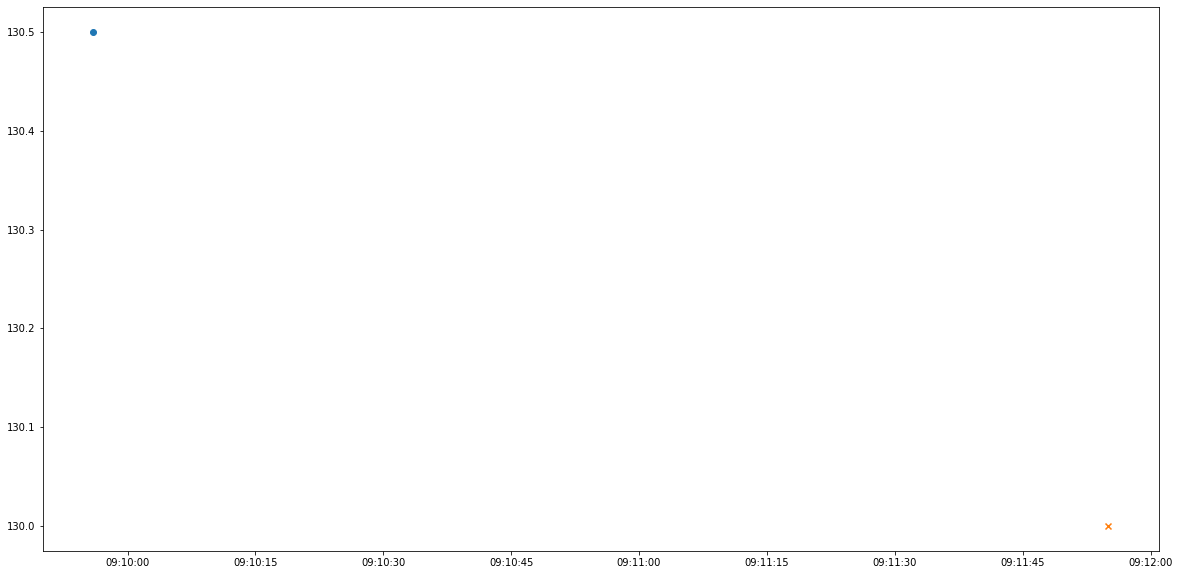

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005659
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  131.5
# sell:  19   # buy:  5
bid1_q:  11   bid2_q:  11
進場時間： 90145940 
  sell price at  131.5
stop loss
出場時間： 90316747
buy at 132.5
get -1.0
------------------------------
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  133.0
# sell:  47   # buy:  8
bid1_q:  13   bid2_q:  46
進場時間： 91329752 
  sell price at  133.0
stop profit
出場時間： 91524862
buy at 132.5
get 0.5
------------------------------
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  132.5
# sell:  25   # buy:  7
bid1_q:  2   bid2_q:  31
進場時間： 91637452 
  sell price at  132.5
stop profit
出場時間： 91802059
buy at 132.0
get 0.5
------------------------------
daily_low  130.

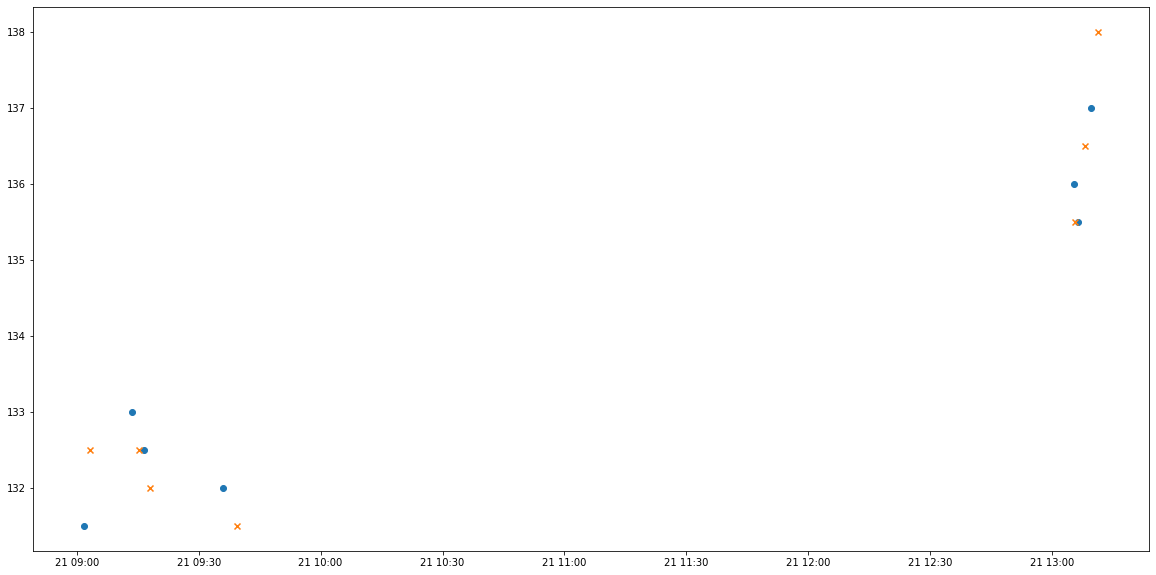

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003440
daily_low  139.0
daily_low * theta 139.695
bid1_p:  141.5
# sell:  36   # buy:  8
bid1_q:  27   bid2_q:  5
進場時間： 90110554 
  sell price at  141.5
stop loss
出場時間： 90157323
buy at 143.0
get -1.5
------------------------------
daily_low  139.0
daily_low * theta 139.695
bid1_p:  141.5
# sell:  75   # buy:  0
bid1_q:  39   bid2_q:  45
進場時間： 90417633 
  sell price at  141.5
stop profit
出場時間： 90427765
buy at 141.0
get 0.5
------------------------------
daily_low  139.0
daily_low * theta 139.695
bid1_p:  141.0
# sell:  33   # buy:  2
bid1_q:  2   bid2_q:  2
進場時間： 90457790 
  sell price at  141.0
stop profit
出場時間： 90457868
buy at 140.5
get 0.5
------------------------------
daily_low  138.0
daily_low * theta 138.69
bid1_p: 

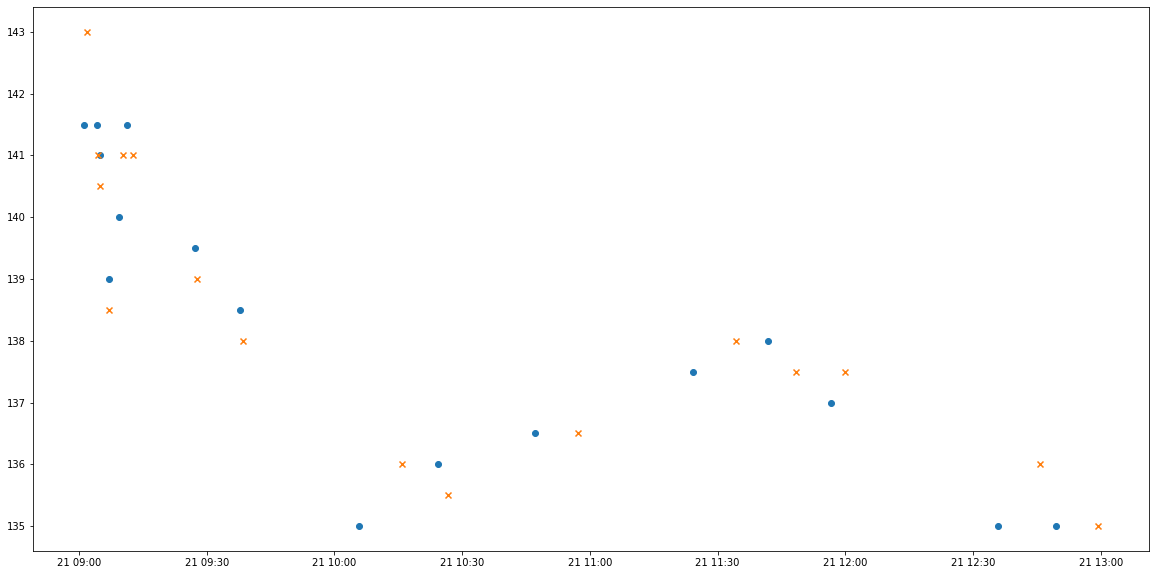

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002973
daily_low  135.0
daily_low * theta 135.67499999999998
bid1_p:  136.0
# sell:  17   # buy:  4
bid1_q:  1   bid2_q:  21
進場時間： 90539096 
  sell price at  136.0
stop loss
出場時間： 90822357
buy at 137.0
get -1.0
------------------------------
daily_low  135.0
daily_low * theta 135.67499999999998
bid1_p:  136.5
# sell:  56   # buy:  0
bid1_q:  23   bid2_q:  48
進場時間： 90911574 
  sell price at  136.5
time out
出場時間： 91912260
buy at 136.0
get 0.5
------------------------------
daily_low  135.0
daily_low * theta 135.67499999999998
bid1_p:  140.0
# sell:  136   # buy:  0
bid1_q:  18   bid2_q:  67
進場時間： 105833783 
  sell price at  140.0
stop profit
出場時間： 105847153
buy at 139.5
get 0.5
------------------------------
daily_low  135.

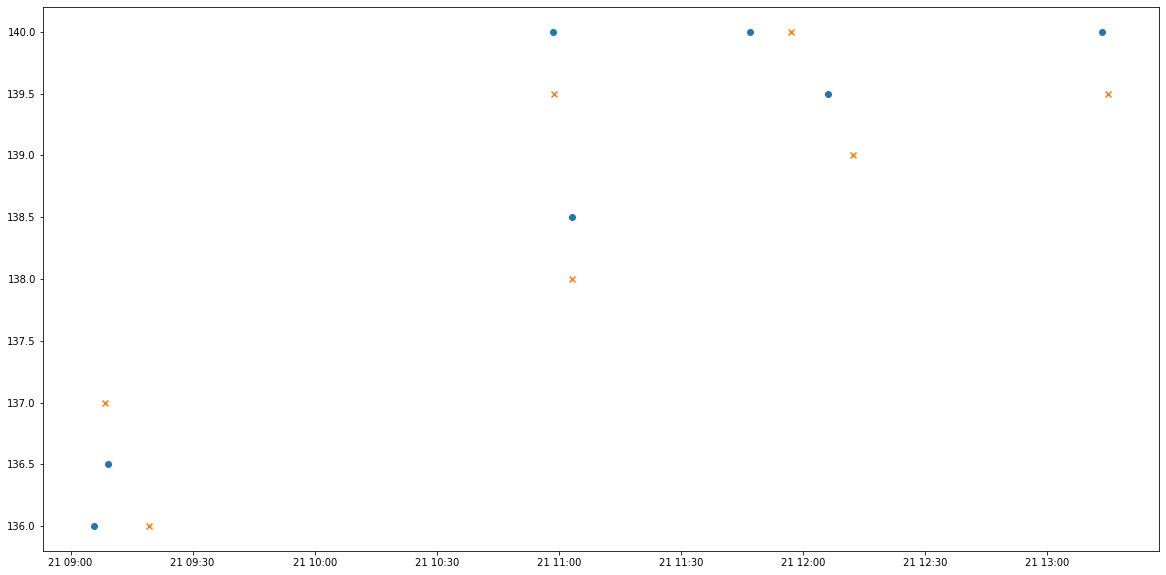

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003196
daily_low  139.0
daily_low * theta 139.695
bid1_p:  140.5
# sell:  38   # buy:  9
bid1_q:  2   bid2_q:  37
進場時間： 90939199 
  sell price at  140.5
stop profit
出場時間： 91239191
buy at 140.0
get 0.5
------------------------------
daily_low  139.0
daily_low * theta 139.695
bid1_p:  140.0
# sell:  57   # buy:  19
bid1_q:  10   bid2_q:  3
進場時間： 91457747 
  sell price at  140.0
stop profit
出場時間： 91525948
buy at 139.5
get 0.5
------------------------------
daily_low  137.5
daily_low * theta 138.18749999999997
bid1_p:  140.0
# sell:  37   # buy:  6
bid1_q:  9   bid2_q:  26
進場時間： 101238566 
  sell price at  140.0
stop loss
出場時間： 101959839
buy at 141.0
get -1.0
------------------------------
daily_low  137.5
daily_low * theta 1

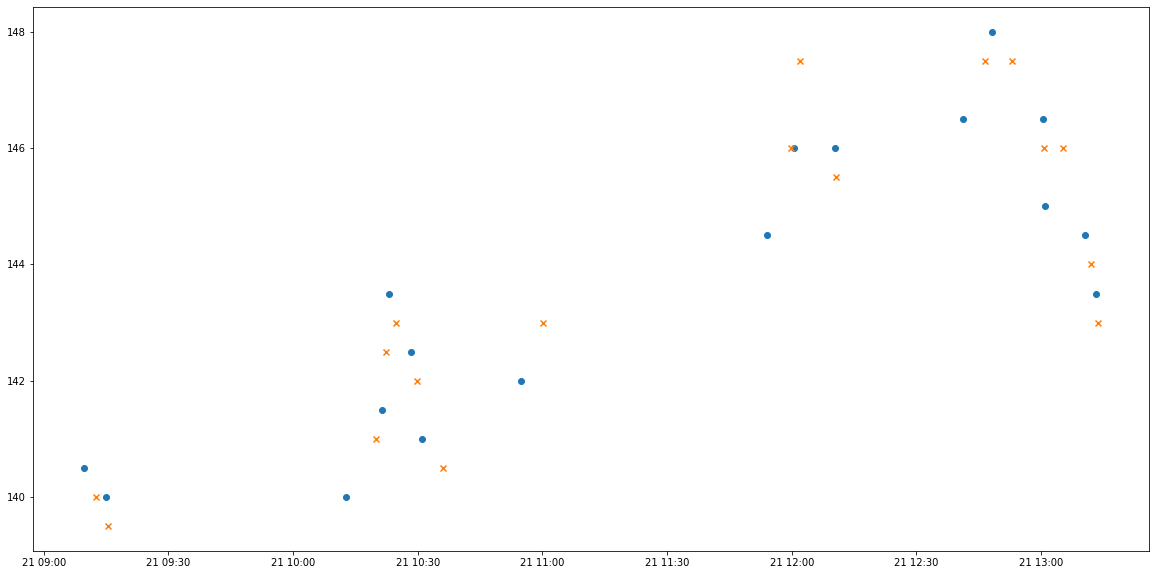

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002142
daily_low  142.0
daily_low * theta 142.70999999999998
bid1_p:  143.0
# sell:  46   # buy:  7
bid1_q:  29   bid2_q:  7
進場時間： 90211298 
  sell price at  143.0
stop profit
出場時間： 90212010
buy at 142.5
get 0.5
------------------------------
daily_low  141.0
daily_low * theta 141.70499999999998
bid1_p:  144.0
# sell:  33   # buy:  9
bid1_q:  1   bid2_q:  19
進場時間： 90700756 
  sell price at  144.0
stop profit
出場時間： 90821721
buy at 143.5
get 0.5
------------------------------
daily_low  141.0
daily_low * theta 141.70499999999998
bid1_p:  142.0
# sell:  55   # buy:  7
bid1_q:  4   bid2_q:  59
進場時間： 91056901 
  sell price at  142.0
stop profit
出場時間： 91206380
buy at 141.5
get 0.5
------------------------------
daily_low  139.5

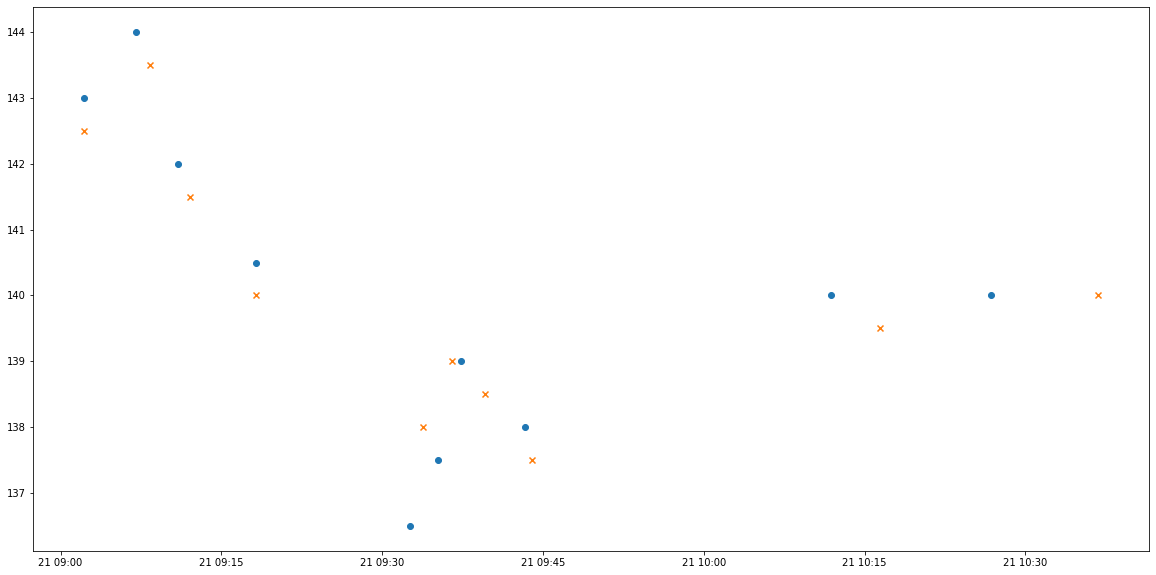

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005402
daily_low  139.5
daily_low * theta 140.1975
bid1_p:  140.5
# sell:  106   # buy:  2
bid1_q:  1   bid2_q:  37
進場時間： 90839798 
  sell price at  140.5
stop loss
出場時間： 91251790
buy at 142.0
get -1.5
------------------------------
daily_low  139.5
daily_low * theta 140.1975
bid1_p:  141.5
# sell:  18   # buy:  7
bid1_q:  6   bid2_q:  14
進場時間： 91302884 
  sell price at  141.5
stop profit
出場時間： 91715180
buy at 141.0
get 0.5
------------------------------
daily_low  139.5
daily_low * theta 140.1975
bid1_p:  142.5
# sell:  150   # buy:  13
bid1_q:  49   bid2_q:  139
進場時間： 93427291 
  sell price at  142.5
stop profit
出場時間： 94043241
buy at 142.0
get 0.5
------------------------------
daily_low  139.5
daily_low * theta 140.197

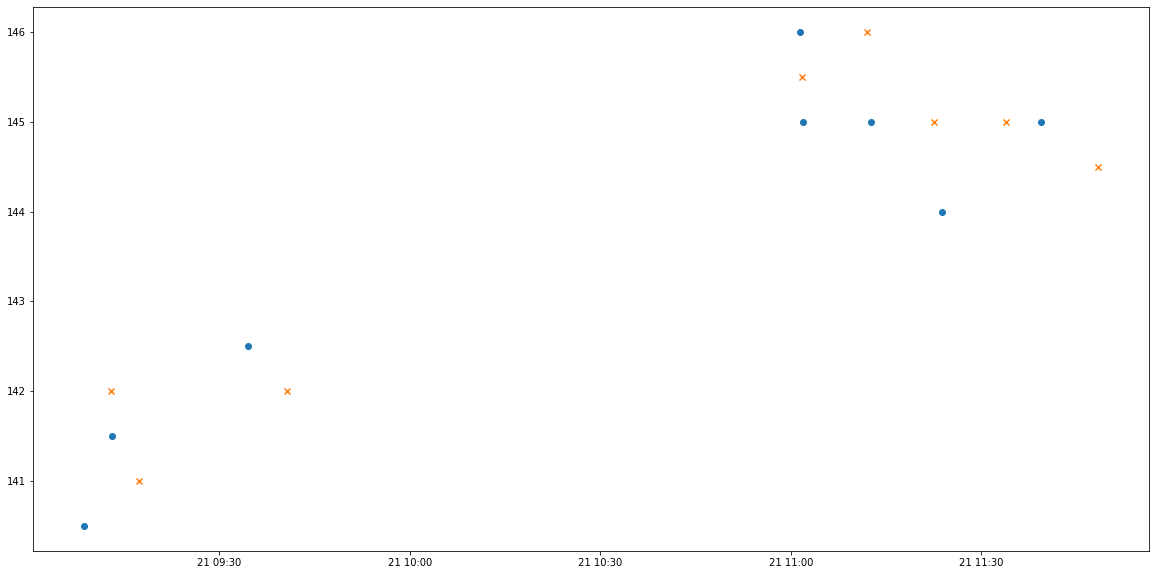

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004459
daily_low  140.5
daily_low * theta 141.2025
bid1_p:  143.0
# sell:  14   # buy:  6
bid1_q:  5   bid2_q:  9
進場時間： 90715102 
  sell price at  143.0
stop profit
出場時間： 90725349
buy at 142.5
get 0.5
------------------------------
daily_low  140.5
daily_low * theta 141.2025
bid1_p:  146.0
# sell:  70   # buy:  9
bid1_q:  1   bid2_q:  78
進場時間： 91301503 
  sell price at  146.0
stop profit
出場時間： 91627906
buy at 145.5
get 0.5
------------------------------
daily_low  140.5
daily_low * theta 141.2025
bid1_p:  145.0
# sell:  36   # buy:  0
bid1_q:  14   bid2_q:  18
進場時間： 91754274 
  sell price at  145.0
stop loss
出場時間： 92050867
buy at 146.0
get -1.0
------------------------------
daily_low  140.5
daily_low * theta 141.2025
bid

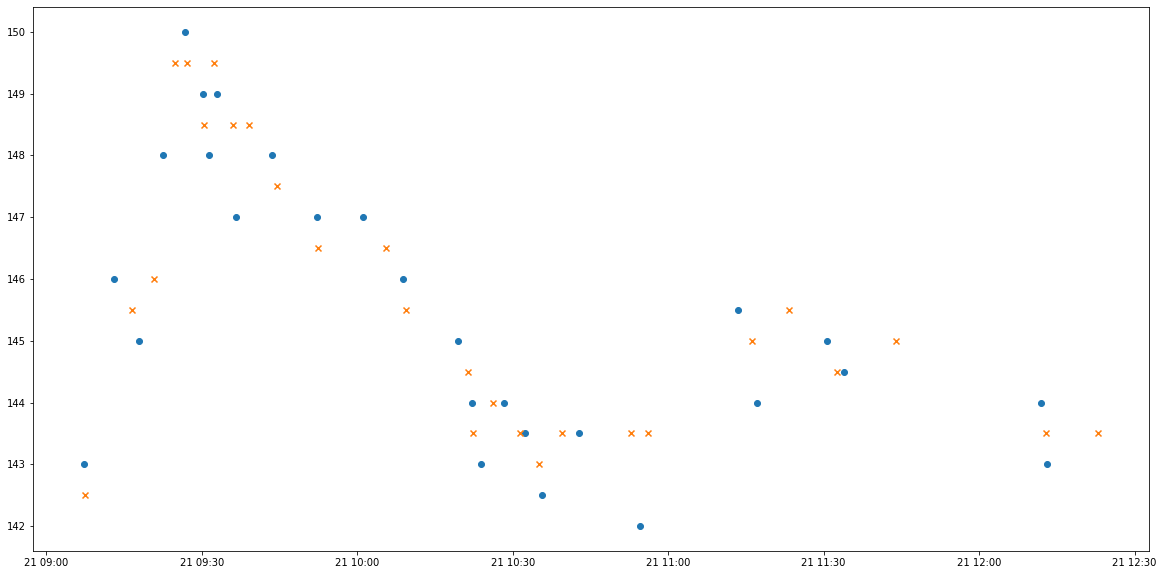

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003488
daily_low  146.5
daily_low * theta 147.2325
bid1_p:  147.5
# sell:  44   # buy:  11
bid1_q:  2   bid2_q:  56
進場時間： 90134162 
  sell price at  147.5
stop profit
出場時間： 90209719
buy at 147.0
get 0.5
------------------------------
daily_low  145.0
daily_low * theta 145.725
bid1_p:  147.0
# sell:  22   # buy:  7
bid1_q:  8   bid2_q:  17
進場時間： 90757297 
  sell price at  147.0
stop loss
出場時間： 90818685
buy at 147.5
get -0.5
------------------------------
daily_low  145.0
daily_low * theta 145.725
bid1_p:  148.5
# sell:  69   # buy:  12
bid1_q:  6   bid2_q:  66
進場時間： 90929442 
  sell price at  148.5
stop profit
出場時間： 91012520
buy at 148.0
get 0.5
------------------------------
daily_low  145.0
daily_low * theta 145.725
bid1

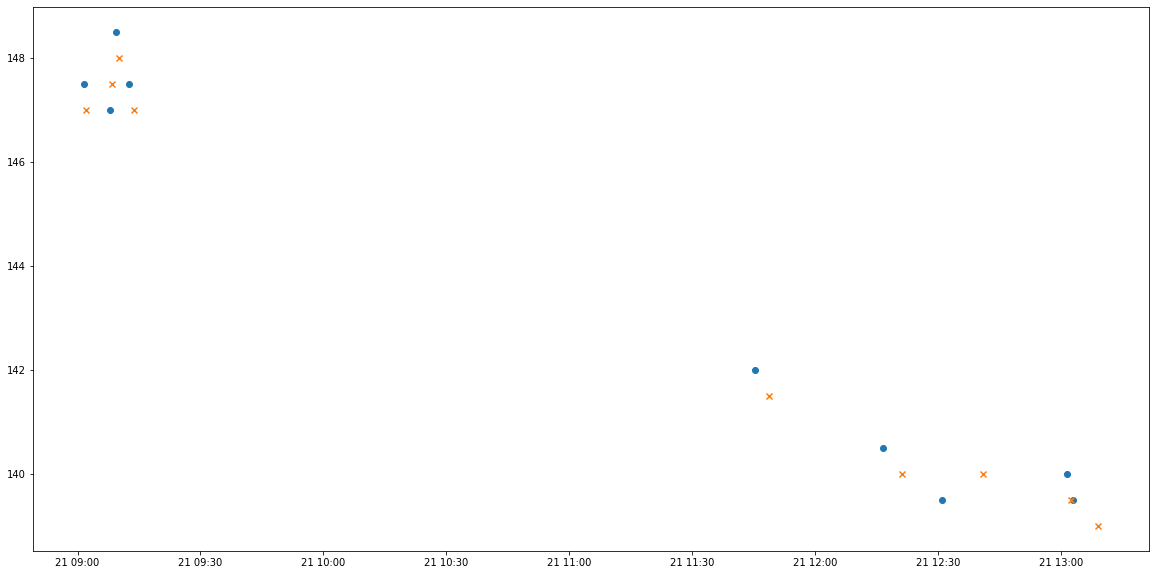

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005497
daily_low  137.0
daily_low * theta 137.68499999999997
bid1_p:  138.0
# sell:  27   # buy:  3
bid1_q:  15   bid2_q:  17
進場時間： 90340978 
  sell price at  138.0
stop profit
出場時間： 90351006
buy at 137.5
get 0.5
------------------------------
daily_low  137.0
daily_low * theta 137.68499999999997
bid1_p:  139.0
# sell:  30   # buy:  6
bid1_q:  1   bid2_q:  14
進場時間： 90559243 
  sell price at  139.0
stop profit
出場時間： 90917604
buy at 138.0
get 1.0
------------------------------
daily_low  137.0
daily_low * theta 137.68499999999997
bid1_p:  140.0
# sell:  78   # buy:  9
bid1_q:  30   bid2_q:  43
進場時間： 91821421 
  sell price at  140.0
stop profit
出場時間： 91900291
buy at 139.5
get 0.5
------------------------------
daily_low  137

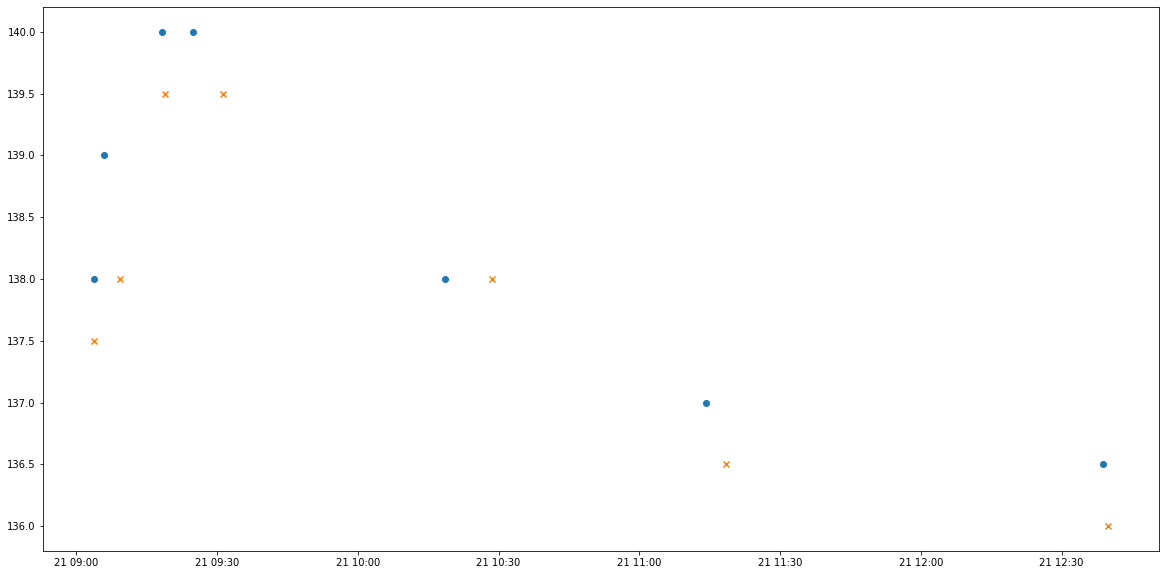

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90007128
daily_low  137.0
daily_low * theta 137.68499999999997
bid1_p:  140.0
# sell:  43   # buy:  3
bid1_q:  27   bid2_q:  24
進場時間： 90353309 
  sell price at  140.0
stop profit
出場時間： 90526691
buy at 139.5
get 0.5
------------------------------
daily_low  137.0
daily_low * theta 137.68499999999997
bid1_p:  139.0
# sell:  41   # buy:  7
bid1_q:  29   bid2_q:  18
進場時間： 90625018 
  sell price at  139.0
stop profit
出場時間： 90847790
buy at 138.5
get 0.5
------------------------------
daily_low  137.0
daily_low * theta 137.68499999999997
bid1_p:  138.5
# sell:  32   # buy:  11
bid1_q:  20   bid2_q:  19
進場時間： 94658702 
  sell price at  138.5
stop profit
出場時間： 94952737
buy at 138.0
get 0.5
------------------------------
daily_low  1

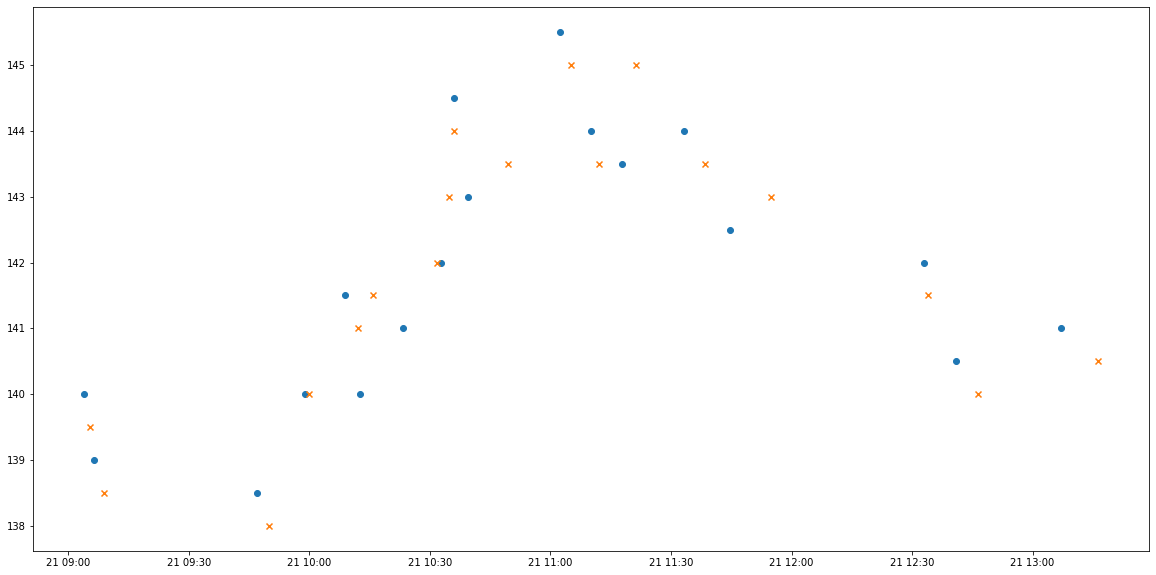

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002848
daily_low  141.5
daily_low * theta 142.20749999999998
bid1_p:  142.5
# sell:  69   # buy:  0
bid1_q:  1   bid2_q:  40
進場時間： 90257150 
  sell price at  142.5
stop profit
出場時間： 90426688
buy at 141.5
get 1.0
------------------------------
daily_low  139.5
daily_low * theta 140.1975
bid1_p:  141.5
# sell:  10   # buy:  4
bid1_q:  1   bid2_q:  8
進場時間： 90746904 
  sell price at  141.5
stop profit
出場時間： 91003160
buy at 141.0
get 0.5
------------------------------
daily_low  139.0
daily_low * theta 139.695
bid1_p:  140.0
# sell:  84   # buy:  2
bid1_q:  36   bid2_q:  53
進場時間： 91508422 
  sell price at  140.0
stop loss
出場時間： 91641511
buy at 141.0
get -1.0
------------------------------
daily_low  139.0
daily_low * theta 139

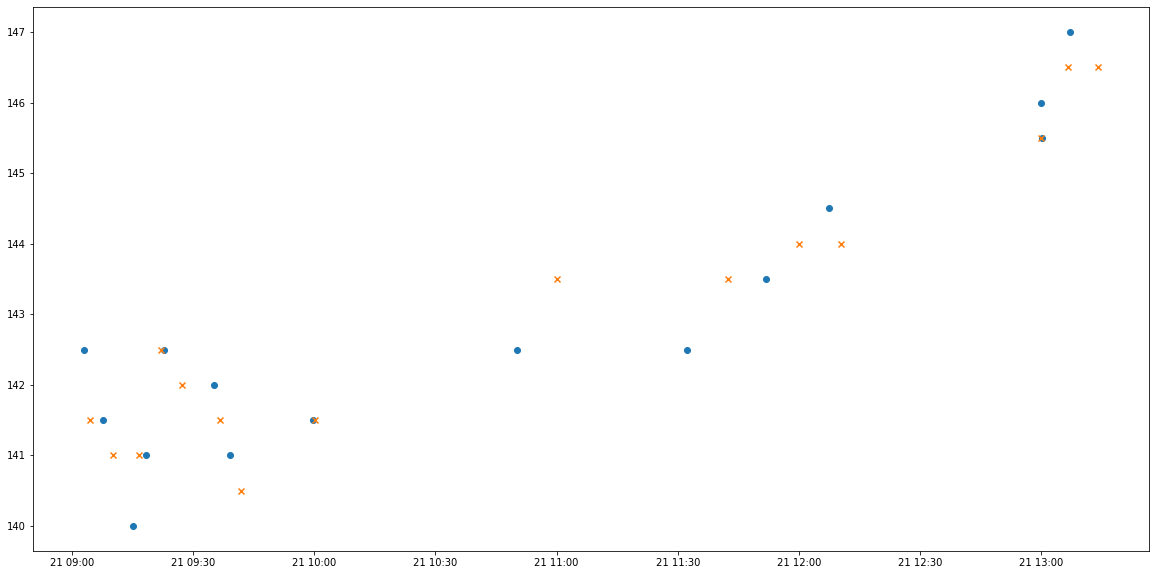

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002436
daily_low  145.5
daily_low * theta 146.2275
bid1_p:  147.0
# sell:  32   # buy:  10
bid1_q:  10   bid2_q:  25
進場時間： 90100459 
  sell price at  147.0
stop profit
出場時間： 90111061
buy at 146.5
get 0.5
------------------------------
daily_low  145.0
daily_low * theta 145.725
bid1_p:  146.5
# sell:  10   # buy:  1
bid1_q:  2   bid2_q:  11
進場時間： 90240676 
  sell price at  146.5
stop profit
出場時間： 90348485
buy at 146.0
get 0.5
------------------------------
daily_low  145.0
daily_low * theta 145.725
bid1_p:  146.0
# sell:  85   # buy:  2
bid1_q:  8   bid2_q:  105
進場時間： 90531485 
  sell price at  146.0
stop profit
出場時間： 90642539
buy at 145.5
get 0.5
------------------------------
daily_low  144.5
daily_low * theta 145.2225
b

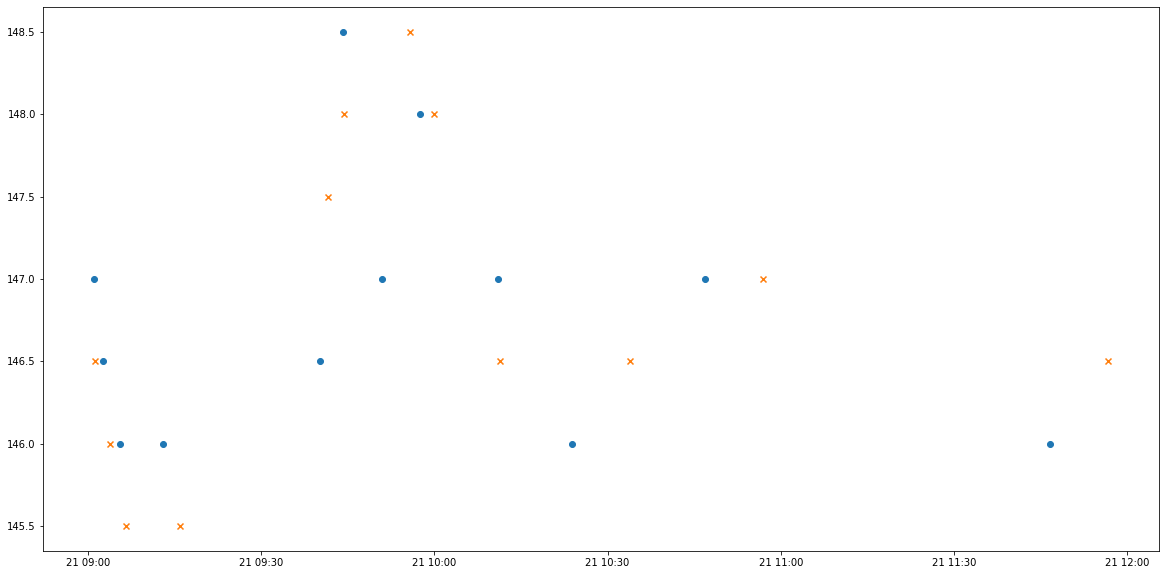

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002683
daily_low  145.5
daily_low * theta 146.2275
bid1_p:  148.0
# sell:  74   # buy:  2
bid1_q:  10   bid2_q:  46
進場時間： 90511226 
  sell price at  148.0
stop profit
出場時間： 90545314
buy at 147.5
get 0.5
------------------------------
daily_low  145.5
daily_low * theta 146.2275
bid1_p:  150.0
# sell:  68   # buy:  4
bid1_q:  58   bid2_q:  17
進場時間： 91541543 
  sell price at  150.0
stop profit
出場時間： 91645426
buy at 149.5
get 0.5
------------------------------
daily_low  145.5
daily_low * theta 146.2275
bid1_p:  151.0
# sell:  114   # buy:  27
bid1_q:  96   bid2_q:  24
進場時間： 91842306 
  sell price at  151.0
stop profit
出場時間： 92243732
buy at 150.5
get 0.5
------------------------------
daily_low  145.5
daily_low * theta 146.22

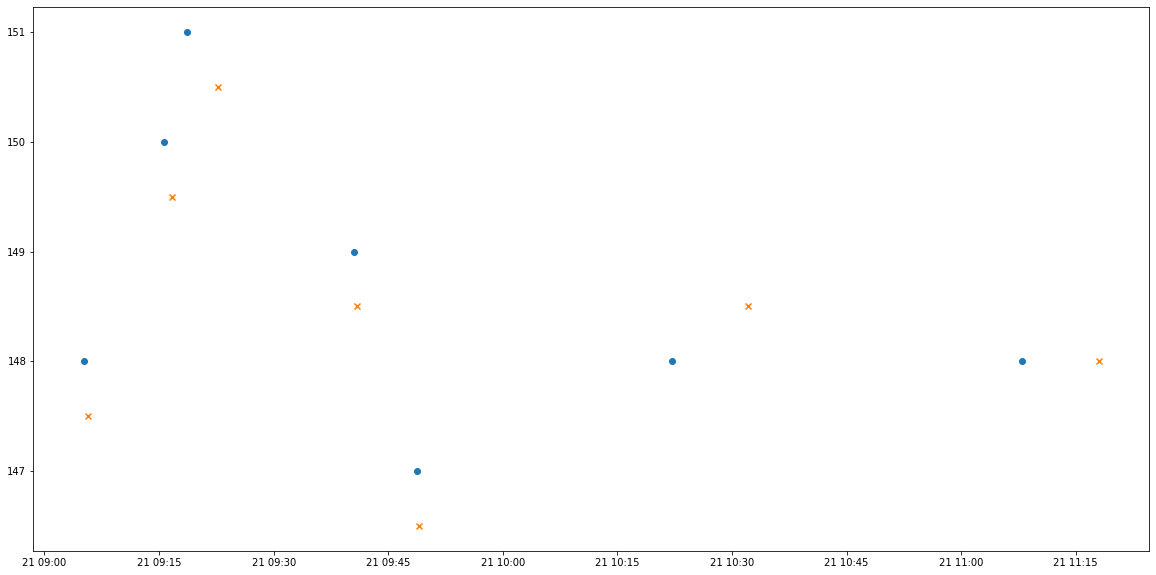

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003011
daily_low  146.0
daily_low * theta 146.73
bid1_p:  147.0
# sell:  23   # buy:  10
bid1_q:  1   bid2_q:  18
進場時間： 91908975 
  sell price at  147.0
stop profit
出場時間： 92651493
buy at 146.5
get 0.5
------------------------------
daily_low  145.5
daily_low * theta 146.2275
bid1_p:  147.5
# sell:  26   # buy:  0
bid1_q:  1   bid2_q:  33
進場時間： 111655928 
  sell price at  147.5
time out
出場時間： 112700925
buy at 147.5
get 0.0
------------------------------
daily_low  145.5
daily_low * theta 146.2275
bid1_p:  148.5
# sell:  52   # buy:  4
bid1_q:  2   bid2_q:  38
進場時間： 130747298 
  sell price at  148.5
time out
出場時間： 131748455
buy at 149.5
get -1.0
------------------------------
----------Result Report--------------
profit:  -

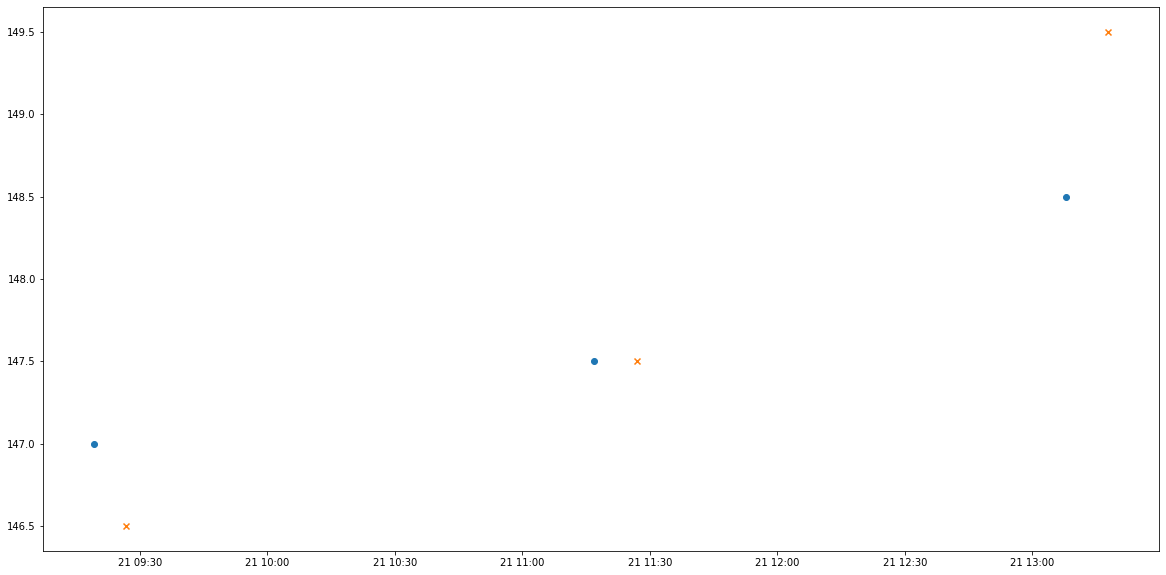

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005282
daily_low  147.5
daily_low * theta 148.23749999999998
bid1_p:  149.0
# sell:  60   # buy:  0
bid1_q:  2   bid2_q:  51
進場時間： 90544153 
  sell price at  149.0
stop profit
出場時間： 91018363
buy at 148.5
get 0.5
------------------------------
------Weird price!!!!!---------
At time:  100509098
tick_row_price 144.5
ask_1_p 145.0
bid_1_p 144.0
daily_low  140.0
daily_low * theta 140.7
bid1_p:  141.0
# sell:  177   # buy:  0
bid1_q:  25   bid2_q:  210
進場時間： 104629172 
  sell price at  141.0
stop profit
出場時間： 104953046
buy at 140.5
get 0.5
------------------------------
daily_low  136.5
daily_low * theta 137.18249999999998
bid1_p:  138.0
# sell:  63   # buy:  11
bid1_q:  49   bid2_q:  32
進場時間： 112758497 
  sell price at  138.0

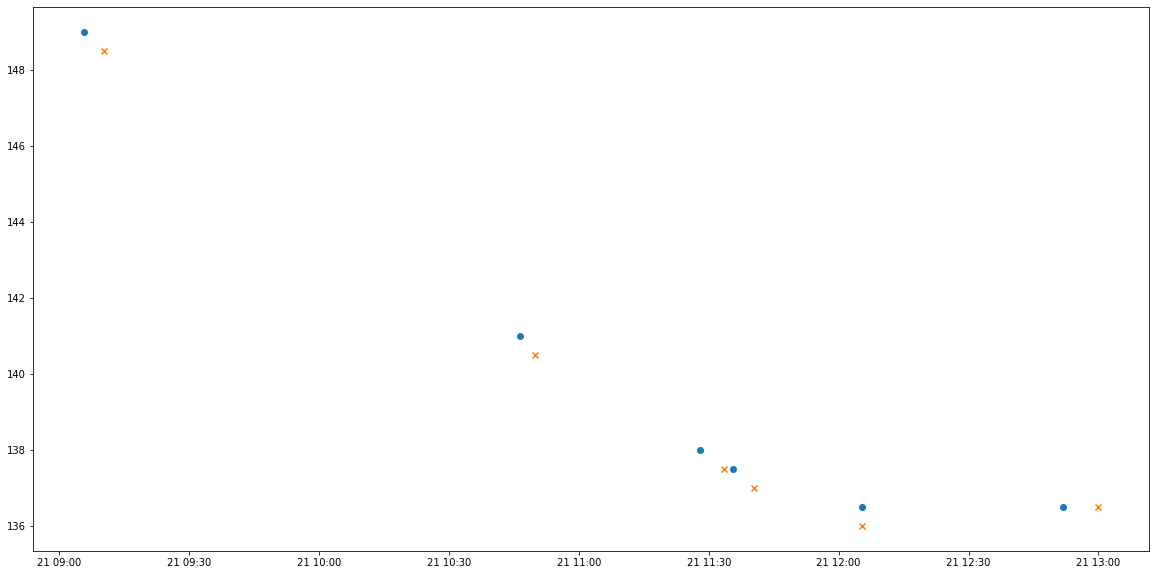

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002373
daily_low  134.0
daily_low * theta 134.67
bid1_p:  135.5
# sell:  40   # buy:  1
bid1_q:  10   bid2_q:  35
進場時間： 90108662 
  sell price at  135.5
stop profit
出場時間： 90123295
buy at 135.0
get 0.5
------------------------------
daily_low  132.0
daily_low * theta 132.66
bid1_p:  135.5
# sell:  34   # buy:  3
bid1_q:  1   bid2_q:  25
進場時間： 91046755 
  sell price at  135.5
stop profit
出場時間： 91229291
buy at 135.0
get 0.5
------------------------------
daily_low  132.0
daily_low * theta 132.66
bid1_p:  135.0
# sell:  66   # buy:  3
bid1_q:  62   bid2_q:  12
進場時間： 91739559 
  sell price at  135.0
stop profit
出場時間： 91853495
buy at 134.5
get 0.5
------------------------------
daily_low  132.0
daily_low * theta 132.66
bid1_p: 

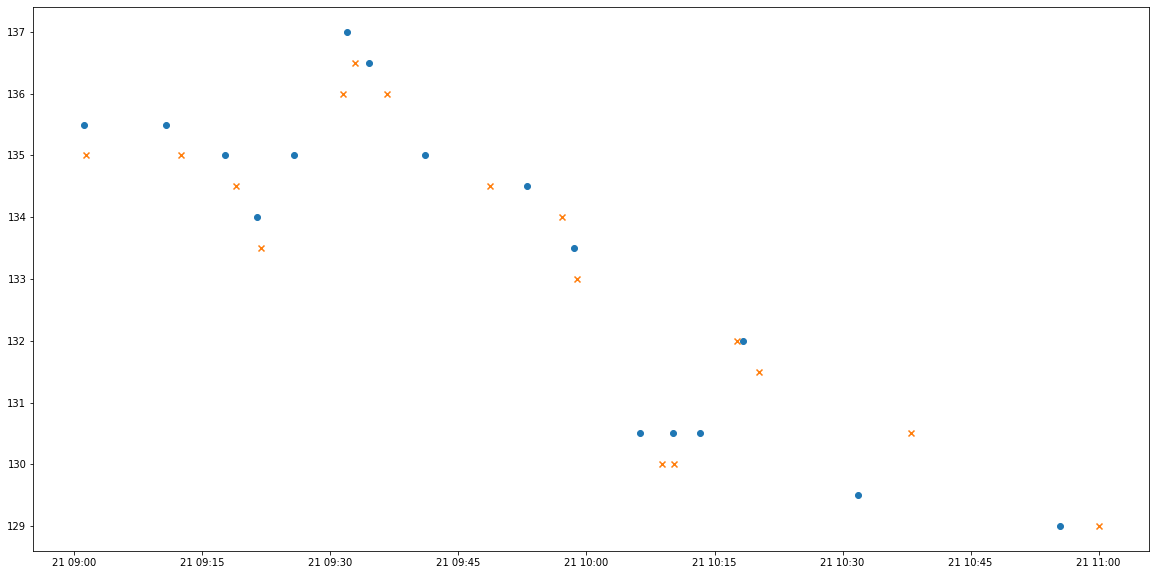

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002266
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  130.0
# sell:  75   # buy:  1
bid1_q:  30   bid2_q:  29
進場時間： 90339917 
  sell price at  130.0
stop profit
出場時間： 91033698
buy at 129.5
get 0.5
------------------------------
daily_low  127.0
daily_low * theta 127.63499999999999
bid1_p:  128.0
# sell:  24   # buy:  1
bid1_q:  1   bid2_q:  22
進場時間： 91342286 
  sell price at  128.0
stop profit
出場時間： 91419379
buy at 127.5
get 0.5
------------------------------
daily_low  127.0
daily_low * theta 127.63499999999999
bid1_p:  128.0
# sell:  25   # buy:  5
bid1_q:  2   bid2_q:  31
進場時間： 91627143 
  sell price at  128.0
stop loss
出場時間： 91822707
buy at 129.0
get -1.0
------------------------------
daily_low  127.0

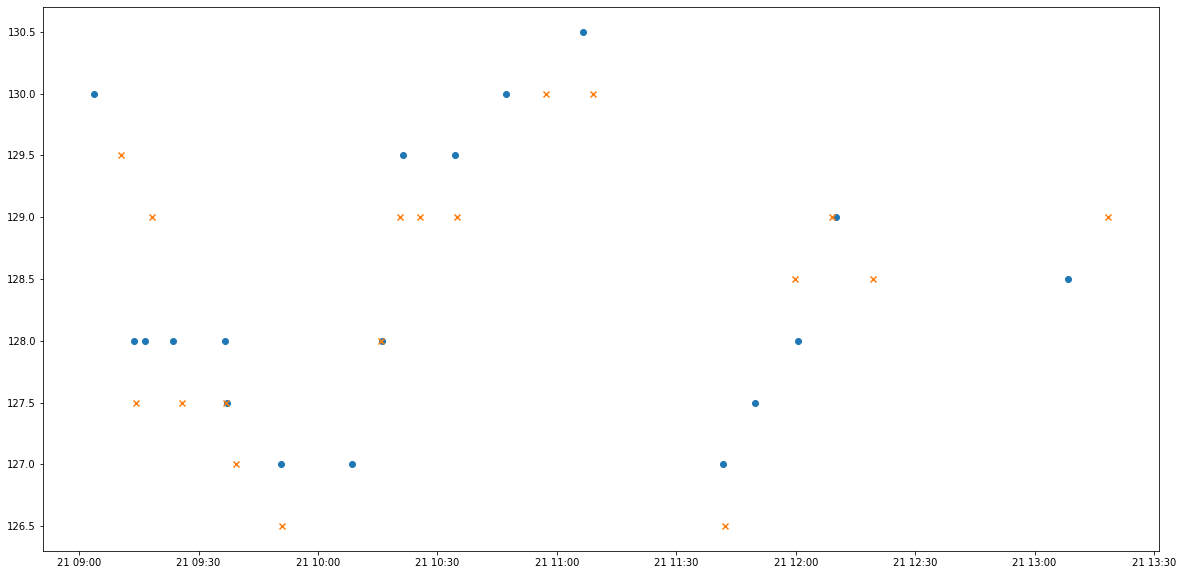

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003256
daily_low  127.5
daily_low * theta 128.1375
bid1_p:  128.5
# sell:  89   # buy:  5
bid1_q:  1   bid2_q:  40
進場時間： 90529555 
  sell price at  128.5
stop profit
出場時間： 90643929
buy at 127.5
get 1.0
------------------------------
daily_low  126.5
daily_low * theta 127.1325
bid1_p:  127.5
# sell:  76   # buy:  1
bid1_q:  8   bid2_q:  55
進場時間： 91924230 
  sell price at  127.5
stop profit
出場時間： 91936646
buy at 127.0
get 0.5
------------------------------
daily_low  124.0
daily_low * theta 124.61999999999999
bid1_p:  125.5
# sell:  25   # buy:  0
bid1_q:  6   bid2_q:  27
進場時間： 93545430 
  sell price at  125.5
stop profit
出場時間： 93600718
buy at 125.0
get 0.5
------------------------------
daily_low  124.0
daily_low * theta 1

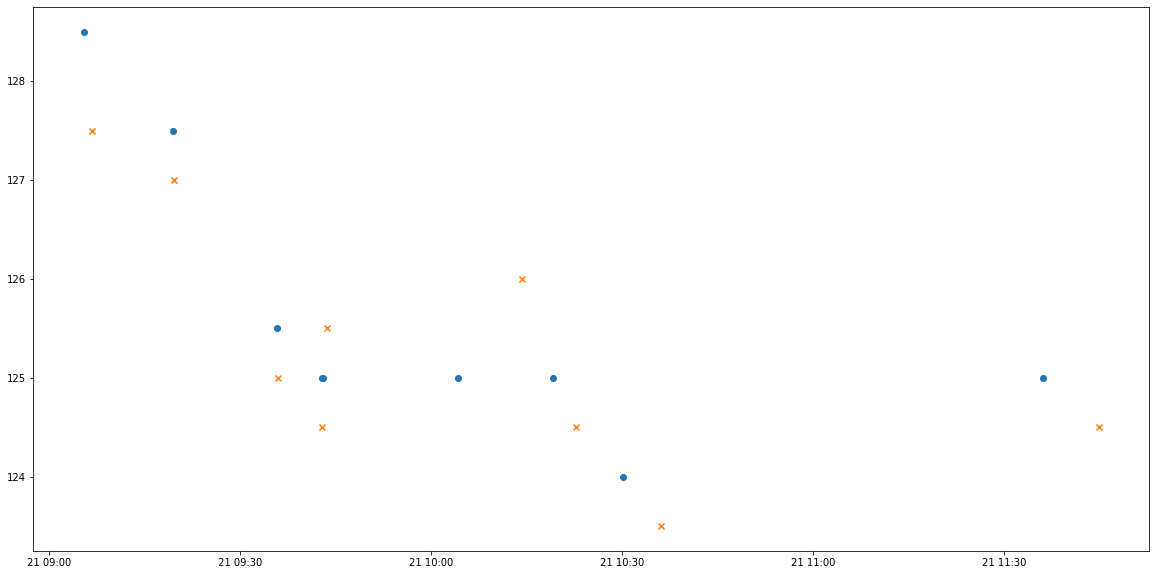

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003437
daily_low  125.0
daily_low * theta 125.62499999999999
bid1_p:  126.0
# sell:  44   # buy:  3
bid1_q:  36   bid2_q:  22
進場時間： 90503212 
  sell price at  126.0
stop profit
出場時間： 90541799
buy at 125.5
get 0.5
------------------------------
daily_low  124.5
daily_low * theta 125.12249999999999
bid1_p:  125.5
# sell:  26   # buy:  3
bid1_q:  7   bid2_q:  27
進場時間： 91624340 
  sell price at  125.5
time out
出場時間： 92624508
buy at 126.5
get -1.0
------------------------------
daily_low  124.5
daily_low * theta 125.12249999999999
bid1_p:  125.5
# sell:  116   # buy:  4
bid1_q:  15   bid2_q:  136
進場時間： 94953013 
  sell price at  125.5
stop profit
出場時間： 95246088
buy at 125.0
get 0.5
------------------------------
----------Resu

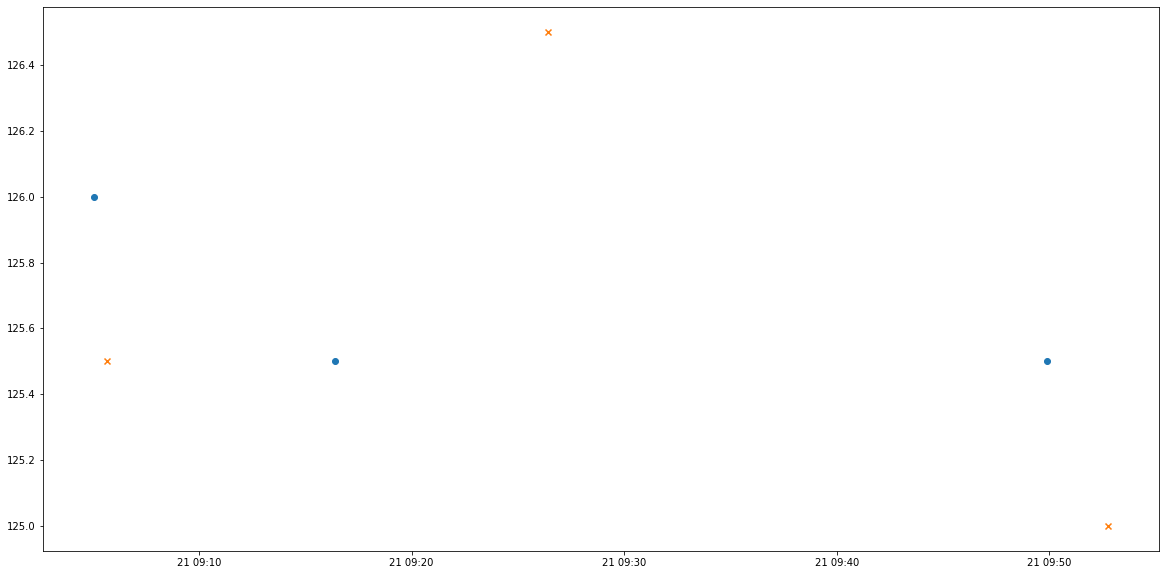

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004422
daily_low  124.0
daily_low * theta 124.61999999999999
bid1_p:  125.5
# sell:  57   # buy:  4
bid1_q:  23   bid2_q:  51
進場時間： 90804501 
  sell price at  125.5
stop profit
出場時間： 90933825
buy at 125.0
get 0.5
------------------------------
daily_low  123.0
daily_low * theta 123.61499999999998
bid1_p:  125.0
# sell:  111   # buy:  1
bid1_q:  16   bid2_q:  112
進場時間： 100154232 
  sell price at  125.0
time out
出場時間： 101154301
buy at 125.0
get 0.0
------------------------------
daily_low  123.0
daily_low * theta 123.61499999999998
bid1_p:  130.0
# sell:  36   # buy:  7
bid1_q:  13   bid2_q:  34
進場時間： 105403284 
  sell price at  130.0
stop loss
出場時間： 105518808
buy at 131.0
get -1.0
------------------------------
daily_low  

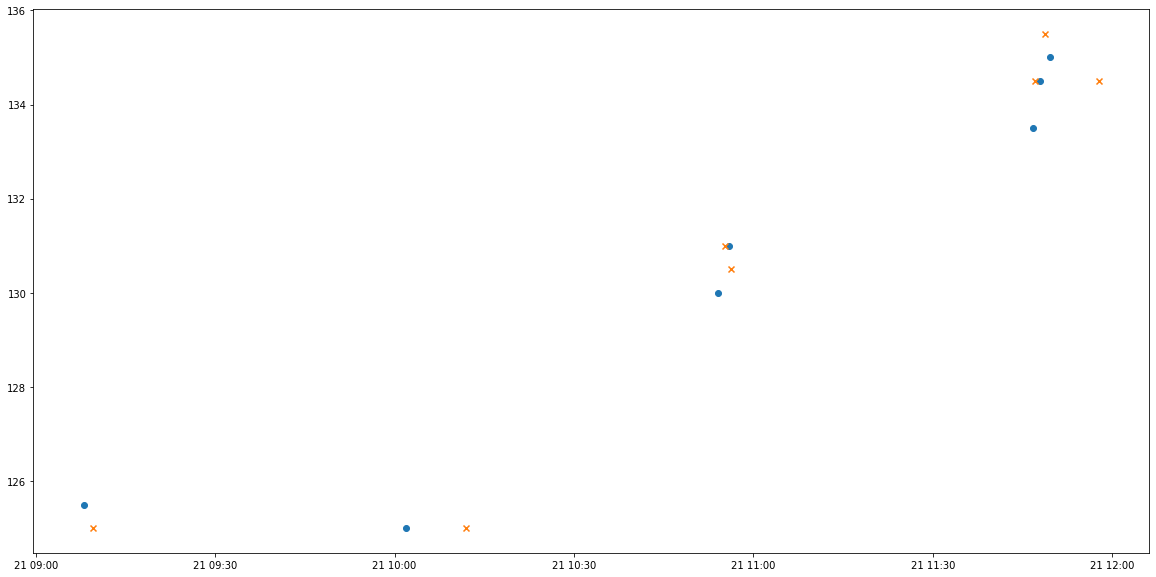

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90001794
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  130.0
# sell:  119   # buy:  2
bid1_q:  11   bid2_q:  141
進場時間： 101140987 
  sell price at  130.0
stop profit
出場時間： 101428165
buy at 129.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


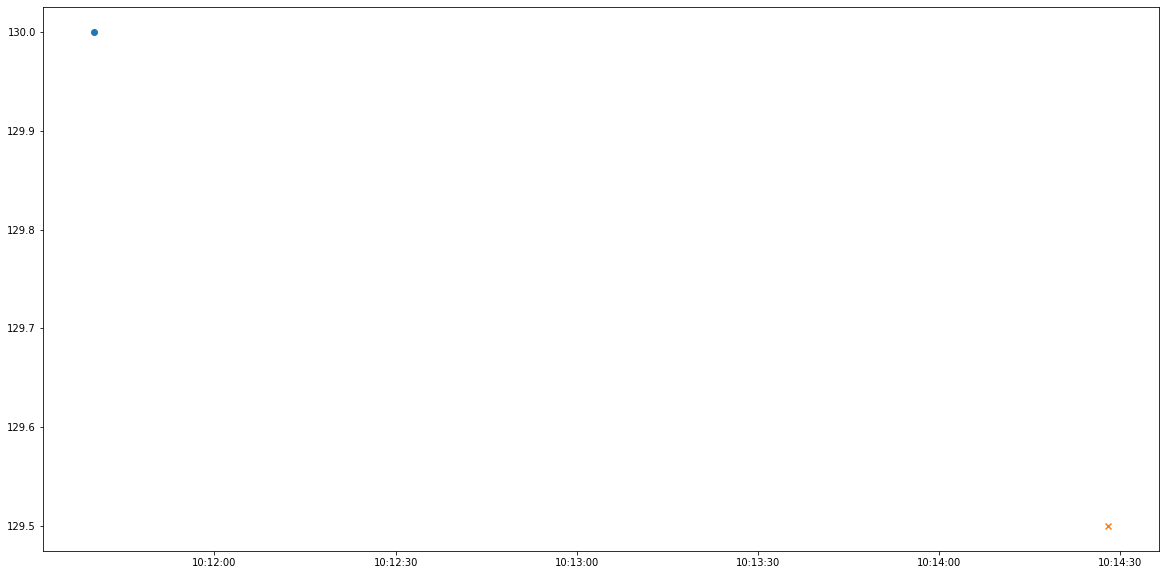

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003267
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  131.5
# sell:  37   # buy:  0
bid1_q:  13   bid2_q:  33
進場時間： 93007244 
  sell price at  131.5
time out
出場時間： 94007666
buy at 131.5
get 0.0
------------------------------
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  132.5
# sell:  70   # buy:  26
bid1_q:  10   bid2_q:  72
進場時間： 95623203 
  sell price at  132.5
time out
出場時間： 100002069
buy at 133.0
get -0.5
------------------------------
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  134.5
# sell:  89   # buy:  5
bid1_q:  44   bid2_q:  58
進場時間： 113611964 
  sell price at  134.5
time out
出場時間： 114612931
buy at 135.0
get -0.5
------------------------------
daily_low  129.0

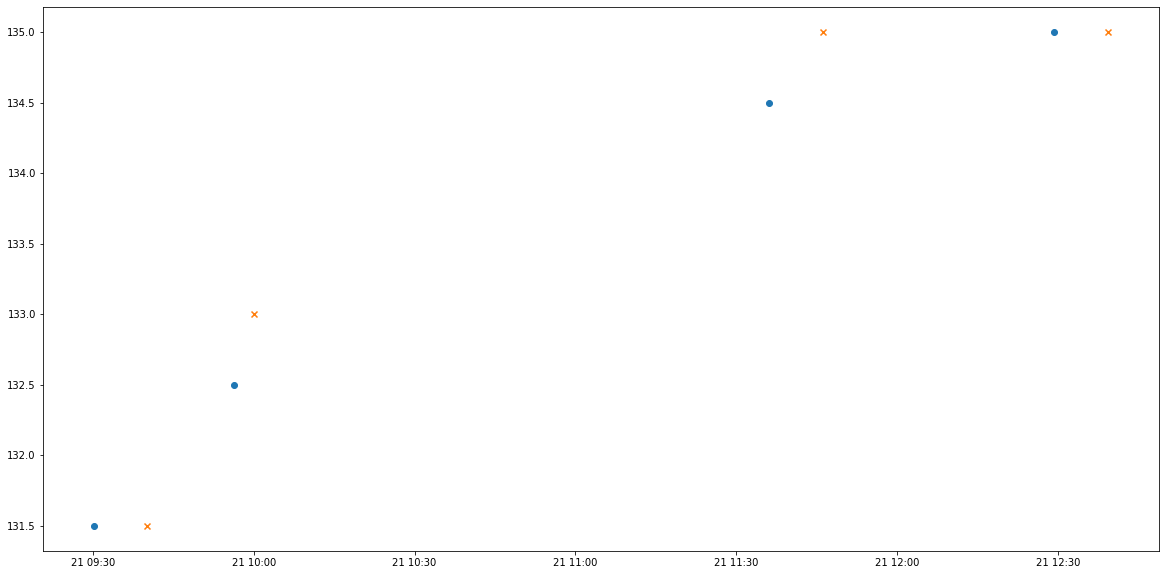

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003498
----------Result Report--------------
profit:  0


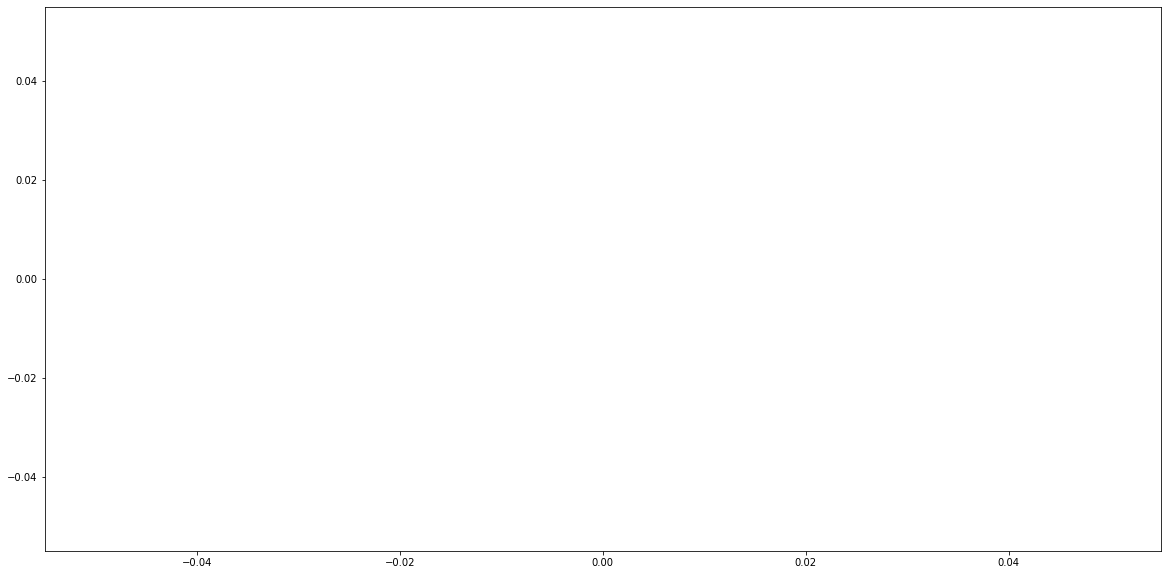

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004571
daily_low  140.5
daily_low * theta 141.2025
bid1_p:  141.5
# sell:  19   # buy:  0
bid1_q:  10   bid2_q:  12
進場時間： 90106632 
  sell price at  141.5
stop profit
出場時間： 90110026
buy at 141.0
get 0.5
------------------------------
daily_low  139.5
daily_low * theta 140.1975
bid1_p:  141.5
# sell:  36   # buy:  8
bid1_q:  13   bid2_q:  29
進場時間： 90555459 
  sell price at  141.5
stop loss
出場時間： 90728729
buy at 142.5
get -1.0
------------------------------
daily_low  139.5
daily_low * theta 140.1975
bid1_p:  143.5
# sell:  99   # buy:  3
bid1_q:  24   bid2_q:  107
進場時間： 91025528 
  sell price at  143.5
stop profit
出場時間： 91050227
buy at 143.0
get 0.5
------------------------------
daily_low  139.5
daily_low * theta 140.1975

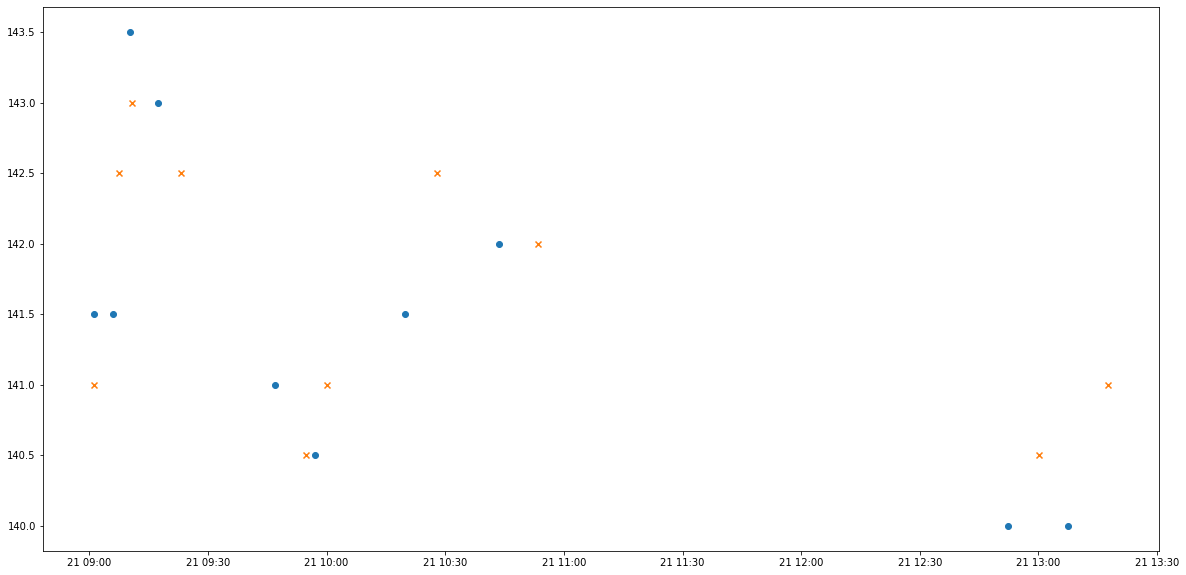

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90002099
daily_low  139.0
daily_low * theta 139.695
bid1_p:  140.5
# sell:  62   # buy:  7
bid1_q:  1   bid2_q:  81
進場時間： 91550050 
  sell price at  140.5
stop profit
出場時間： 91951256
buy at 140.0
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


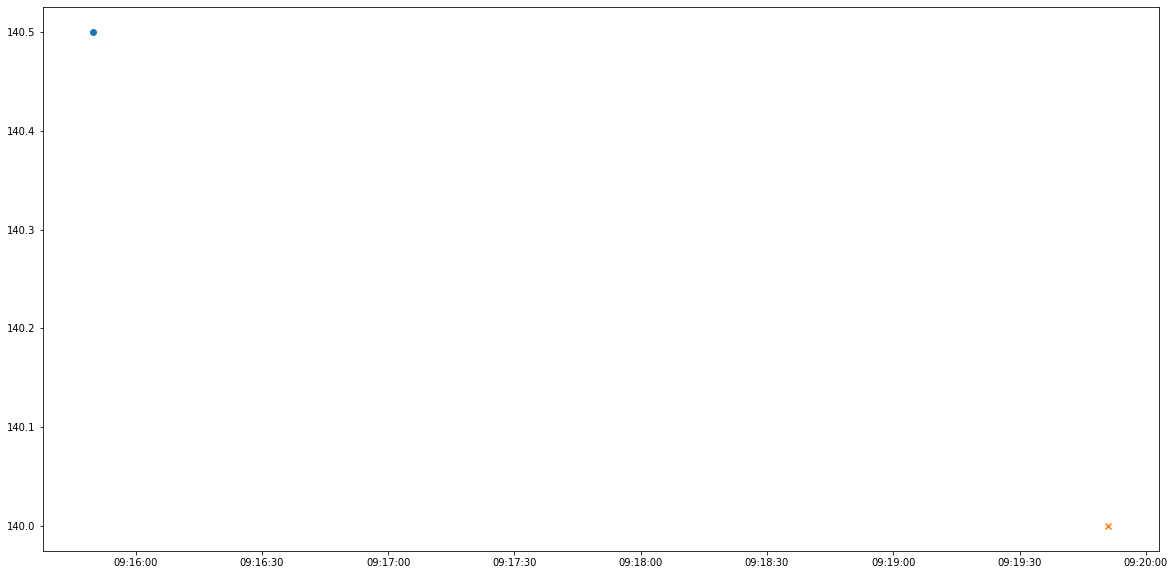

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003887
daily_low  134.5
daily_low * theta 135.17249999999999
bid1_p:  136.0
# sell:  84   # buy:  6
bid1_q:  26   bid2_q:  82
進場時間： 94422171 
  sell price at  136.0
stop profit
出場時間： 95138970
buy at 135.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


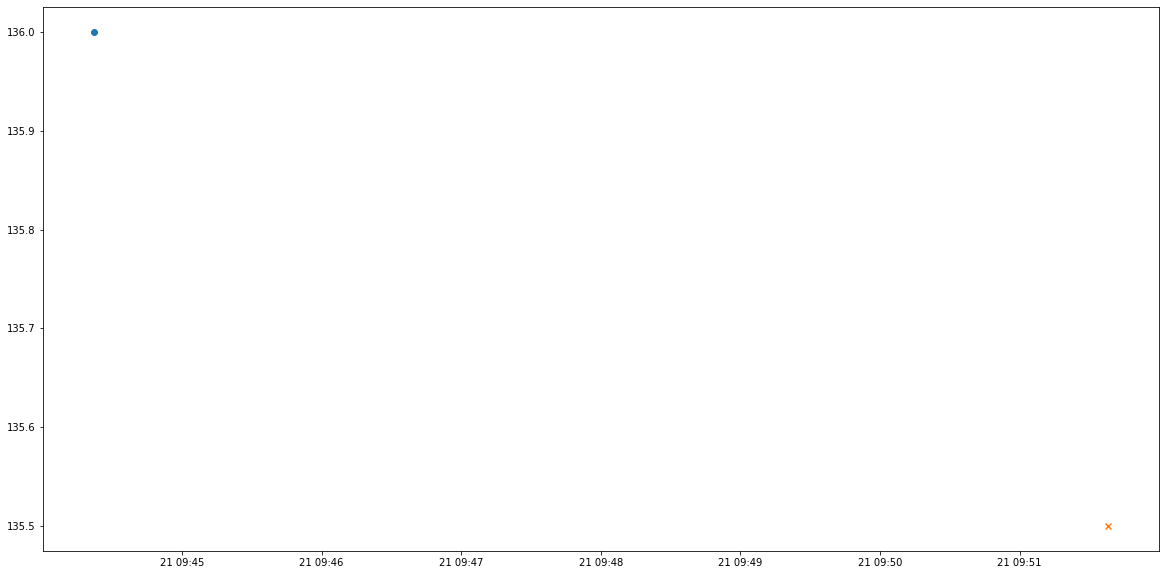

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004848
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  131.0
# sell:  9   # buy:  4
bid1_q:  2   bid2_q:  9
進場時間： 90244764 
  sell price at  131.0
stop profit
出場時間： 90351488
buy at 130.5
get 0.5
------------------------------
daily_low  129.5
daily_low * theta 130.14749999999998
bid1_p:  131.5
# sell:  55   # buy:  10
bid1_q:  6   bid2_q:  57
進場時間： 95801640 
  sell price at  131.5
time out
出場時間： 100000866
buy at 131.5
get 0.0
------------------------------
daily_low  129.5
daily_low * theta 130.14749999999998
bid1_p:  134.0
# sell:  67   # buy:  4
bid1_q:  39   bid2_q:  42
進場時間： 101257403 
  sell price at  134.0
stop profit
出場時間： 101424470
buy at 133.5
get 0.5
------------------------------
daily_low  129.5

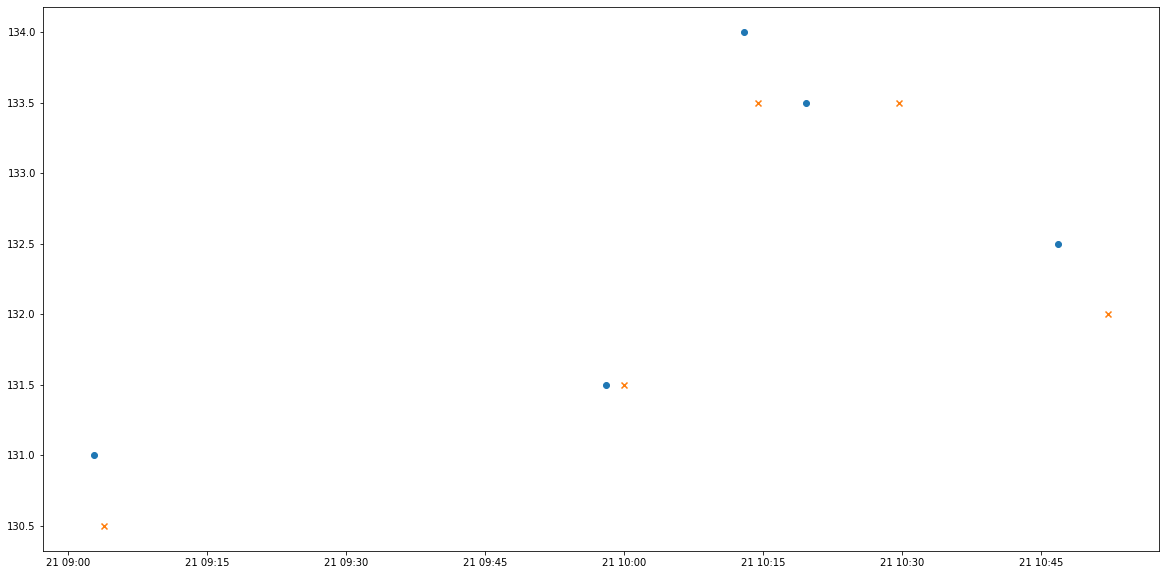

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004791
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  131.0
# sell:  13   # buy:  5
bid1_q:  1   bid2_q:  12
進場時間： 90101805 
  sell price at  131.0
stop loss
出場時間： 90927216
buy at 132.0
get -1.0
------------------------------
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  132.0
# sell:  29   # buy:  5
bid1_q:  7   bid2_q:  29
進場時間： 91005974 
  sell price at  132.0
stop profit
出場時間： 91133444
buy at 131.5
get 0.5
------------------------------
daily_low  130.0
daily_low * theta 130.64999999999998
bid1_p:  131.5
# sell:  41   # buy:  16
bid1_q:  2   bid2_q:  38
進場時間： 92155084 
  sell price at  131.5
stop profit
出場時間： 92246795
buy at 131.0
get 0.5
------------------------------
daily_low  129.0

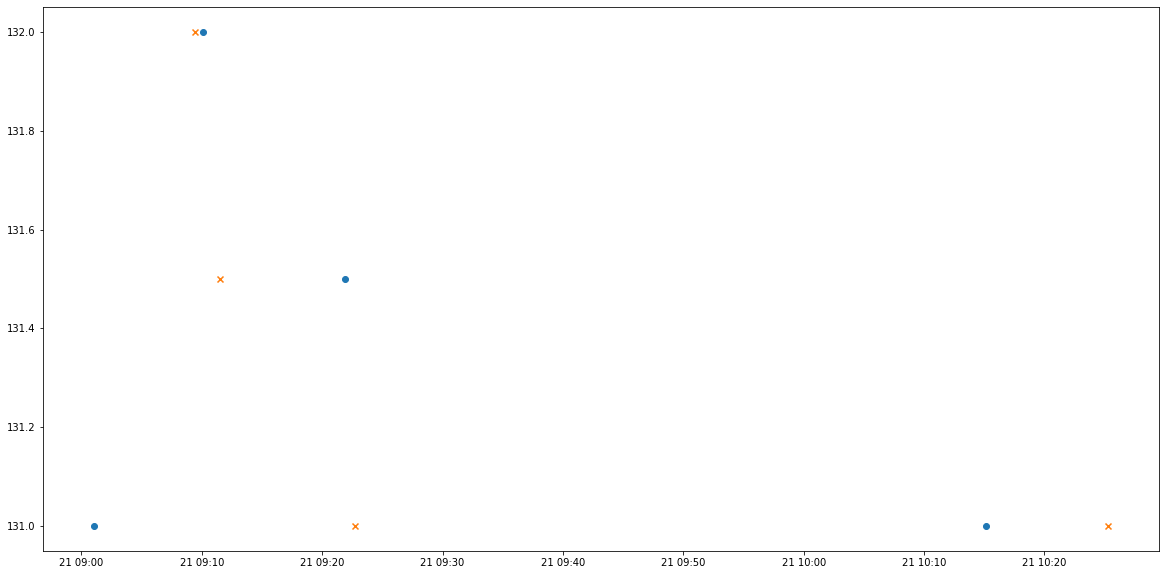

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90008037
------Weird price!!!!!---------
At time:  91525108
tick_row_price 135.0
ask_1_p 135.5
bid_1_p 134.5
daily_low  132.5
daily_low * theta 133.1625
bid1_p:  135.5
# sell:  15   # buy:  0
bid1_q:  7   bid2_q:  12
進場時間： 93056786 
  sell price at  135.5
stop profit
出場時間： 93241313
buy at 135.0
get 0.5
------------------------------
daily_low  132.5
daily_low * theta 133.1625
bid1_p:  134.0
# sell:  120   # buy:  0
bid1_q:  22   bid2_q:  114
進場時間： 93958369 
  sell price at  134.0
time out
出場時間： 94959509
buy at 134.0
get 0.0
------------------------------
daily_low  132.5
daily_low * theta 133.1625
bid1_p:  133.5
# sell:  19   # buy:  0
bid1_q:  7   bid2_q:  11
進場時間： 102449585 
  sell price at  133.5
time out
出場時間： 103452314

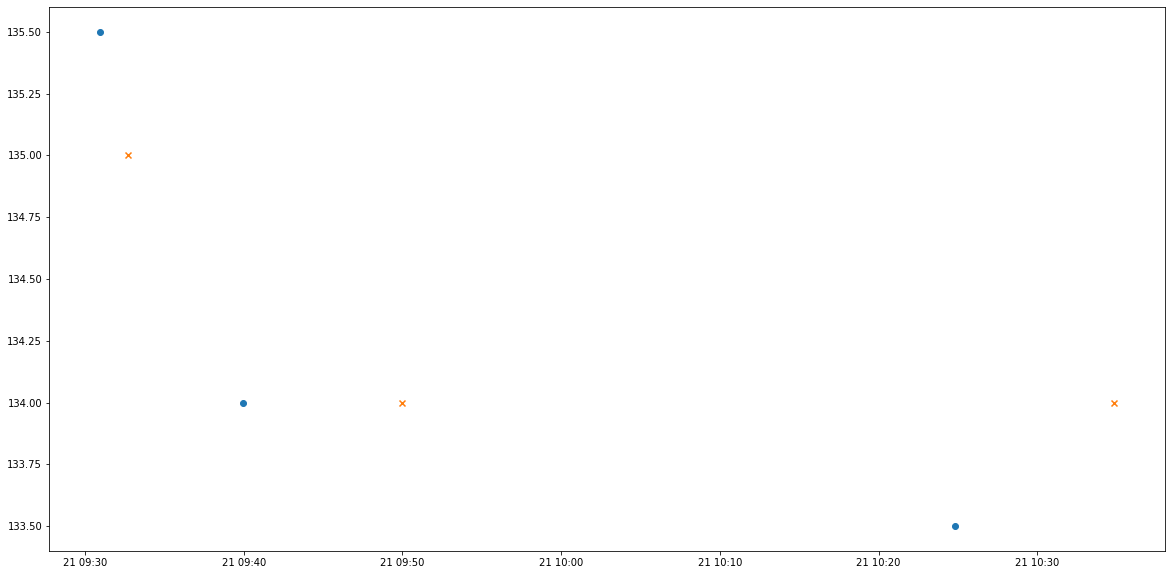

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004502
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  130.0
# sell:  18   # buy:  0
bid1_q:  3   bid2_q:  20
進場時間： 91155378 
  sell price at  130.0
stop loss
出場時間： 91812620
buy at 131.0
get -1.0
------------------------------
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  133.5
# sell:  80   # buy:  4
bid1_q:  44   bid2_q:  29
進場時間： 92817038 
  sell price at  133.5
time out
出場時間： 93817577
buy at 133.5
get 0.0
------------------------------
daily_low  129.0
daily_low * theta 129.64499999999998
bid1_p:  136.0
# sell:  134   # buy:  5
bid1_q:  19   bid2_q:  153
進場時間： 115403992 
  sell price at  136.0
stop profit
出場時間： 115819729
buy at 135.5
get 0.5
------------------------------
daily_low  129

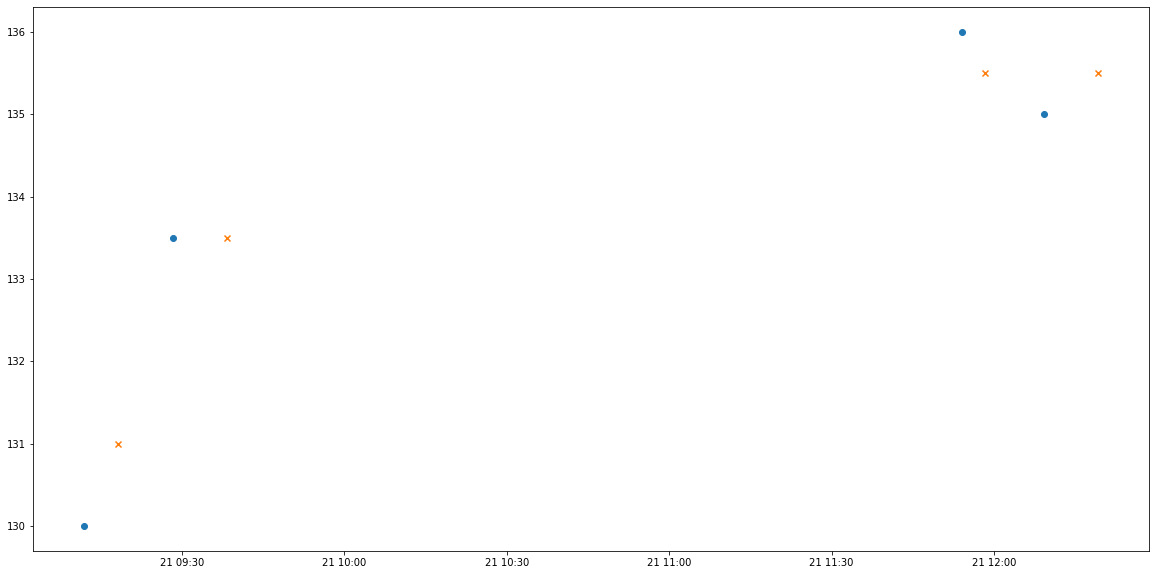

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004724
daily_low  133.0
daily_low * theta 133.665
bid1_p:  134.5
# sell:  33   # buy:  15
bid1_q:  1   bid2_q:  32
進場時間： 90858060 
  sell price at  134.5
time out
出場時間： 91859065
buy at 135.5
get -1.0
------------------------------
daily_low  133.0
daily_low * theta 133.665
bid1_p:  135.0
# sell:  94   # buy:  4
bid1_q:  32   bid2_q:  53
進場時間： 92215590 
  sell price at  135.0
time out
出場時間： 93216967
buy at 135.5
get -0.5
------------------------------
daily_low  133.0
daily_low * theta 133.665
bid1_p:  138.0
# sell:  52   # buy:  19
bid1_q:  1   bid2_q:  68
進場時間： 95453576 
  sell price at  138.0
stop profit
出場時間： 95543170
buy at 137.5
get 0.5
------------------------------
daily_low  133.0
daily_low * theta 133.665
bid1_p:

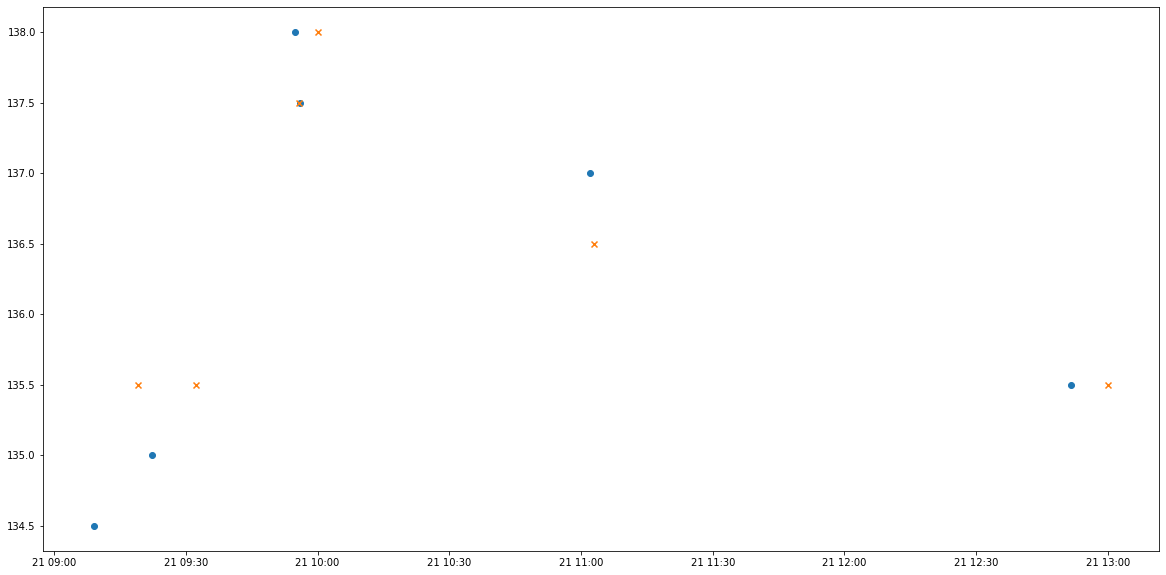

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004380
daily_low  135.5
daily_low * theta 136.17749999999998
bid1_p:  136.5
# sell:  37   # buy:  6
bid1_q:  26   bid2_q:  23
進場時間： 91129350 
  sell price at  136.5
stop loss
出場時間： 91628490
buy at 137.5
get -1.0
------------------------------
daily_low  135.5
daily_low * theta 136.17749999999998
bid1_p:  137.5
# sell:  44   # buy:  5
bid1_q:  3   bid2_q:  21
進場時間： 91701709 
  sell price at  137.5
stop profit
出場時間： 92405189
buy at 137.0
get 0.5
------------------------------
daily_low  135.5
daily_low * theta 136.17749999999998
bid1_p:  136.5
# sell:  92   # buy:  5
bid1_q:  6   bid2_q:  107
進場時間： 92926502 
  sell price at  136.5
stop profit
出場時間： 93035039
buy at 136.0
get 0.5
------------------------------
----------Resul

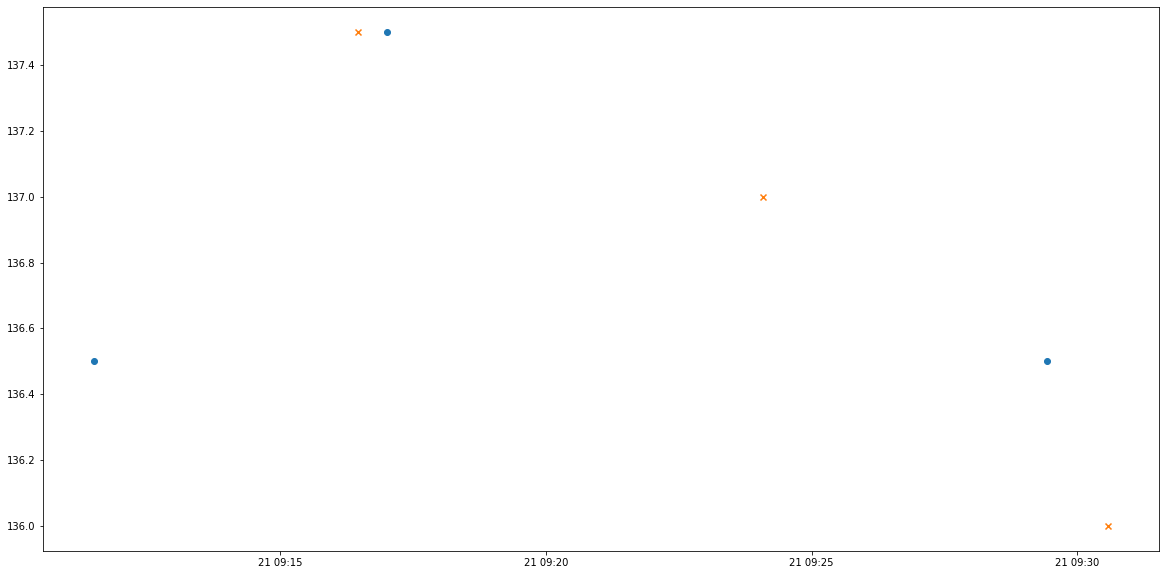

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90007411
daily_low  135.5
daily_low * theta 136.17749999999998
bid1_p:  136.5
# sell:  152   # buy:  0
bid1_q:  13   bid2_q:  157
進場時間： 102511173 
  sell price at  136.5
time out
出場時間： 103516833
buy at 136.5
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


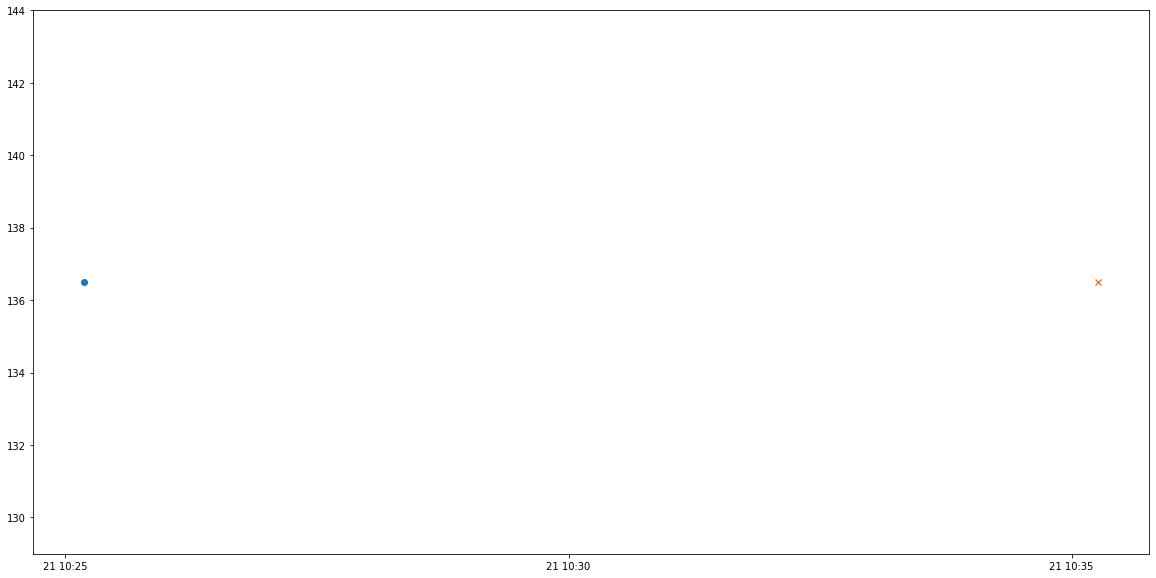

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90006970
daily_low  128.0
daily_low * theta 128.64
bid1_p:  129.0
# sell:  151   # buy:  8
bid1_q:  1   bid2_q:  1
進場時間： 91054806 
  sell price at  129.0
stop profit
出場時間： 91100879
buy at 128.5
get 0.5
------------------------------
daily_low  123.5
daily_low * theta 124.11749999999999
bid1_p:  124.5
# sell:  107   # buy:  0
bid1_q:  1   bid2_q:  30
進場時間： 92204919 
  sell price at  124.5
stop profit
出場時間： 92228901
buy at 124.0
get 0.5
------------------------------
daily_low  119.5
daily_low * theta 120.09749999999998
bid1_p:  120.5
# sell:  68   # buy:  14
bid1_q:  1   bid2_q:  7
進場時間： 94434073 
  sell price at  120.5
stop profit
出場時間： 94444029
buy at 120.0
get 0.5
------------------------------
daily_low  119.0
daily_low 

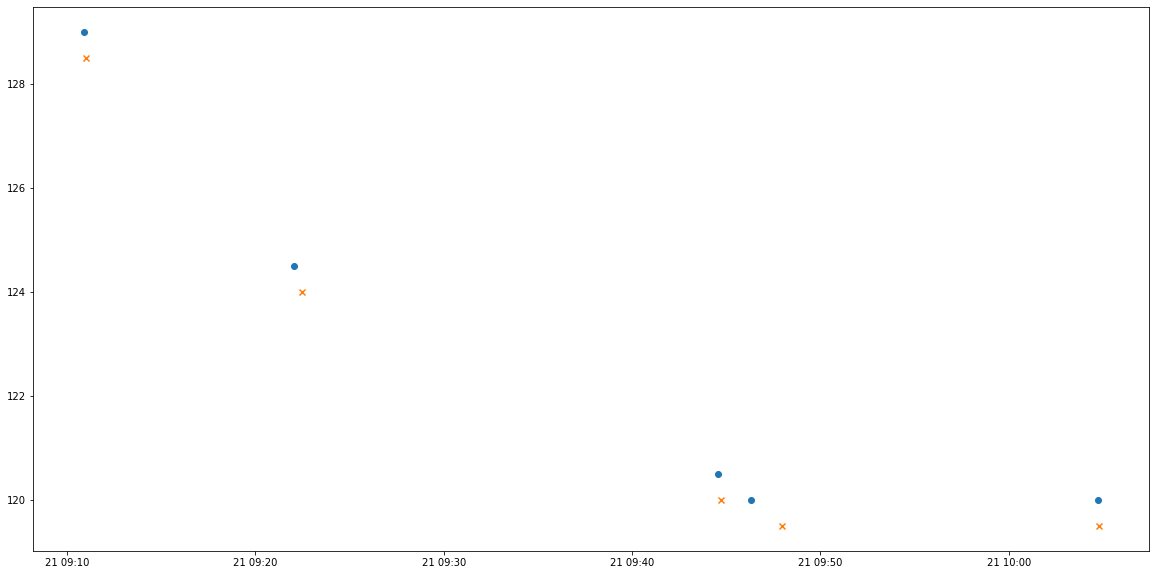

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005685
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  118.5
# sell:  55   # buy:  12
bid1_q:  1   bid2_q:  39
進場時間： 90531763 
  sell price at  118.5
stop loss
出場時間： 90653159
buy at 119.5
get -1.0
------------------------------
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  118.5
# sell:  76   # buy:  4
bid1_q:  18   bid2_q:  82
進場時間： 91108249 
  sell price at  118.5
stop loss
出場時間： 91244986
buy at 119.5
get -1.0
------------------------------
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  120.0
# sell:  43   # buy:  15
bid1_q:  1   bid2_q:  31
進場時間： 91718529 
  sell price at  120.0
stop profit
出場時間： 91931501
buy at 119.5
get 0.5
------------------------------
daily_low  117.

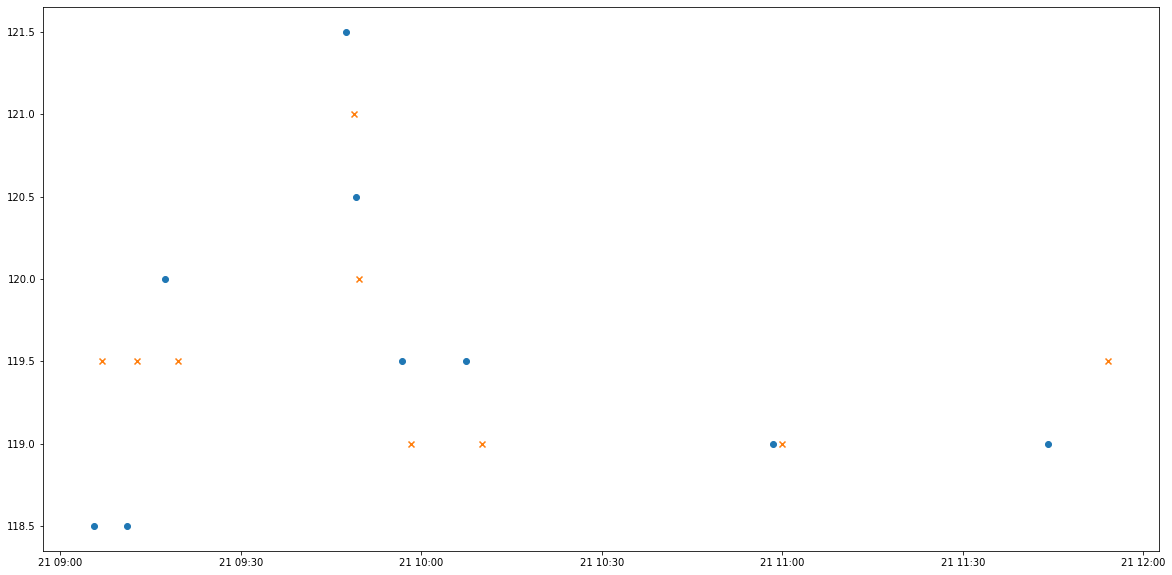

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003434
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  120.0
# sell:  54   # buy:  3
bid1_q:  39   bid2_q:  19
進場時間： 91011851 
  sell price at  120.0
stop profit
出場時間： 91012271
buy at 119.5
get 0.5
------------------------------
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  119.5
# sell:  51   # buy:  3
bid1_q:  21   bid2_q:  43
進場時間： 91042448 
  sell price at  119.5
stop loss
出場時間： 91220310
buy at 120.5
get -1.0
------------------------------
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  121.5
# sell:  26   # buy:  10
bid1_q:  16   bid2_q:  15
進場時間： 92039620 
  sell price at  121.5
stop profit
出場時間： 92539454
buy at 121.0
get 0.5
------------------------------
daily_low  11

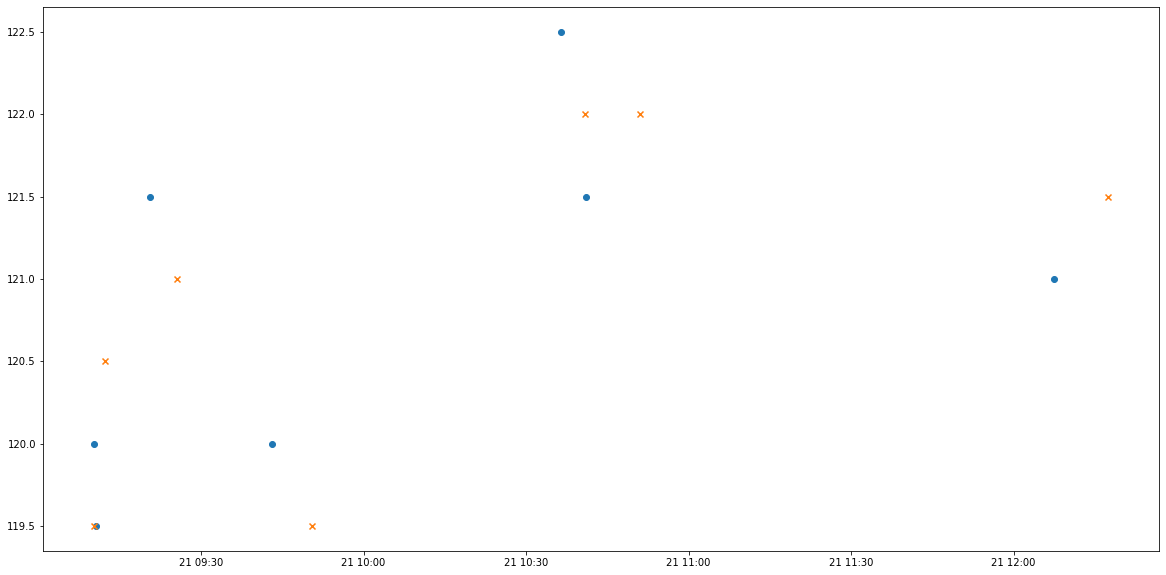

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005327
daily_low  123.5
daily_low * theta 124.11749999999999
bid1_p:  124.5
# sell:  20   # buy:  9
bid1_q:  9   bid2_q:  17
進場時間： 90441864 
  sell price at  124.5
stop profit
出場時間： 90758167
buy at 124.0
get 0.5
------------------------------
daily_low  123.5
daily_low * theta 124.11749999999999
bid1_p:  125.5
# sell:  53   # buy:  3
bid1_q:  3   bid2_q:  60
進場時間： 92246957 
  sell price at  125.5
stop profit
出場時間： 92455575
buy at 125.0
get 0.5
------------------------------
daily_low  123.5
daily_low * theta 124.11749999999999
bid1_p:  125.0
# sell:  97   # buy:  7
bid1_q:  1   bid2_q:  127
進場時間： 103001193 
  sell price at  125.0
stop profit
出場時間： 103921853
buy at 124.5
get 0.5
------------------------------
----------Res

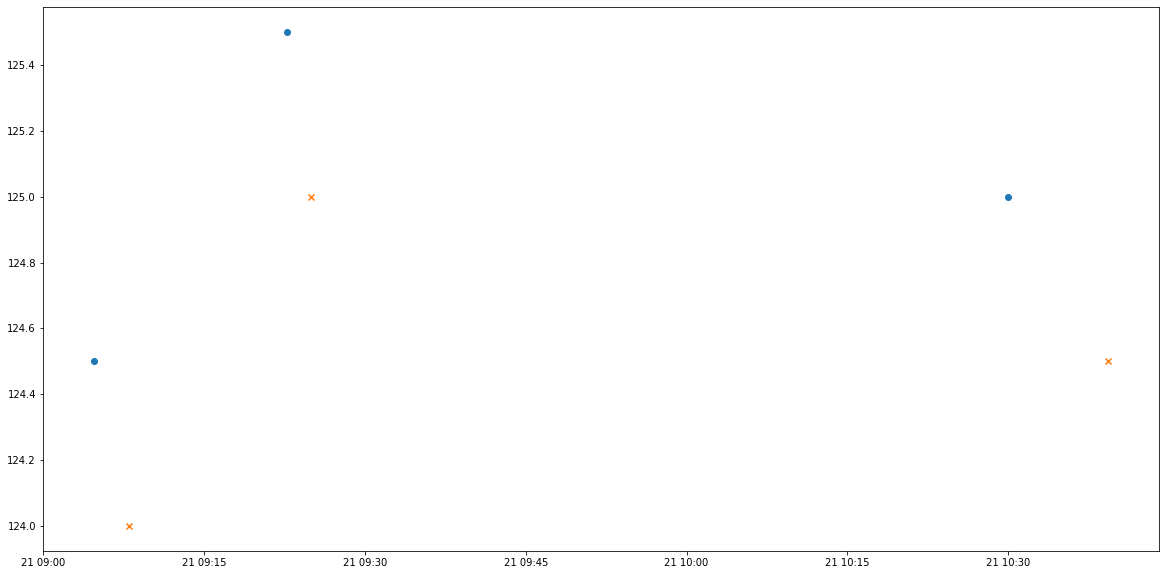

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90007197
daily_low  121.0
daily_low * theta 121.60499999999999
bid1_p:  123.5
# sell:  15   # buy:  3
bid1_q:  1   bid2_q:  18
進場時間： 100557565 
  sell price at  123.5
stop profit
出場時間： 100914910
buy at 123.0
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


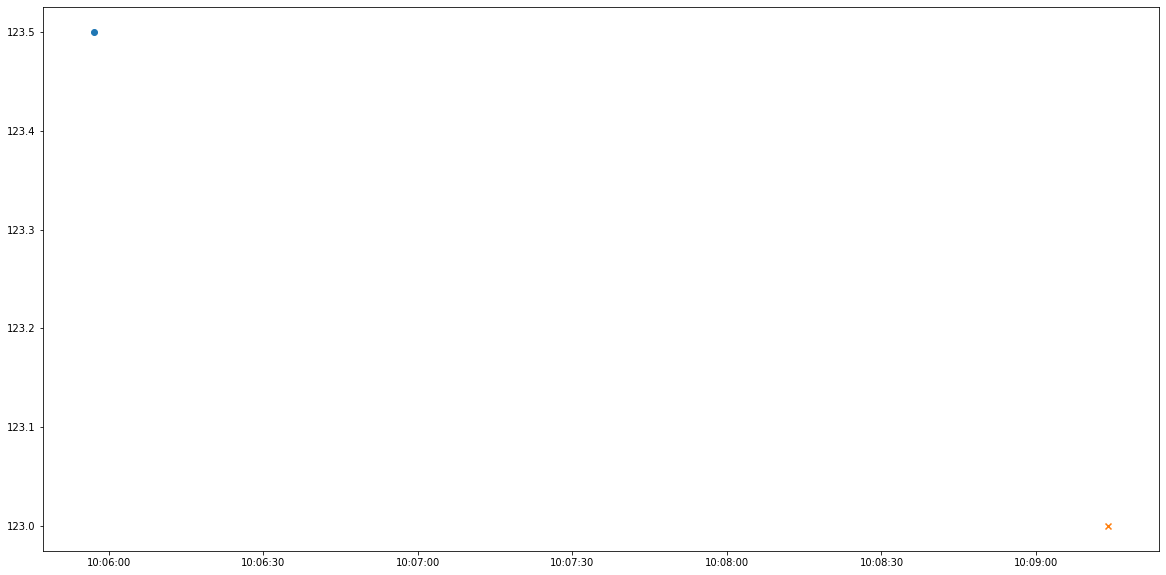

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90004234
daily_low  118.0
daily_low * theta 118.58999999999999
bid1_p:  120.0
# sell:  21   # buy:  1
bid1_q:  4   bid2_q:  17
進場時間： 112039310 
  sell price at  120.0
time out
出場時間： 113051623
buy at 120.0
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


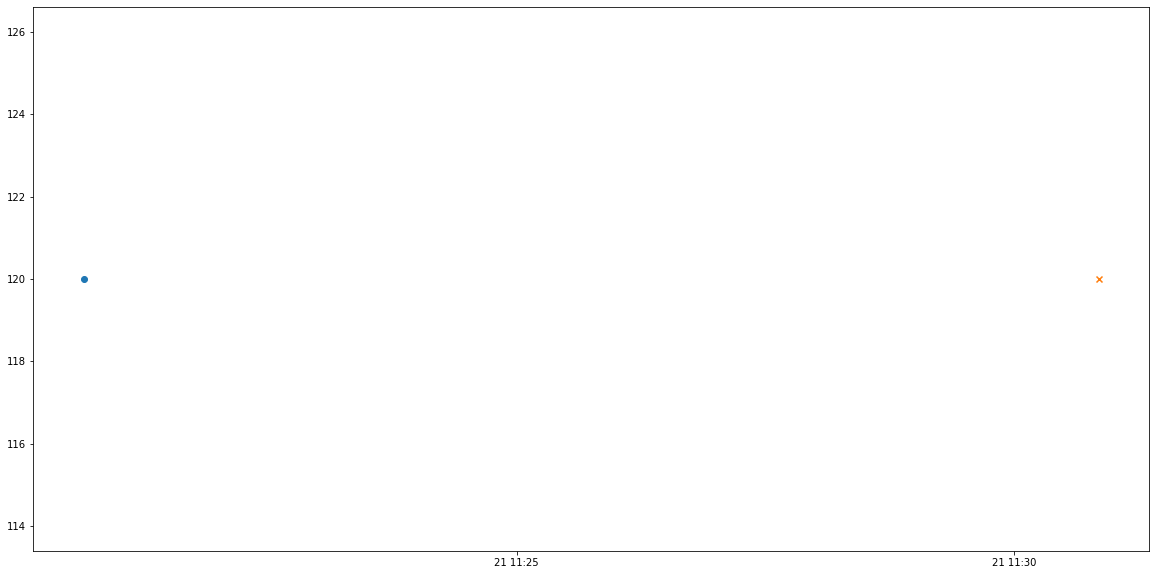

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90007012
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  120.5
# sell:  35   # buy:  2
bid1_q:  4   bid2_q:  36
進場時間： 94854271 
  sell price at  120.5
stop profit
出場時間： 95439983
buy at 120.0
get 0.5
------------------------------
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  122.0
# sell:  63   # buy:  1
bid1_q:  48   bid2_q:  20
進場時間： 101025141 
  sell price at  122.0
stop profit
出場時間： 101919884
buy at 121.5
get 0.5
------------------------------
daily_low  117.5
daily_low * theta 118.08749999999999
bid1_p:  120.0
# sell:  95   # buy:  0
bid1_q:  25   bid2_q:  79
進場時間： 113325386 
  sell price at  120.0
stop profit
出場時間： 113849281
buy at 119.5
get 0.5
------------------------------
----------

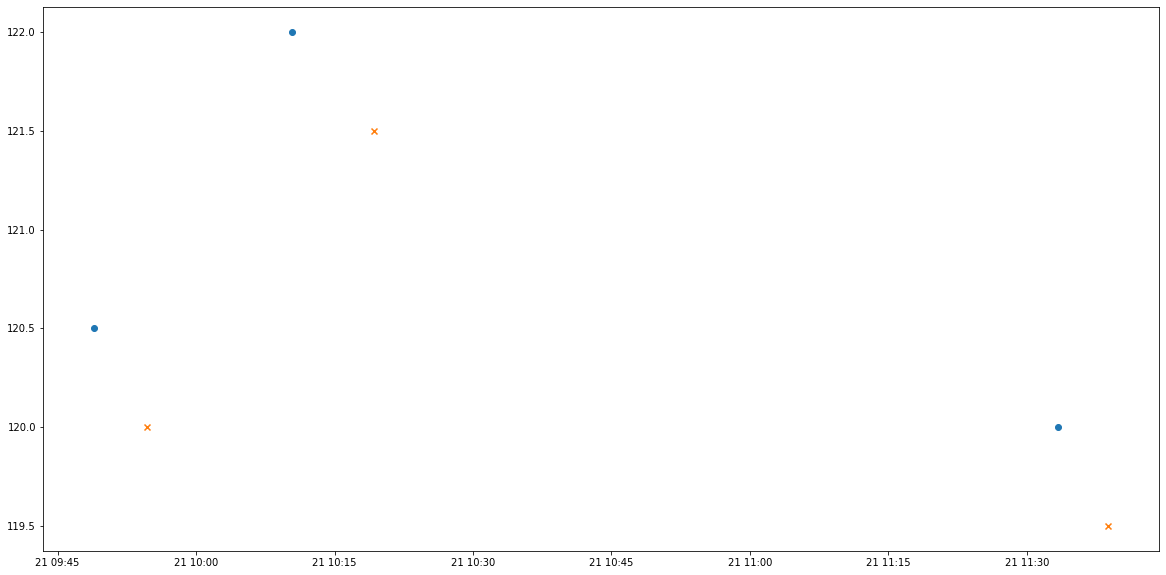

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90008905
daily_low  118.5
daily_low * theta 119.09249999999999
bid1_p:  120.5
# sell:  19   # buy:  5
bid1_q:  2   bid2_q:  10
進場時間： 91836324 
  sell price at  120.5
stop profit
出場時間： 92317968
buy at 120.0
get 0.5
------------------------------
daily_low  118.5
daily_low * theta 119.09249999999999
bid1_p:  120.0
# sell:  37   # buy:  18
bid1_q:  1   bid2_q:  32
進場時間： 92438236 
  sell price at  120.0
stop profit
出場時間： 92910732
buy at 119.5
get 0.5
------------------------------
----------Result Report--------------
profit:  1.0


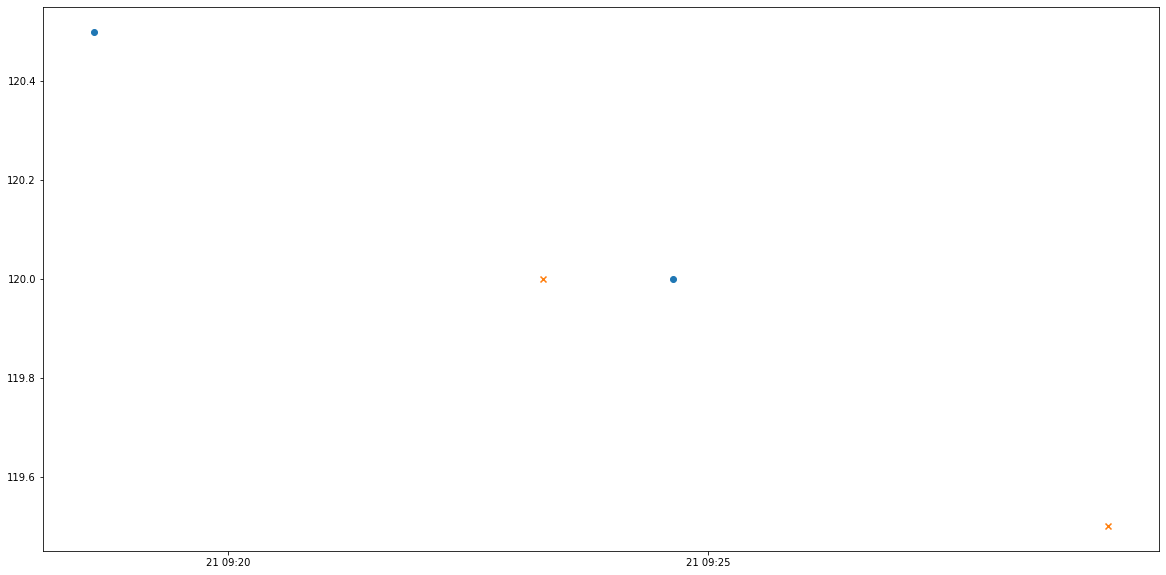

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90009370
daily_low  112.0
daily_low * theta 112.55999999999999
bid1_p:  114.0
# sell:  54   # buy:  3
bid1_q:  1   bid2_q:  63
進場時間： 93457996 
  sell price at  114.0
stop profit
出場時間： 93720435
buy at 113.5
get 0.5
------------------------------
daily_low  112.0
daily_low * theta 112.55999999999999
bid1_p:  117.0
# sell:  52   # buy:  0
bid1_q:  25   bid2_q:  43
進場時間： 103929399 
  sell price at  117.0
time out
出場時間： 104929694
buy at 118.0
get -1.0
------------------------------
daily_low  112.0
daily_low * theta 112.55999999999999
bid1_p:  119.0
# sell:  56   # buy:  19
bid1_q:  2   bid2_q:  65
進場時間： 121417507 
  sell price at  119.0
time out
出場時間： 122422377
buy at 119.0
get 0.0
------------------------------
daily_low  112.

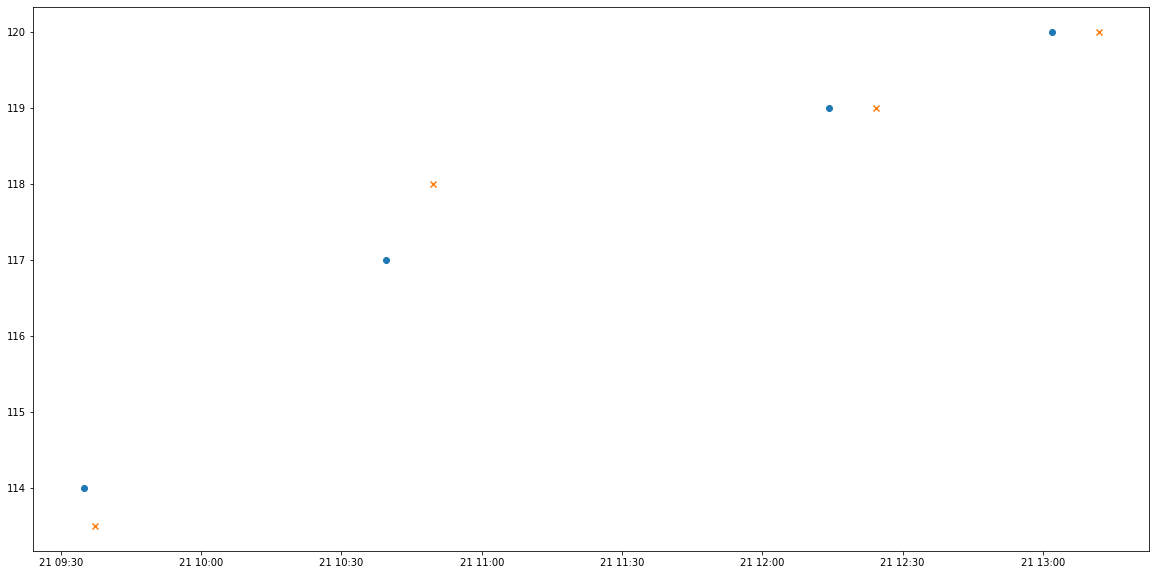

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90003626
daily_low  119.5
daily_low * theta 120.09749999999998
bid1_p:  121.5
# sell:  102   # buy:  0
bid1_q:  50   bid2_q:  68
進場時間： 91215582 
  sell price at  121.5
stop profit
出場時間： 91521381
buy at 121.0
get 0.5
------------------------------
daily_low  119.5
daily_low * theta 120.09749999999998
bid1_p:  121.5
# sell:  59   # buy:  0
bid1_q:  14   bid2_q:  46
進場時間： 92927490 
  sell price at  121.5
stop profit
出場時間： 93009387
buy at 121.0
get 0.5
------------------------------
daily_low  119.5
daily_low * theta 120.09749999999998
bid1_p:  120.5
# sell:  135   # buy:  5
bid1_q:  20   bid2_q:  158
進場時間： 95900088 
  sell price at  120.5
stop profit
出場時間： 95901445
buy at 120.0
get 0.5
------------------------------
daily_low 

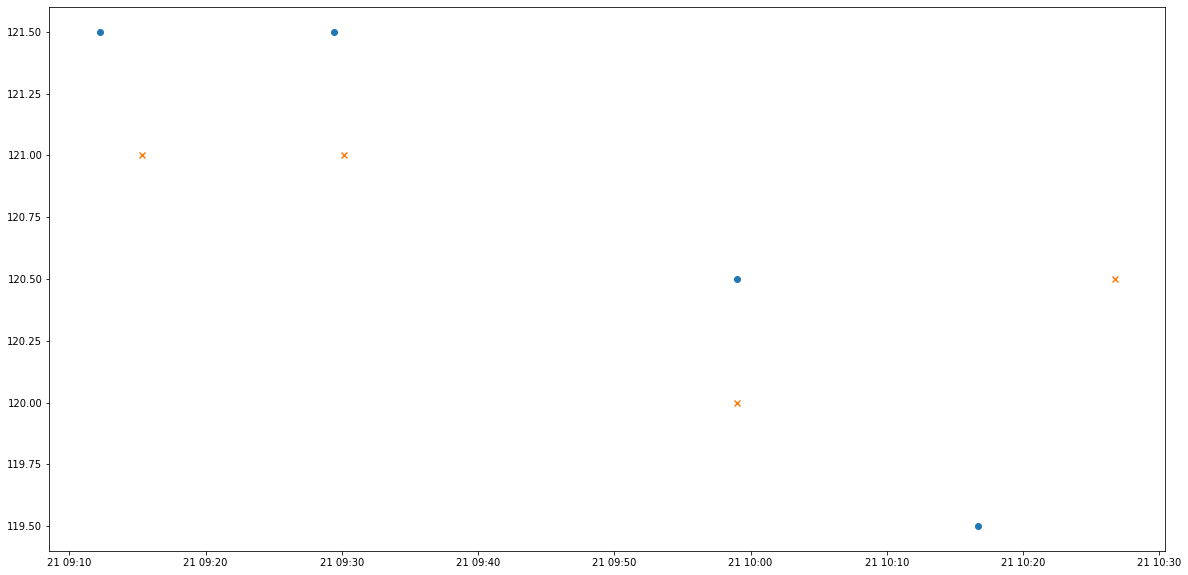

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/6278/tse_lob_6278.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/6278/tse_tick_6278.csv' mode='r' encoding='UTF-8'>
90005938
daily_low  120.5
daily_low * theta 121.10249999999999
bid1_p:  122.0
# sell:  46   # buy:  0
bid1_q:  15   bid2_q:  45
進場時間： 91533913 
  sell price at  122.0
time out
出場時間： 92535520
buy at 123.0
get -1.0
------------------------------
daily_low  120.5
daily_low * theta 121.10249999999999
bid1_p:  122.5
# sell:  89   # buy:  12
bid1_q:  2   bid2_q:  63
進場時間： 92804711 
  sell price at  122.5
time out
出場時間： 93805398
buy at 122.5
get 0.0
------------------------------
daily_low  120.5
daily_low * theta 121.10249999999999
bid1_p:  121.5
# sell:  117   # buy:  2
bid1_q:  10   bid2_q:  132
進場時間： 120738322 
  sell price at  121.5
time out
出場時間： 121738528
buy at 121.5
get 0.0
------------------------------
----------Result 

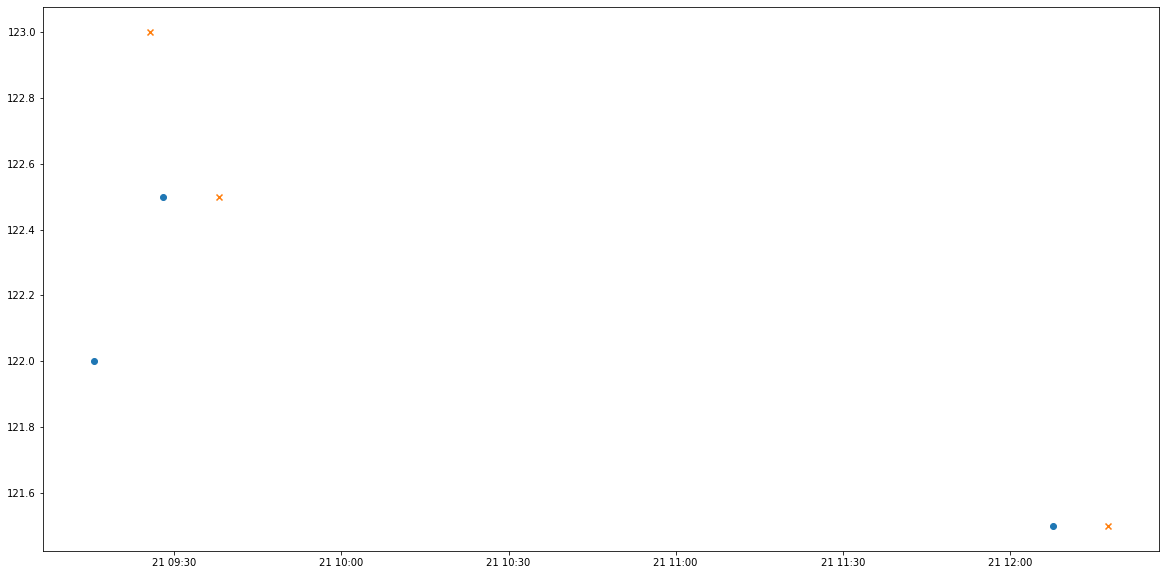

In [99]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "6278")

In [100]:
res

[(0.5, 130.5, 0, 0),
 (-1.0, 937.5, 0, 0),
 (-1.5, 2212.5, 0, 0),
 (1.5, 970.5, 0, 0),
 (-3.0, 2441.5, 0, 0),
 (0.5, 1400.5, 0, 0),
 (-1.5, 1149.5, 0, 0),
 (-3.5, 3926.5, 0, 0),
 (2.5, 1292.0, 0, 0),
 (3.5, 968.5, 0, 0),
 (-0.5, 2552.5, 0, 0),
 (-1.5, 2143.5, 0, 0),
 (-0.5, 1761.5, 0, 0),
 (2.0, 1041.0, 0, 0),
 (-0.5, 443.0, 0, 0),
 (2.5, 838.5, 0, 0),
 (2.5, 2133.5, 0, 0),
 (0.0, 2311.0, 0, 0),
 (2.5, 1130.5, 0, 0),
 (0.0, 377.0, 0, 0),
 (-1.5, 914.5, 0, 0),
 (0.5, 130.0, 0, 0),
 (-1.0, 533.5, 0, 0),
 (0, 0, 0, 0),
 (-2.0, 1414.5, 0, 0),
 (0.5, 140.5, 0, 0),
 (0.5, 136.0, 0, 0),
 (1.5, 662.5, 0, 0),
 (0.0, 525.5, 0, 0),
 (0.0, 403.0, 0, 0),
 (-1.0, 534.5, 0, 0),
 (-1.0, 817.5, 0, 0),
 (0.0, 410.5, 0, 0),
 (0.0, 136.5, 0, 0),
 (2.5, 614.0, 0, 0),
 (0.0, 1076.0, 0, 0),
 (0.0, 846.0, 0, 0),
 (1.5, 375.0, 0, 0),
 (0.5, 123.5, 0, 0),
 (0.0, 120.0, 0, 0),
 (1.5, 362.5, 0, 0),
 (1.0, 240.5, 0, 0),
 (-0.5, 470.0, 0, 0),
 (0.5, 483.0, 0, 0),
 (-1.0, 366.0, 0, 0)]

# EOF

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000698
daily_low  326.5
daily_low * theta 328.1325
bid1_p:  330.0
# sell:  93   # buy:  7
bid1_q:  112   bid2_q:  7
進場時間： 90737376 
  sell price at  330.0
stop profit
出場時間： 90739738
buy at 329.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


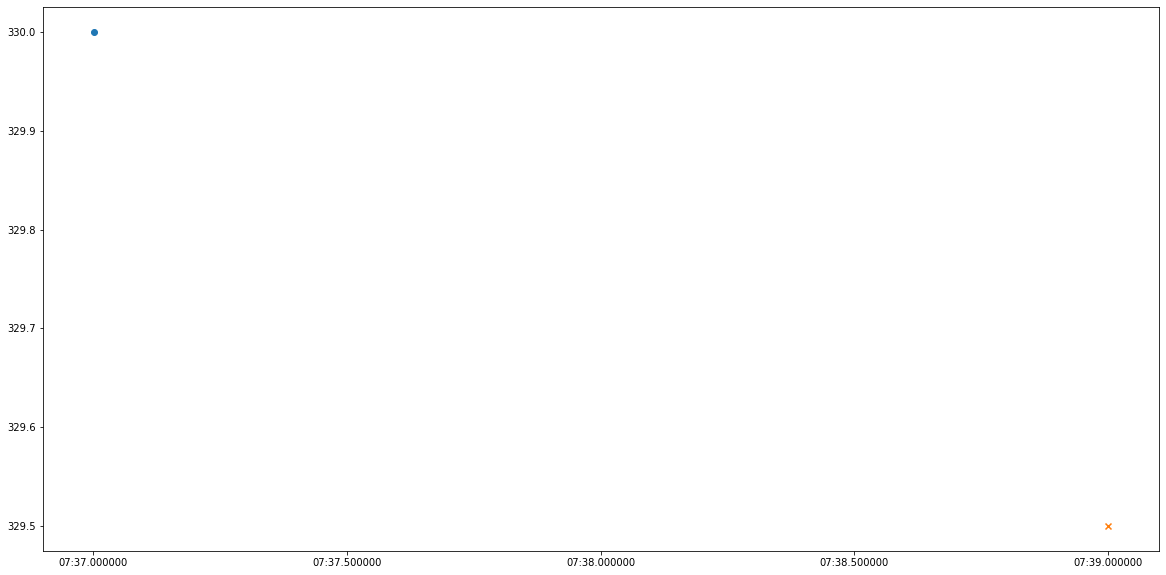

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000440
daily_low  332.0
daily_low * theta 333.65999999999997
bid1_p:  334.0
# sell:  252   # buy:  8
bid1_q:  120   bid2_q:  173
進場時間： 91640383 
  sell price at  334.0
time out
出場時間： 92641313
buy at 334.0
get 0.0
------------------------------
daily_low  332.0
daily_low * theta 333.65999999999997
bid1_p:  334.0
# sell:  231   # buy:  1
bid1_q:  187   bid2_q:  112
進場時間： 92817096 
  sell price at  334.0
time out
出場時間： 93817241
buy at 334.5
get -0.5
------------------------------
daily_low  332.0
daily_low * theta 333.65999999999997
bid1_p:  335.5
# sell:  63   # buy:  9
bid1_q:  1   bid2_q:  39
進場時間： 113007198 
  sell price at  335.5
time out
出場時間： 114007555
buy at 336.5
get -1.0
------------------------------
----------Res

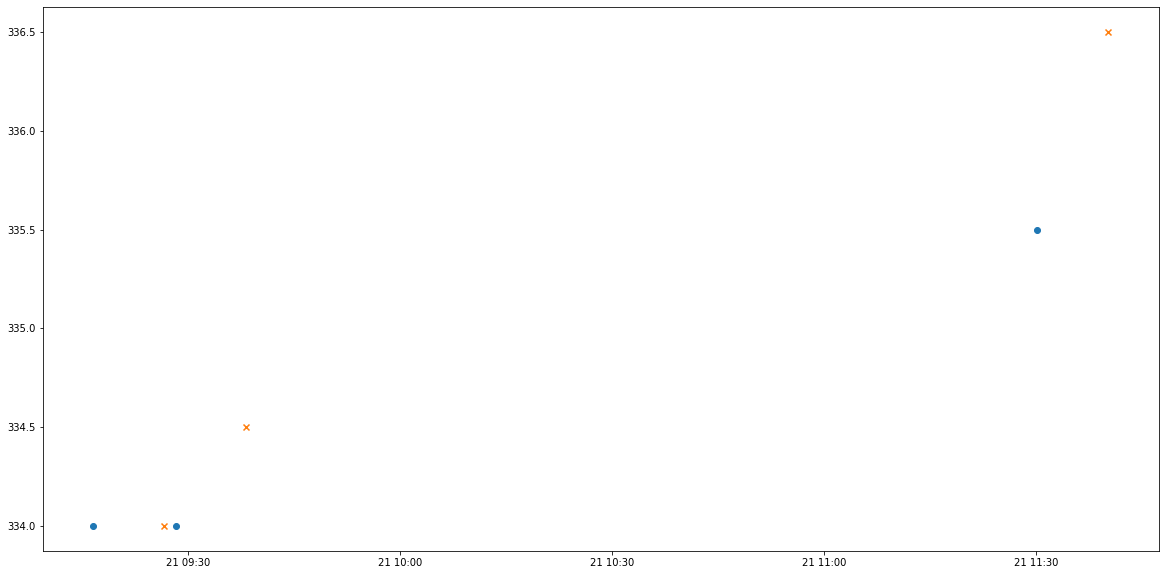

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000774
----------Result Report--------------
profit:  0


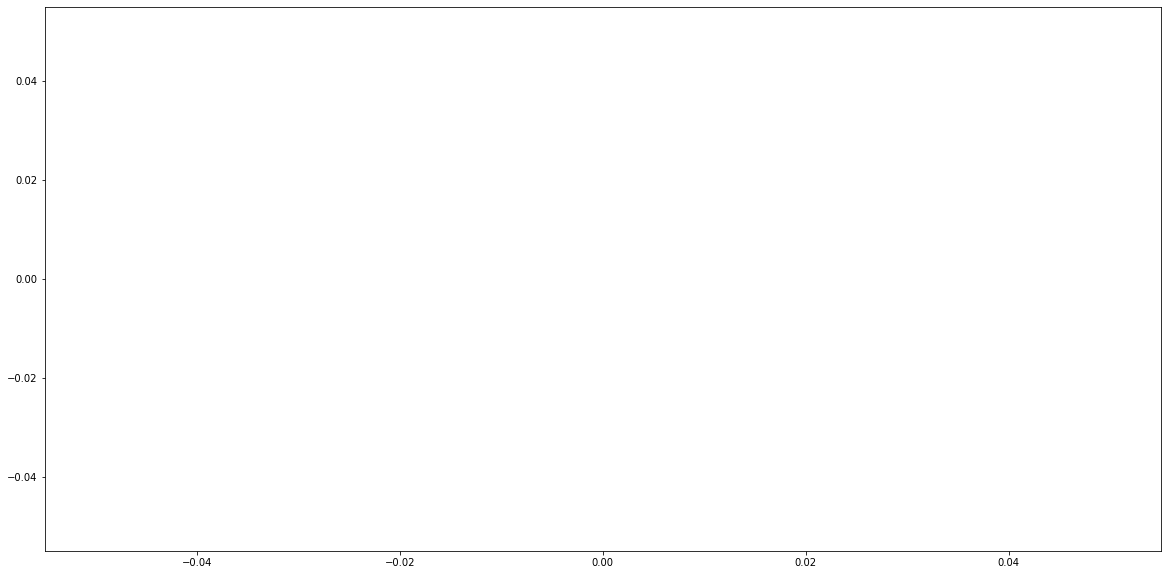

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000560
daily_low  337.5
daily_low * theta 339.18749999999994
bid1_p:  340.5
# sell:  81   # buy:  7
bid1_q:  6   bid2_q:  93
進場時間： 90521469 
  sell price at  340.5
time out
出場時間： 91521765
buy at 341.0
get -0.5
------------------------------
----------Result Report--------------
profit:  -0.5


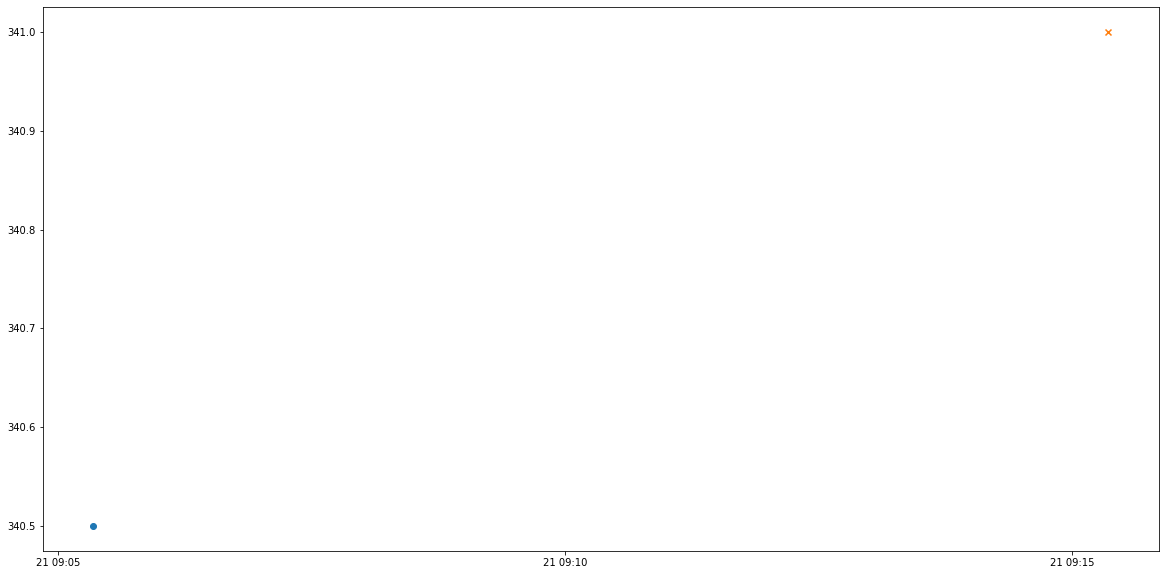

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000989
----------Result Report--------------
profit:  0


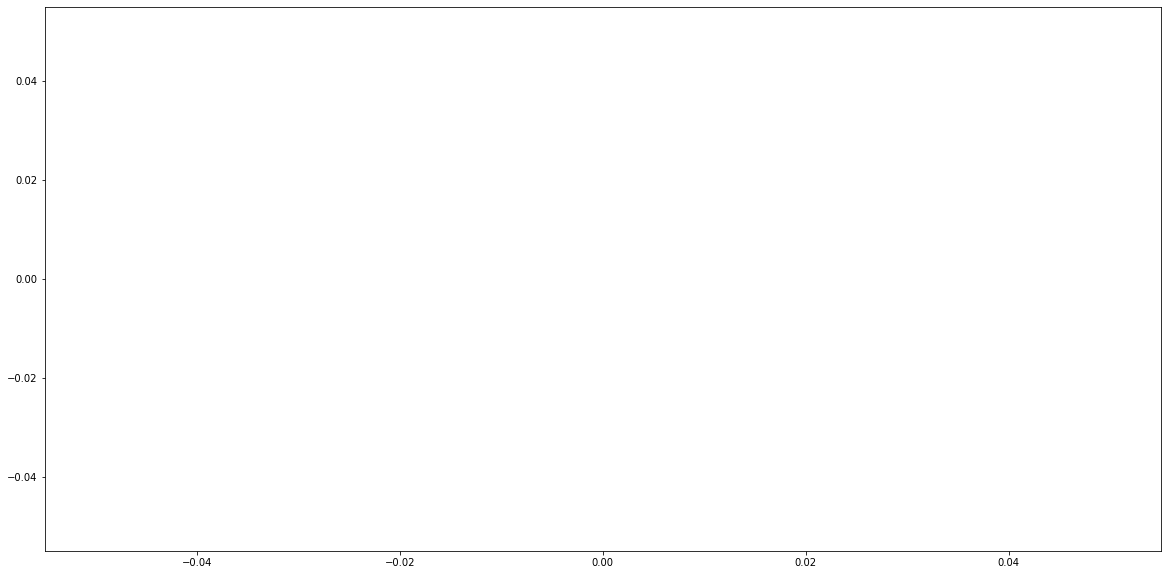

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000937
daily_low  345.5
daily_low * theta 347.22749999999996
bid1_p:  348.0
# sell:  86   # buy:  1
bid1_q:  6   bid2_q:  99
進場時間： 94336039 
  sell price at  348.0
stop profit
出場時間： 94705134
buy at 347.5
get 0.5
------------------------------
daily_low  345.5
daily_low * theta 347.22749999999996
bid1_p:  347.5
# sell:  152   # buy:  64
bid1_q:  50   bid2_q:  98
進場時間： 94923208 
  sell price at  347.5
stop profit
出場時間： 95127452
buy at 347.0
get 0.5
------------------------------
----------Result Report--------------
profit:  1.0


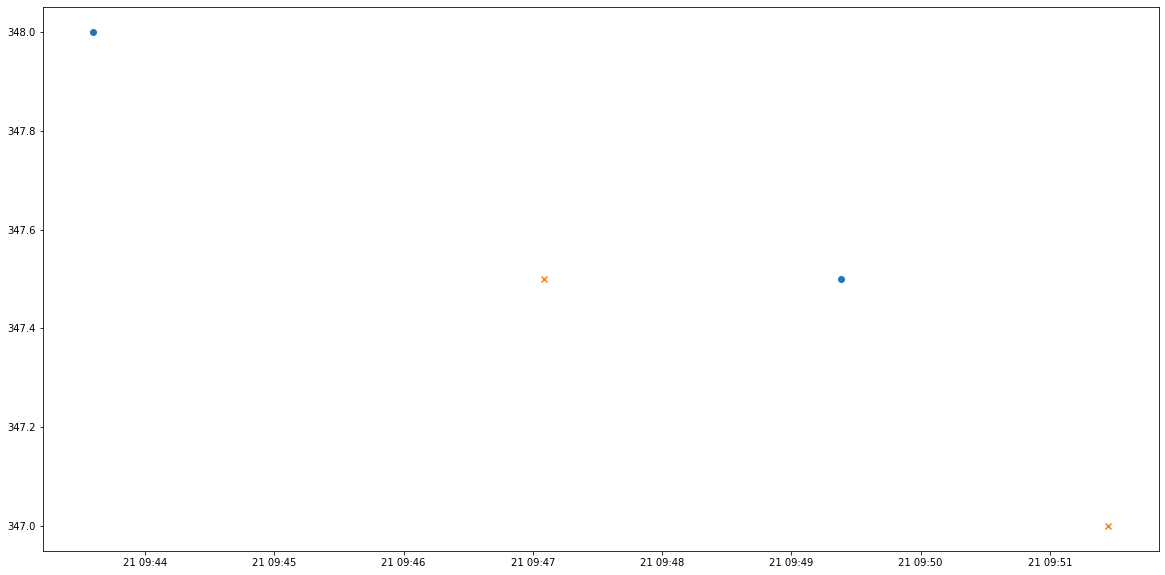

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000587
----------Result Report--------------
profit:  0


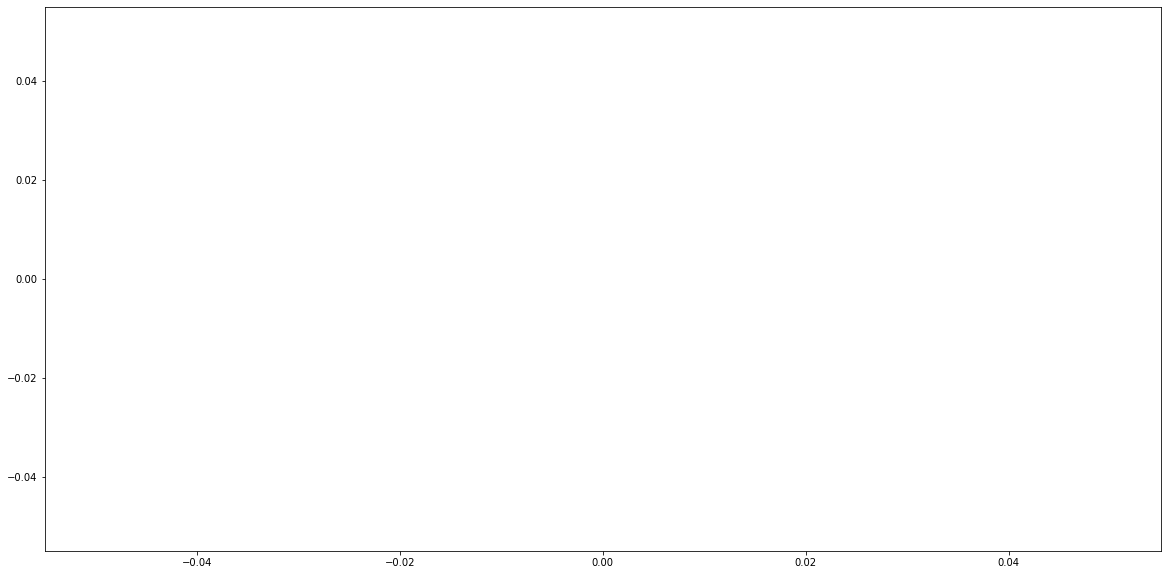

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000644
daily_low  354.5
daily_low * theta 356.2725
bid1_p:  357.0
# sell:  301   # buy:  11
bid1_q:  31   bid2_q:  201
進場時間： 91123699 
  sell price at  357.0
time out
出場時間： 92123960
buy at 357.5
get -0.5
------------------------------
daily_low  354.5
daily_low * theta 356.2725
bid1_p:  357.0
# sell:  706   # buy:  1
bid1_q:  185   bid2_q:  722
進場時間： 102254708 
  sell price at  357.0
stop profit
出場時間： 102510406
buy at 356.5
get 0.5
------------------------------
daily_low  354.5
daily_low * theta 356.2725
bid1_p:  357.0
# sell:  704   # buy:  0
bid1_q:  306   bid2_q:  589
進場時間： 113834974 
  sell price at  357.0
time out
出場時間： 114835063
buy at 357.5
get -0.5
------------------------------
daily_low  354.5
daily_low * theta

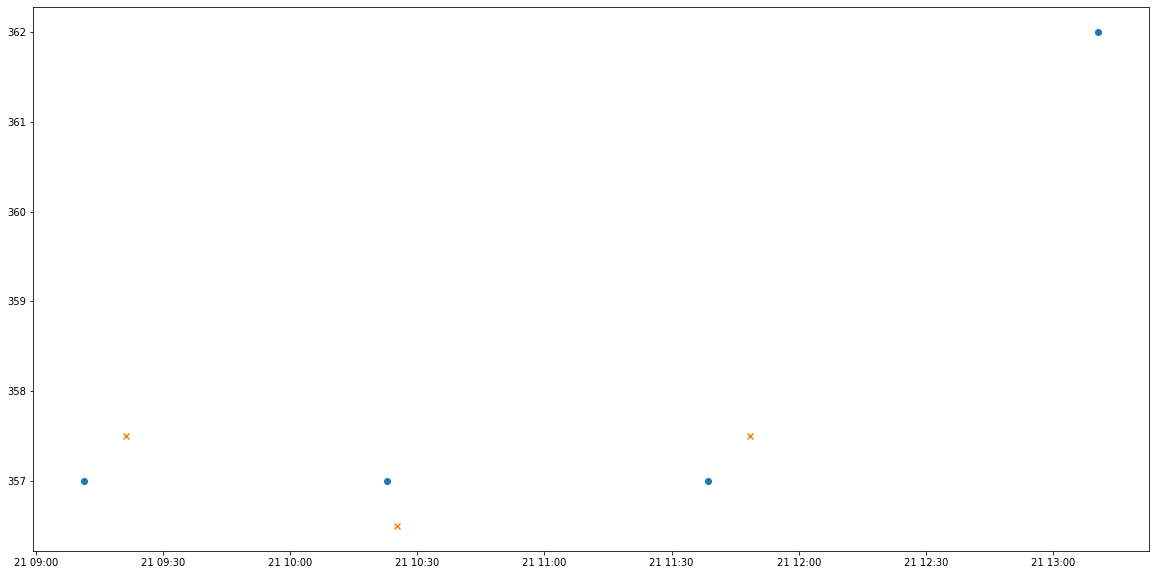

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000395
------Weird price!!!!!---------
At time:  90028289
tick_row_price 367.0
ask_1_p 367.5
bid_1_p 366.5
daily_low  365.5
daily_low * theta 367.3275
bid1_p:  369.0
# sell:  143   # buy:  8
bid1_q:  37   bid2_q:  150
進場時間： 90157228 
  sell price at  369.0
time out
出場時間： 91157350
buy at 370.0
get -1.0
------------------------------
----------Result Report--------------
profit:  -1.0


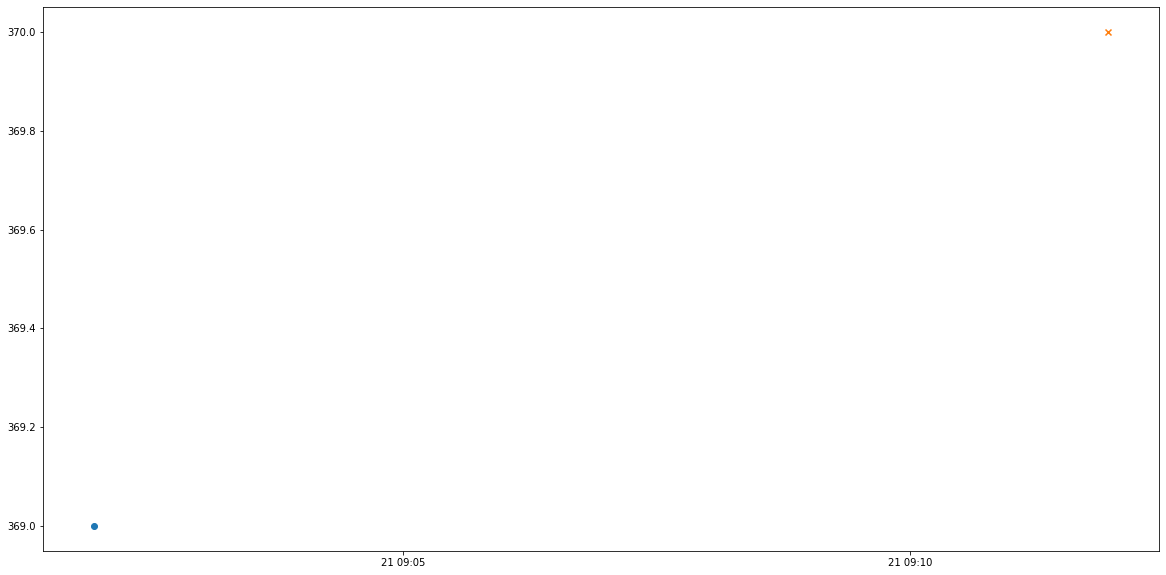

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000383
----------Result Report--------------
profit:  0


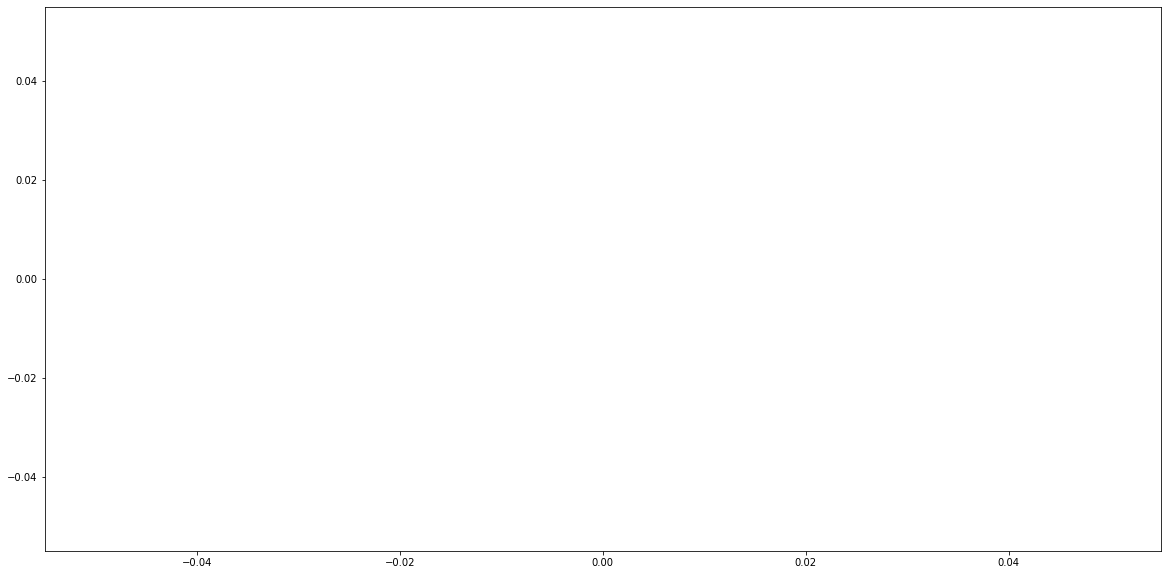

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000576
daily_low  360.0
daily_low * theta 361.79999999999995
bid1_p:  362.0
# sell:  147   # buy:  5
bid1_q:  26   bid2_q:  162
進場時間： 90959289 
  sell price at  362.0
stop profit
出場時間： 91228600
buy at 361.5
get 0.5
------------------------------
daily_low  360.0
daily_low * theta 361.79999999999995
bid1_p:  368.0
# sell:  138   # buy:  8
bid1_q:  45   bid2_q:  134
進場時間： 103658283 
  sell price at  368.0
stop profit
出場時間： 103801306
buy at 367.5
get 0.5
------------------------------
daily_low  360.0
daily_low * theta 361.79999999999995
bid1_p:  368.0
# sell:  515   # buy:  9
bid1_q:  146   bid2_q:  497
進場時間： 120644816 
  sell price at  368.0
stop profit
出場時間： 121040454
buy at 367.5
get 0.5
------------------------------
da

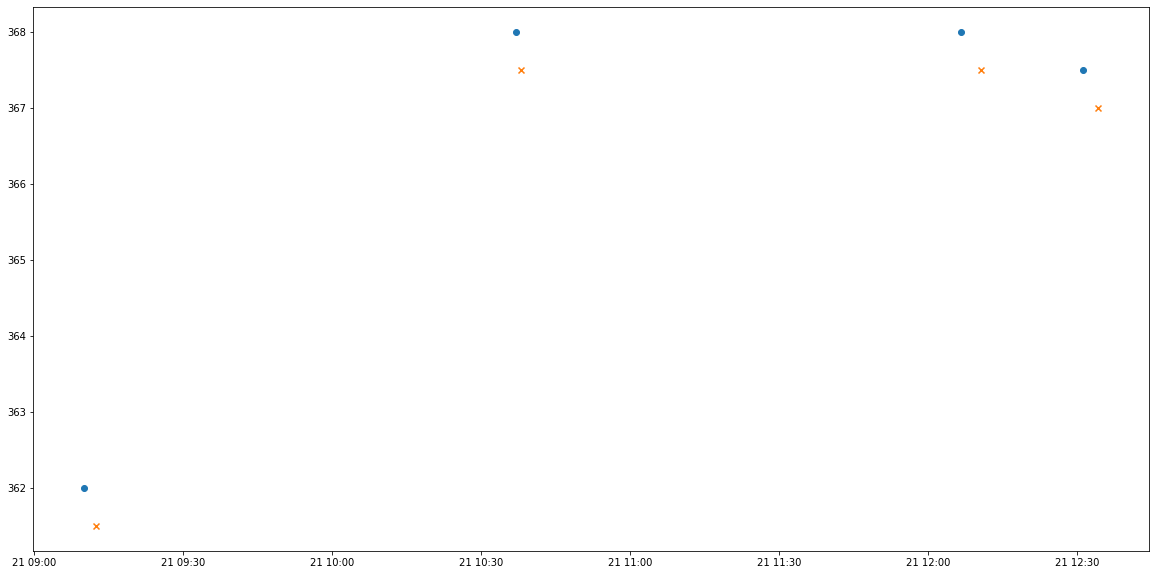

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000439
------Weird price!!!!!---------
At time:  90352646
tick_row_price 368.5
ask_1_p 369.0
bid_1_p 367.5
daily_low  363.5
daily_low * theta 365.31749999999994
bid1_p:  365.5
# sell:  119   # buy:  6
bid1_q:  7   bid2_q:  138
進場時間： 91004211 
  sell price at  365.5
stop profit
出場時間： 91018532
buy at 365.0
get 0.5
------------------------------
daily_low  362.5
daily_low * theta 364.31249999999994
bid1_p:  368.0
# sell:  173   # buy:  9
bid1_q:  1   bid2_q:  117
進場時間： 105142551 
  sell price at  368.0
time out
出場時間： 110000028
buy at 368.5
get -0.5
------------------------------
daily_low  362.5
daily_low * theta 364.31249999999994
bid1_p:  368.0
# sell:  94   # buy:  1
bid1_q:  1   bid2_q:  118
進場時間： 113317429 
  sell price

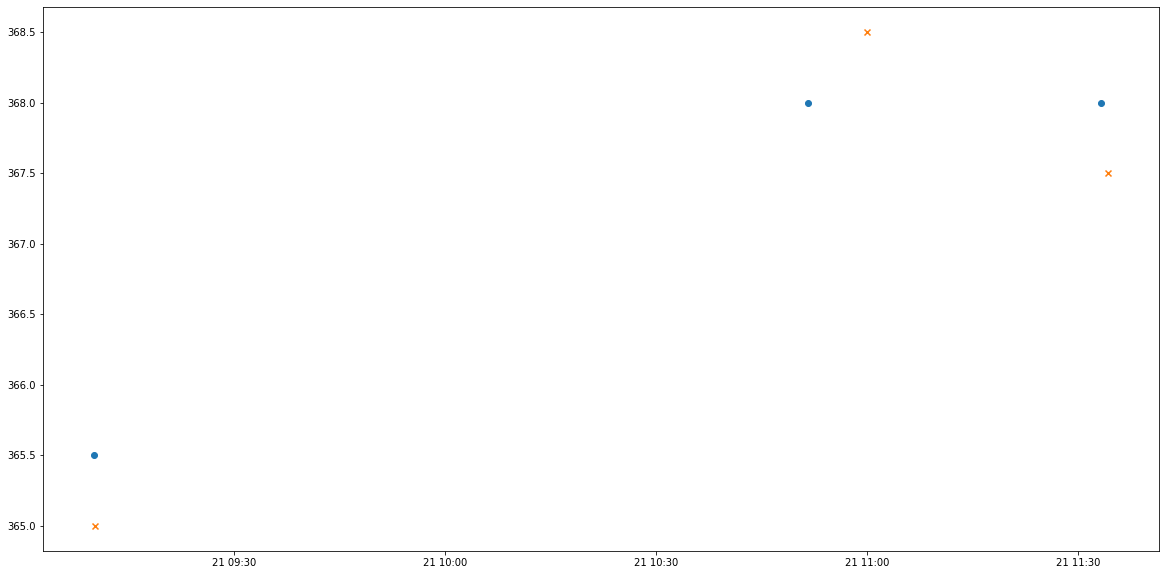

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000860
daily_low  371.5
daily_low * theta 373.35749999999996
bid1_p:  374.0
# sell:  153   # buy:  10
bid1_q:  77   bid2_q:  126
進場時間： 90849818 
  sell price at  374.0
time out
出場時間： 91849862
buy at 375.0
get -1.0
------------------------------
daily_low  371.5
daily_low * theta 373.35749999999996
bid1_p:  377.0
# sell:  147   # buy:  53
bid1_q:  64   bid2_q:  55
進場時間： 92819209 
  sell price at  377.0
stop profit
出場時間： 93039151
buy at 376.5
get 0.5
------------------------------
daily_low  371.5
daily_low * theta 373.35749999999996
bid1_p:  383.0
# sell:  170   # buy:  6
bid1_q:  75   bid2_q:  103
進場時間： 101729310 
  sell price at  383.0
stop profit
出場時間： 101747979
buy at 382.5
get 0.5
------------------------------
daily_

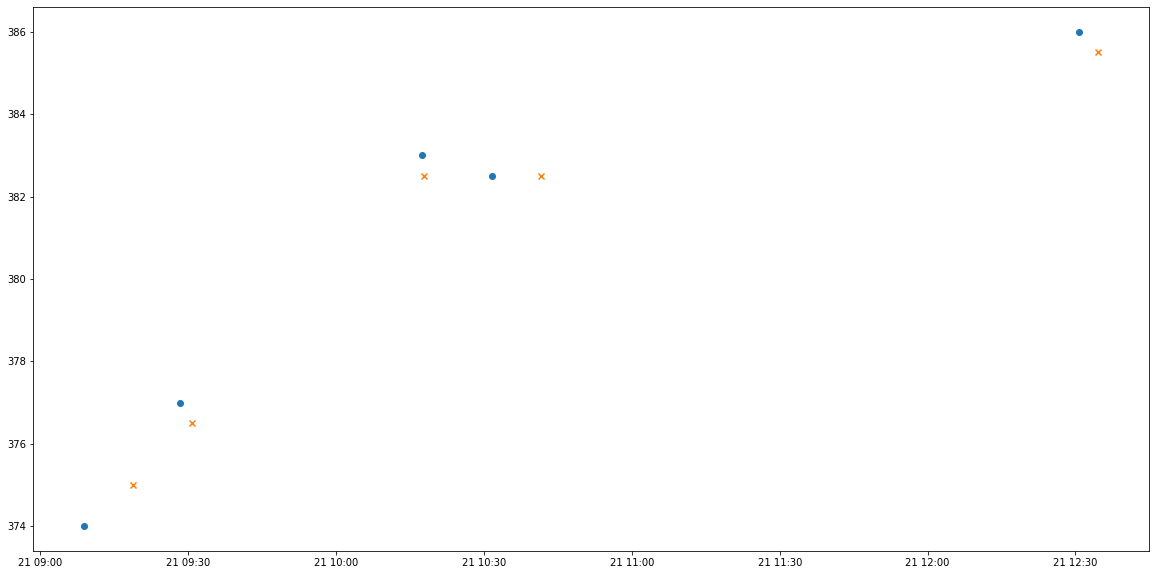

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000291
daily_low  379.0
daily_low * theta 380.895
bid1_p:  384.0
# sell:  253   # buy:  13
bid1_q:  67   bid2_q:  151
進場時間： 91542669 
  sell price at  384.0
stop profit
出場時間： 91612673
buy at 383.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


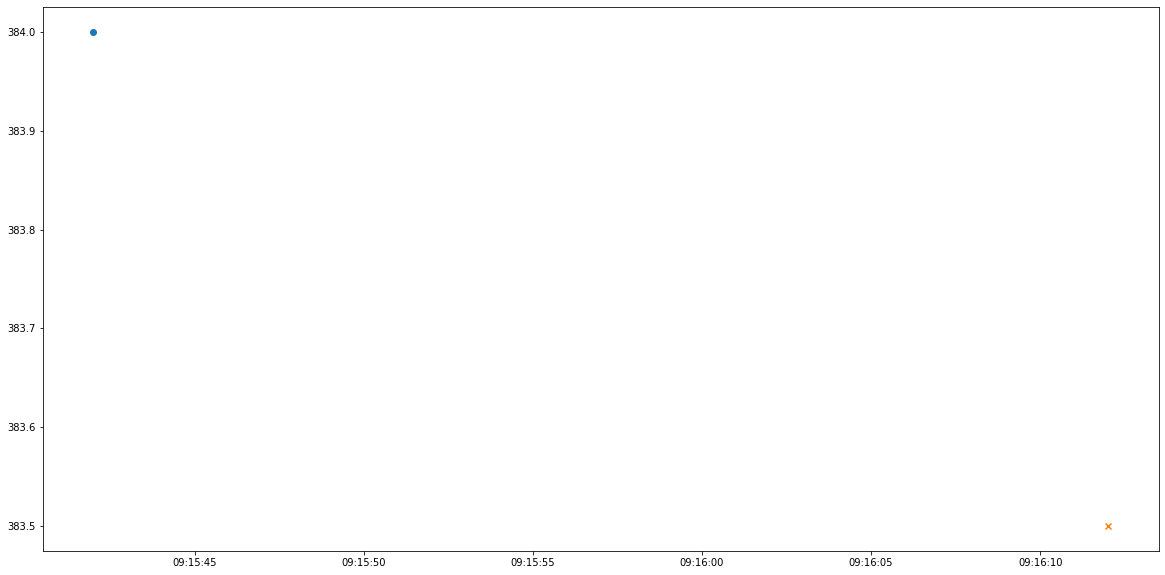

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000605
daily_low  379.0
daily_low * theta 380.895
bid1_p:  382.0
# sell:  361   # buy:  57
bid1_q:  216   bid2_q:  207
進場時間： 131856720 
  sell price at  382.0
----------Result Report--------------
profit:  0


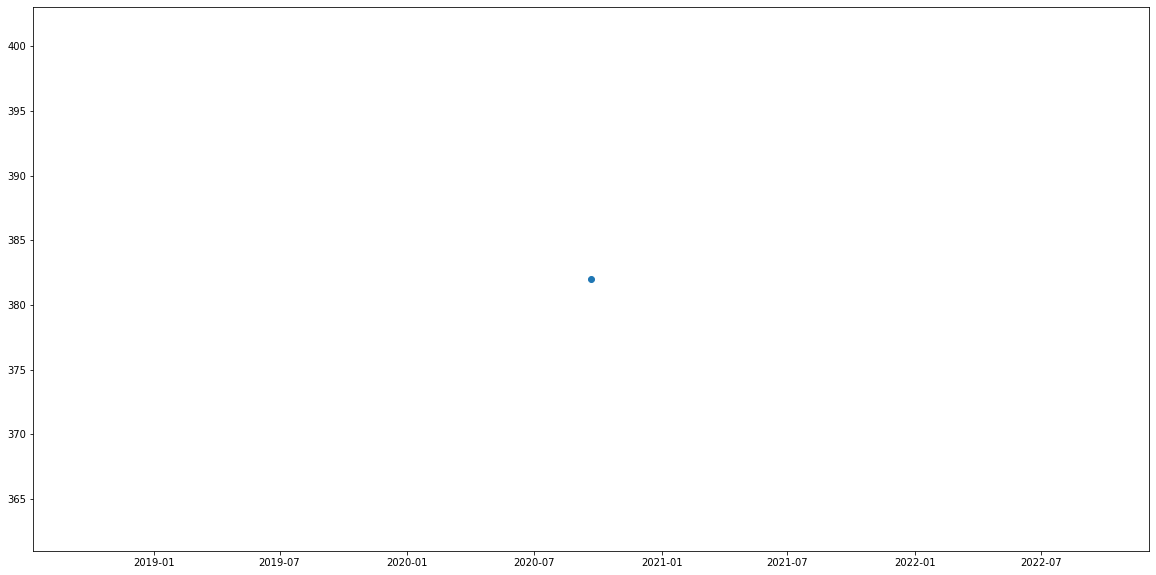

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000664
daily_low  386.0
daily_low * theta 387.92999999999995
bid1_p:  389.0
# sell:  269   # buy:  10
bid1_q:  117   bid2_q:  230
進場時間： 93736714 
  sell price at  389.0
stop profit
出場時間： 93759071
buy at 388.5
get 0.5
------------------------------
daily_low  386.0
daily_low * theta 387.92999999999995
bid1_p:  389.0
# sell:  144   # buy:  7
bid1_q:  65   bid2_q:  124
進場時間： 94415555 
  sell price at  389.0
stop profit
出場時間： 94602914
buy at 388.5
get 0.5
------------------------------
daily_low  386.0
daily_low * theta 387.92999999999995
bid1_p:  393.0
# sell:  167   # buy:  4
bid1_q:  26   bid2_q:  195
進場時間： 101527940 
  sell price at  393.0
stop profit
出場時間： 101600914
buy at 392.5
get 0.5
------------------------------
dai

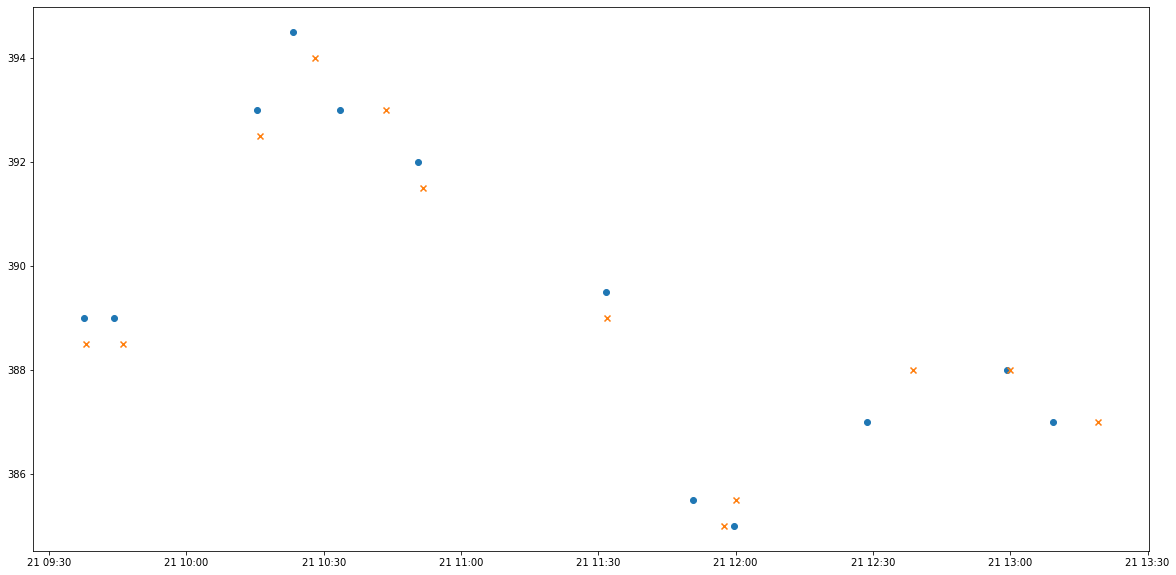

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000584
------Weird price!!!!!---------
At time:  90024645
tick_row_price 421.5
ask_1_p 422.0
bid_1_p 421.0
------Weird price!!!!!---------
At time:  90226744
tick_row_price 417.5
ask_1_p 418.0
bid_1_p 417.0
------Weird price!!!!!---------
At time:  90309692
tick_row_price 417.5
ask_1_p 418.0
bid_1_p 417.0
------Weird price!!!!!---------
At time:  90309692
tick_row_price 417.5
ask_1_p 418.0
bid_1_p 417.0
------Weird price!!!!!---------
At time:  90353040
tick_row_price 418.0
ask_1_p 418.5
bid_1_p 417.5
------Weird price!!!!!---------
At time:  90841840
tick_row_price 418.5
ask_1_p 419.0
bid_1_p 418.0
daily_low  416.5
daily_low * theta 418.5825
bid1_p:  423.5
# sell:  117   # buy:  2
bid1_q:  34   bid2_q:  100
進場時間： 9155615

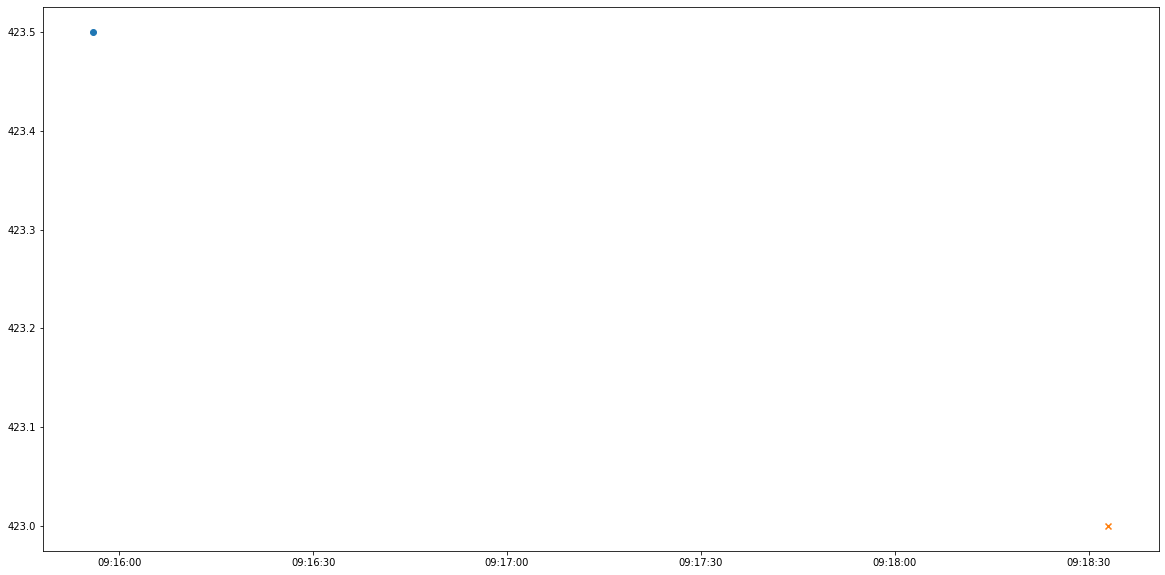

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000225
------Weird price!!!!!---------
At time:  93309418
tick_row_price 456.0
ask_1_p 456.5
bid_1_p 455.0
------Weird price!!!!!---------
At time:  93354533
tick_row_price 452.5
ask_1_p 453.0
bid_1_p 452.0
daily_low  451.0
daily_low * theta 453.25499999999994
bid1_p:  456.0
# sell:  48   # buy:  6
bid1_q:  30   bid2_q:  17
進場時間： 93540379 
  sell price at  456.0
------Weird price!!!!!---------
At time:  93638620
tick_row_price 459.5
ask_1_p 460.0
bid_1_p 458.5
stop profit
出場時間： 93919819
buy at 455.5
get 0.5
------------------------------
daily_low  451.0
daily_low * theta 453.25499999999994
bid1_p:  456.5
# sell:  25   # buy:  2
bid1_q:  1   bid2_q:  10
進場時間： 93951431 
  sell price at  456.5
stop profit
出場時間： 93951431
buy

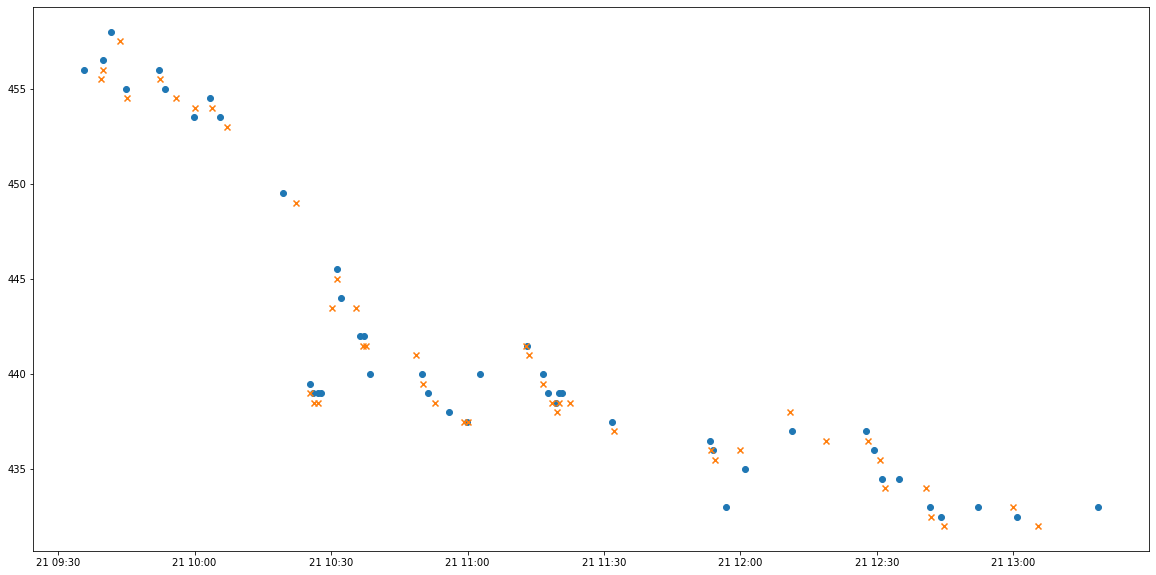

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000238
daily_low  425.0
daily_low * theta 427.12499999999994
bid1_p:  428.5
# sell:  303   # buy:  6
bid1_q:  97   bid2_q:  242
進場時間： 90517183 
  sell price at  428.5
stop profit
出場時間： 90517692
buy at 428.0
get 0.5
------------------------------
daily_low  419.5
daily_low * theta 421.59749999999997
bid1_p:  422.0
# sell:  138   # buy:  1
bid1_q:  61   bid2_q:  110
進場時間： 94101953 
  sell price at  422.0
stop profit
出場時間： 94154533
buy at 421.5
get 0.5
------------------------------
daily_low  419.5
daily_low * theta 421.59749999999997
bid1_p:  424.0
# sell:  131   # buy:  3
bid1_q:  18   bid2_q:  90
進場時間： 95810917 
  sell price at  424.0
stop profit
出場時間： 95824183
buy at 423.5
get 0.5
------------------------------
daily_lo

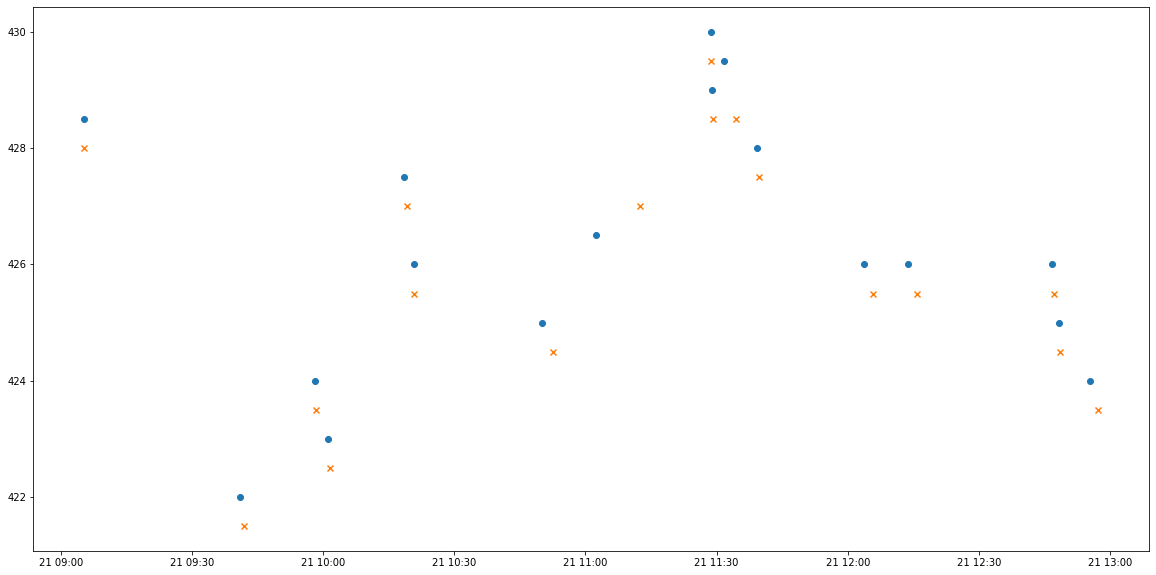

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000210
daily_low  436.0
daily_low * theta 438.17999999999995
bid1_p:  440.0
# sell:  32   # buy:  12
bid1_q:  19   bid2_q:  2
進場時間： 90100494 
  sell price at  440.0
------Weird price!!!!!---------
At time:  90101876
tick_row_price 440.0
ask_1_p 440.5
bid_1_p 439.5
stop profit
出場時間： 90111243
buy at 439.5
get 0.5
------------------------------
------Weird price!!!!!---------
At time:  90111548
tick_row_price 439.5
ask_1_p 440.0
bid_1_p 439.0
------Weird price!!!!!---------
At time:  90115696
tick_row_price 439.5
ask_1_p 440.0
bid_1_p 439.0
------Weird price!!!!!---------
At time:  90156248
tick_row_price 439.5
ask_1_p 440.0
bid_1_p 439.0
daily_low  436.0
daily_low * theta 438.17999999999995
bid1_p:  439.0
# sell:  123   # b

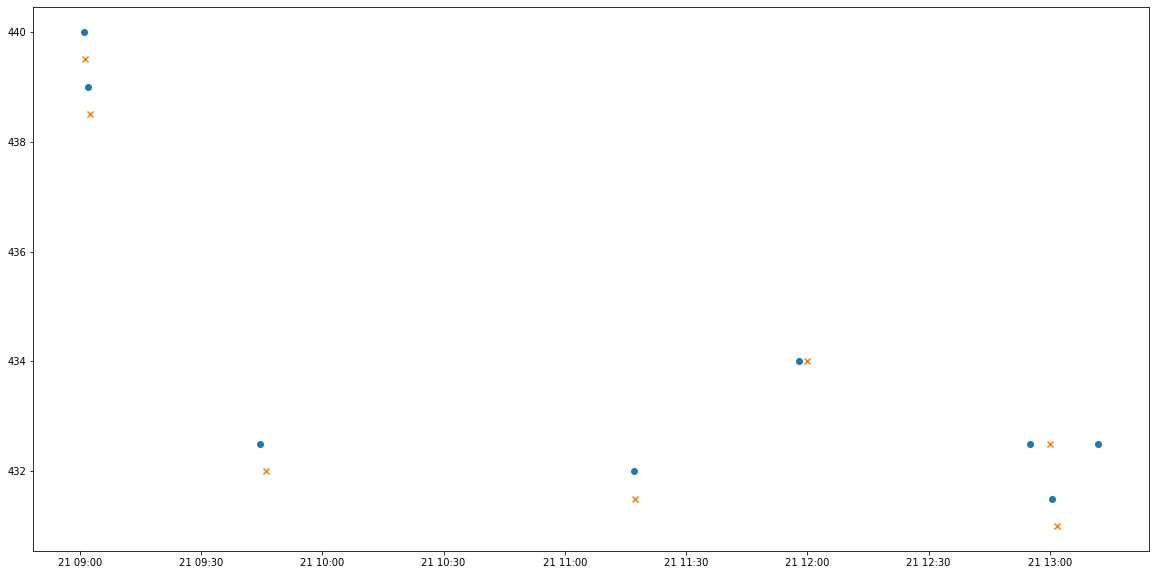

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000247
daily_low  426.0
daily_low * theta 428.12999999999994
bid1_p:  429.0
# sell:  77   # buy:  5
bid1_q:  40   bid2_q:  53
進場時間： 90911055 
  sell price at  429.0
stop profit
出場時間： 90923890
buy at 428.5
get 0.5
------------------------------
daily_low  426.0
daily_low * theta 428.12999999999994
bid1_p:  431.0
# sell:  135   # buy:  23
bid1_q:  66   bid2_q:  49
進場時間： 93957572 
  sell price at  431.0
stop profit
出場時間： 94049086
buy at 430.5
get 0.5
------------------------------
daily_low  426.0
daily_low * theta 428.12999999999994
bid1_p:  429.0
# sell:  223   # buy:  2
bid1_q:  19   bid2_q:  264
進場時間： 131908581 
  sell price at  429.0
----------Result Report--------------
profit:  1.0


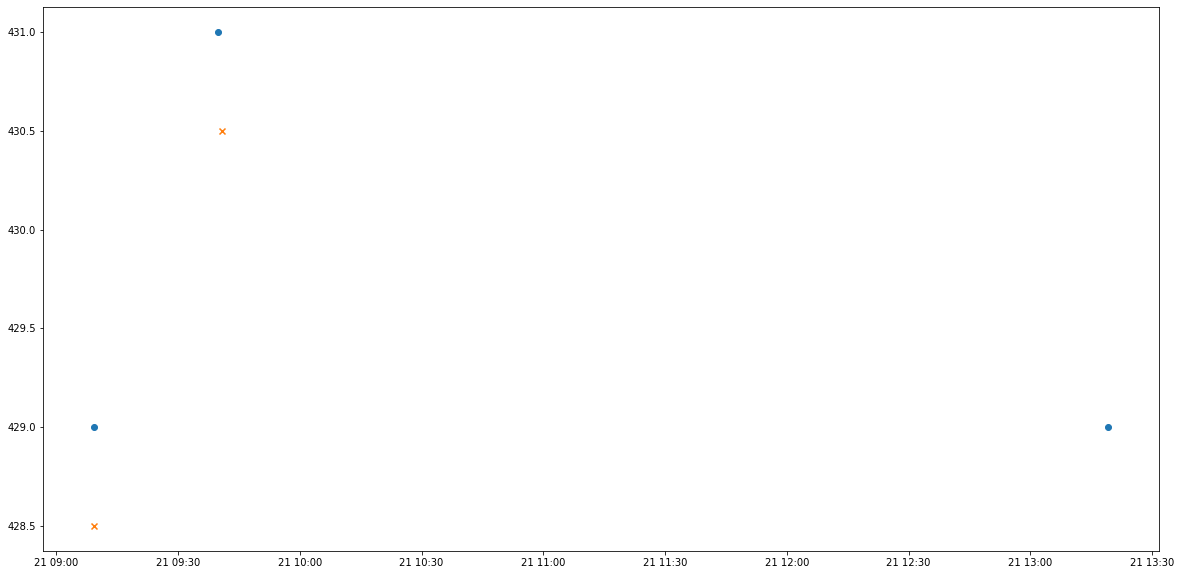

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000390
daily_low  420.5
daily_low * theta 422.60249999999996
bid1_p:  423.0
# sell:  156   # buy:  57
bid1_q:  75   bid2_q:  100
進場時間： 91439751 
  sell price at  423.0
stop profit
出場時間： 91627168
buy at 422.5
get 0.5
------------------------------
daily_low  420.5
daily_low * theta 422.60249999999996
bid1_p:  423.0
# sell:  111   # buy:  3
bid1_q:  3   bid2_q:  84
進場時間： 92054155 
  sell price at  423.0
stop profit
出場時間： 92115955
buy at 422.5
get 0.5
------------------------------
daily_low  415.5
daily_low * theta 417.57749999999993
bid1_p:  418.0
# sell:  144   # buy:  5
bid1_q:  1   bid2_q:  96
進場時間： 113827351 
  sell price at  418.0
stop profit
出場時間： 114142752
buy at 417.5
get 0.5
------------------------------
--------

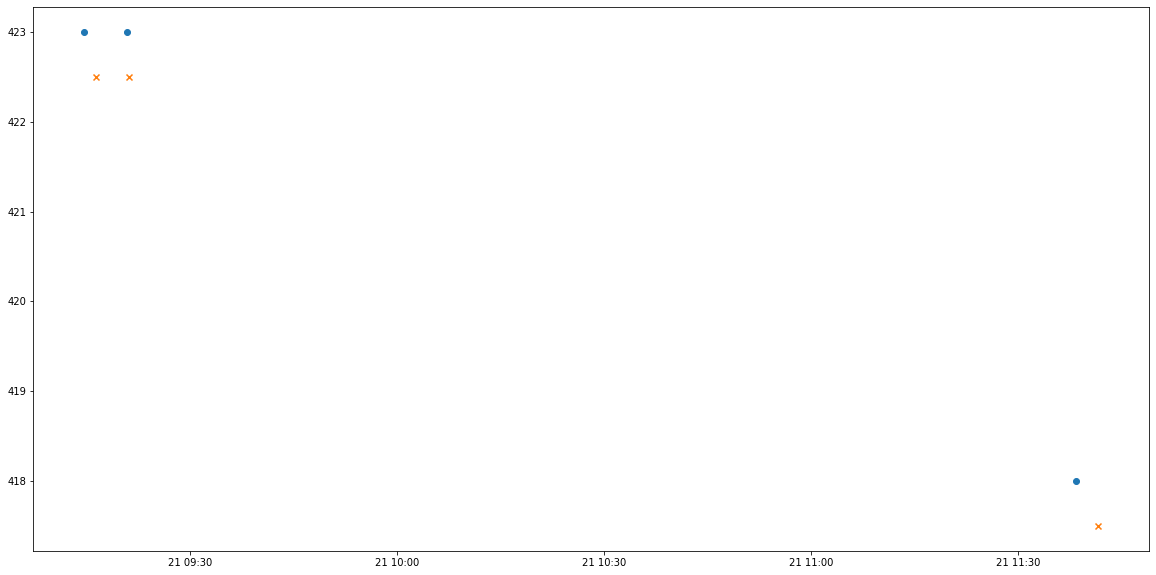

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000342
daily_low  418.5
daily_low * theta 420.5925
bid1_p:  421.0
# sell:  148   # buy:  8
bid1_q:  63   bid2_q:  116
進場時間： 101616995 
  sell price at  421.0
time out
出場時間： 102618319
buy at 421.5
get -0.5
------------------------------
daily_low  418.5
daily_low * theta 420.5925
bid1_p:  421.0
# sell:  162   # buy:  4
bid1_q:  20   bid2_q:  166
進場時間： 103635990 
  sell price at  421.0
stop profit
出場時間： 103737473
buy at 420.5
get 0.5
------------------------------
daily_low  418.5
daily_low * theta 420.5925
bid1_p:  421.5
# sell:  105   # buy:  35
bid1_q:  1   bid2_q:  106
進場時間： 122142575 
  sell price at  421.5
time out
出場時間： 123145361
buy at 421.5
get 0.0
------------------------------
----------Result Report-------------

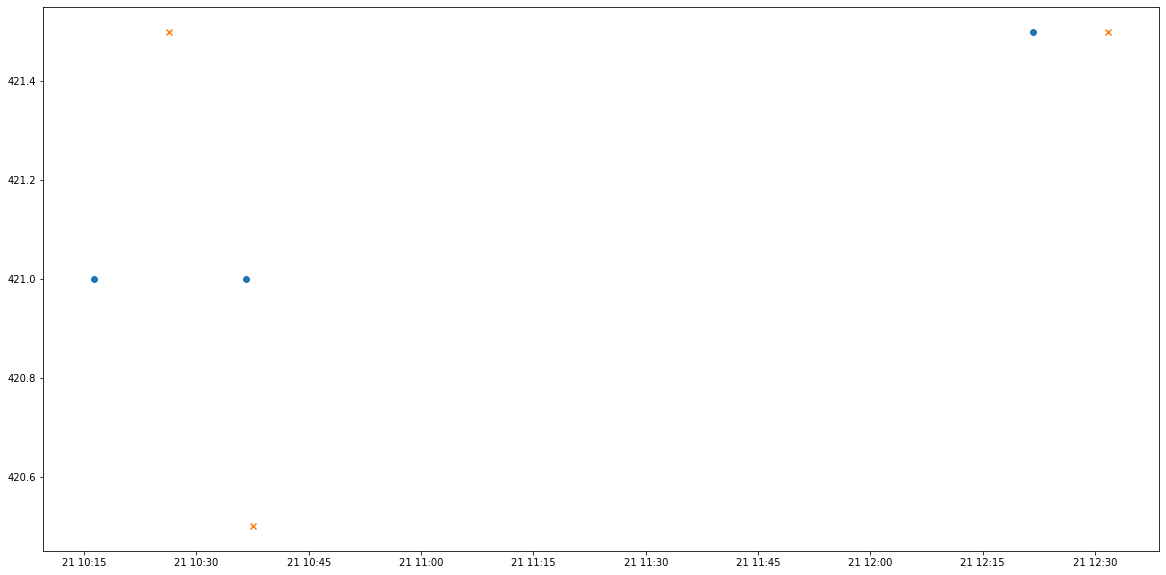

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000689
----------Result Report--------------
profit:  0


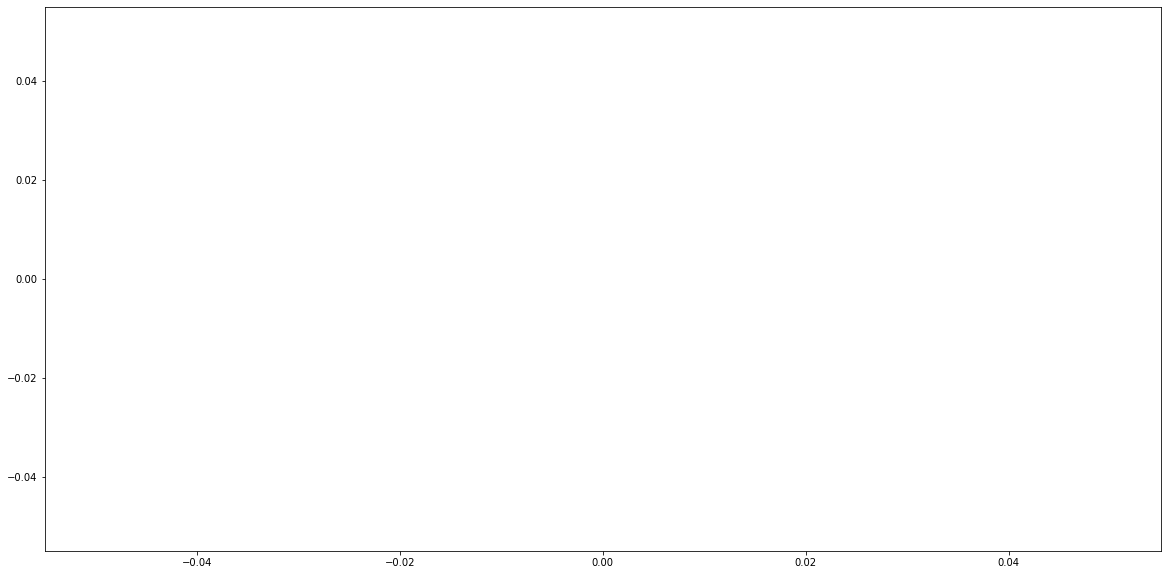

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000558
daily_low  433.5
daily_low * theta 435.66749999999996
bid1_p:  436.5
# sell:  206   # buy:  9
bid1_q:  1   bid2_q:  121
進場時間： 93727546 
  sell price at  436.5
stop profit
出場時間： 94514240
buy at 436.0
get 0.5
------------------------------
daily_low  431.0
daily_low * theta 433.155
bid1_p:  433.5
# sell:  156   # buy:  2
bid1_q:  5   bid2_q:  161
進場時間： 121410382 
  sell price at  433.5
stop profit
出場時間： 121528483
buy at 433.0
get 0.5
------------------------------
----------Result Report--------------
profit:  1.0


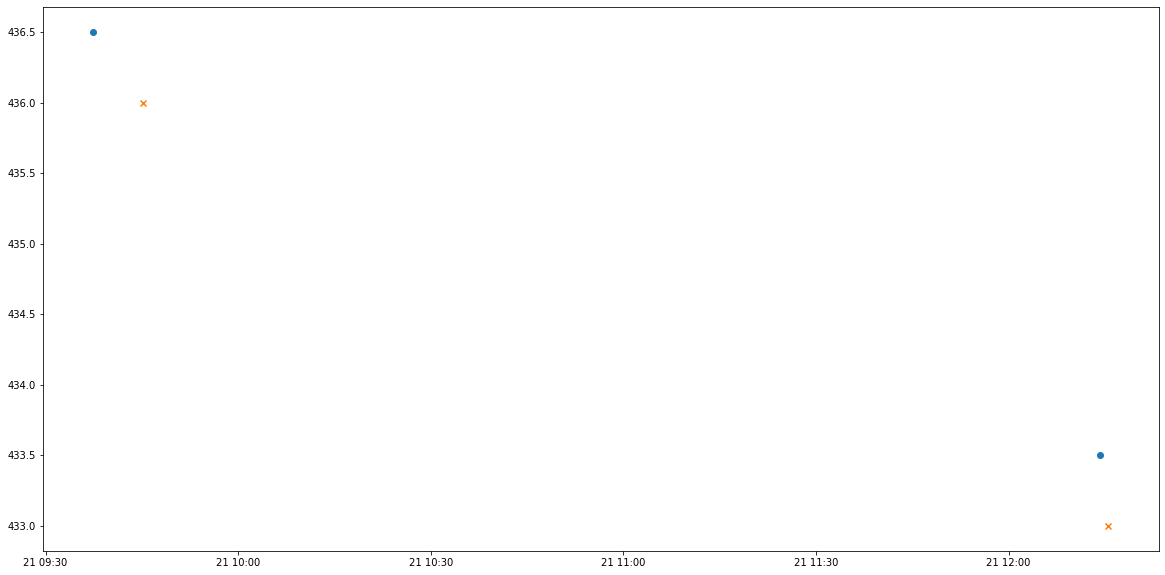

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000622
daily_low  428.0
daily_low * theta 430.13999999999993
bid1_p:  431.5
# sell:  149   # buy:  2
bid1_q:  8   bid2_q:  184
進場時間： 124211284 
  sell price at  431.5
time out
出場時間： 125211790
buy at 432.0
get -0.5
------------------------------
----------Result Report--------------
profit:  -0.5


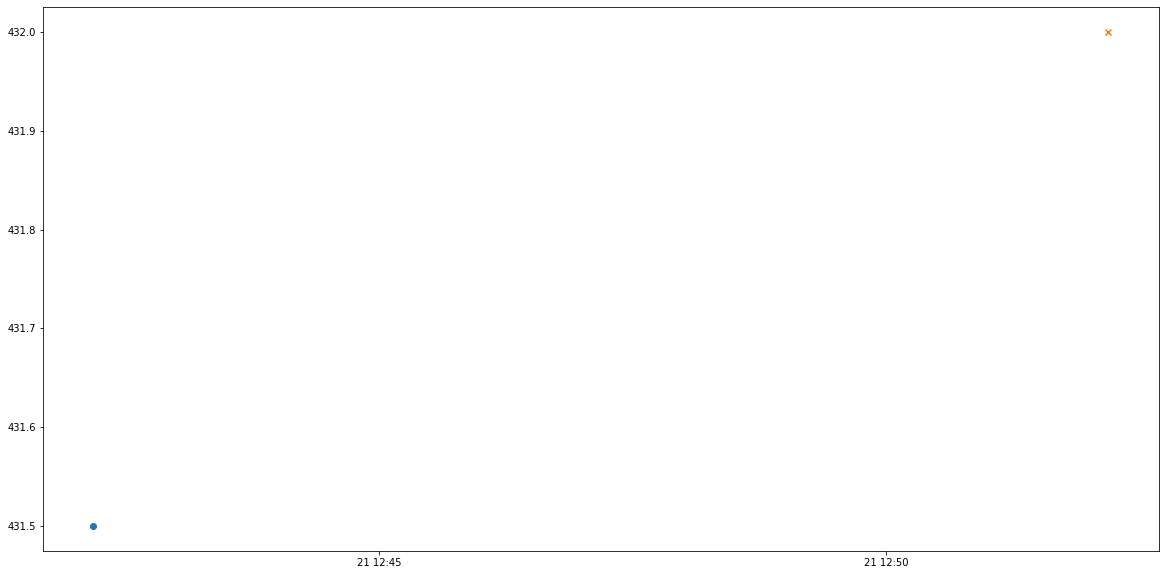

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90001112
daily_low  427.5
daily_low * theta 429.63749999999993
bid1_p:  431.0
# sell:  92   # buy:  7
bid1_q:  72   bid2_q:  44
進場時間： 92532538 
  sell price at  431.0
time out
出場時間： 93532850
buy at 434.5
get -3.5
------------------------------
daily_low  427.5
daily_low * theta 429.63749999999993
bid1_p:  437.0
# sell:  71   # buy:  4
bid1_q:  25   bid2_q:  55
進場時間： 94543050 
  sell price at  437.0
stop profit
出場時間： 94611508
buy at 436.5
get 0.5
------------------------------
daily_low  427.5
daily_low * theta 429.63749999999993
bid1_p:  436.5
# sell:  116   # buy:  16
bid1_q:  4   bid2_q:  138
進場時間： 95012481 
  sell price at  436.5
time out
出場時間： 100000097
buy at 436.5
get 0.0
------------------------------
daily_low  427.

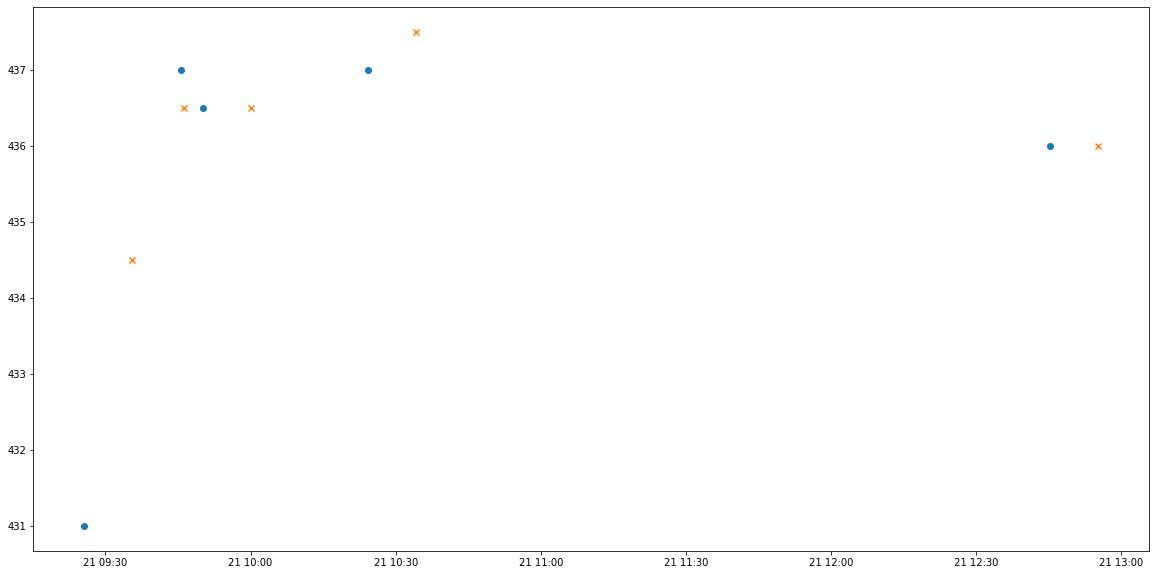

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000968
daily_low  430.5
daily_low * theta 432.6525
bid1_p:  433.0
# sell:  212   # buy:  33
bid1_q:  20   bid2_q:  132
進場時間： 95356226 
  sell price at  433.0
time out
出場時間： 100001106
buy at 433.5
get -0.5
------------------------------
----------Result Report--------------
profit:  -0.5


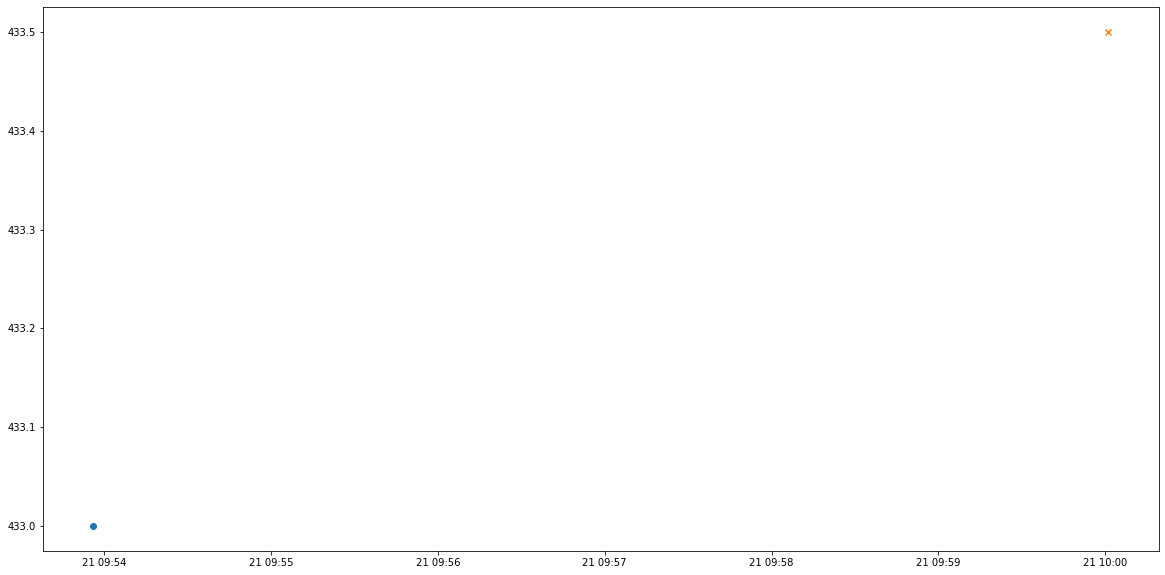

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000779
----------Result Report--------------
profit:  0


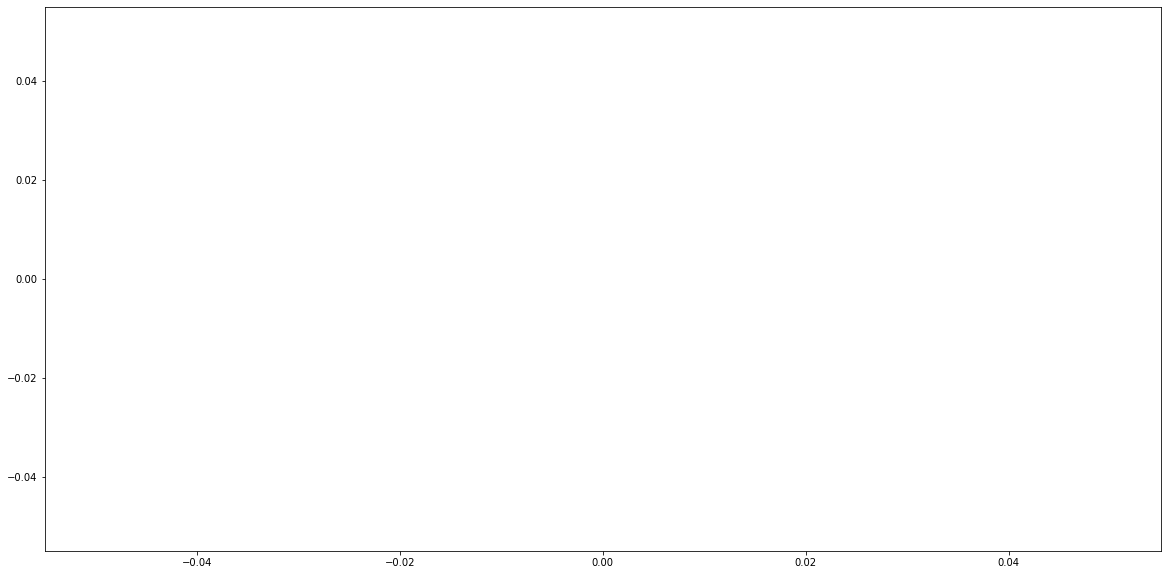

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000713
daily_low  424.5
daily_low * theta 426.62249999999995
bid1_p:  427.0
# sell:  602   # buy:  0
bid1_q:  9   bid2_q:  1
進場時間： 92257020 
  sell price at  427.0
stop profit
出場時間： 92508899
buy at 426.0
get 1.0
------------------------------
daily_low  424.5
daily_low * theta 426.62249999999995
bid1_p:  427.0
# sell:  216   # buy:  21
bid1_q:  29   bid2_q:  81
進場時間： 93224382 
  sell price at  427.0
stop profit
出場時間： 93530914
buy at 426.5
get 0.5
------------------------------
daily_low  424.5
daily_low * theta 426.62249999999995
bid1_p:  427.5
# sell:  103   # buy:  2
bid1_q:  42   bid2_q:  45
進場時間： 94310885 
  sell price at  427.5
stop profit
出場時間： 94419134
buy at 427.0
get 0.5
------------------------------
----------R

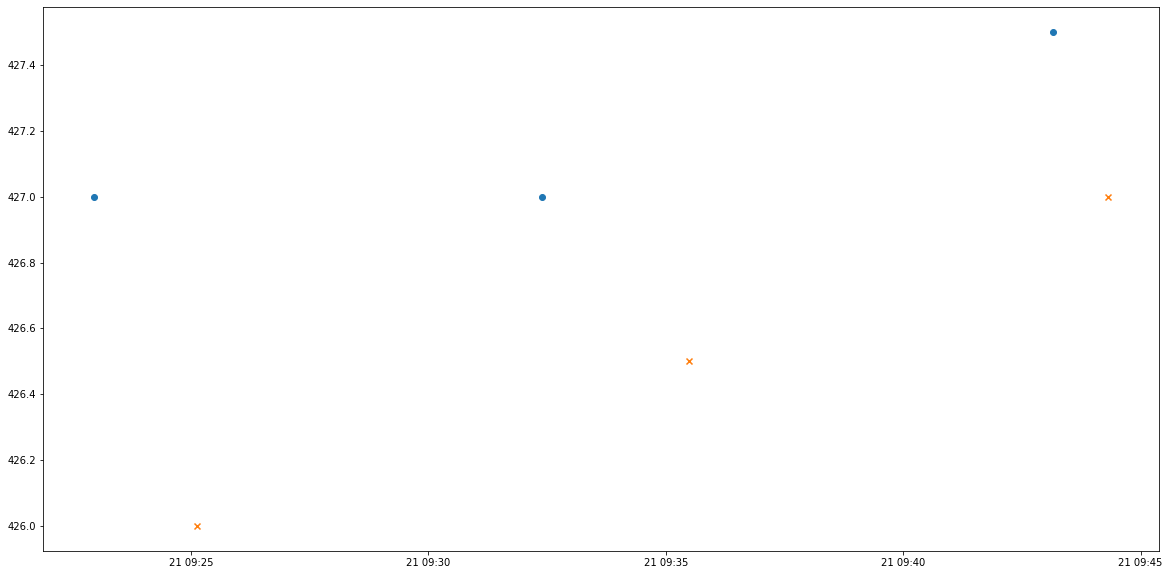

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90001135
daily_low  423.0
daily_low * theta 425.11499999999995
bid1_p:  427.0
# sell:  266   # buy:  2
bid1_q:  66   bid2_q:  280
進場時間： 111033649 
  sell price at  427.0
time out
出場時間： 112034389
buy at 427.0
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


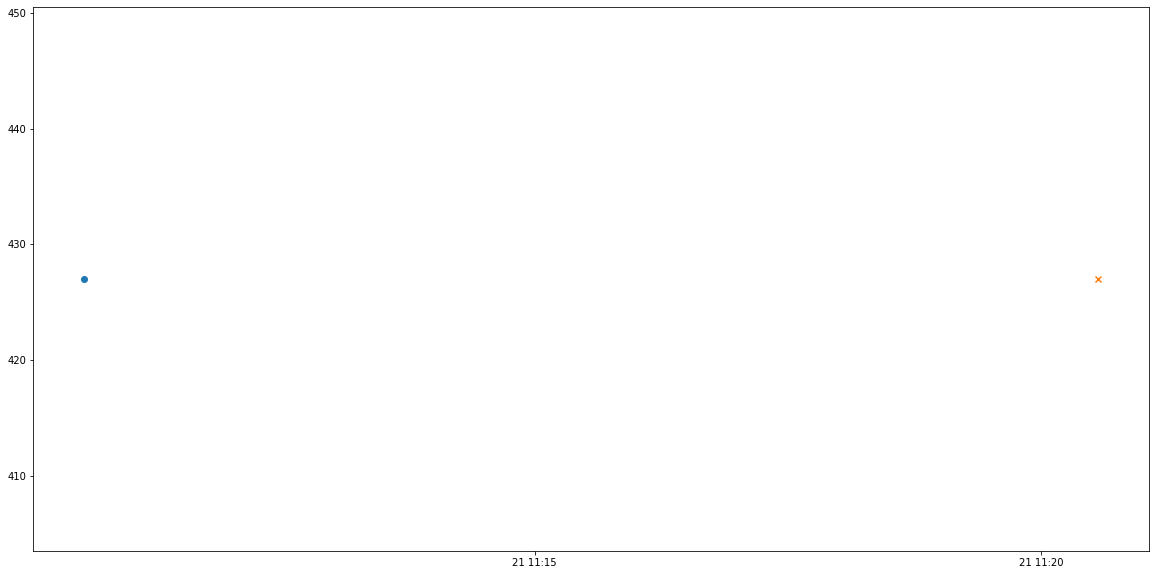

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90001261
daily_low  425.5
daily_low * theta 427.62749999999994
bid1_p:  430.5
# sell:  183   # buy:  0
bid1_q:  96   bid2_q:  109
進場時間： 101651856 
  sell price at  430.5
time out
出場時間： 102652966
buy at 432.0
get -1.5
------------------------------
daily_low  425.5
daily_low * theta 427.62749999999994
bid1_p:  433.0
# sell:  113   # buy:  0
bid1_q:  14   bid2_q:  130
進場時間： 114455691 
  sell price at  433.0
stop profit
出場時間： 114800384
buy at 432.5
get 0.5
------------------------------
----------Result Report--------------
profit:  -1.0


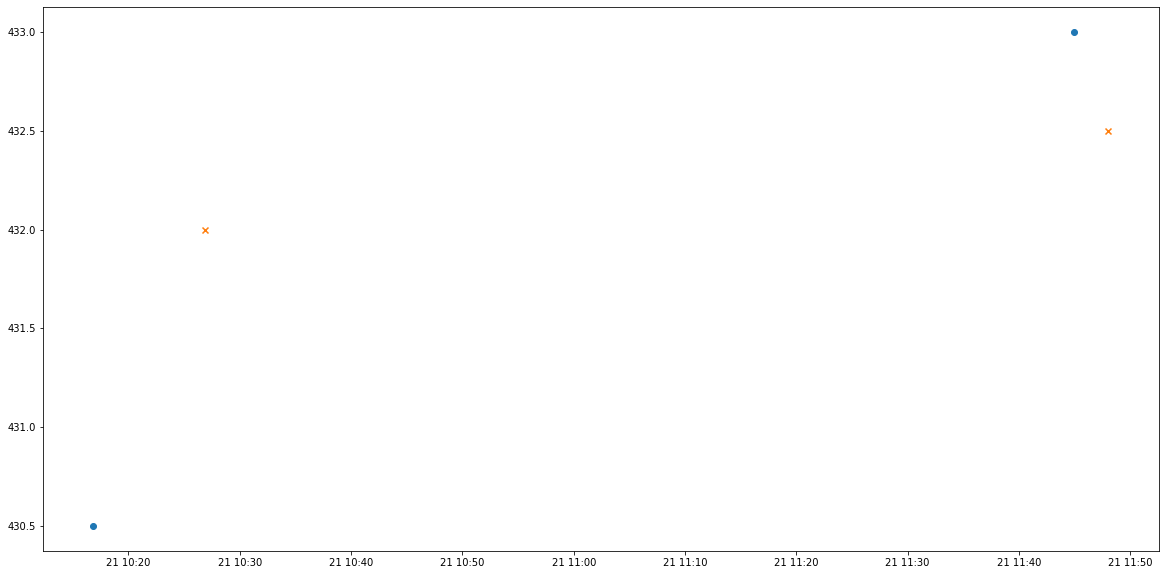

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90001235
daily_low  435.0
daily_low * theta 437.17499999999995
bid1_p:  438.0
# sell:  133   # buy:  0
bid1_q:  4   bid2_q:  155
進場時間： 91107327 
  sell price at  438.0
stop profit
出場時間： 91204099
buy at 437.5
get 0.5
------------------------------
daily_low  432.0
daily_low * theta 434.15999999999997
bid1_p:  435.0
# sell:  127   # buy:  2
bid1_q:  4   bid2_q:  106
進場時間： 131935049 
  sell price at  435.0
----------Result Report--------------
profit:  0.5


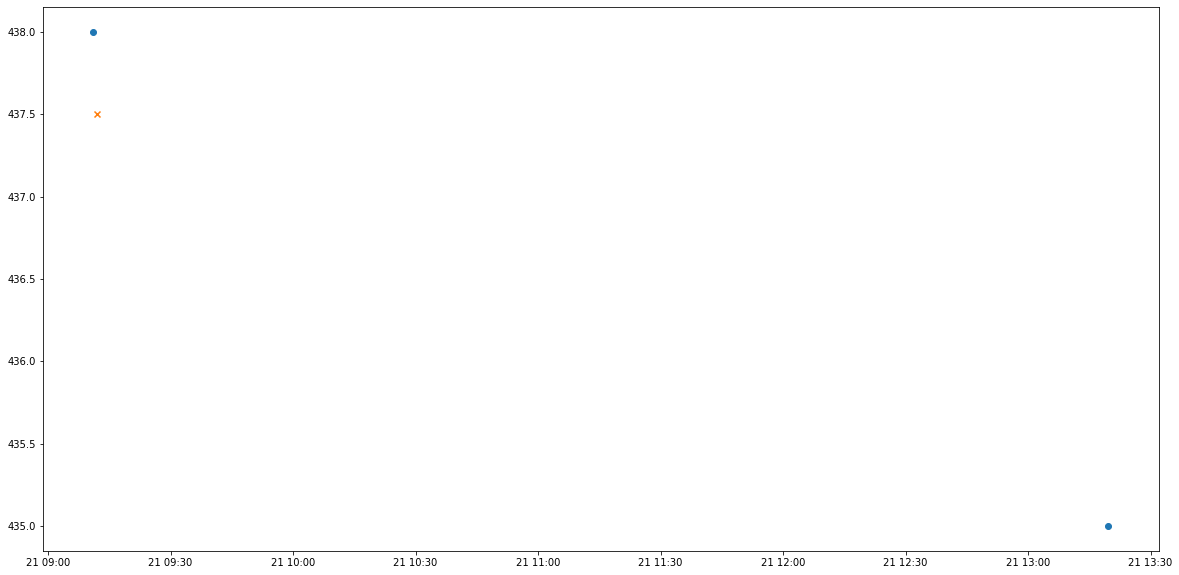

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000845
----------Result Report--------------
profit:  0


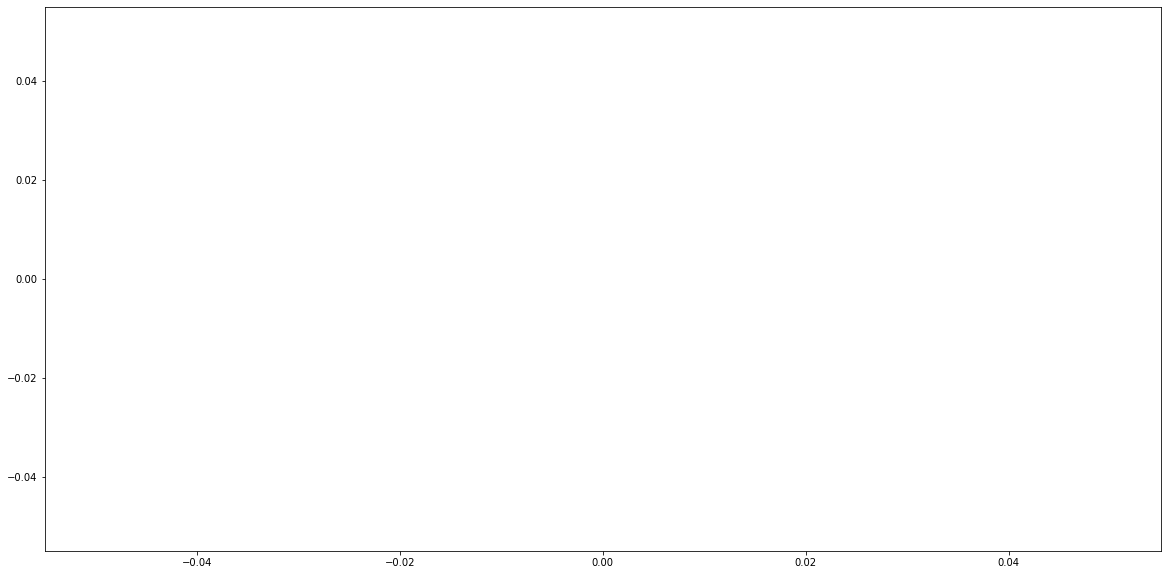

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90001356
daily_low  423.5
daily_low * theta 425.61749999999995
bid1_p:  426.0
# sell:  186   # buy:  7
bid1_q:  1   bid2_q:  76
進場時間： 91429954 
  sell price at  426.0
stop profit
出場時間： 91446882
buy at 425.5
get 0.5
------------------------------
daily_low  401.0
daily_low * theta 403.00499999999994
bid1_p:  404.0
# sell:  87   # buy:  27
bid1_q:  57   bid2_q:  1
進場時間： 104409440 
  sell price at  404.0
stop profit
出場時間： 104413549
buy at 402.0
get 2.0
------------------------------
daily_low  401.0
daily_low * theta 403.00499999999994
bid1_p:  408.0
# sell:  34   # buy:  6
bid1_q:  1   bid2_q:  10
進場時間： 104449155 
  sell price at  408.0
stop loss
出場時間： 104502407
buy at 412.0
get -4.0
------------------------------
daily_low  

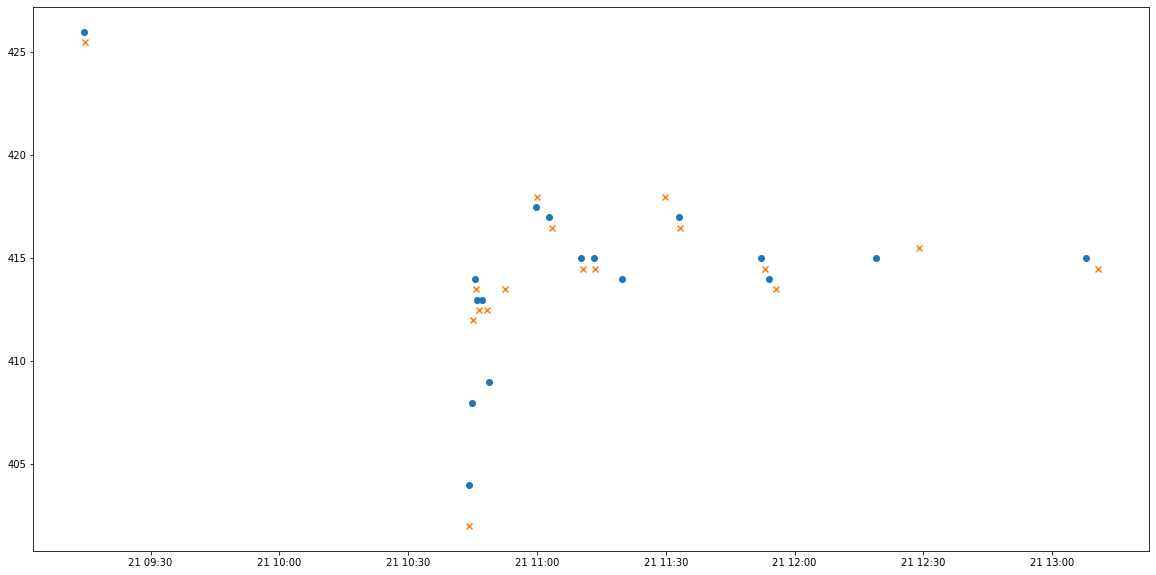

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000465
------Weird price!!!!!---------
At time:  90211148
tick_row_price 423.0
ask_1_p 423.5
bid_1_p 422.5
daily_low  420.0
daily_low * theta 422.09999999999997
bid1_p:  426.5
# sell:  146   # buy:  3
bid1_q:  43   bid2_q:  93
進場時間： 113524214 
  sell price at  426.5
stop profit
出場時間： 113634956
buy at 426.0
get 0.5
------------------------------
daily_low  420.0
daily_low * theta 422.09999999999997
bid1_p:  426.0
# sell:  129   # buy:  18
bid1_q:  1   bid2_q:  113
進場時間： 114957976 
  sell price at  426.0
stop profit
出場時間： 115255884
buy at 425.5
get 0.5
------------------------------
daily_low  420.0
daily_low * theta 422.09999999999997
bid1_p:  426.5
# sell:  284   # buy:  3
bid1_q:  139   bid2_q:  228
進場時間： 123731810 
  se

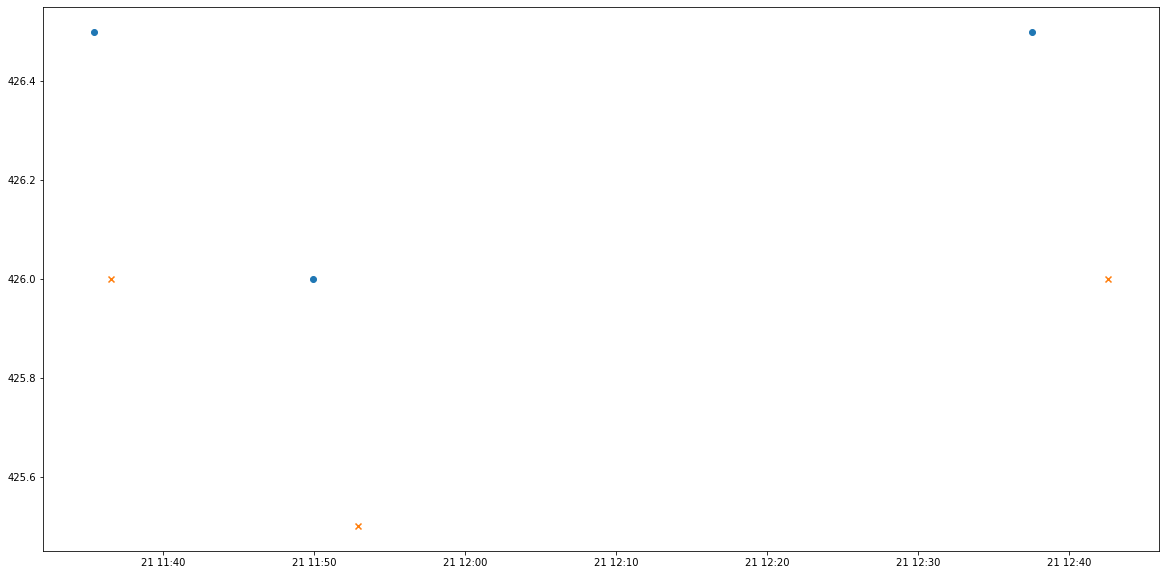

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000683
daily_low  425.0
daily_low * theta 427.12499999999994
bid1_p:  427.5
# sell:  57   # buy:  9
bid1_q:  44   bid2_q:  30
進場時間： 90528001 
  sell price at  427.5
stop profit
出場時間： 90541972
buy at 427.0
get 0.5
------------------------------
daily_low  425.0
daily_low * theta 427.12499999999994
bid1_p:  427.5
# sell:  78   # buy:  8
bid1_q:  40   bid2_q:  46
進場時間： 91009651 
  sell price at  427.5
time out
出場時間： 92009840
buy at 430.0
get -2.5
------------------------------
daily_low  425.0
daily_low * theta 427.12499999999994
bid1_p:  431.5
# sell:  50   # buy:  2
bid1_q:  1   bid2_q:  57
進場時間： 93151140 
  sell price at  431.5
stop profit
出場時間： 93256293
buy at 431.0
get 0.5
------------------------------
daily_low  425.0

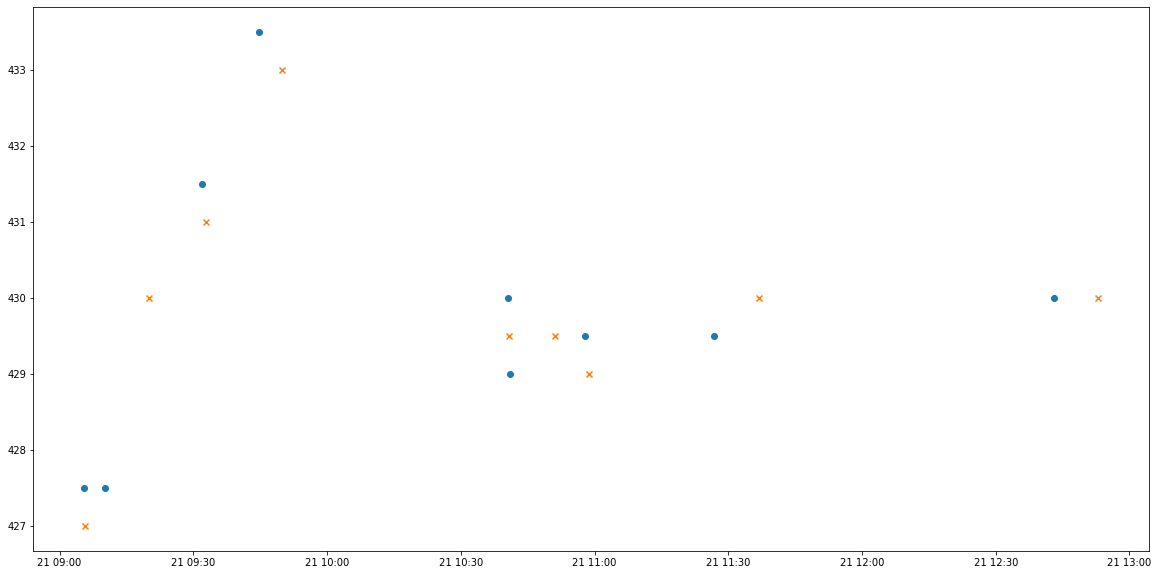

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000709
daily_low  430.5
daily_low * theta 432.6525
bid1_p:  435.5
# sell:  287   # buy:  11
bid1_q:  16   bid2_q:  346
進場時間： 100829933 
  sell price at  435.5
stop profit
出場時間： 101140521
buy at 435.0
get 0.5
------------------------------
daily_low  430.5
daily_low * theta 432.6525
bid1_p:  434.5
# sell:  320   # buy:  2
bid1_q:  27   bid2_q:  388
進場時間： 104330798 
  sell price at  434.5
stop profit
出場時間： 104516553
buy at 434.0
get 0.5
------------------------------
----------Result Report--------------
profit:  1.0


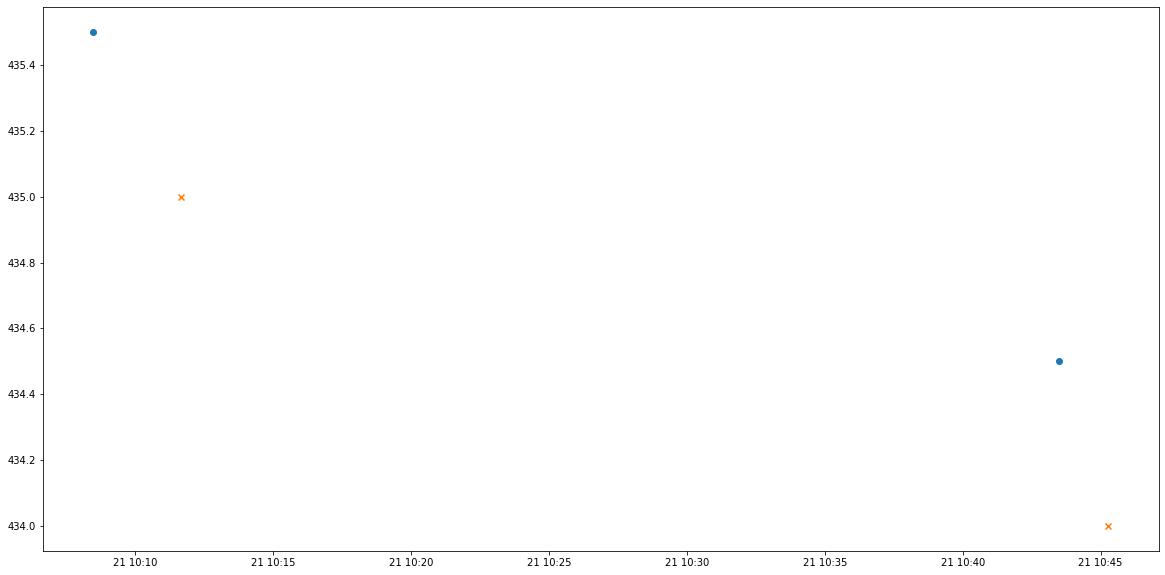

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000890
daily_low  435.0
daily_low * theta 437.17499999999995
bid1_p:  439.0
# sell:  107   # buy:  6
bid1_q:  29   bid2_q:  96
進場時間： 100810799 
  sell price at  439.0
stop profit
出場時間： 101016660
buy at 438.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


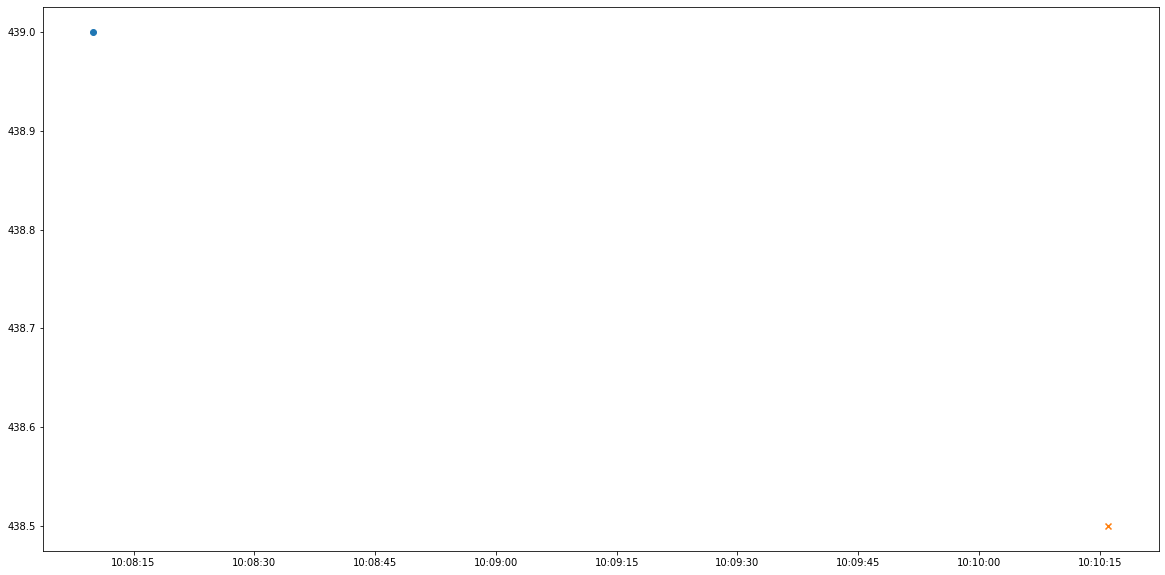

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000637
daily_low  447.5
daily_low * theta 449.73749999999995
bid1_p:  451.0
# sell:  200   # buy:  9
bid1_q:  93   bid2_q:  152
進場時間： 90204597 
  sell price at  451.0
stop profit
出場時間： 90809462
buy at 450.5
get 0.5
------------------------------
daily_low  447.5
daily_low * theta 449.73749999999995
bid1_p:  451.0
# sell:  109   # buy:  8
bid1_q:  6   bid2_q:  80
進場時間： 91332952 
  sell price at  451.0
stop profit
出場時間： 91606345
buy at 450.5
get 0.5
------------------------------
daily_low  447.5
daily_low * theta 449.73749999999995
bid1_p:  451.0
# sell:  150   # buy:  0
bid1_q:  58   bid2_q:  129
進場時間： 93105115 
  sell price at  451.0
stop profit
出場時間： 93413456
buy at 450.5
get 0.5
------------------------------
daily_low

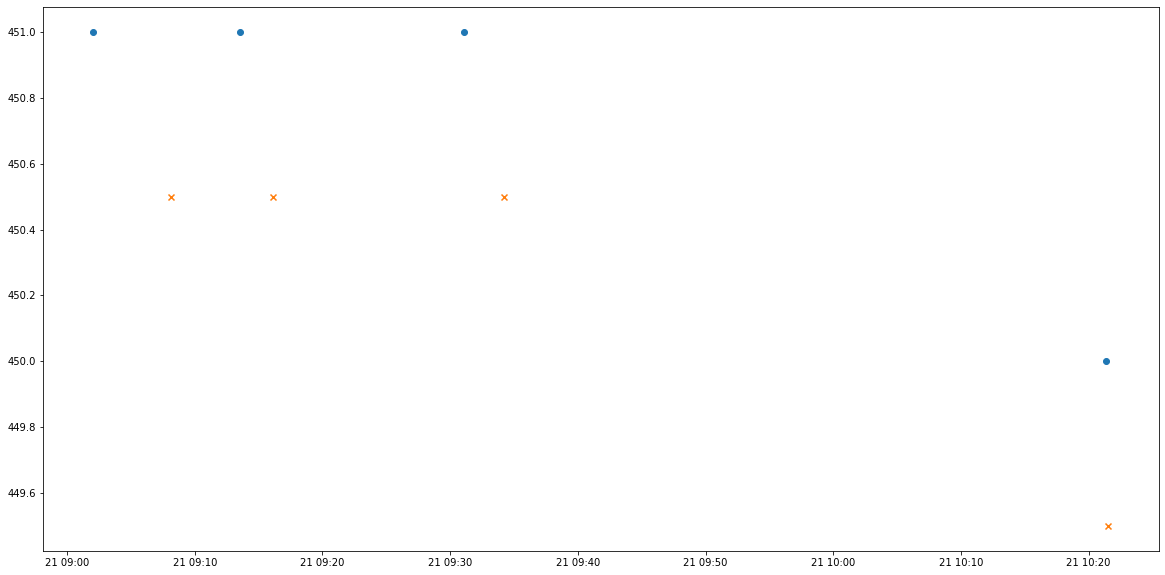

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000407
----------Result Report--------------
profit:  0


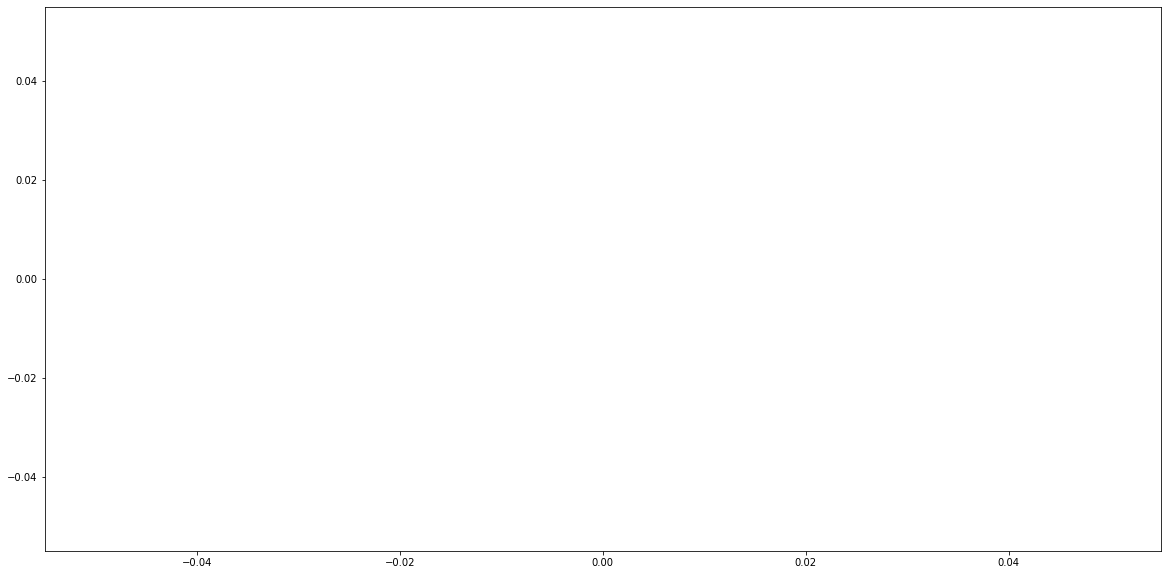

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000363
daily_low  436.5
daily_low * theta 438.68249999999995
bid1_p:  439.0
# sell:  169   # buy:  2
bid1_q:  177   bid2_q:  28
進場時間： 92005890 
  sell price at  439.0
stop profit
出場時間： 92258265
buy at 438.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


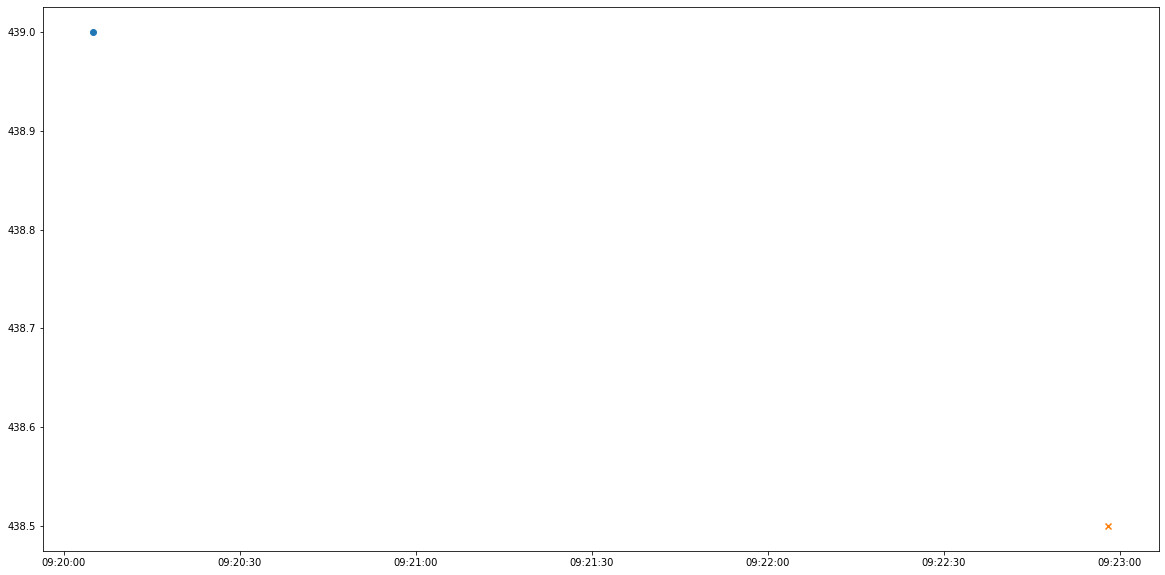

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000489
------Weird price!!!!!---------
At time:  90204239
tick_row_price 429.5
ask_1_p 430.0
bid_1_p 429.0
daily_low  428.0
daily_low * theta 430.13999999999993
bid1_p:  432.0
# sell:  143   # buy:  0
bid1_q:  73   bid2_q:  97
進場時間： 103004012 
  sell price at  432.0
stop profit
出場時間： 103441602
buy at 431.5
get 0.5
------------------------------
daily_low  428.0
daily_low * theta 430.13999999999993
bid1_p:  431.0
# sell:  253   # buy:  10
bid1_q:  209   bid2_q:  121
進場時間： 104032309 
  sell price at  431.0
time out
出場時間： 105032682
buy at 432.5
get -1.5
------------------------------
daily_low  428.0
daily_low * theta 430.13999999999993
bid1_p:  434.0
# sell:  329   # buy:  0
bid1_q:  217   bid2_q:  189
進場時間： 111114057 
  se

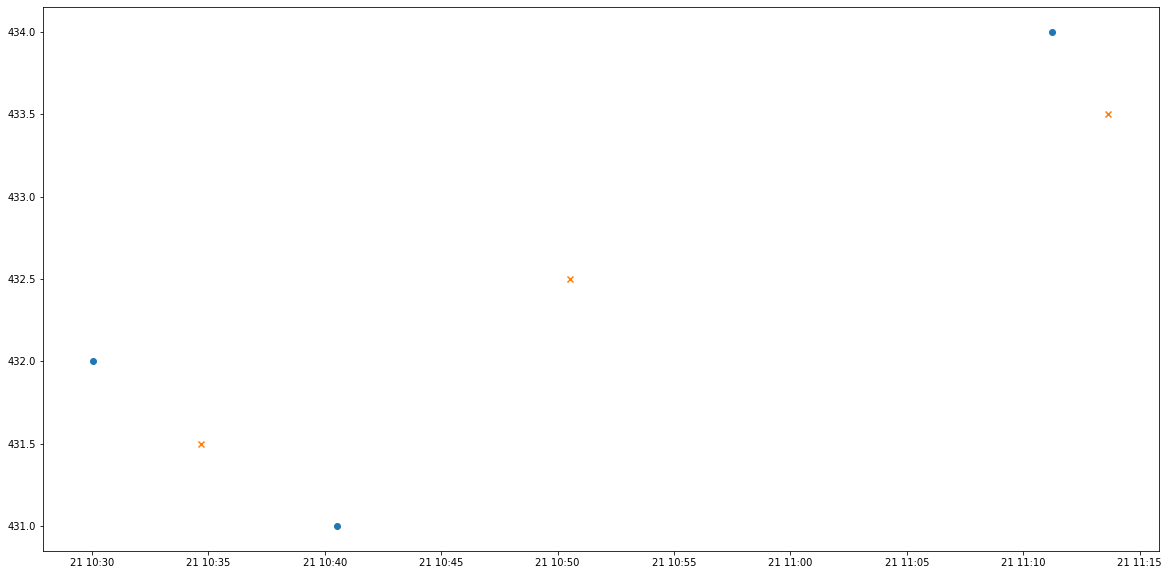

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000944
----------Result Report--------------
profit:  0


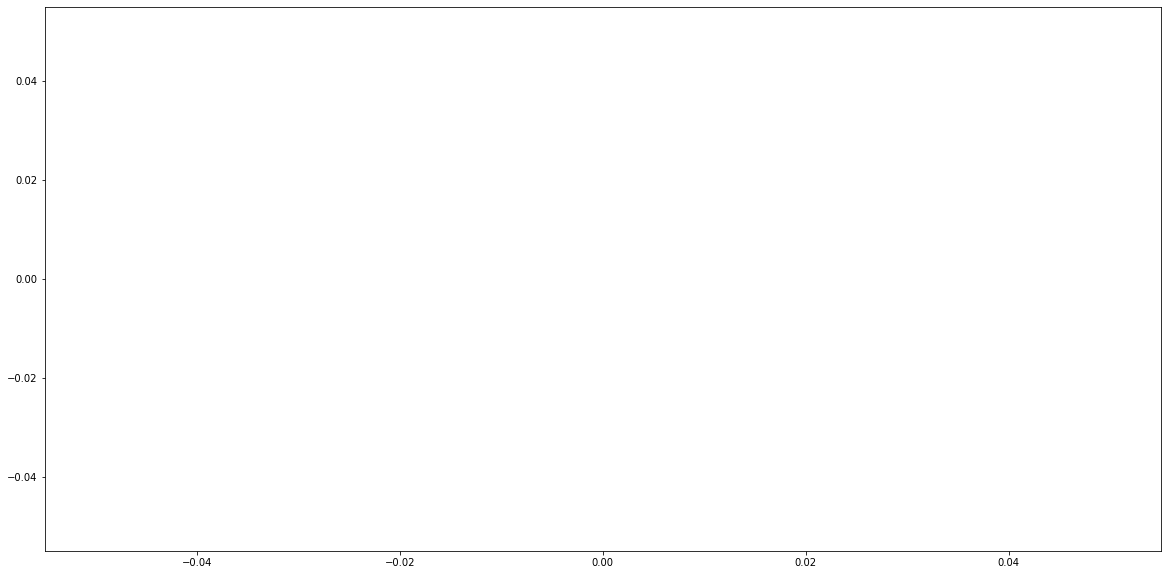

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/2330/tse_lob_2330.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/2330/tse_tick_2330.csv' mode='r' encoding='UTF-8'>
90000725
daily_low  435.0
daily_low * theta 437.17499999999995
bid1_p:  439.0
# sell:  100   # buy:  0
bid1_q:  32   bid2_q:  97
進場時間： 101253877 
  sell price at  439.0
stop profit
出場時間： 101445594
buy at 438.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


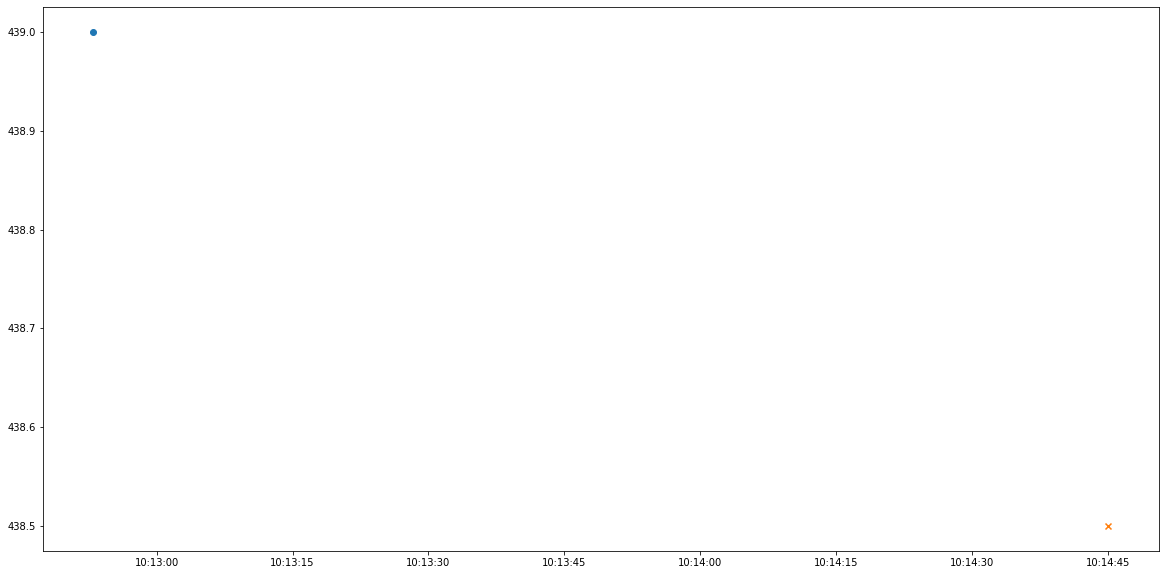

In [101]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2330")

In [102]:
res

[(0.5, 330.0, 0, 0),
 (-1.5, 1003.5, 0, 0),
 (0, 0, 0, 0),
 (-0.5, 340.5, 0, 0),
 (0, 0, 0, 0),
 (1.0, 695.5, 0, 0),
 (0, 0, 0, 0),
 (-0.5, 1433.0, 0, 0),
 (-1.0, 369.0, 0, 0),
 (0, 0, 0, 0),
 (2.0, 1465.5, 0, 0),
 (0.5, 1101.5, 0, 0),
 (0.5, 1902.5, 0, 0),
 (0.5, 384.0, 0, 0),
 (0, 382.0, 0, 0),
 (2.0, 4672.5, 0, 0),
 (0.5, 423.5, 0, 0),
 (4.5, 19870.0, 0, 0),
 (8.0, 7246.0, 0, 0),
 (2.5, 3474.0, 0, 0),
 (1.0, 1289.0, 0, 0),
 (1.5, 1264.0, 0, 0),
 (0.0, 1263.5, 0, 0),
 (0, 0, 0, 0),
 (1.0, 870.0, 0, 0),
 (-0.5, 431.5, 0, 0),
 (-3.5, 2177.5, 0, 0),
 (-0.5, 433.0, 0, 0),
 (0, 0, 0, 0),
 (2.0, 1281.5, 0, 0),
 (0.0, 427.0, 0, 0),
 (-1.0, 863.5, 0, 0),
 (0.5, 873.0, 0, 0),
 (0, 0, 0, 0),
 (-6.0, 7041.5, 0, 0),
 (1.5, 1279.0, 0, 0),
 (-1.0, 3868.0, 0, 0),
 (1.0, 870.0, 0, 0),
 (0.5, 439.0, 0, 0),
 (2.0, 1803.0, 0, 0),
 (0, 0, 0, 0),
 (0.5, 439.0, 0, 0),
 (-0.5, 1297.0, 0, 0),
 (0, 0, 0, 0),
 (0.5, 439.0, 0, 0)]

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007006
----------Result Report--------------
profit:  0


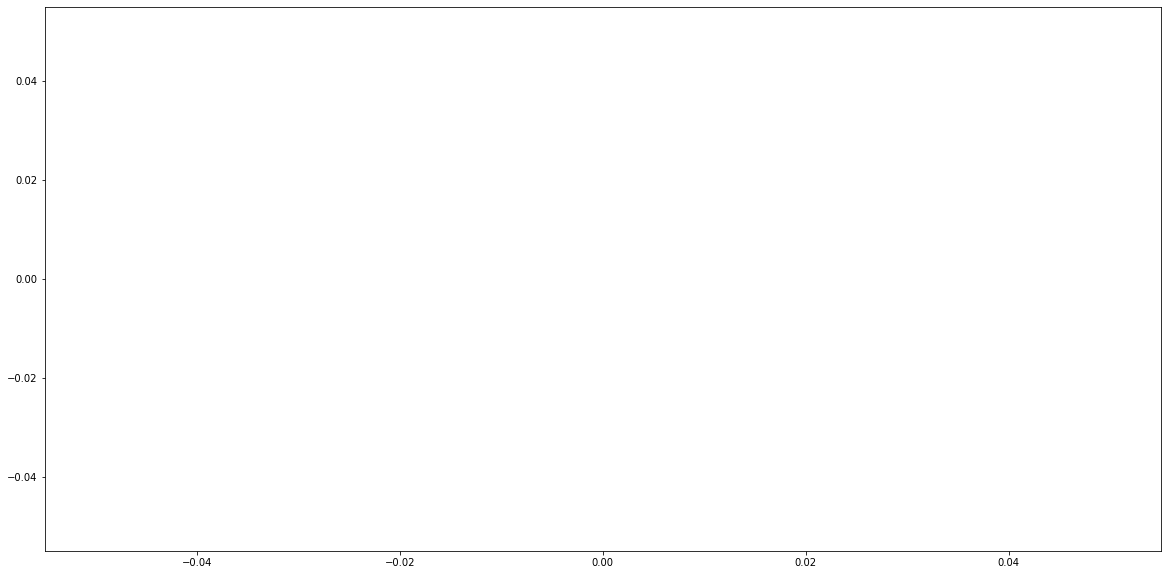

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90005659
----------Result Report--------------
profit:  0


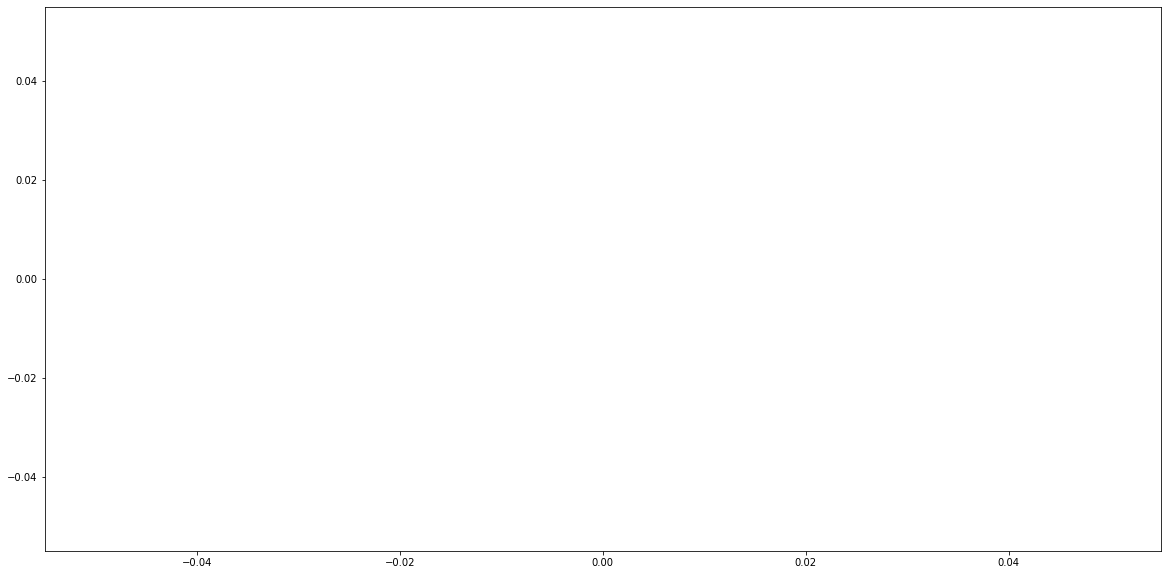

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006191
----------Result Report--------------
profit:  0


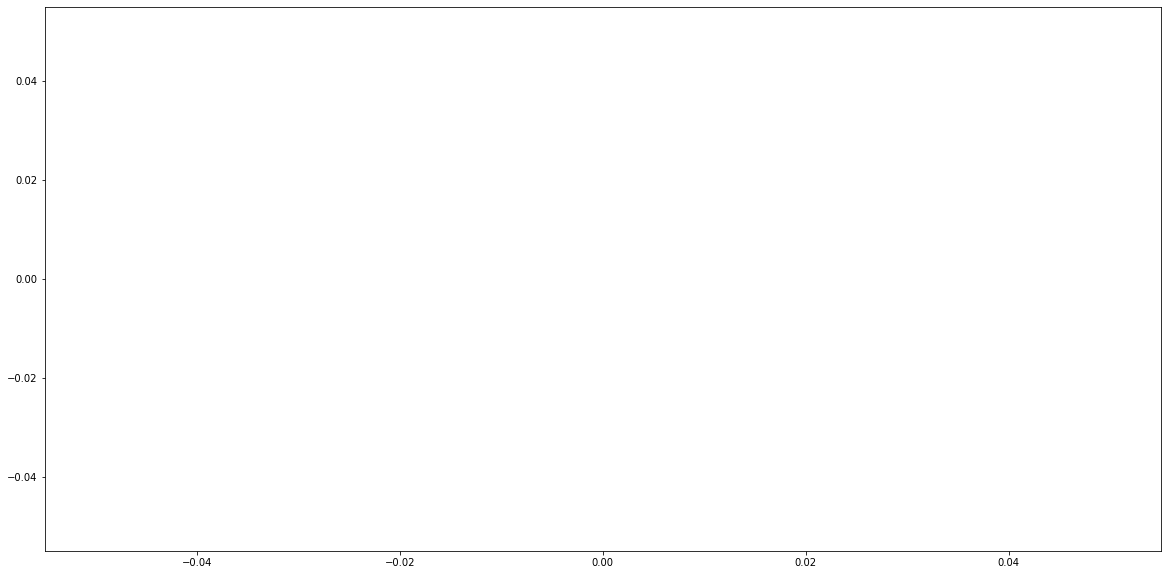

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90008994
----------Result Report--------------
profit:  0


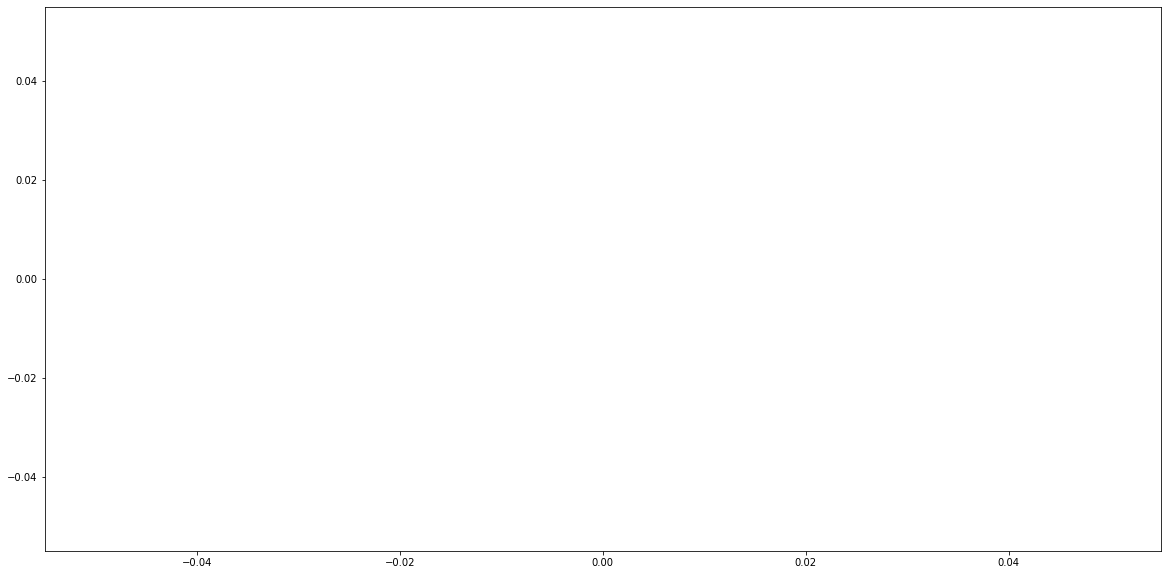

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90009014
----------Result Report--------------
profit:  0


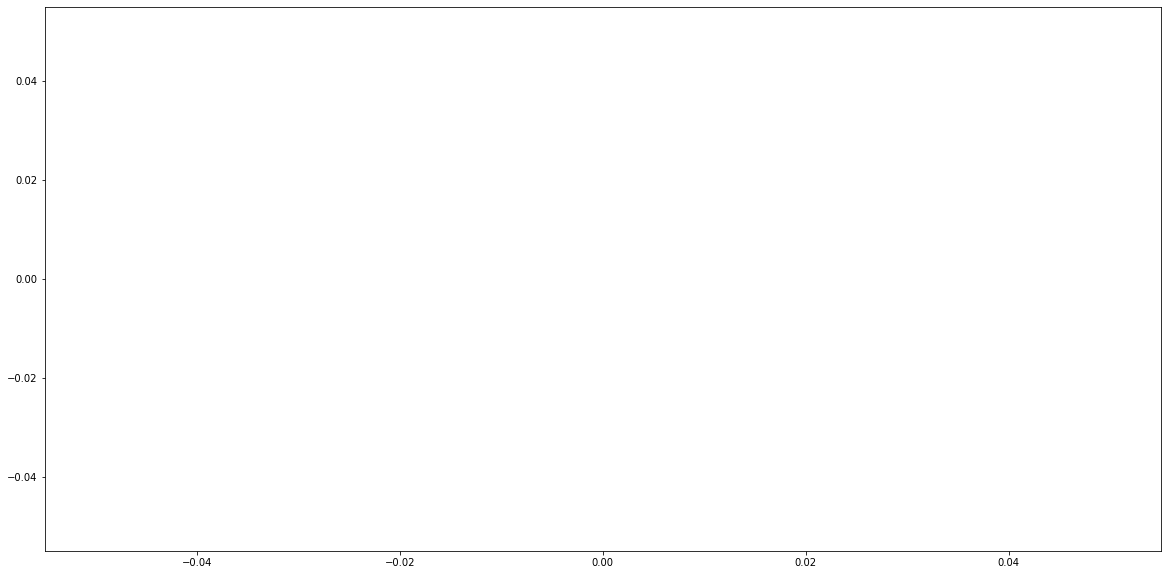

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90008496
----------Result Report--------------
profit:  0


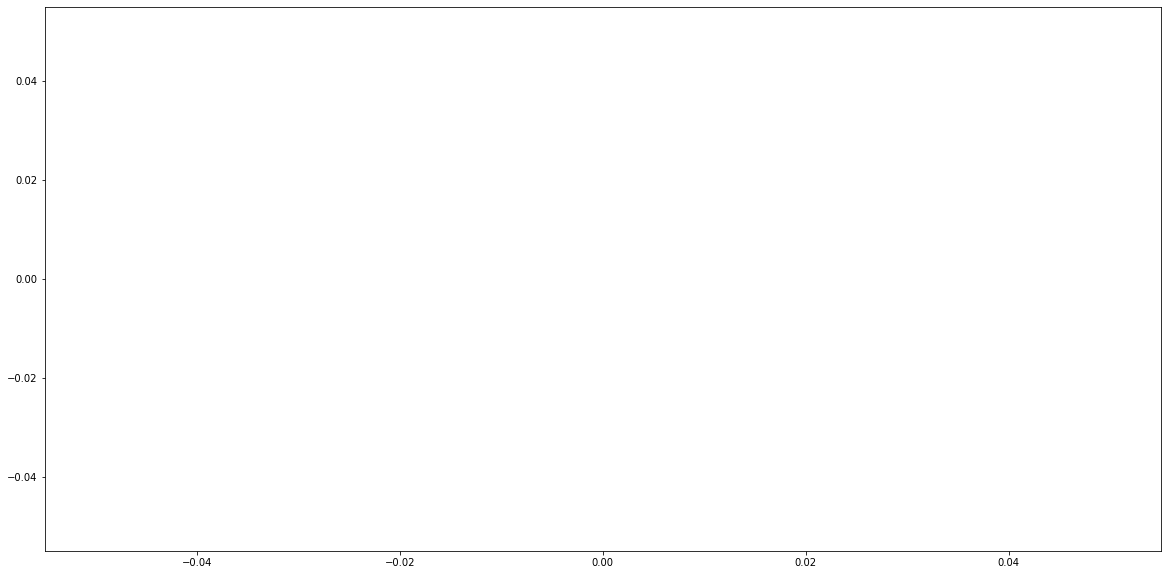

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007607
----------Result Report--------------
profit:  0


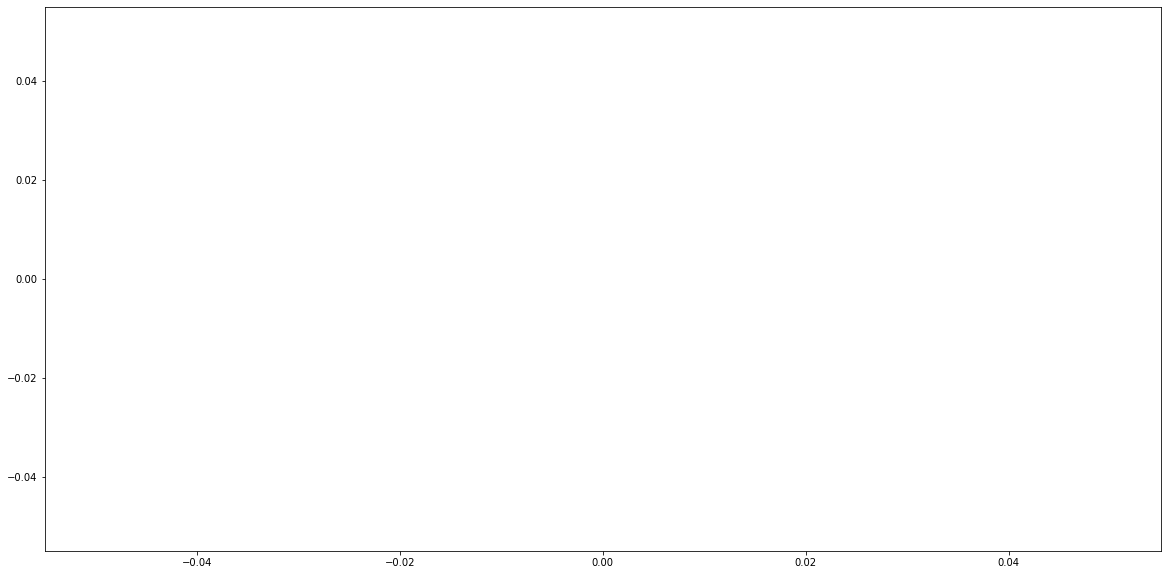

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006466
----------Result Report--------------
profit:  0


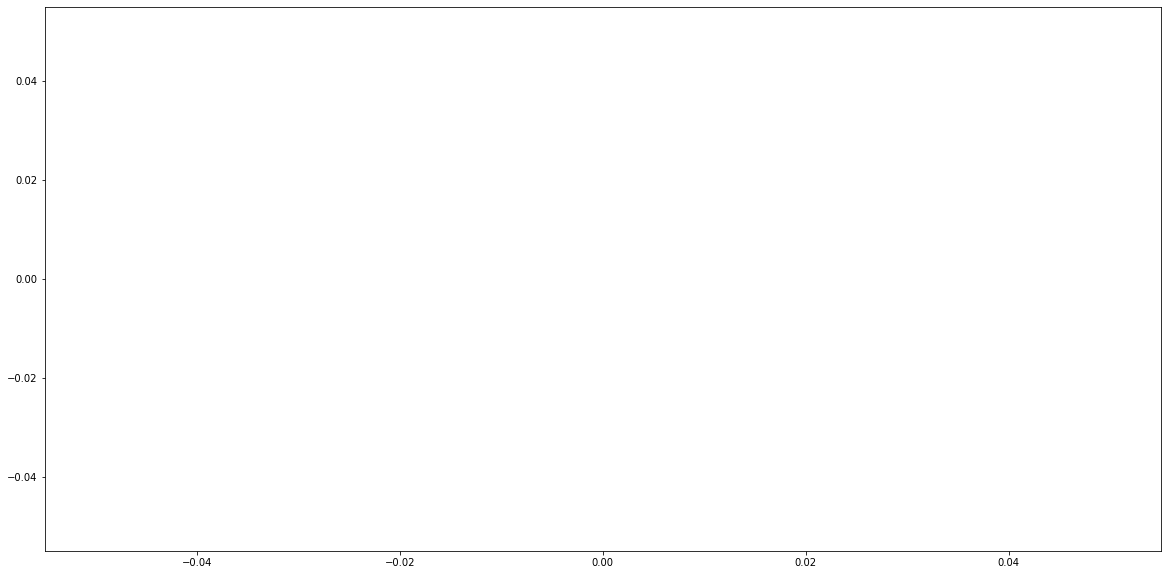

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90010909
----------Result Report--------------
profit:  0


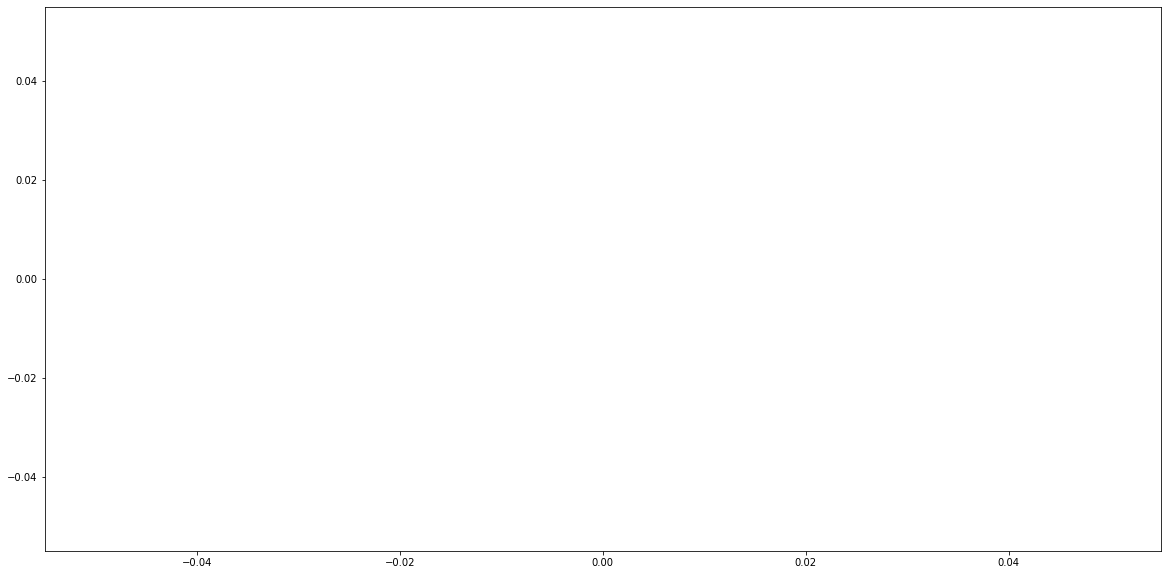

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007410
----------Result Report--------------
profit:  0


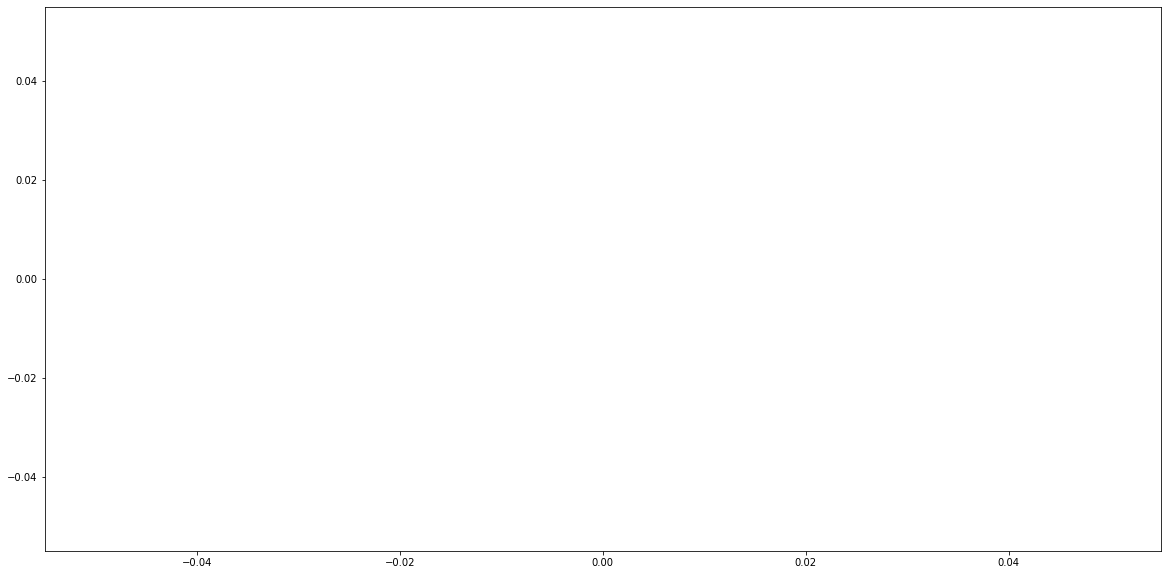

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90008199
----------Result Report--------------
profit:  0


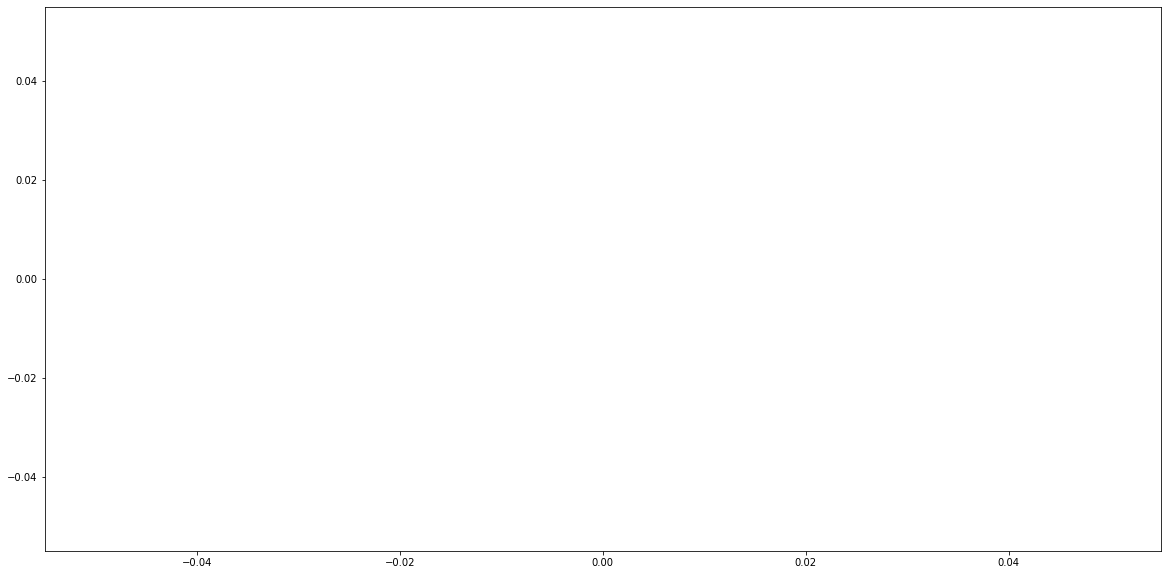

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90005724
----------Result Report--------------
profit:  0


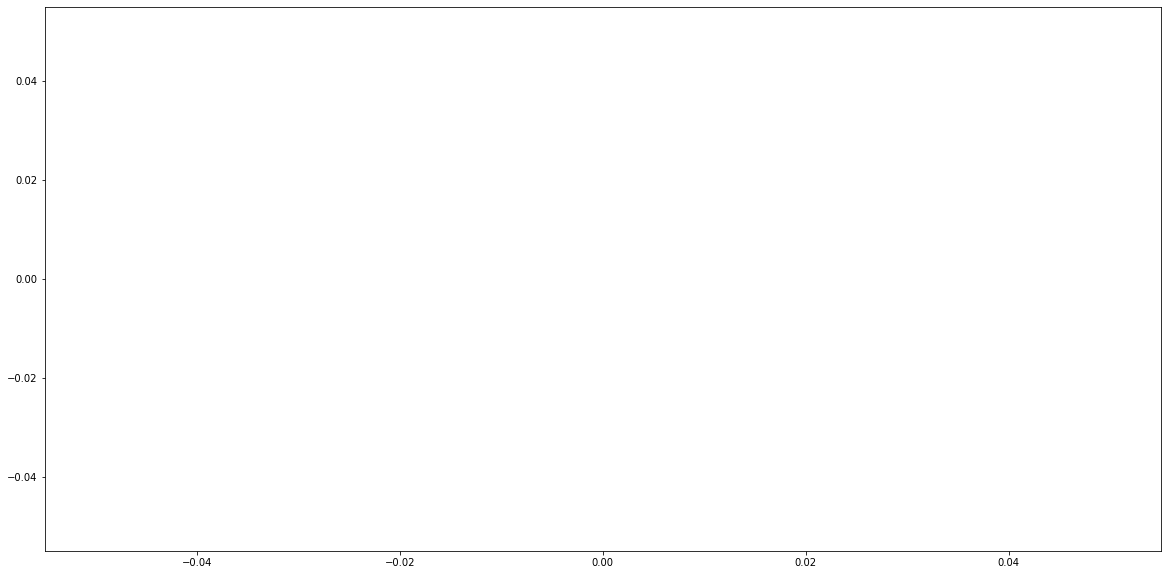

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007279
----------Result Report--------------
profit:  0


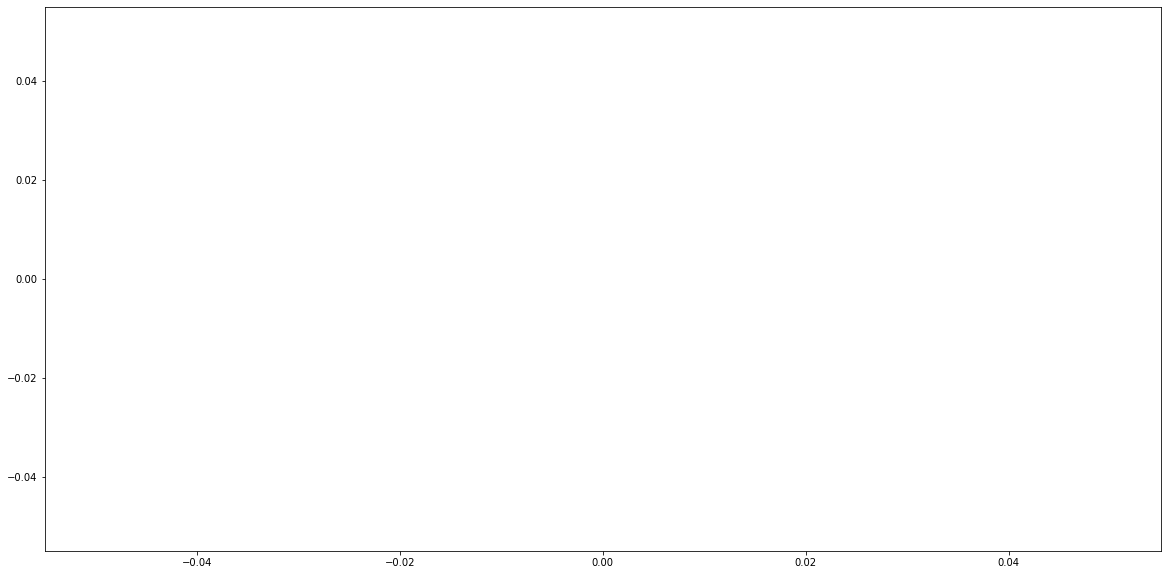

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004691
----------Result Report--------------
profit:  0


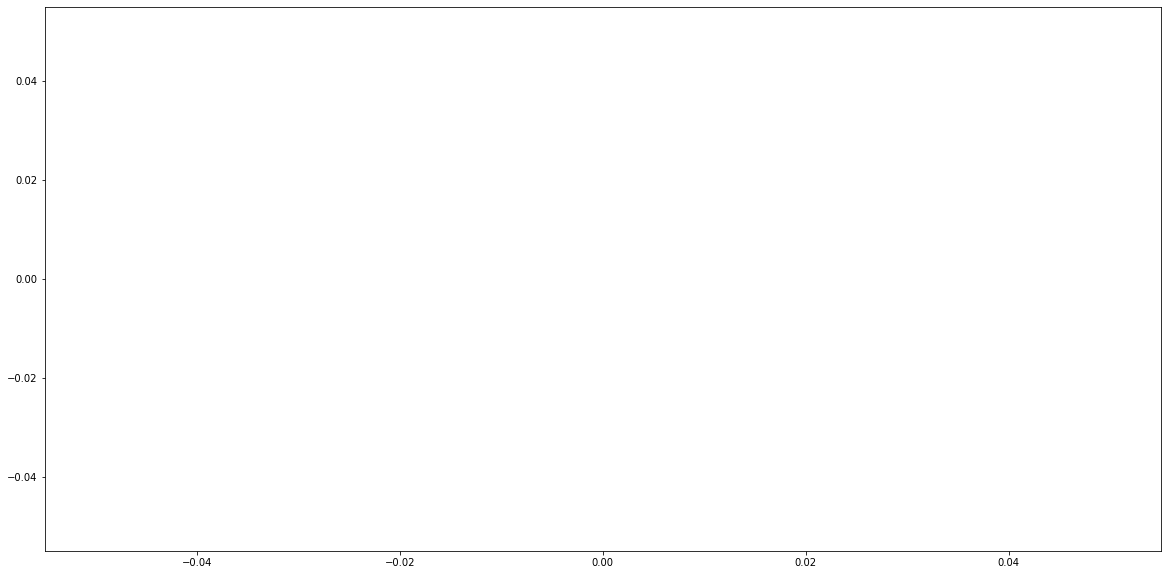

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007238
----------Result Report--------------
profit:  0


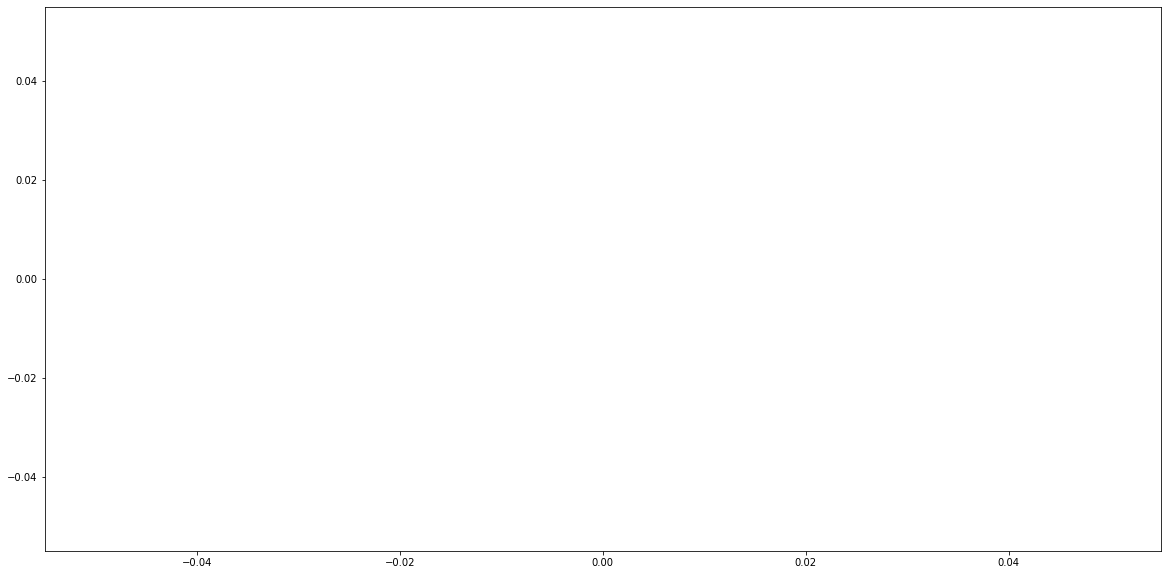

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90008897
----------Result Report--------------
profit:  0


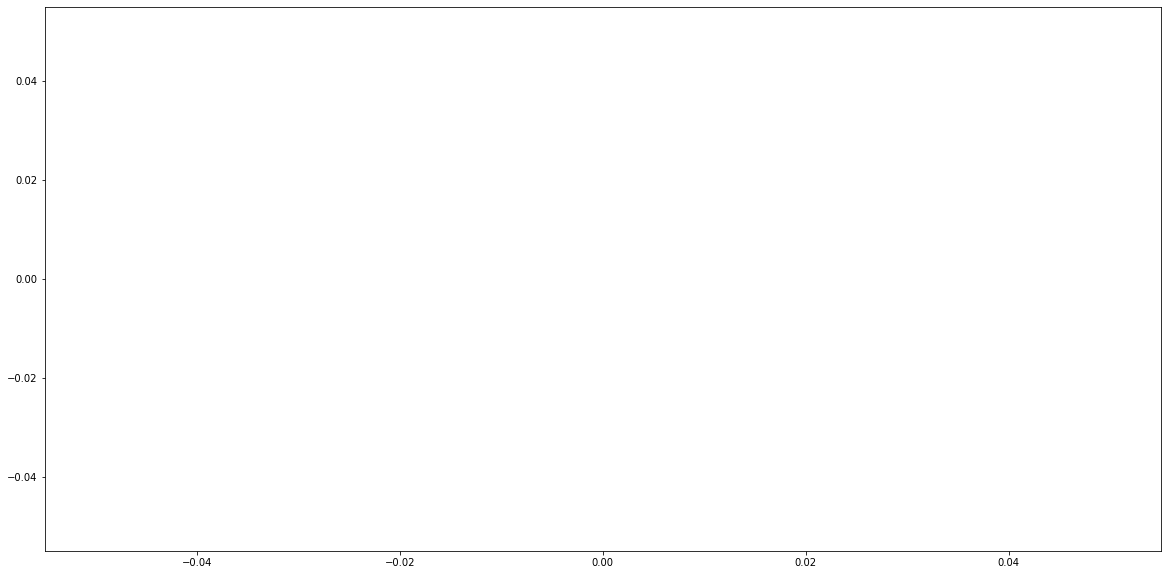

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90008206
----------Result Report--------------
profit:  0


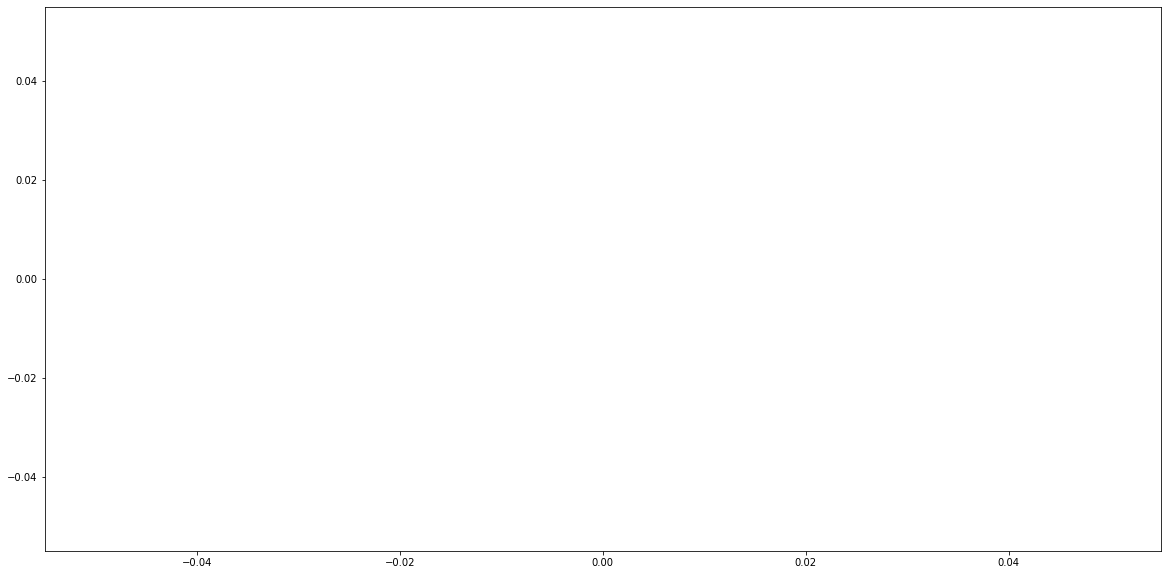

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006449
daily_low  22.9
daily_low * theta 23.014499999999995
bid1_p:  23.05
# sell:  196   # buy:  10
bid1_q:  138   bid2_q:  100
進場時間： 90240548 
  sell price at  23.05
stop profit
出場時間： 90852984
buy at 23.0
get 0.05000000000000071
------------------------------
daily_low  22.9
daily_low * theta 23.014499999999995
bid1_p:  23.15
# sell:  384   # buy:  4
bid1_q:  188   bid2_q:  269
進場時間： 93058613 
  sell price at  23.15
stop profit
出場時間： 93658067
buy at 23.1
get 0.04999999999999716
------------------------------
daily_low  22.9
daily_low * theta 23.014499999999995
bid1_p:  23.05
# sell:  181   # buy:  0
bid1_q:  140   bid2_q:  93
進場時間： 101804195 
  sell price at  23.05
time out
出場時間： 102804402
buy at 23.05
get 0.0
---------

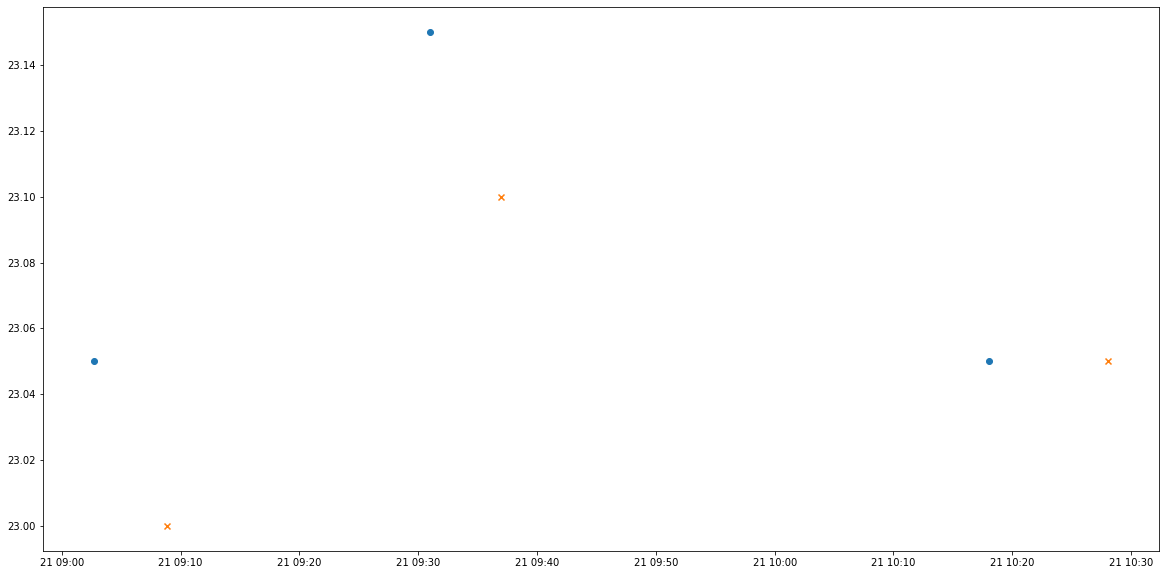

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004050
daily_low  23.1
daily_low * theta 23.2155
bid1_p:  23.3
# sell:  98   # buy:  33
bid1_q:  18   bid2_q:  39
進場時間： 90824628 
  sell price at  23.3
time out
出場時間： 91825380
buy at 23.4
get -0.09999999999999787
------------------------------
daily_low  23.1
daily_low * theta 23.2155
bid1_p:  23.45
# sell:  262   # buy:  13
bid1_q:  186   bid2_q:  129
進場時間： 92508602 
  sell price at  23.45
time out
出場時間： 93510867
buy at 23.5
get -0.05000000000000071
------------------------------
daily_low  23.1
daily_low * theta 23.2155
bid1_p:  23.6
# sell:  19   # buy:  0
bid1_q:  10   bid2_q:  4
進場時間： 131738078 
  sell price at  23.6
----------Result Report--------------
profit:  -0.14999999999999858


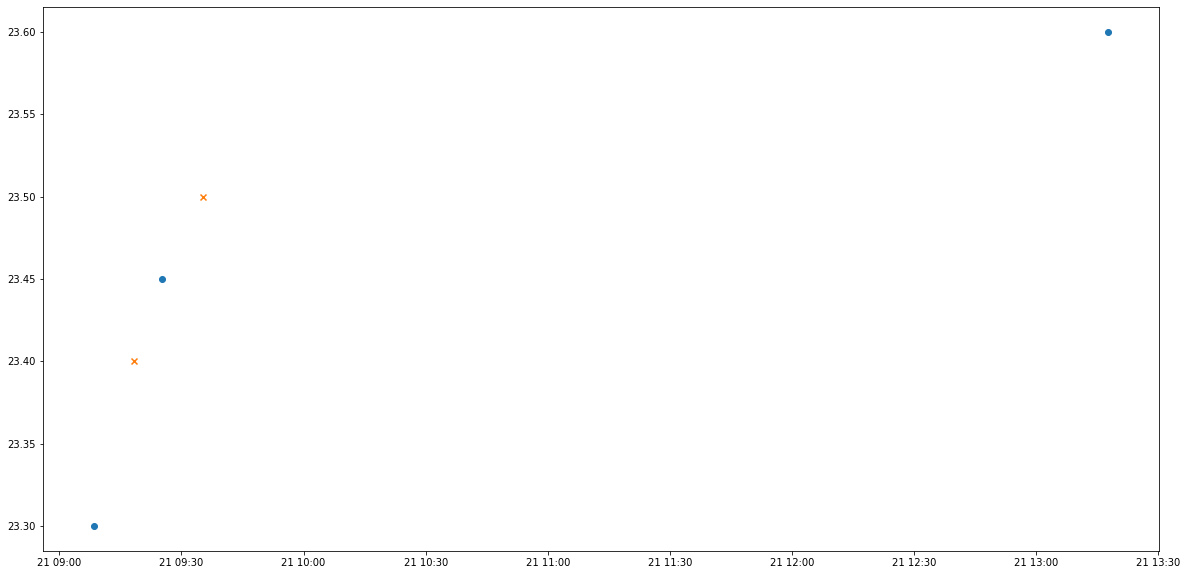

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004240
----------Result Report--------------
profit:  0


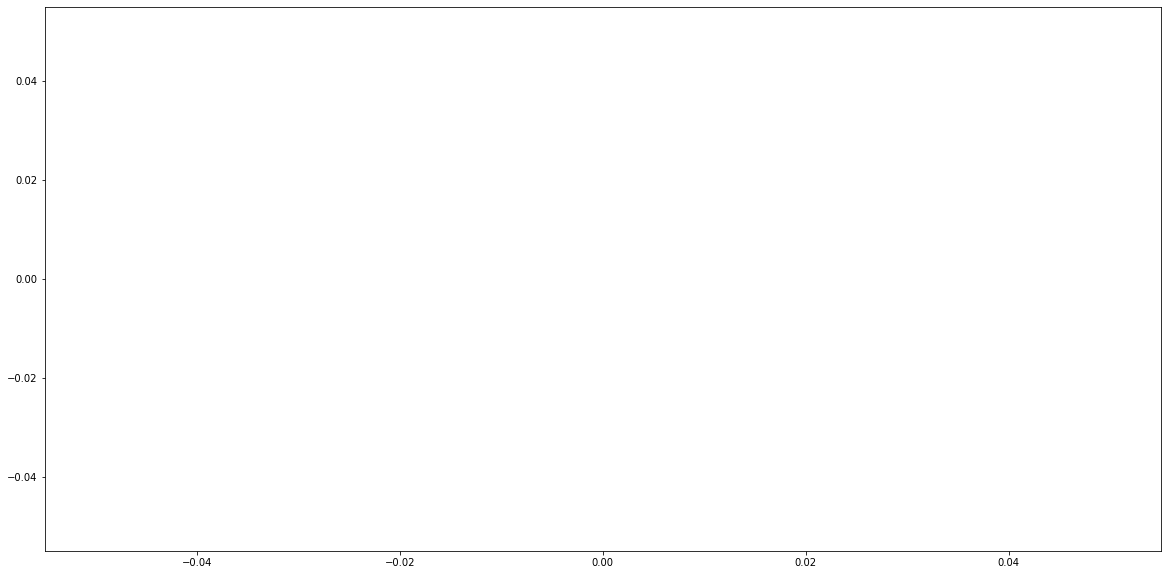

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004021
----------Result Report--------------
profit:  0


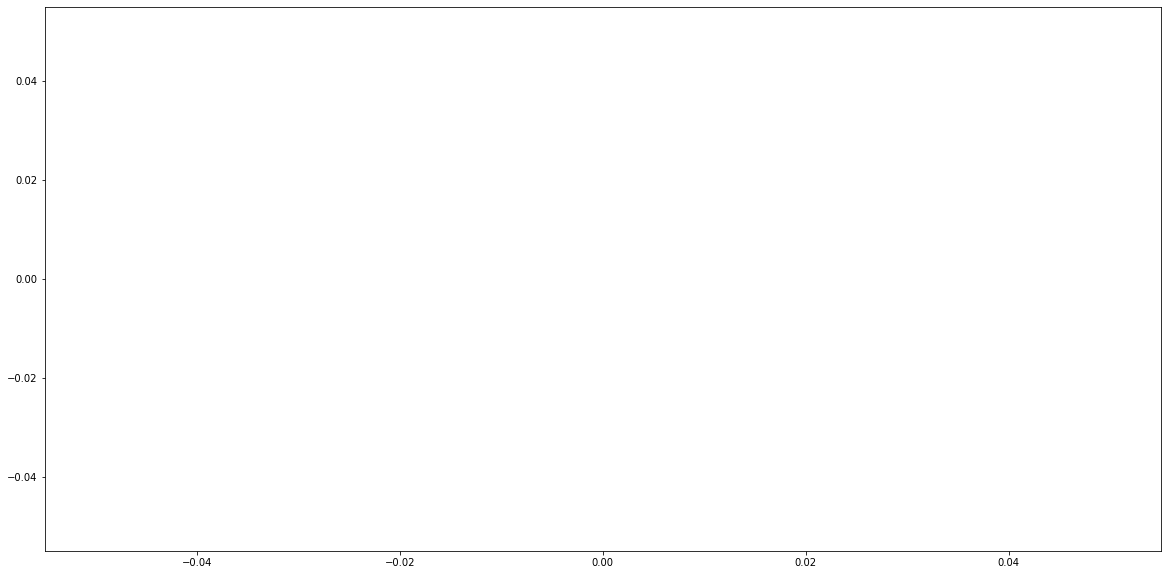

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006287
----------Result Report--------------
profit:  0


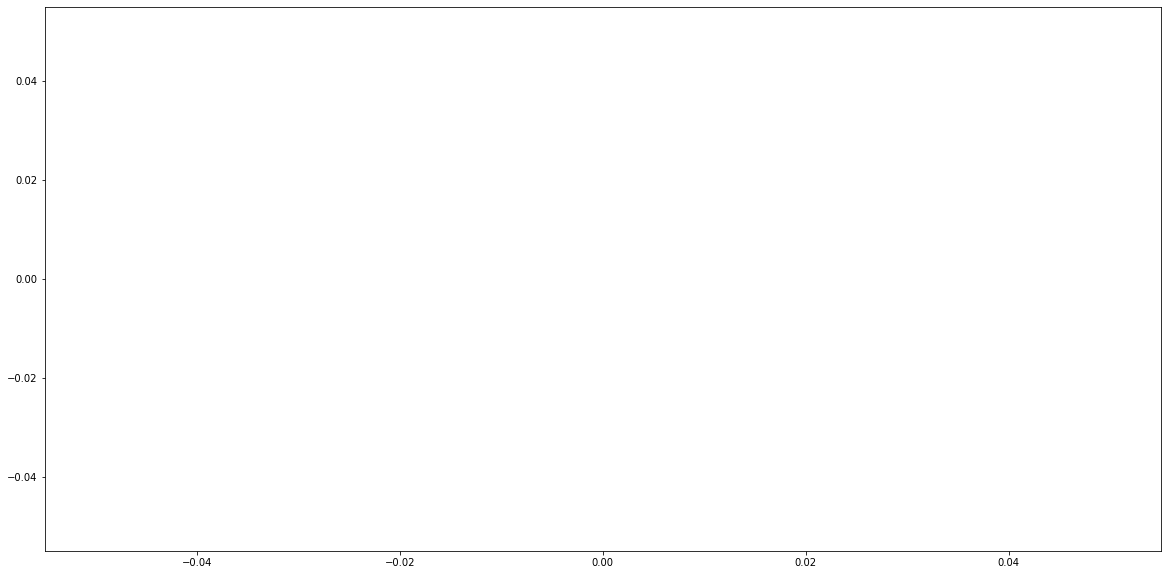

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90005673
----------Result Report--------------
profit:  0


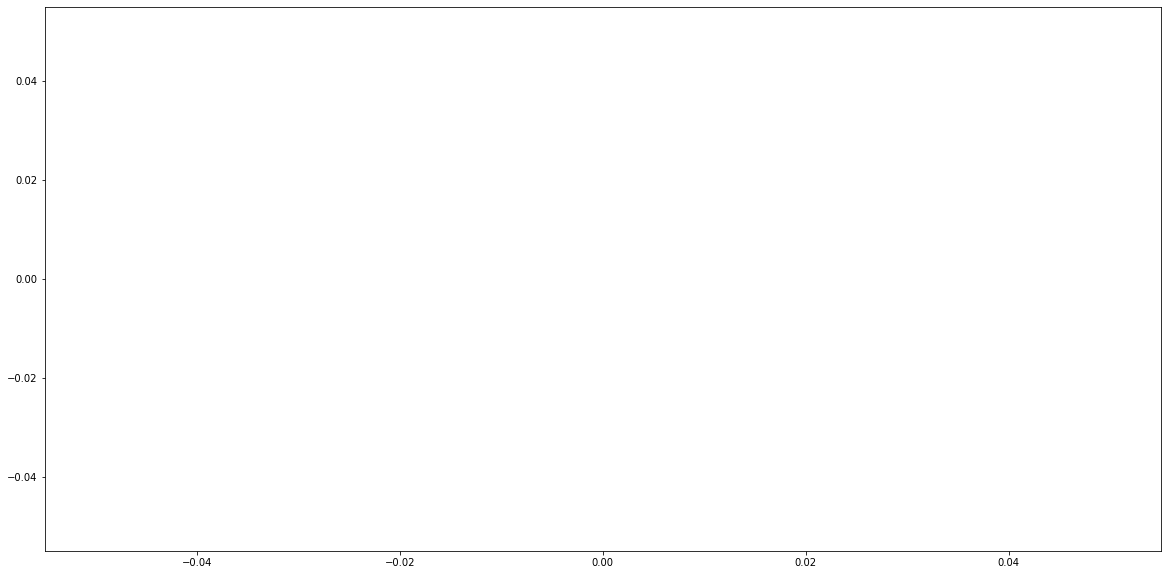

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006910
----------Result Report--------------
profit:  0


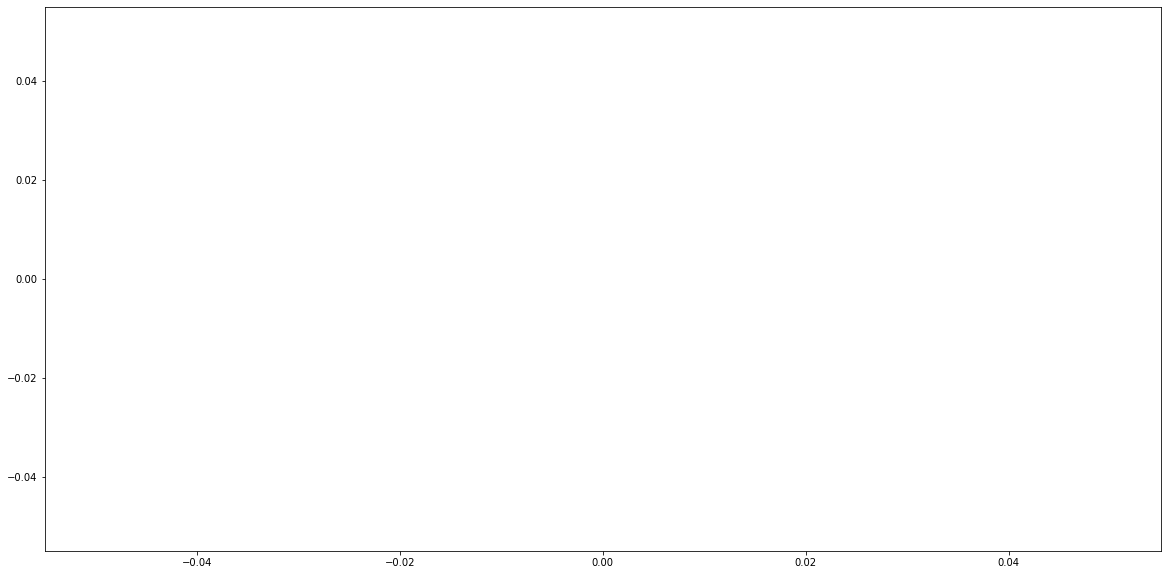

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004864
----------Result Report--------------
profit:  0


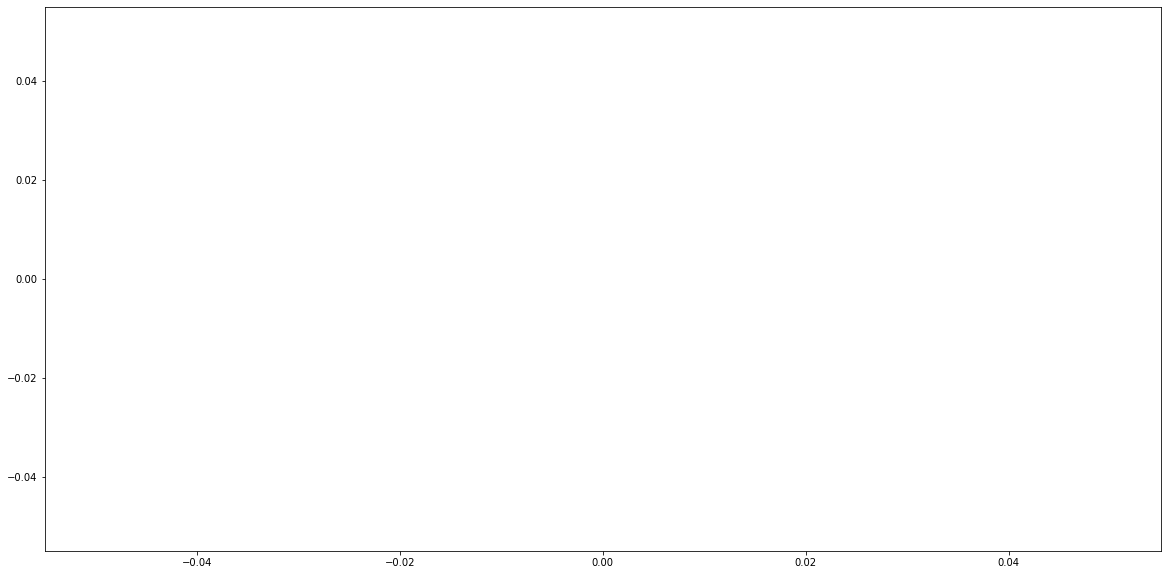

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90003634
----------Result Report--------------
profit:  0


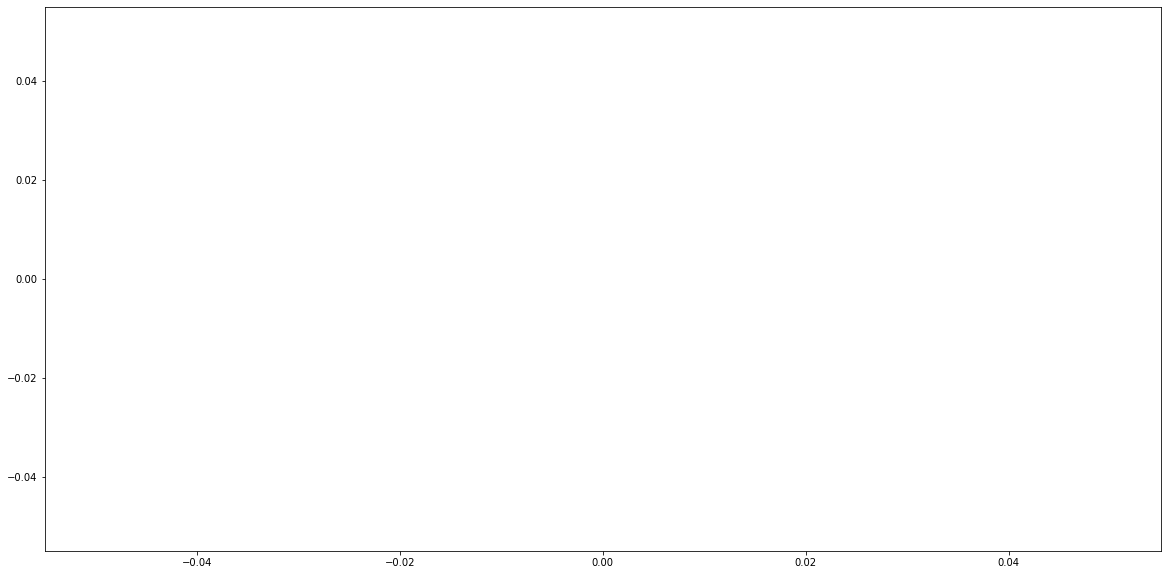

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90000912
----------Result Report--------------
profit:  0


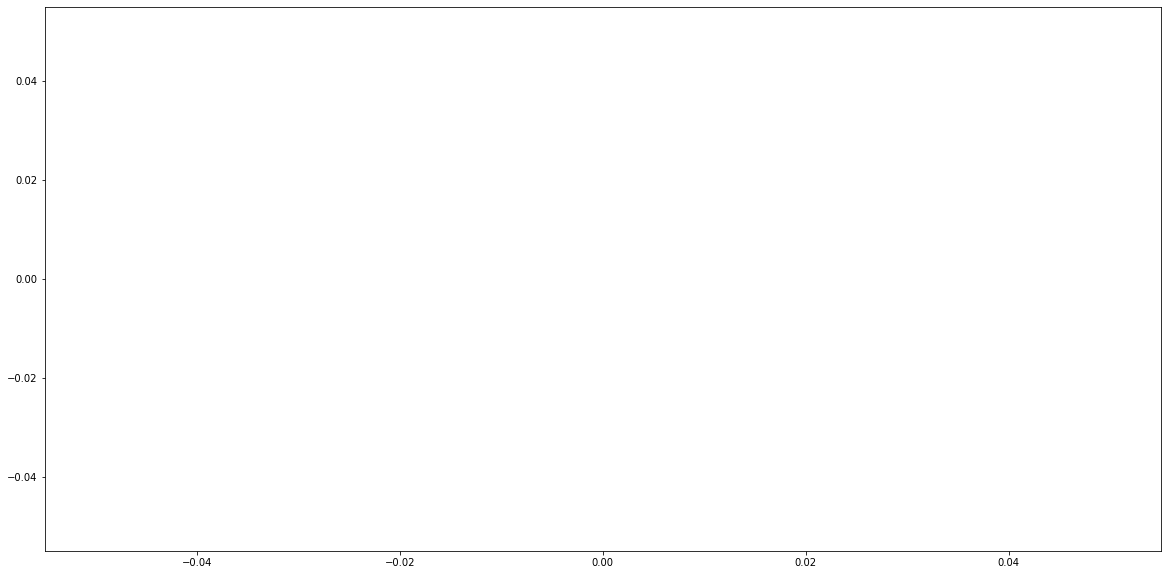

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90003241
----------Result Report--------------
profit:  0


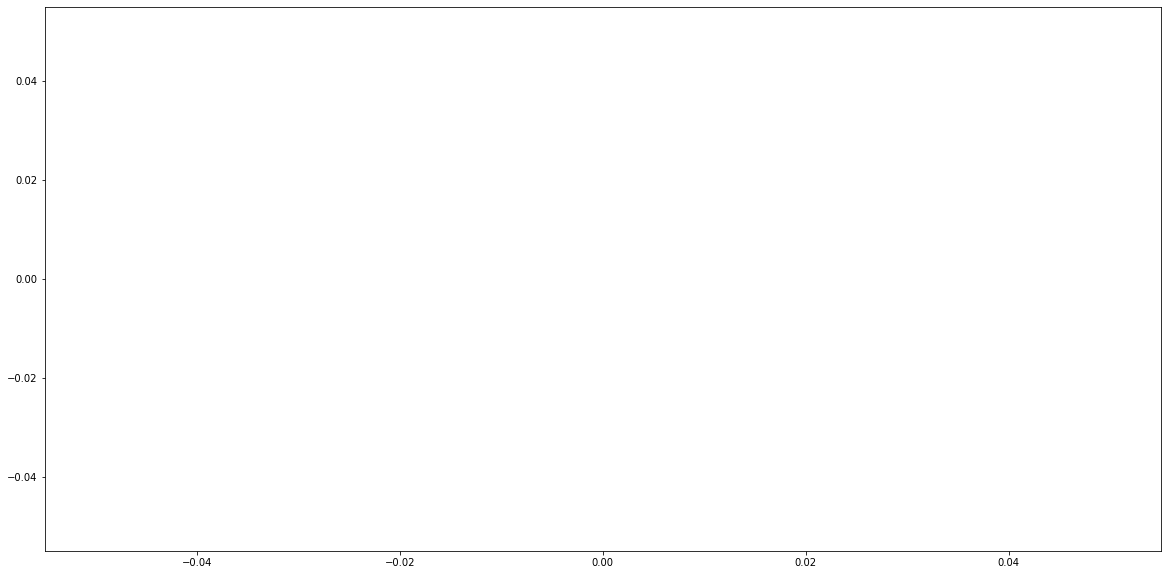

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90003587
----------Result Report--------------
profit:  0


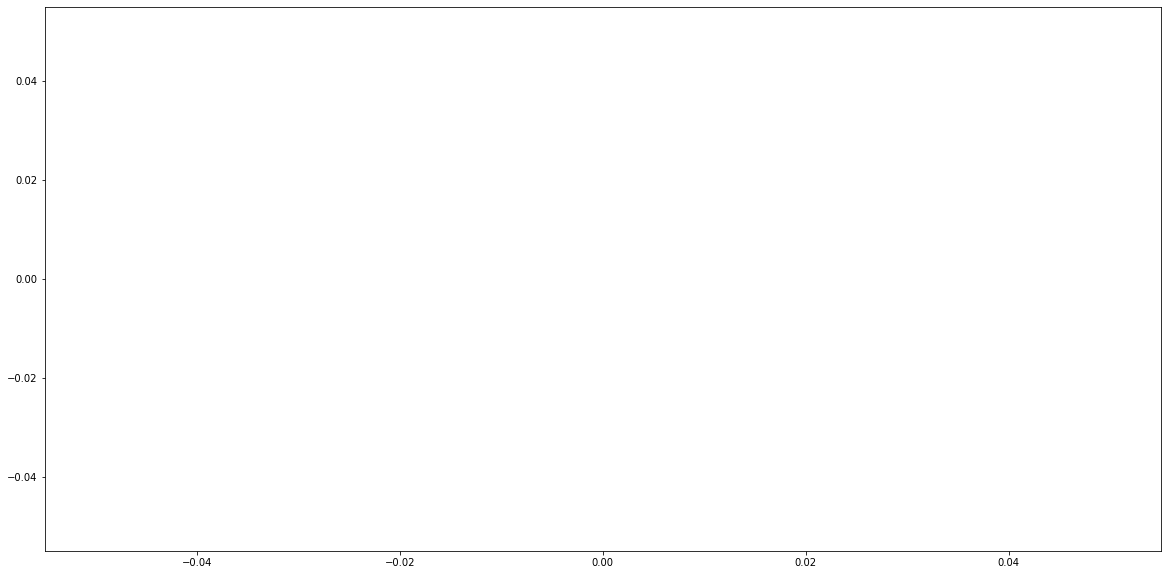

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004327
----------Result Report--------------
profit:  0


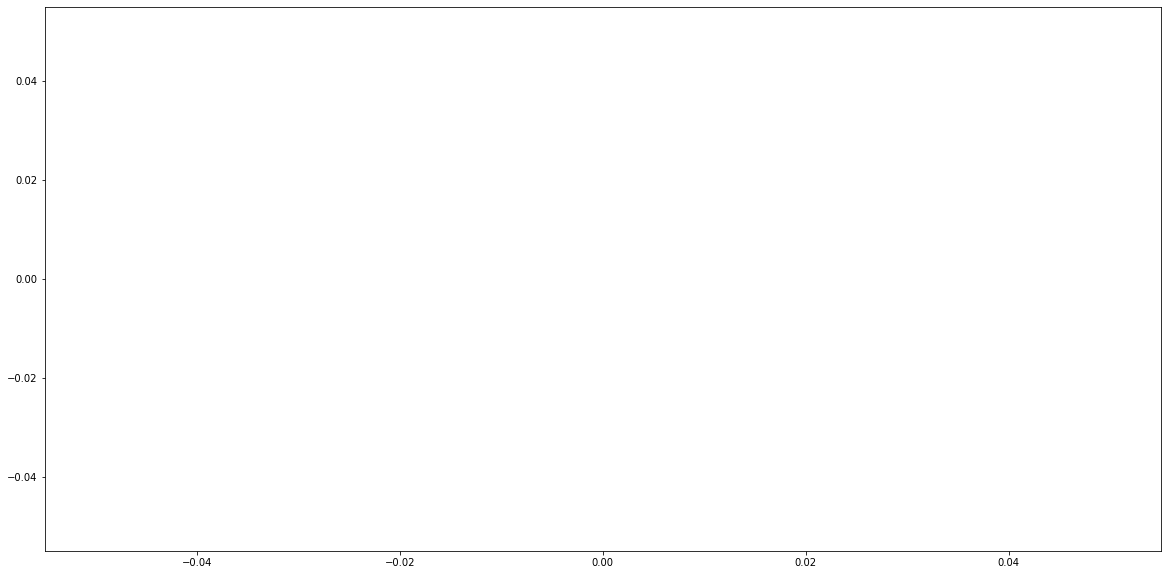

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90004545
----------Result Report--------------
profit:  0


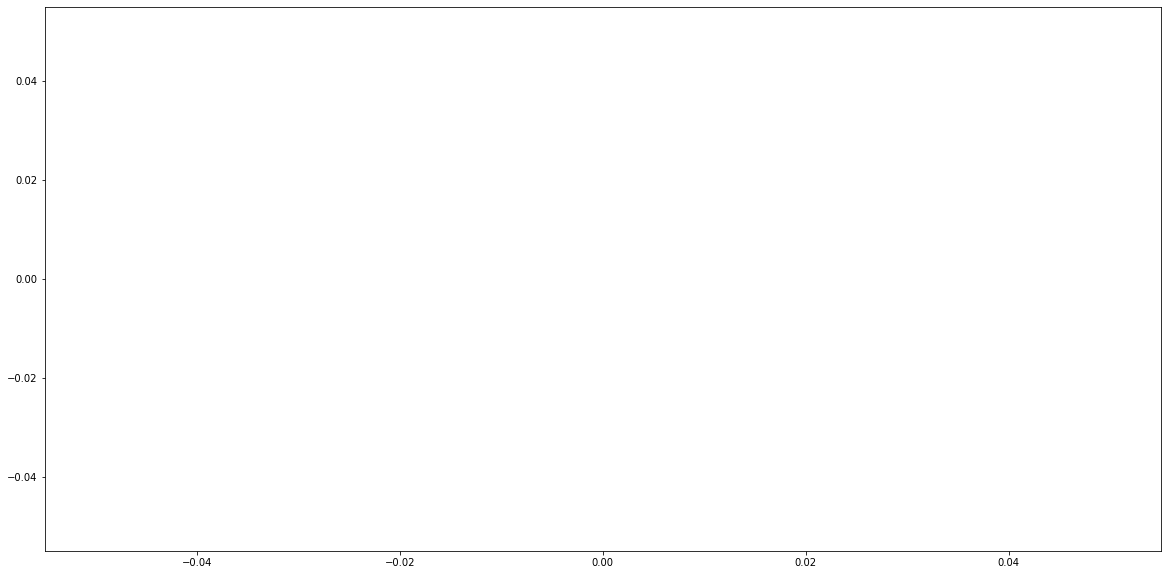

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90003921
----------Result Report--------------
profit:  0


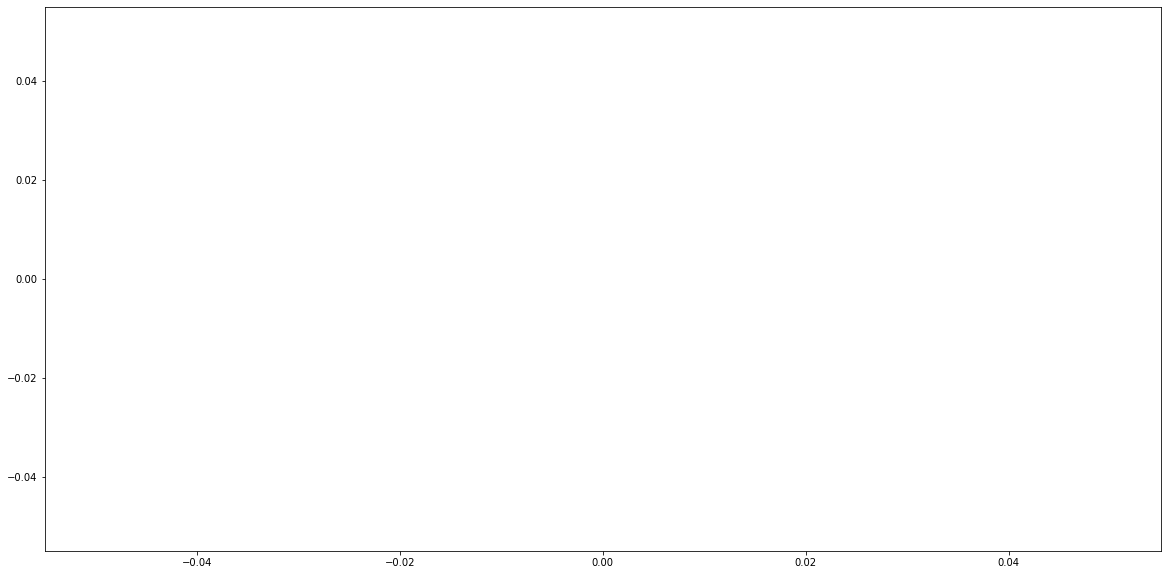

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90005046
----------Result Report--------------
profit:  0


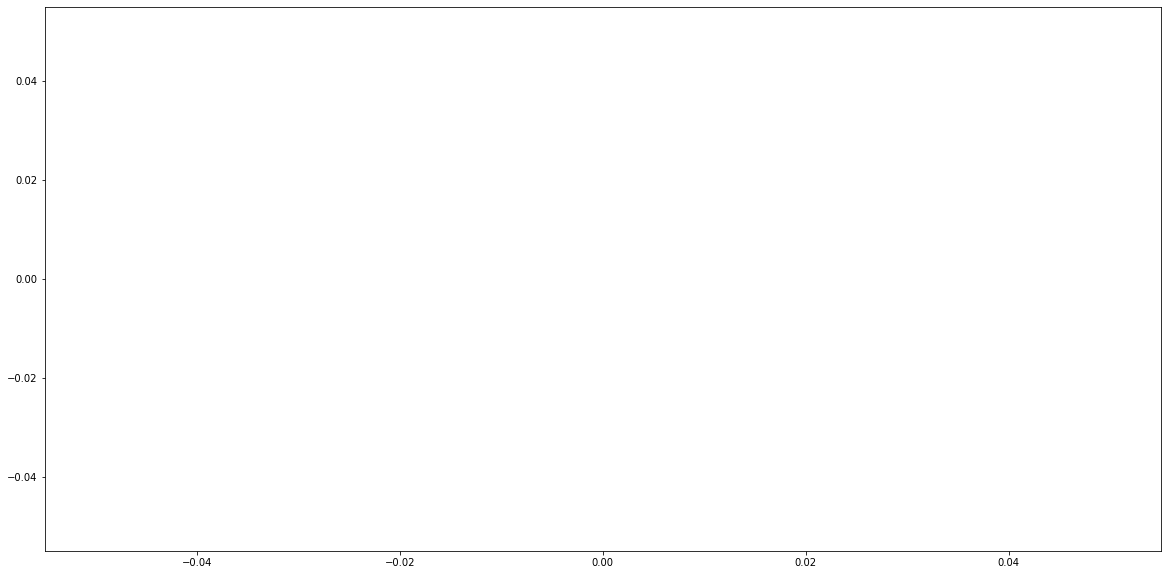

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006066
----------Result Report--------------
profit:  0


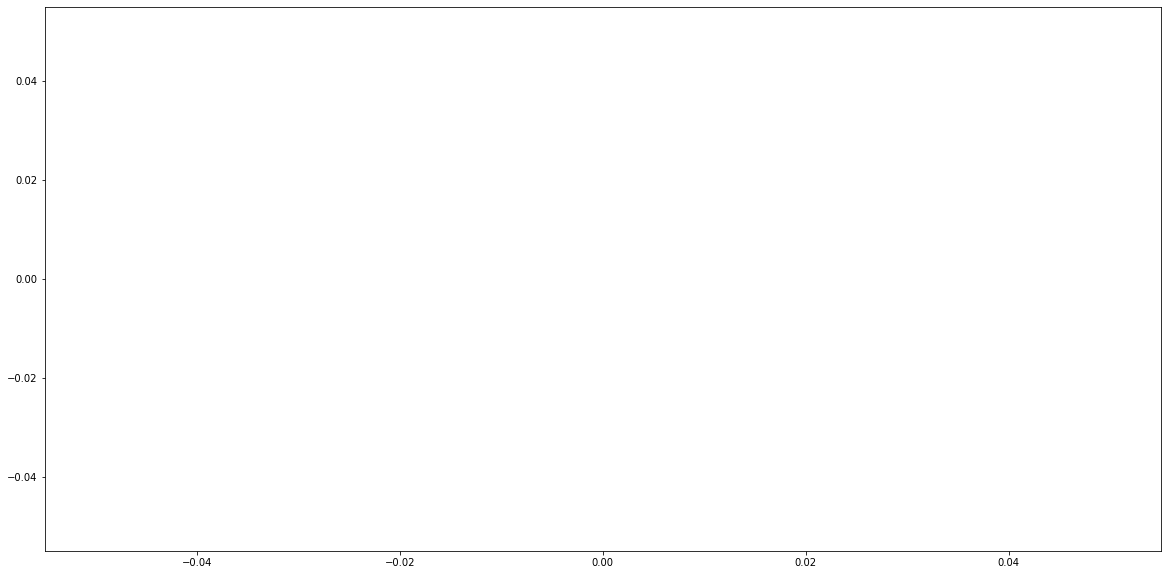

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006167
------Weird price!!!!!---------
At time:  104517014
tick_row_price 21.4
ask_1_p 21.45
bid_1_p 21.35
----------Result Report--------------
profit:  0


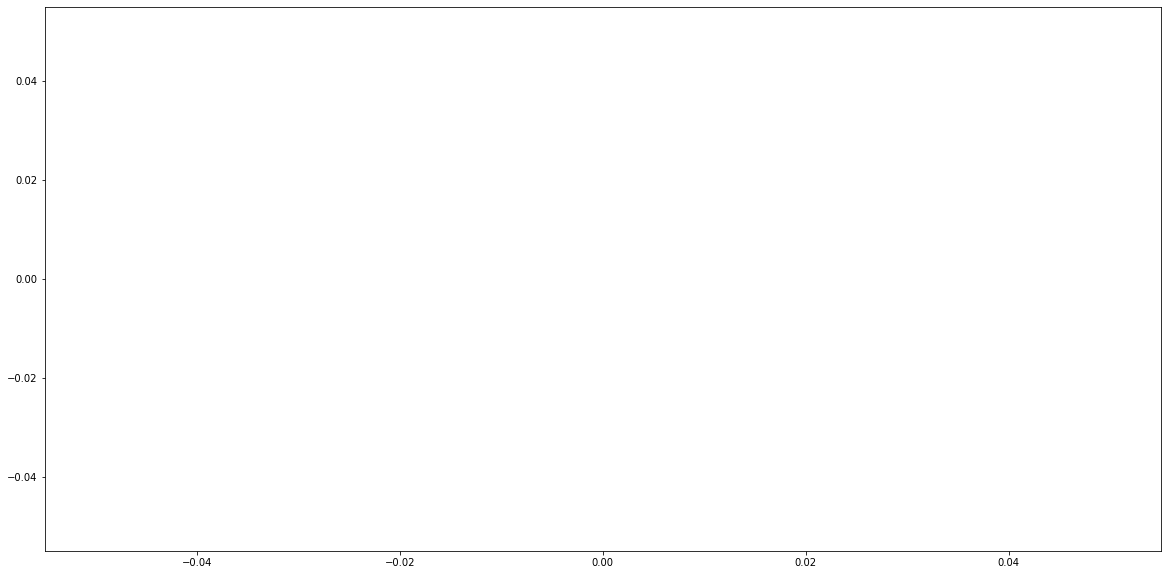

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90003677
----------Result Report--------------
profit:  0


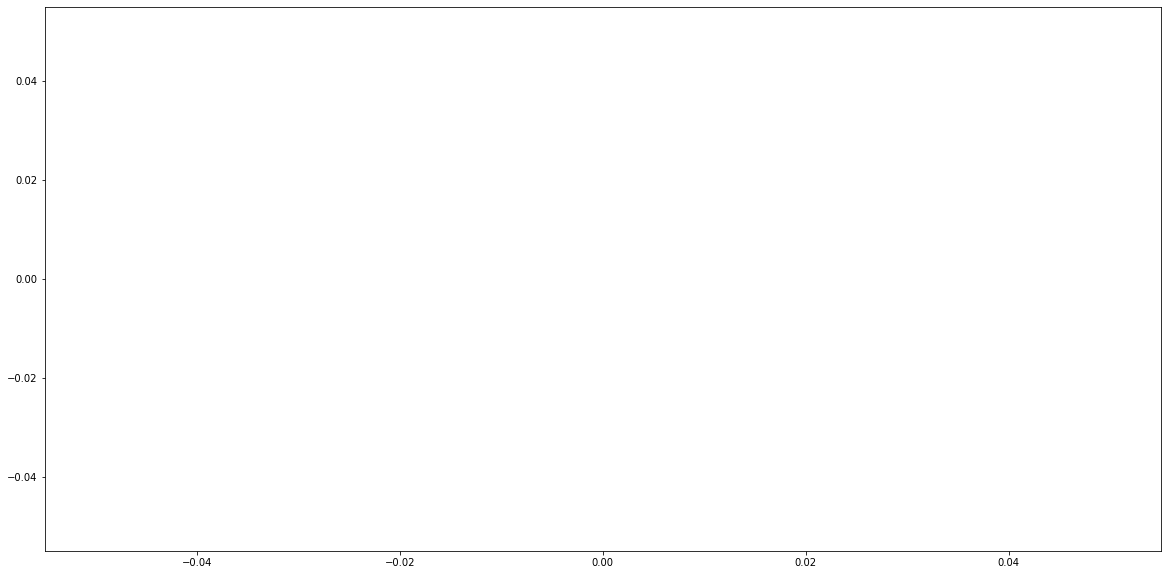

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006643
----------Result Report--------------
profit:  0


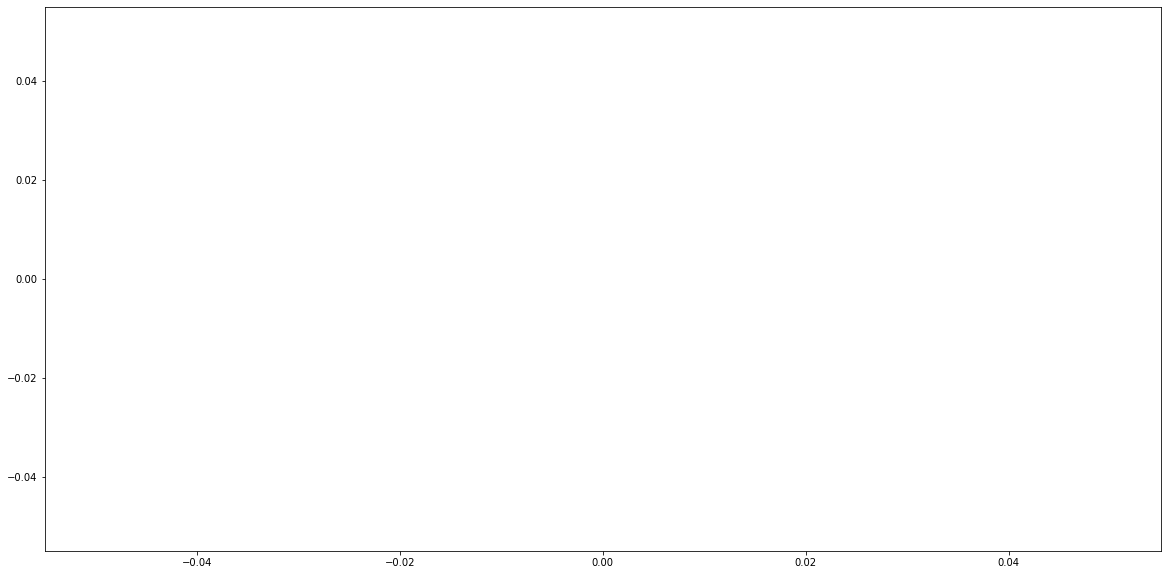

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007335
----------Result Report--------------
profit:  0


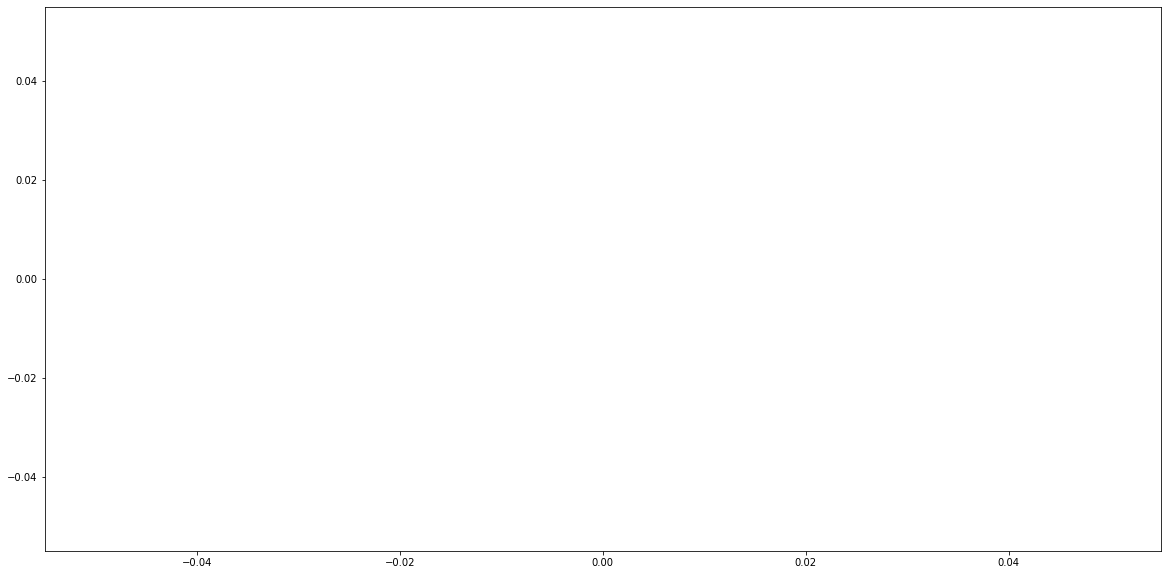

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90008000
----------Result Report--------------
profit:  0


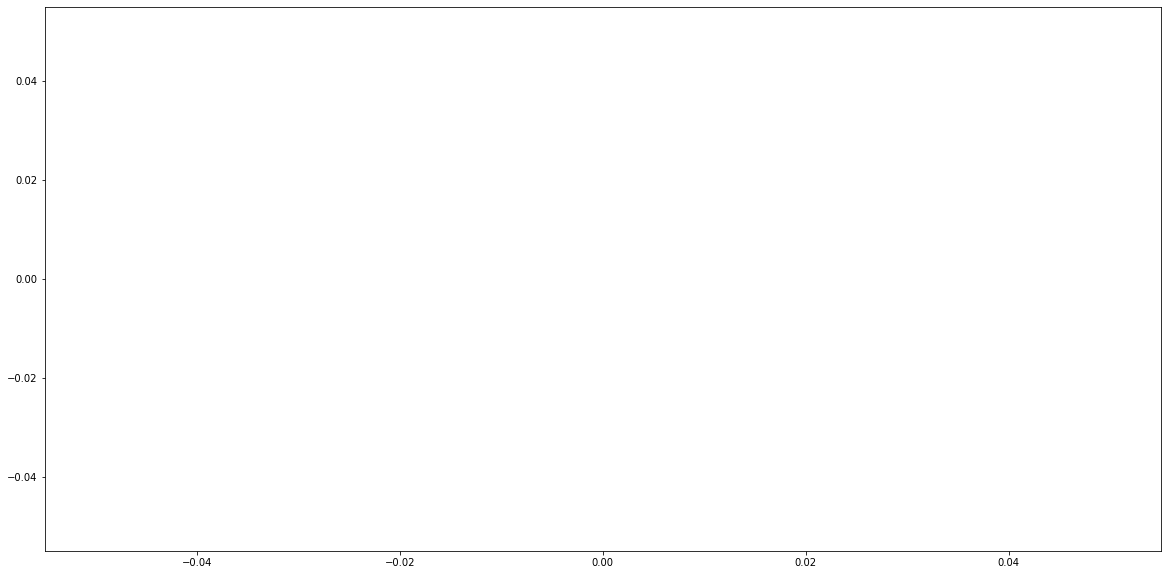

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006041
----------Result Report--------------
profit:  0


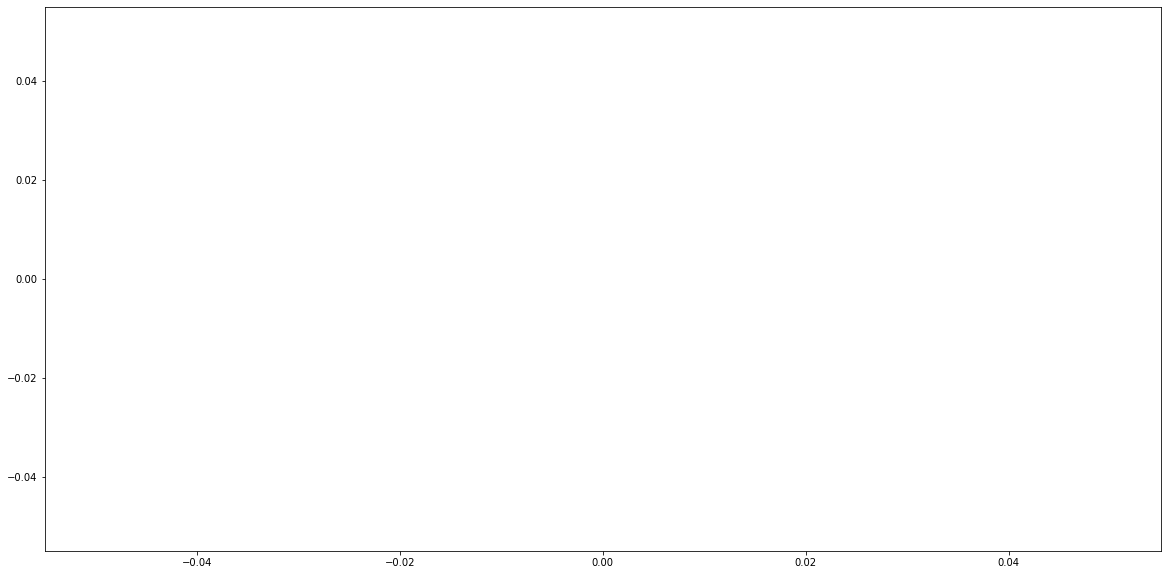

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007227
----------Result Report--------------
profit:  0


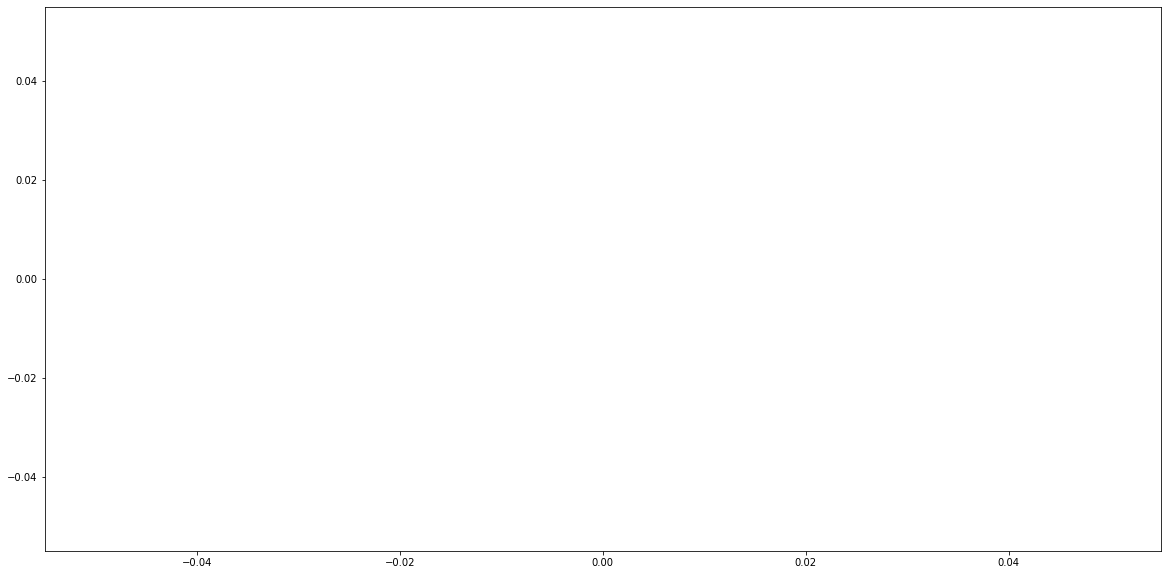

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90007299
----------Result Report--------------
profit:  0


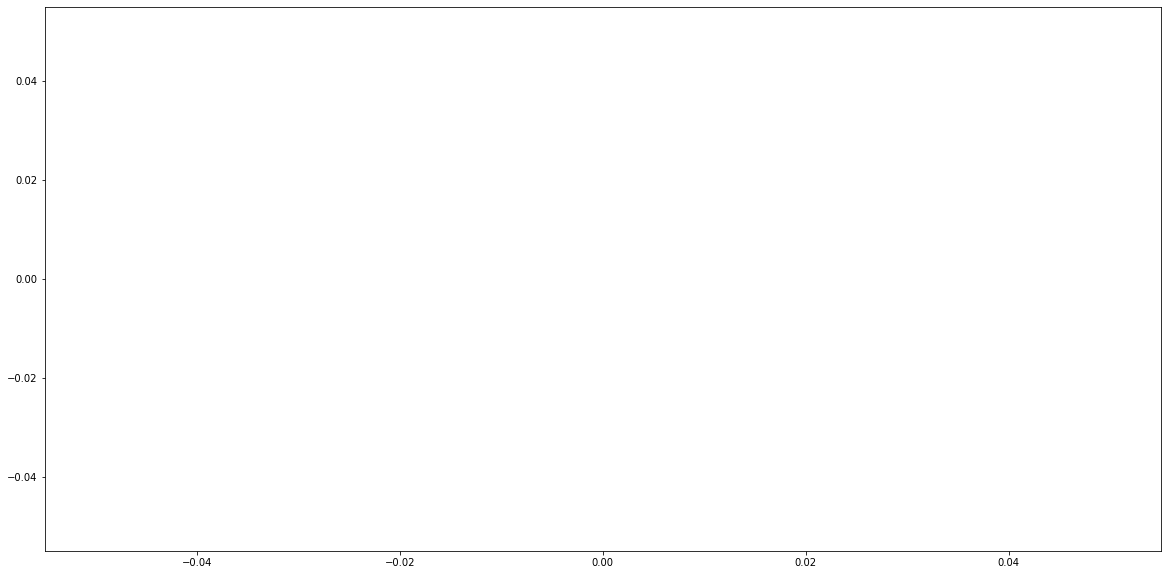

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90005961
----------Result Report--------------
profit:  0


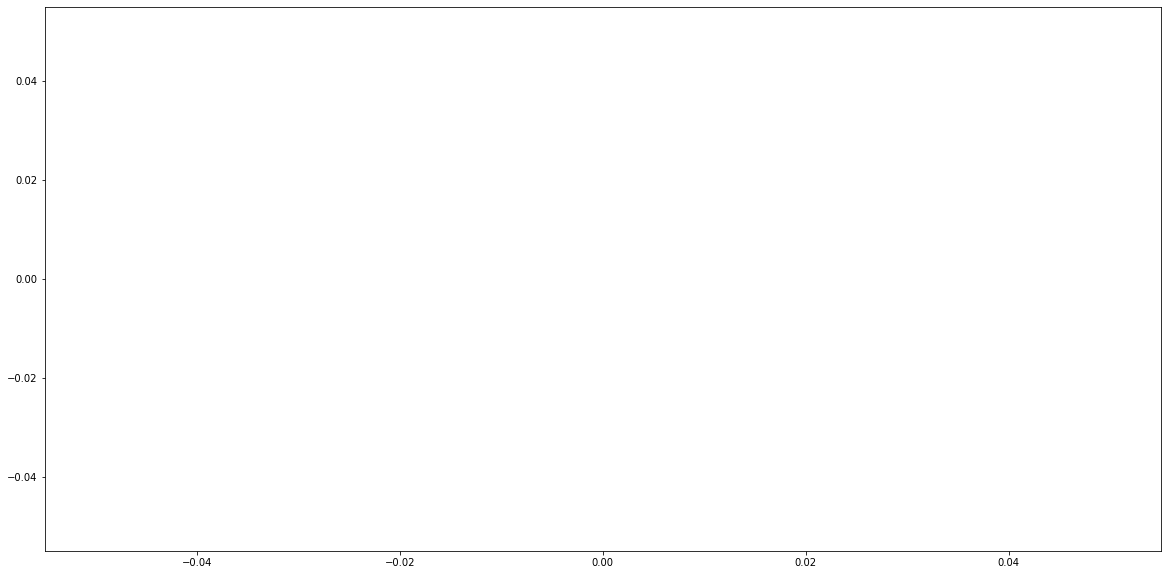

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90006564
----------Result Report--------------
profit:  0


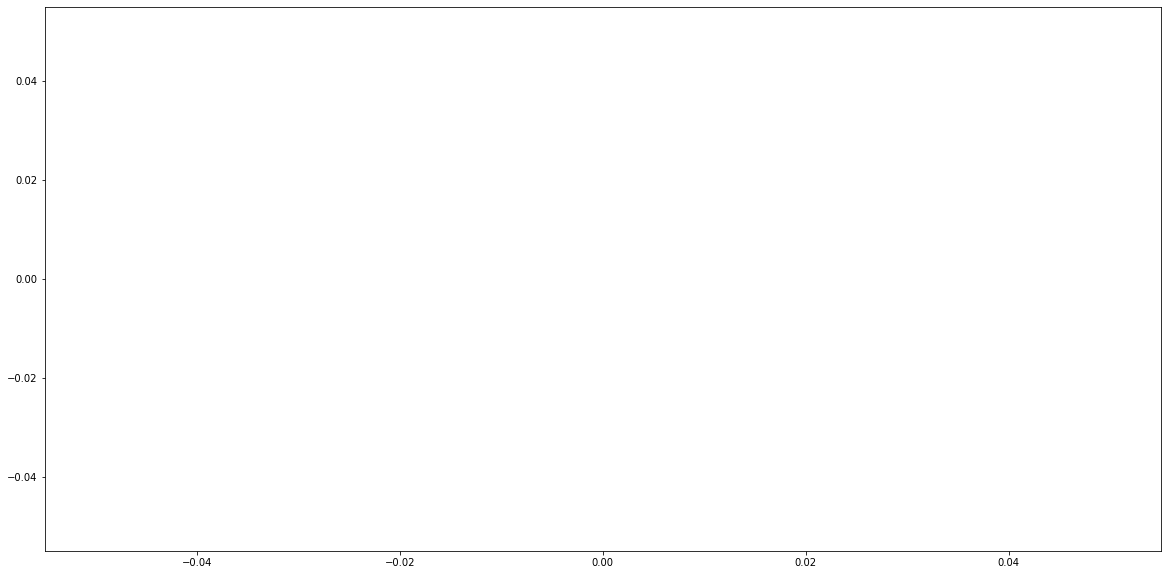

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/2892/tse_lob_2892.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/2892/tse_tick_2892.csv' mode='r' encoding='UTF-8'>
90002328
----------Result Report--------------
profit:  0


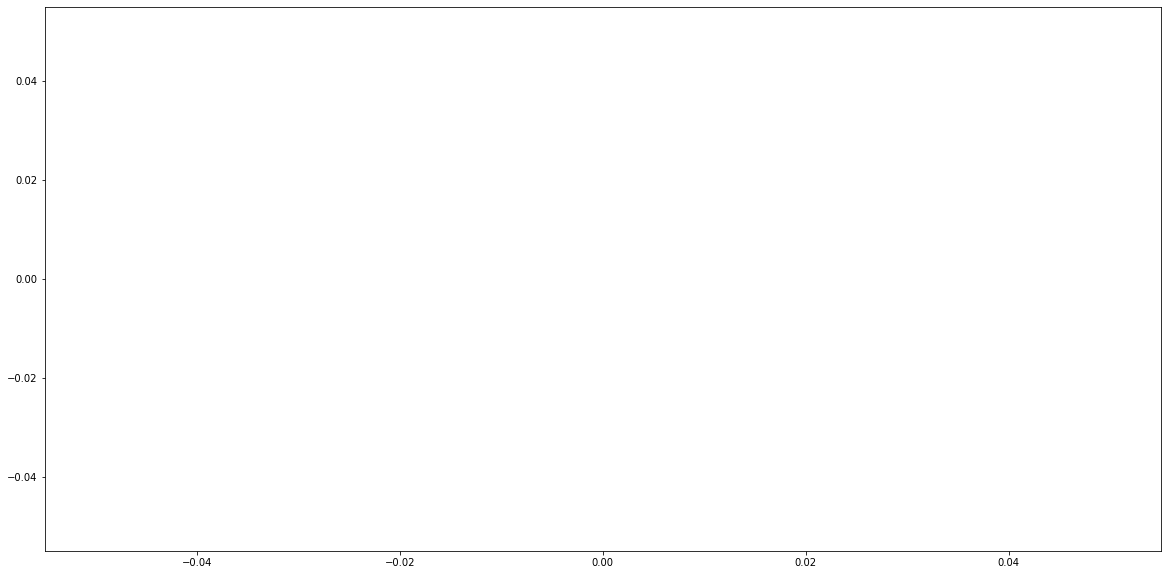

In [103]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2892")

In [104]:
res

[(0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0.09999999999999787, 69.25, 0, 0),
 (-0.14999999999999858, 70.35, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0)]

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90001991
daily_low  73.7
daily_low * theta 74.0685
bid1_p:  74.2
# sell:  59   # buy:  27
bid1_q:  5   bid2_q:  40
進場時間： 90239616 
  sell price at  74.2
stop profit
出場時間： 90308542
buy at 74.1
get 0.10000000000000853
------------------------------
daily_low  73.7
daily_low * theta 74.0685
bid1_p:  74.1
# sell:  51   # buy:  17
bid1_q:  10   bid2_q:  40
進場時間： 90444177 
  sell price at  74.1
stop profit
出場時間： 90515251
buy at 74.0
get 0.09999999999999432
------------------------------
daily_low  73.3
daily_low * theta 73.66649999999998
bid1_p:  73.7
# sell:  23   # buy:  10
bid1_q:  14   bid2_q:  14
進場時間： 91758062 
  sell price at  73.7
stop profit
出場時間： 92021437
buy at 73.6
get 0.10000000000000853
-----------------------------

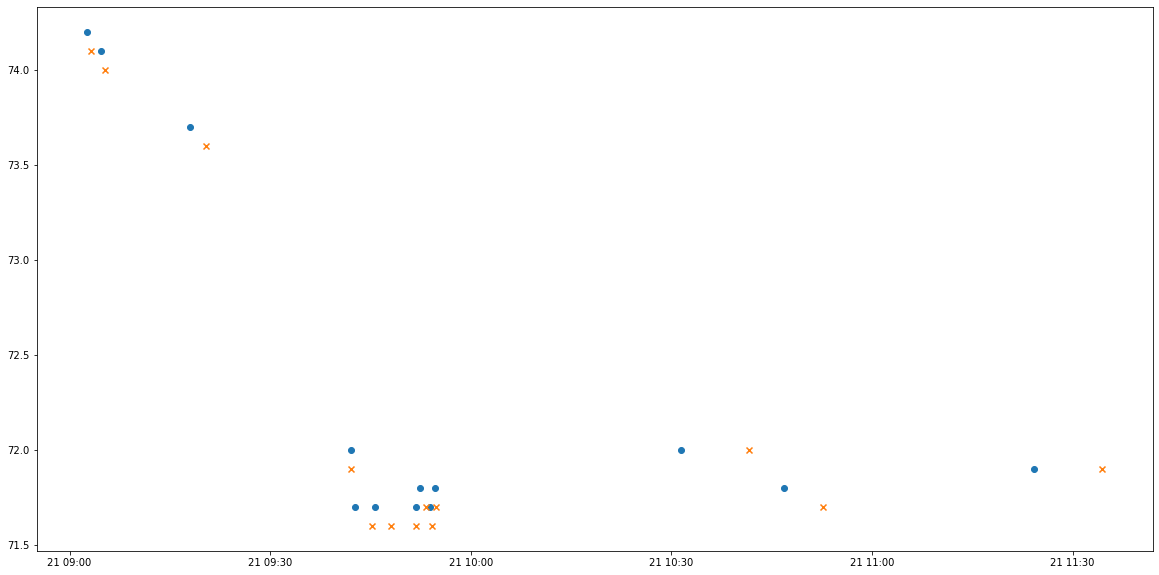

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002788
daily_low  71.3
daily_low * theta 71.6565
bid1_p:  71.7
# sell:  53   # buy:  10
bid1_q:  14   bid2_q:  53
進場時間： 91107801 
  sell price at  71.7
stop profit
出場時間： 91706394
buy at 71.6
get 0.10000000000000853
------------------------------
daily_low  71.0
daily_low * theta 71.35499999999999
bid1_p:  71.5
# sell:  54   # buy:  1
bid1_q:  24   bid2_q:  30
進場時間： 92838411 
  sell price at  71.5
time out
出場時間： 93838509
buy at 71.8
get -0.29999999999999716
------------------------------
daily_low  71.0
daily_low * theta 71.35499999999999
bid1_p:  71.6
# sell:  28   # buy:  3
bid1_q:  8   bid2_q:  23
進場時間： 93900460 
  sell price at  71.6
stop profit
出場時間： 94759204
buy at 71.5
get 0.09999999999999432
-----------------------

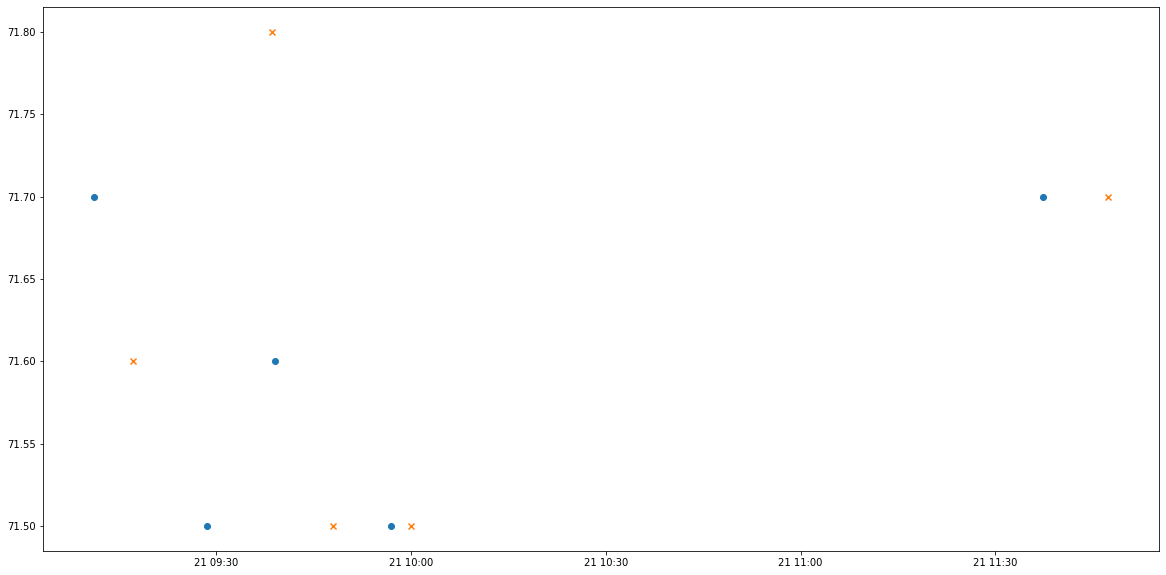

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005245
daily_low  70.0
daily_low * theta 70.35
bid1_p:  71.1
# sell:  151   # buy:  17
bid1_q:  3   bid2_q:  94
進場時間： 111514874 
  sell price at  71.1
stop profit
出場時間： 111756947
buy at 71.0
get 0.09999999999999432
------------------------------
daily_low  70.0
daily_low * theta 70.35
bid1_p:  70.7
# sell:  203   # buy:  0
bid1_q:  66   bid2_q:  93
進場時間： 112711305 
  sell price at  70.7
stop profit
出場時間： 112711305
buy at 70.6
get 0.10000000000000853
------------------------------
daily_low  70.0
daily_low * theta 70.35
bid1_p:  70.4
# sell:  352   # buy:  37
bid1_q:  1   bid2_q:  401
進場時間： 112742523 
  sell price at  70.4
time out
出場時間： 113742564
buy at 71.1
get -0.6999999999999886
------------------------------
daily_low

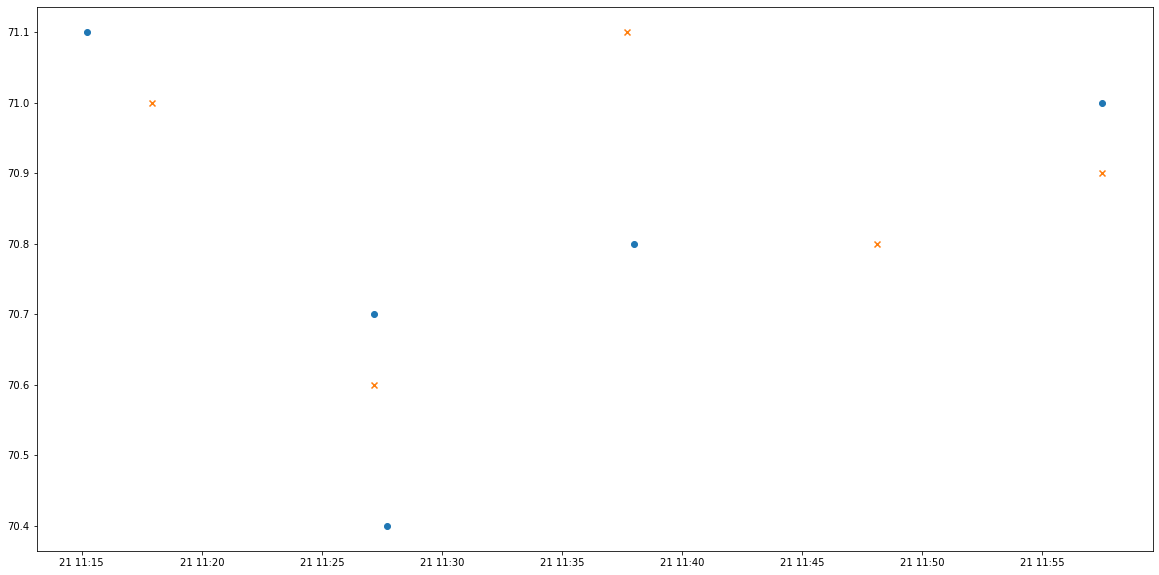

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004981
daily_low  69.2
daily_low * theta 69.54599999999999
bid1_p:  69.7
# sell:  9   # buy:  4
bid1_q:  8   bid2_q:  1
進場時間： 90412665 
  sell price at  69.7
stop profit
出場時間： 90614529
buy at 69.6
get 0.10000000000000853
------------------------------
daily_low  68.9
daily_low * theta 69.2445
bid1_p:  69.3
# sell:  204   # buy:  3
bid1_q:  38   bid2_q:  188
進場時間： 120216645 
  sell price at  69.3
stop profit
出場時間： 120925684
buy at 69.2
get 0.09999999999999432
------------------------------
----------Result Report--------------
profit:  0.20000000000000284


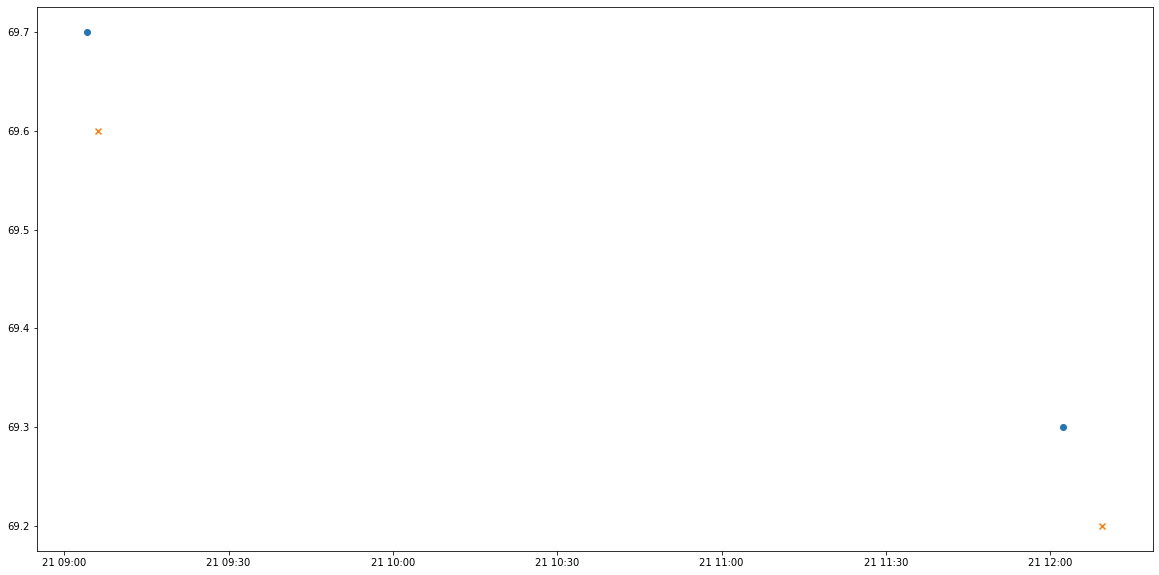

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90003998
daily_low  70.1
daily_low * theta 70.45049999999999
bid1_p:  70.7
# sell:  56   # buy:  10
bid1_q:  39   bid2_q:  25
進場時間： 90930278 
  sell price at  70.7
stop loss
出場時間： 91117510
buy at 71.4
get -0.7000000000000028
------------------------------
daily_low  70.1
daily_low * theta 70.45049999999999
bid1_p:  71.9
# sell:  115   # buy:  4
bid1_q:  47   bid2_q:  6
進場時間： 91147861 
  sell price at  71.9
stop profit
出場時間： 91201260
buy at 71.8
get 0.10000000000000853
------------------------------
daily_low  70.1
daily_low * theta 70.45049999999999
bid1_p:  71.5
# sell:  35   # buy:  4
bid1_q:  3   bid2_q:  12
進場時間： 91231747 
  sell price at  71.5
stop profit
出場時間： 91704050
buy at 71.4
get 0.09999999999999432
-------------

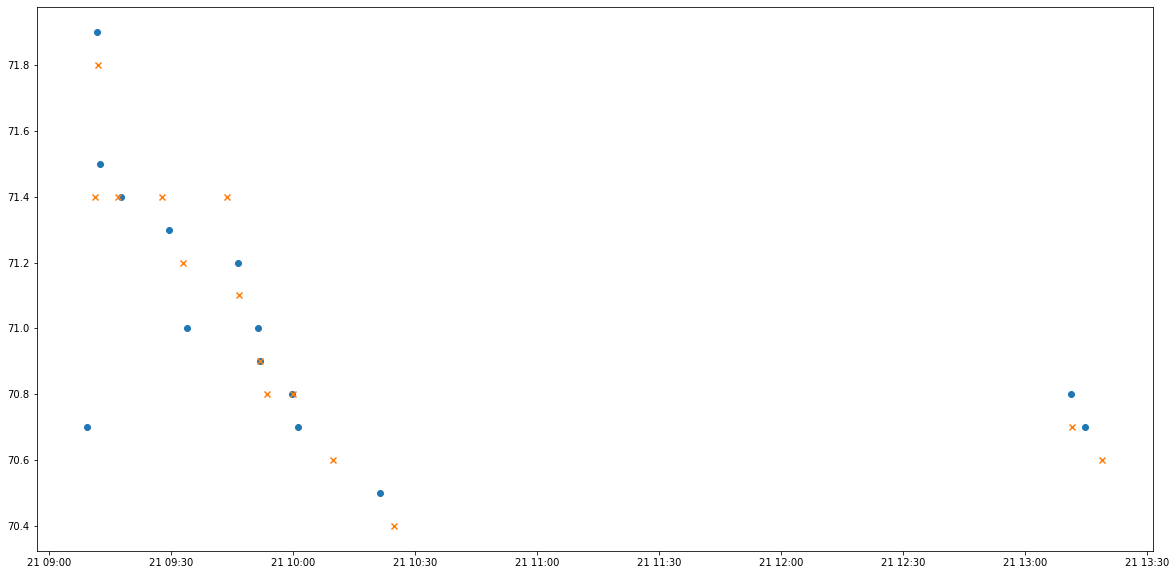

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004081
daily_low  71.0
daily_low * theta 71.35499999999999
bid1_p:  71.4
# sell:  32   # buy:  6
bid1_q:  6   bid2_q:  28
進場時間： 90435574 
  sell price at  71.4
stop profit
出場時間： 90721874
buy at 71.3
get 0.10000000000000853
------------------------------
daily_low  70.4
daily_low * theta 70.752
bid1_p:  70.8
# sell:  34   # buy:  9
bid1_q:  18   bid2_q:  15
進場時間： 94204462 
  sell price at  70.8
stop profit
出場時間： 94700066
buy at 70.7
get 0.09999999999999432
------------------------------
daily_low  70.4
daily_low * theta 70.752
bid1_p:  70.9
# sell:  84   # buy:  6
bid1_q:  50   bid2_q:  39
進場時間： 101347119 
  sell price at  70.9
time out
出場時間： 102349187
buy at 71.0
get -0.09999999999999432
------------------------------
dai

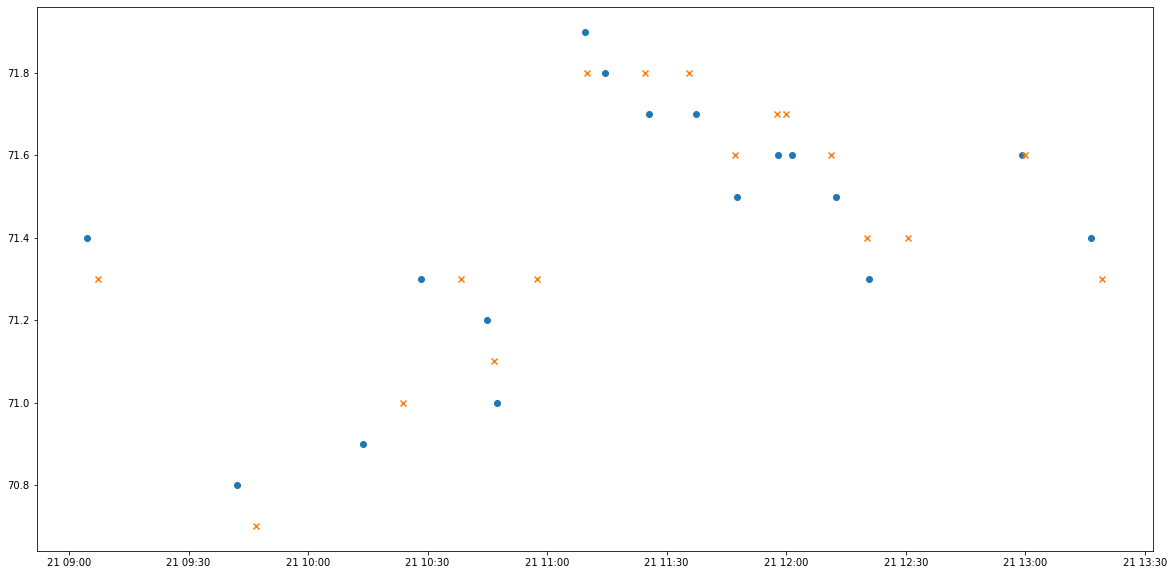

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004904
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  71.9
# sell:  75   # buy:  2
bid1_q:  61   bid2_q:  17
進場時間： 104018287 
  sell price at  71.9
stop profit
出場時間： 104044320
buy at 71.8
get 0.10000000000000853
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  71.9
# sell:  43   # buy:  0
bid1_q:  25   bid2_q:  26
進場時間： 112456268 
  sell price at  71.9
time out
出場時間： 113458897
buy at 71.9
get 0.0
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.2
# sell:  39   # buy:  6
bid1_q:  4   bid2_q:  47
進場時間： 124357920 
  sell price at  72.2
stop profit
出場時間： 124611322
buy at 72.1
get 0.10000000000000853
-------------------------

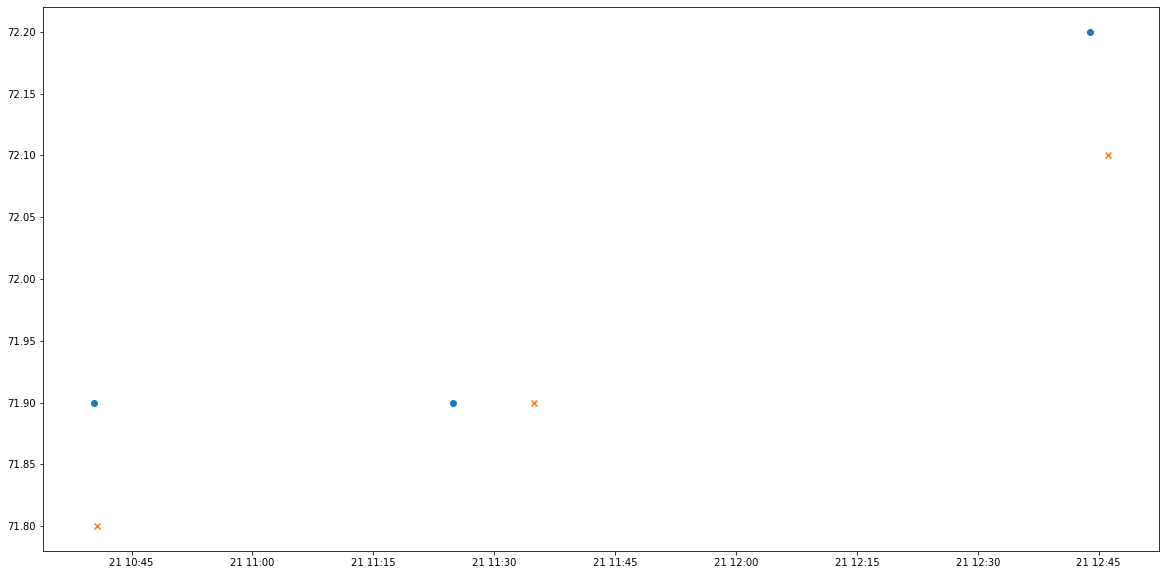

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004505
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.1
# sell:  76   # buy:  27
bid1_q:  36   bid2_q:  57
進場時間： 90300039 
  sell price at  72.1
stop loss
出場時間： 90544851
buy at 72.7
get -0.6000000000000085
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.0
# sell:  80   # buy:  2
bid1_q:  2   bid2_q:  20
進場時間： 90600022 
  sell price at  72.0
stop profit
出場時間： 90618120
buy at 71.8
get 0.20000000000000284
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  71.9
# sell:  55   # buy:  10
bid1_q:  11   bid2_q:  5
進場時間： 90731791 
  sell price at  71.9
stop profit
出場時間： 91241370
buy at 71.8
get 0.10000000000000853
-------------

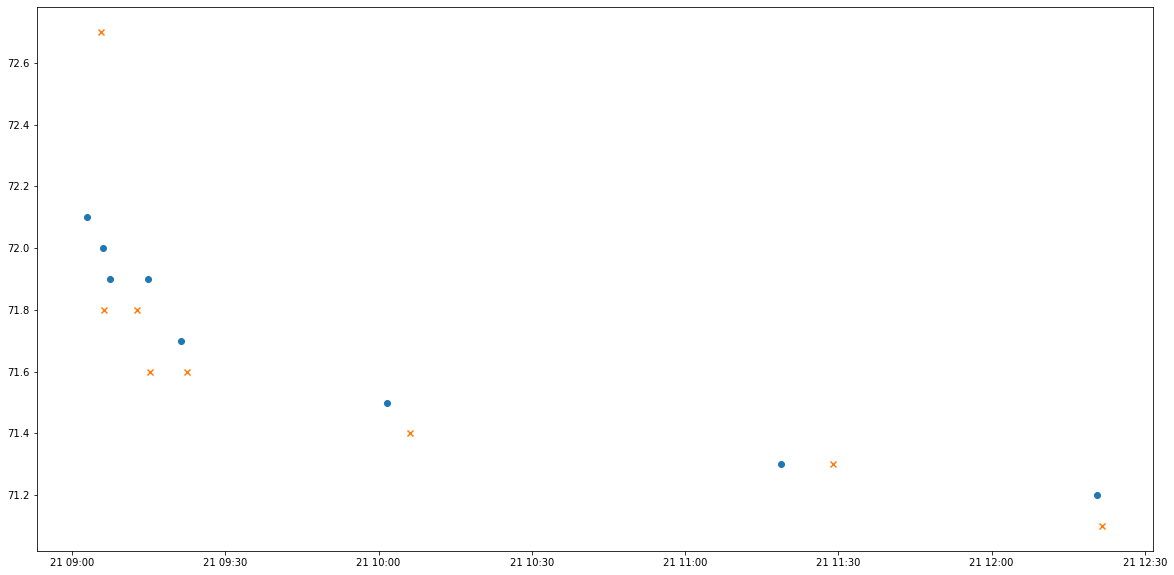

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004807
daily_low  70.8
daily_low * theta 71.154
bid1_p:  71.2
# sell:  34   # buy:  15
bid1_q:  17   bid2_q:  5
進場時間： 94651691 
  sell price at  71.2
time out
出場時間： 95700751
buy at 71.4
get -0.20000000000000284
------------------------------
daily_low  70.8
daily_low * theta 71.154
bid1_p:  71.3
# sell:  34   # buy:  3
bid1_q:  24   bid2_q:  9
進場時間： 95829848 
  sell price at  71.3
time out
出場時間： 100001168
buy at 71.4
get -0.10000000000000853
------------------------------
daily_low  70.8
daily_low * theta 71.154
bid1_p:  71.3
# sell:  30   # buy:  0
bid1_q:  25   bid2_q:  13
進場時間： 100137987 
  sell price at  71.3
time out
出場時間： 101139570
buy at 71.3
get 0.0
------------------------------
daily_low  70.8
daily_low * theta 

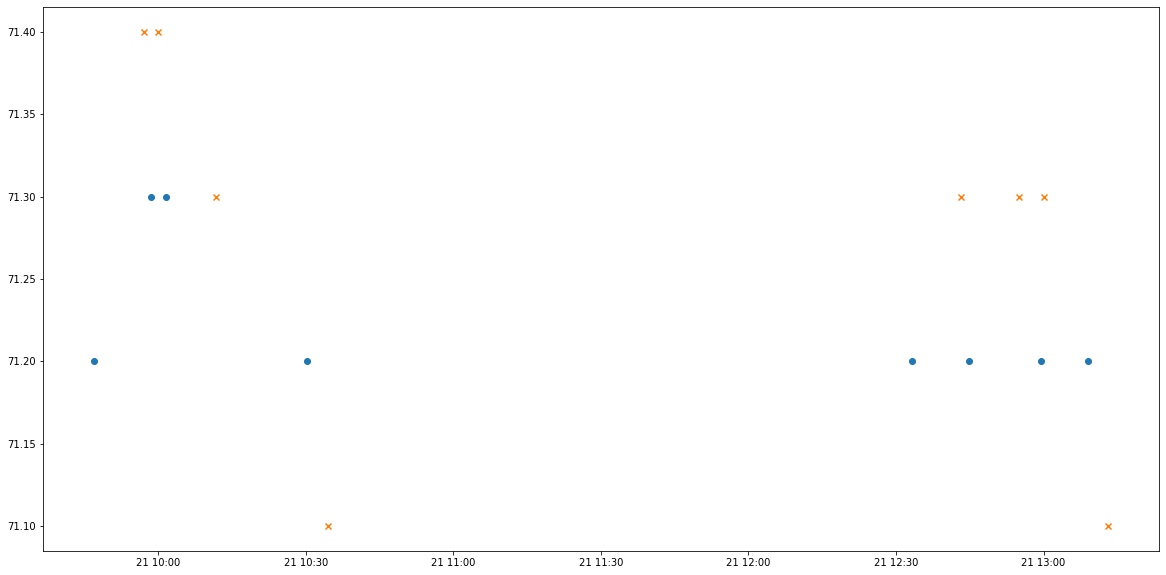

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90008307
----------Result Report--------------
profit:  0


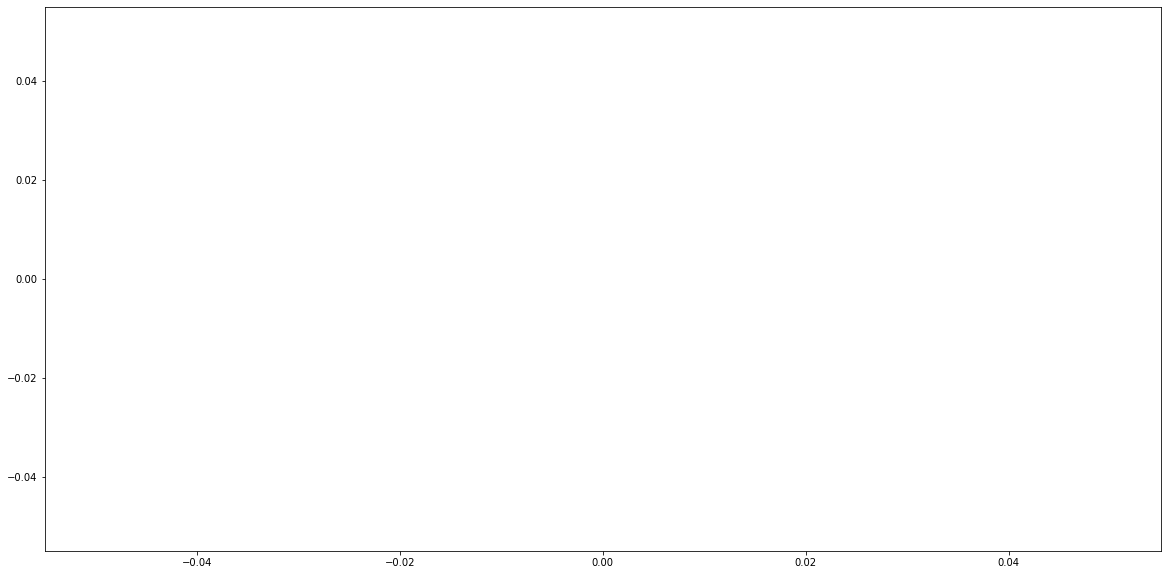

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90006795
daily_low  69.1
daily_low * theta 69.44549999999998
bid1_p:  69.5
# sell:  66   # buy:  1
bid1_q:  9   bid2_q:  71
進場時間： 101220592 
  sell price at  69.5
time out
出場時間： 102222984
buy at 69.6
get -0.09999999999999432
------------------------------
daily_low  69.1
daily_low * theta 69.44549999999998
bid1_p:  70.0
# sell:  64   # buy:  12
bid1_q:  58   bid2_q:  13
進場時間： 102531202 
  sell price at  70.0
stop profit
出場時間： 102542728
buy at 69.9
get 0.09999999999999432
------------------------------
daily_low  69.1
daily_low * theta 69.44549999999998
bid1_p:  69.7
# sell:  89   # buy:  1
bid1_q:  7   bid2_q:  38
進場時間： 102601081 
  sell price at  69.7
time out
出場時間： 103611395
buy at 70.0
get -0.29999999999999716
----------

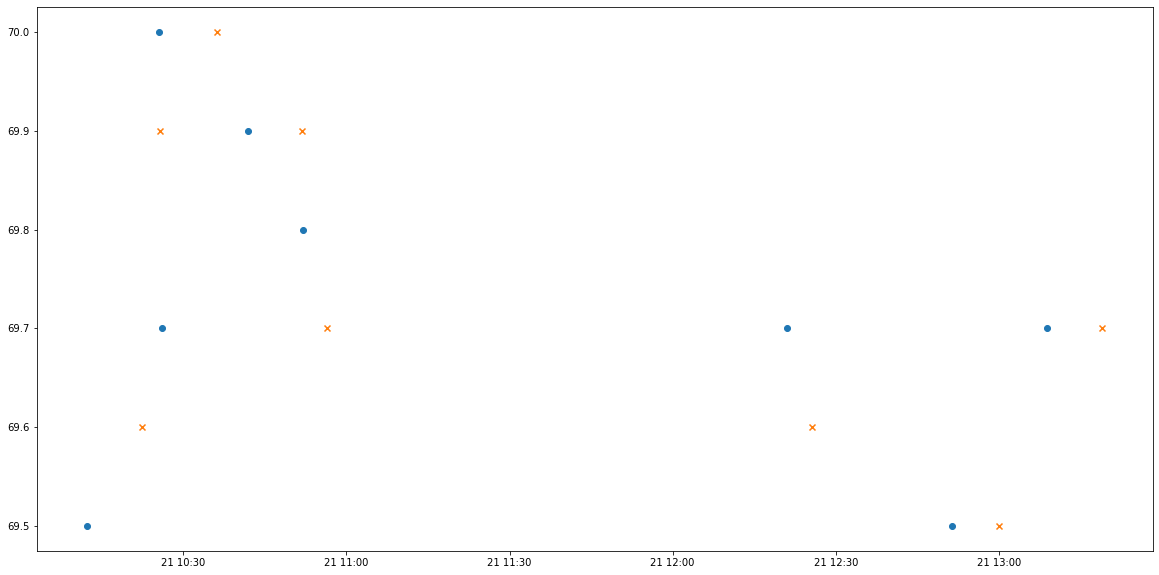

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005658
daily_low  69.3
daily_low * theta 69.64649999999999
bid1_p:  69.7
# sell:  16   # buy:  5
bid1_q:  9   bid2_q:  7
進場時間： 91739481 
  sell price at  69.7
stop profit
出場時間： 92015813
buy at 69.6
get 0.10000000000000853
------------------------------
daily_low  69.3
daily_low * theta 69.64649999999999
bid1_p:  70.2
# sell:  14   # buy:  3
bid1_q:  6   bid2_q:  6
進場時間： 92248183 
  sell price at  70.2
time out
出場時間： 93248727
buy at 70.5
get -0.29999999999999716
------------------------------
daily_low  69.3
daily_low * theta 69.64649999999999
bid1_p:  70.3
# sell:  9   # buy:  4
bid1_q:  3   bid2_q:  4
進場時間： 93330784 
  sell price at  70.3
stop profit
出場時間： 93702484
buy at 70.2
get 0.09999999999999432
--------------------

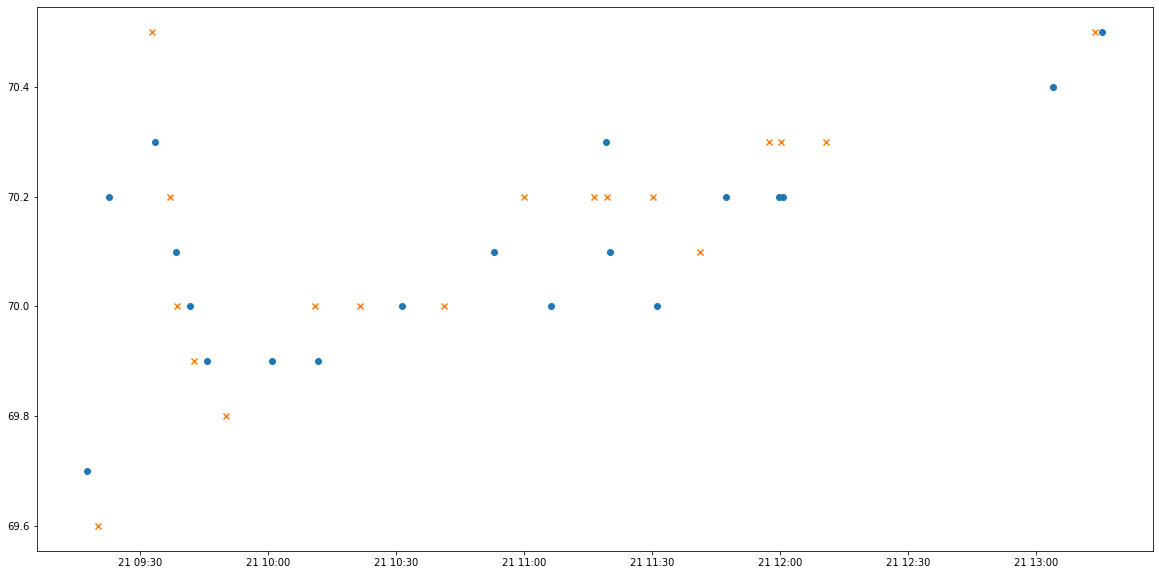

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90007079
daily_low  71.0
daily_low * theta 71.35499999999999
bid1_p:  72.2
# sell:  37   # buy:  1
bid1_q:  30   bid2_q:  18
進場時間： 90839952 
  sell price at  72.2
stop profit
出場時間： 90904759
buy at 72.1
get 0.10000000000000853
------------------------------
daily_low  71.0
daily_low * theta 71.35499999999999
bid1_p:  72.0
# sell:  42   # buy:  14
bid1_q:  2   bid2_q:  26
進場時間： 91030586 
  sell price at  72.0
stop profit
出場時間： 91058656
buy at 71.9
get 0.09999999999999432
------------------------------
daily_low  71.0
daily_low * theta 71.35499999999999
bid1_p:  71.6
# sell:  95   # buy:  13
bid1_q:  13   bid2_q:  22
進場時間： 91100498 
  sell price at  71.6
time out
出場時間： 92100965
buy at 72.0
get -0.4000000000000057
-------------

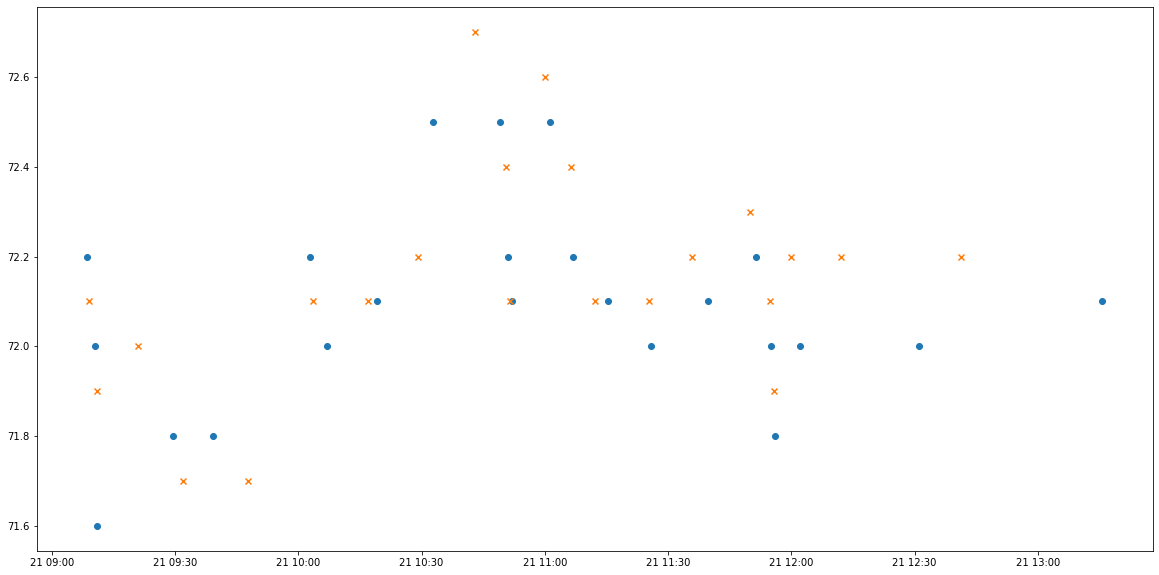

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004507
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.0
# sell:  11   # buy:  5
bid1_q:  2   bid2_q:  3
進場時間： 90125900 
  sell price at  72.0
stop profit
出場時間： 90128726
buy at 71.9
get 0.09999999999999432
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.0
# sell:  20   # buy:  6
bid1_q:  4   bid2_q:  7
進場時間： 90303122 
  sell price at  72.0
stop profit
出場時間： 90530039
buy at 71.8
get 0.20000000000000284
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.3
# sell:  40   # buy:  6
bid1_q:  7   bid2_q:  15
進場時間： 90853284 
  sell price at  72.3
time out
出場時間： 91853955
buy at 72.4
get -0.10000000000000853
------------------

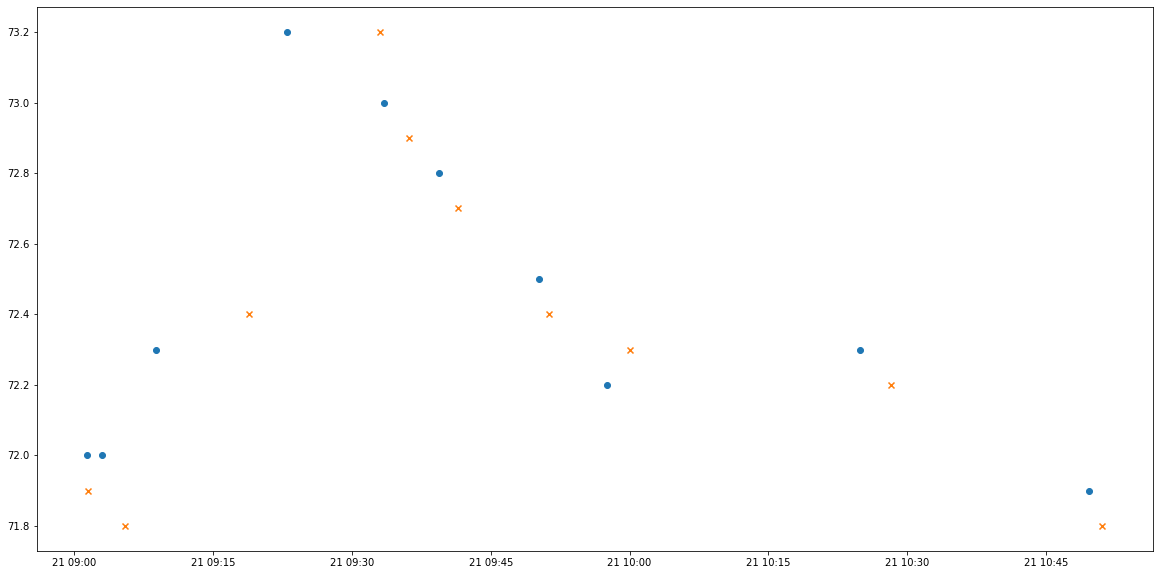

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005633
daily_low  71.3
daily_low * theta 71.6565
bid1_p:  71.7
# sell:  43   # buy:  19
bid1_q:  16   bid2_q:  41
進場時間： 90452845 
  sell price at  71.7
stop profit
出場時間： 90748600
buy at 71.6
get 0.10000000000000853
------------------------------
daily_low  71.2
daily_low * theta 71.556
bid1_p:  71.6
# sell:  29   # buy:  9
bid1_q:  9   bid2_q:  29
進場時間： 93420449 
  sell price at  71.6
stop profit
出場時間： 93536162
buy at 71.5
get 0.09999999999999432
------------------------------
daily_low  71.2
daily_low * theta 71.556
bid1_p:  71.7
# sell:  33   # buy:  8
bid1_q:  2   bid2_q:  23
進場時間： 94424104 
  sell price at  71.7
stop profit
出場時間： 95404363
buy at 71.6
get 0.10000000000000853
------------------------------
daily_low  70

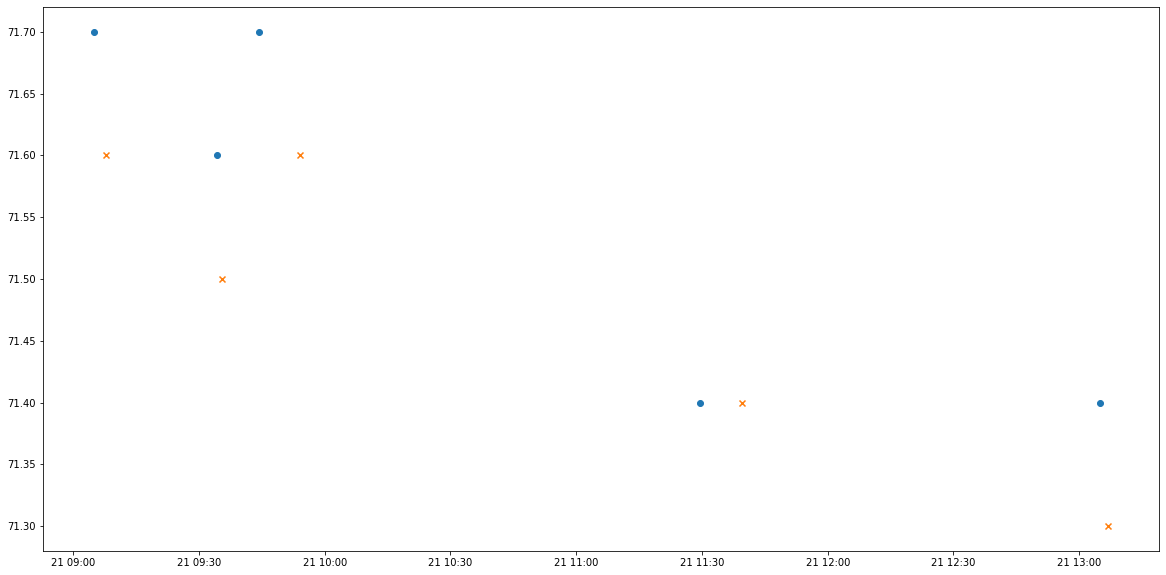

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90006487
daily_low  71.2
daily_low * theta 71.556
bid1_p:  71.6
# sell:  67   # buy:  13
bid1_q:  16   bid2_q:  3
進場時間： 90301955 
  sell price at  71.6
time out
出場時間： 91303371
buy at 72.1
get -0.5
------------------------------
daily_low  71.2
daily_low * theta 71.556
bid1_p:  72.0
# sell:  118   # buy:  0
bid1_q:  121   bid2_q:  4
進場時間： 91859366 
  sell price at  72.0
stop profit
出場時間： 91958597
buy at 71.9
get 0.09999999999999432
------------------------------
daily_low  71.2
daily_low * theta 71.556
bid1_p:  71.8
# sell:  74   # buy:  4
bid1_q:  48   bid2_q:  32
進場時間： 92040794 
  sell price at  71.8
time out
出場時間： 93041526
buy at 72.1
get -0.29999999999999716
------------------------------
daily_low  71.2
daily_low * thet

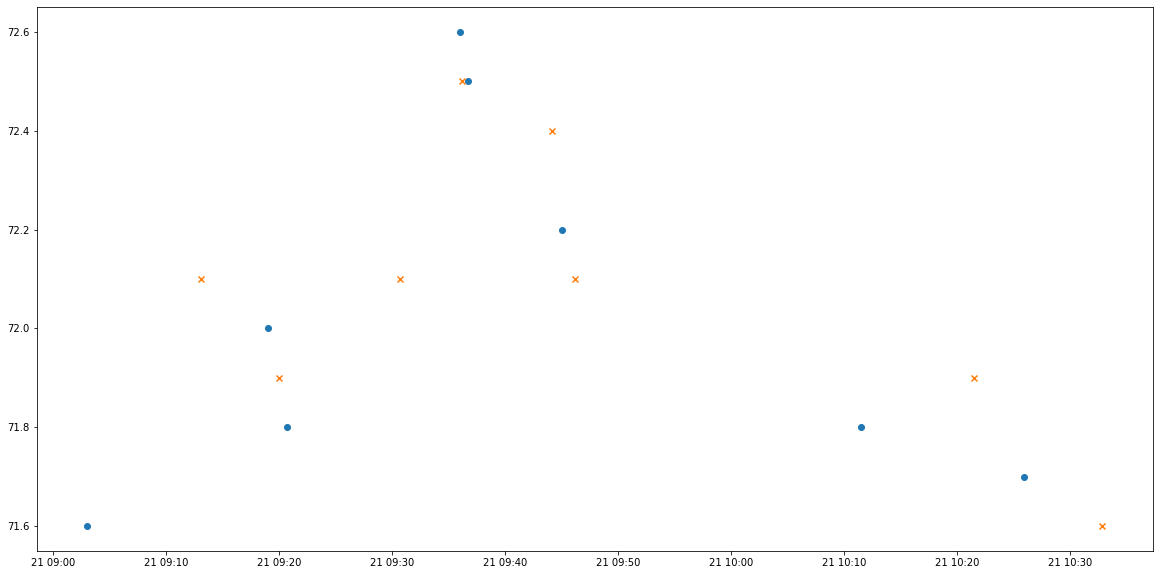

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004779
daily_low  70.7
daily_low * theta 71.0535
bid1_p:  71.3
# sell:  24   # buy:  4
bid1_q:  8   bid2_q:  6
進場時間： 90248664 
  sell price at  71.3
stop profit
出場時間： 90306627
buy at 71.2
get 0.09999999999999432
------------------------------
daily_low  70.7
daily_low * theta 71.0535
bid1_p:  71.2
# sell:  20   # buy:  9
bid1_q:  6   bid2_q:  20
進場時間： 90530778 
  sell price at  71.2
stop loss
出場時間： 90855991
buy at 71.9
get -0.7000000000000028
------------------------------
daily_low  70.7
daily_low * theta 71.0535
bid1_p:  72.3
# sell:  11   # buy:  5
bid1_q:  3   bid2_q:  2
進場時間： 90920001 
  sell price at  72.3
stop profit
出場時間： 90941574
buy at 72.2
get 0.09999999999999432
------------------------------
daily_low  70.7
d

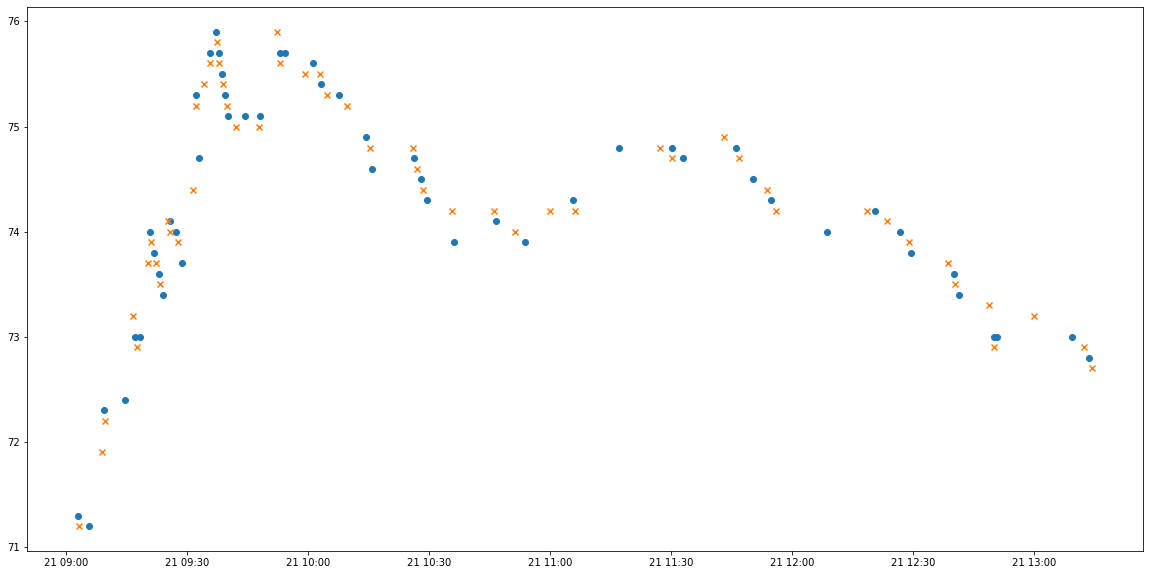

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90001631
daily_low  74.9
daily_low * theta 75.2745
bid1_p:  75.8
# sell:  47   # buy:  0
bid1_q:  13   bid2_q:  48
進場時間： 90634472 
  sell price at  75.8
stop loss
出場時間： 90953134
buy at 76.5
get -0.7000000000000028
------------------------------
daily_low  74.9
daily_low * theta 75.2745
bid1_p:  77.2
# sell:  101   # buy:  13
bid1_q:  1   bid2_q:  44
進場時間： 91100651 
  sell price at  77.2
stop profit
出場時間： 91347635
buy at 77.1
get 0.10000000000000853
------------------------------
daily_low  74.9
daily_low * theta 75.2745
bid1_p:  77.0
# sell:  61   # buy:  5
bid1_q:  34   bid2_q:  10
進場時間： 91400456 
  sell price at  77.0
stop profit
出場時間： 91410453
buy at 76.9
get 0.09999999999999432
------------------------------
daily_low  

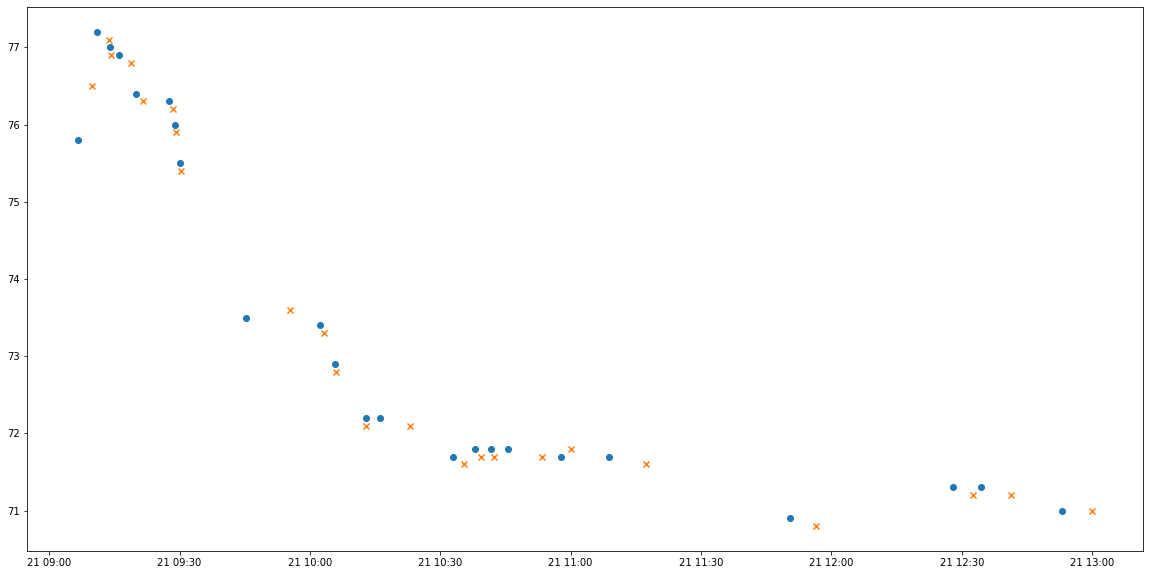

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90001651
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  71.9
# sell:  26   # buy:  6
bid1_q:  13   bid2_q:  19
進場時間： 90420194 
  sell price at  71.9
stop loss
出場時間： 90744780
buy at 72.7
get -0.7999999999999972
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.6
# sell:  26   # buy:  4
bid1_q:  5   bid2_q:  24
進場時間： 91707568 
  sell price at  72.6
stop profit
出場時間： 91746466
buy at 72.5
get 0.09999999999999432
------------------------------
daily_low  71.5
daily_low * theta 71.85749999999999
bid1_p:  72.6
# sell:  54   # buy:  8
bid1_q:  1   bid2_q:  30
進場時間： 92009424 
  sell price at  72.6
stop profit
出場時間： 92342565
buy at 72.5
get 0.09999999999999432
---------------

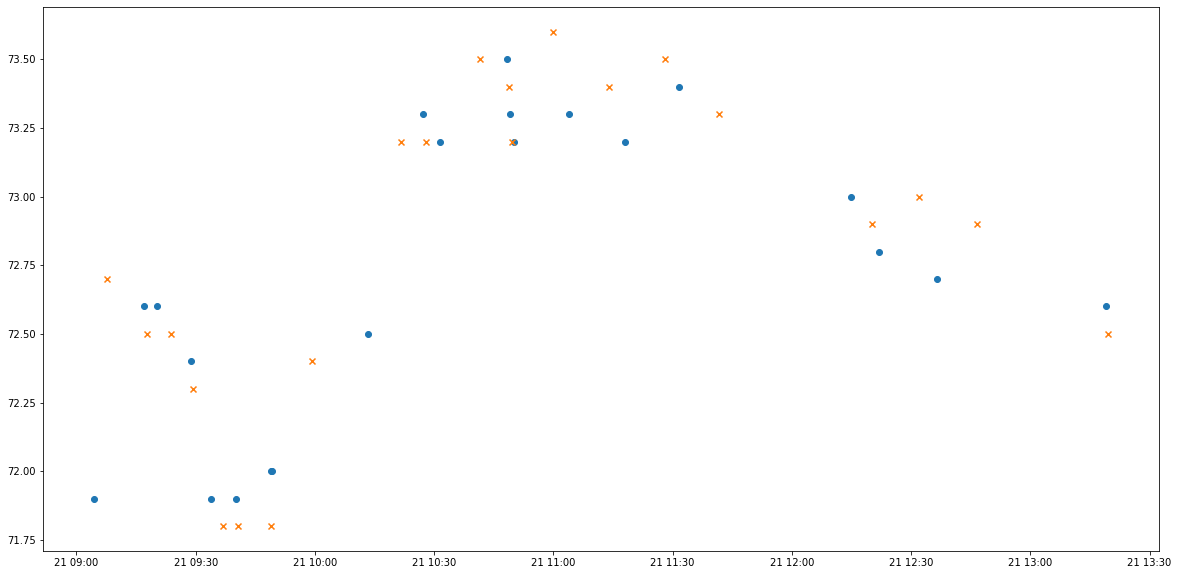

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002821
------Weird price!!!!!---------
At time:  90013015
tick_row_price 74.6
ask_1_p 74.7
bid_1_p 74.5
daily_low  74.5
daily_low * theta 74.87249999999999
bid1_p:  75.0
# sell:  70   # buy:  8
bid1_q:  50   bid2_q:  14
進場時間： 90100871 
  sell price at  75.0
stop profit
出場時間： 90208284
buy at 74.9
get 0.09999999999999432
------------------------------
daily_low  74.1
daily_low * theta 74.47049999999999
bid1_p:  74.6
# sell:  125   # buy:  15
bid1_q:  91   bid2_q:  10
進場時間： 90340881 
  sell price at  74.6
stop profit
出場時間： 90341007
buy at 74.4
get 0.19999999999998863
------------------------------
daily_low  74.1
daily_low * theta 74.47049999999999
bid1_p:  74.5
# sell:  13   # buy:  4
bid1_q:  4   bid2_q:  4
進場時間： 90400126 

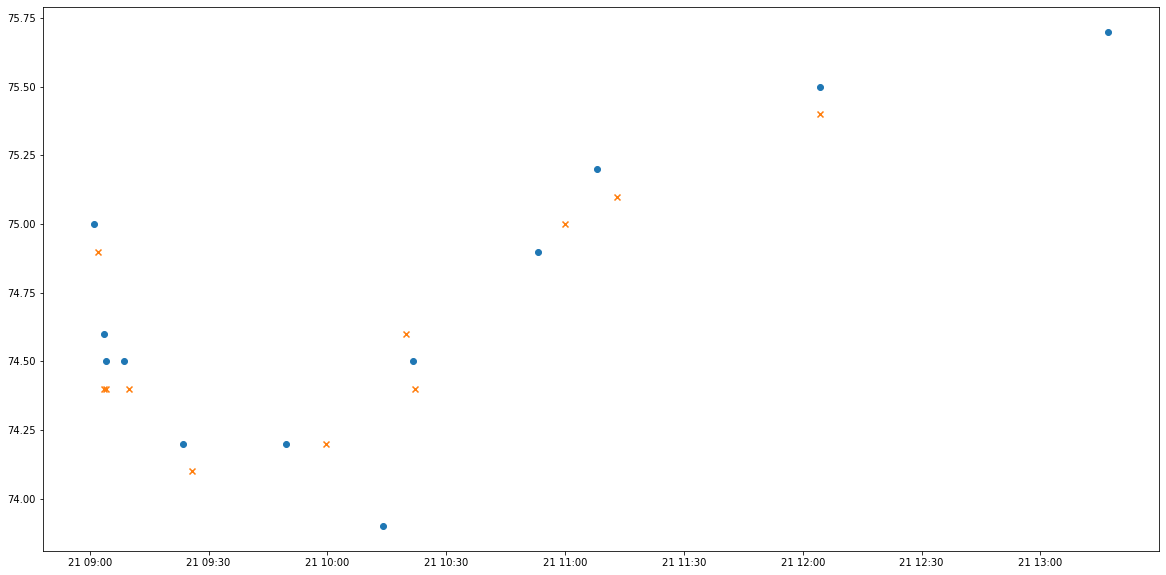

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90001851
daily_low  74.2
daily_low * theta 74.571
bid1_p:  74.6
# sell:  56   # buy:  2
bid1_q:  1   bid2_q:  1
進場時間： 90906380 
  sell price at  74.6
stop profit
出場時間： 90920924
buy at 74.5
get 0.09999999999999432
------------------------------
daily_low  74.2
daily_low * theta 74.571
bid1_p:  74.8
# sell:  14   # buy:  6
bid1_q:  1   bid2_q:  15
進場時間： 91437125 
  sell price at  74.8
stop profit
出場時間： 92050375
buy at 74.7
get 0.09999999999999432
------------------------------
daily_low  74.2
daily_low * theta 74.571
bid1_p:  74.8
# sell:  53   # buy:  2
bid1_q:  1   bid2_q:  68
進場時間： 92754207 
  sell price at  74.8
stop loss
出場時間： 93344123
buy at 75.6
get -0.7999999999999972
------------------------------
daily_low  74.2
dai

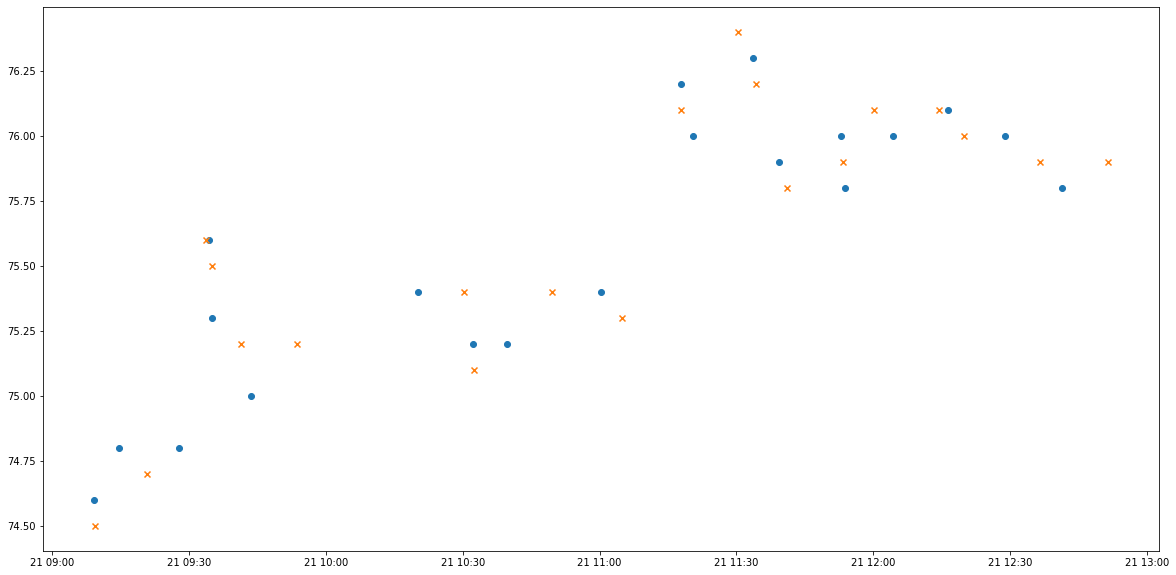

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002797
daily_low  72.8
daily_low * theta 73.16399999999999
bid1_p:  73.4
# sell:  26   # buy:  11
bid1_q:  2   bid2_q:  31
進場時間： 90303738 
  sell price at  73.4
stop profit
出場時間： 90314337
buy at 73.3
get 0.10000000000000853
------------------------------
daily_low  72.8
daily_low * theta 73.16399999999999
bid1_p:  73.8
# sell:  69   # buy:  11
bid1_q:  55   bid2_q:  34
進場時間： 90617749 
  sell price at  73.8
time out
出場時間： 91617775
buy at 74.0
get -0.20000000000000284
------------------------------
daily_low  72.8
daily_low * theta 73.16399999999999
bid1_p:  73.5
# sell:  292   # buy:  16
bid1_q:  265   bid2_q:  97
進場時間： 91905015 
  sell price at  73.5
stop profit
出場時間： 91905015
buy at 73.4
get 0.09999999999999432
---------

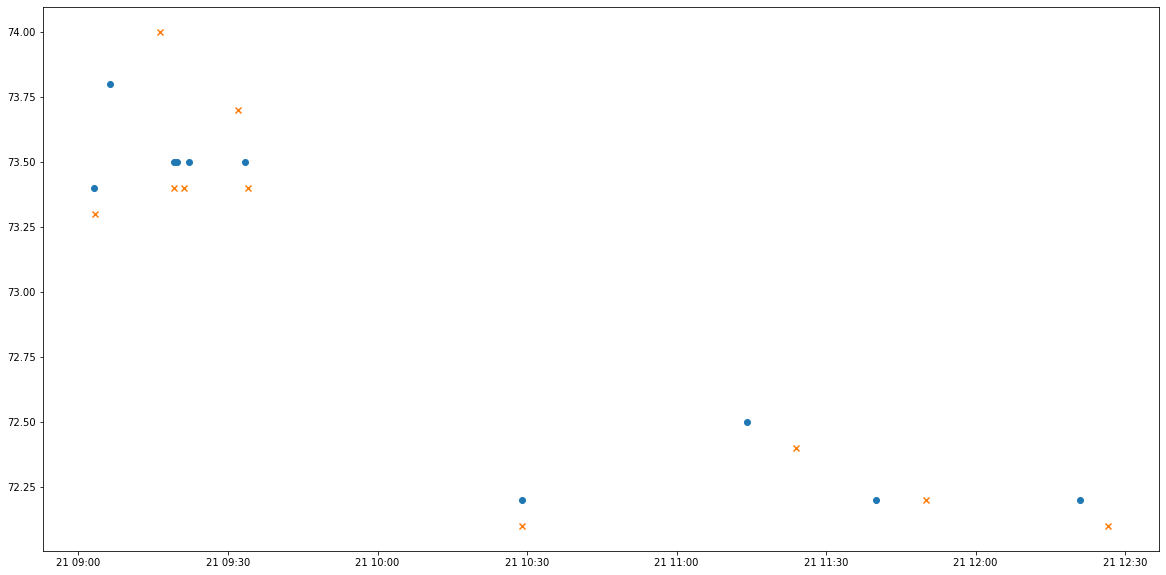

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90000944
daily_low  71.7
daily_low * theta 72.0585
bid1_p:  72.2
# sell:  29   # buy:  14
bid1_q:  1   bid2_q:  7
進場時間： 90118639 
  sell price at  72.2
stop profit
出場時間： 90133716
buy at 72.1
get 0.10000000000000853
------------------------------
daily_low  71.7
daily_low * theta 72.0585
bid1_p:  72.1
# sell:  33   # buy:  5
bid1_q:  5   bid2_q:  14
進場時間： 90345972 
  sell price at  72.1
stop profit
出場時間： 90423710
buy at 72.0
get 0.09999999999999432
------------------------------
----------Result Report--------------
profit:  0.20000000000000284


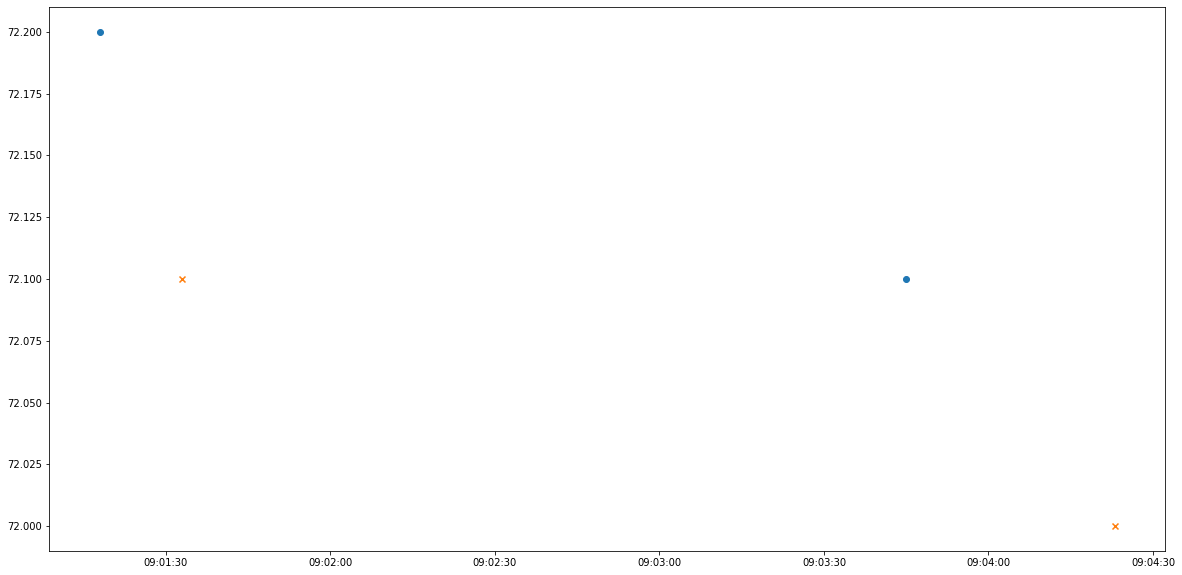

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90001245
----------Result Report--------------
profit:  0


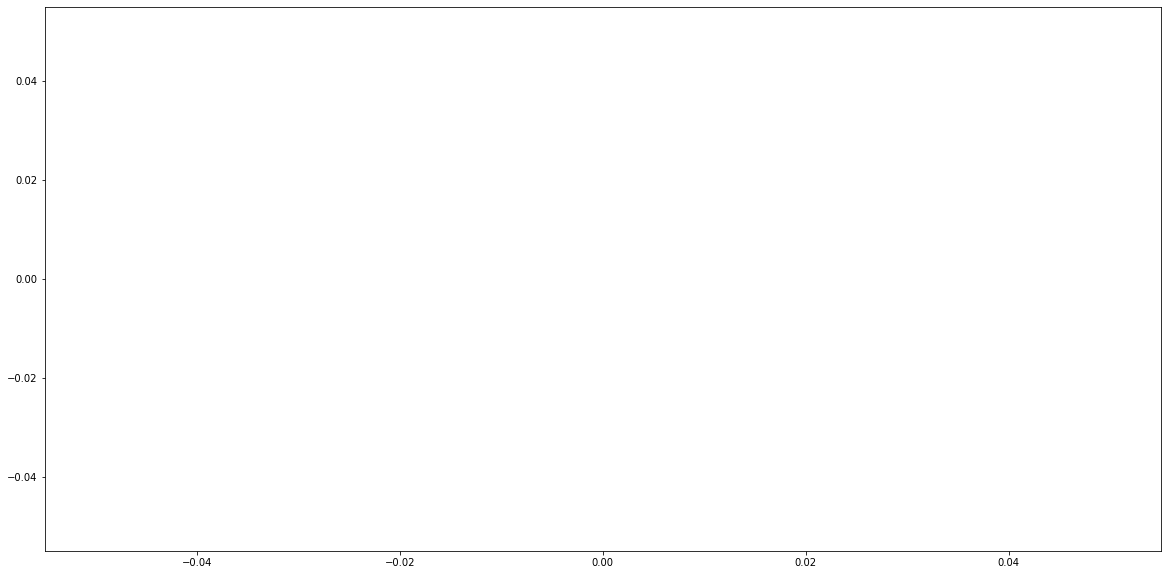

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002659
daily_low  70.3
daily_low * theta 70.65149999999998
bid1_p:  70.8
# sell:  33   # buy:  3
bid1_q:  1   bid2_q:  35
進場時間： 103445434 
  sell price at  70.8
time out
出場時間： 104446688
buy at 70.8
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


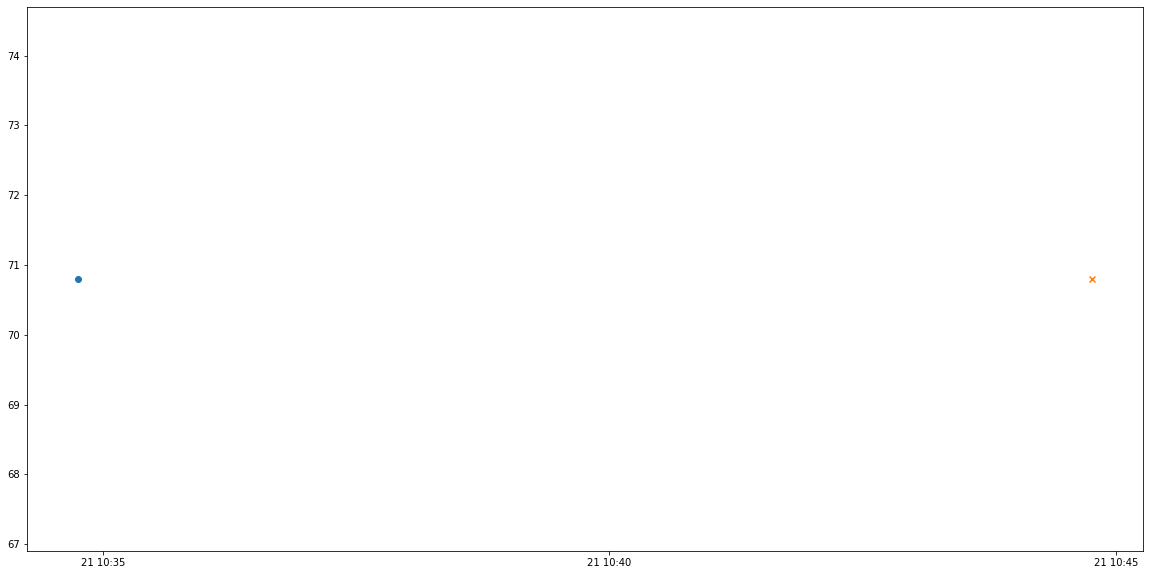

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90003835
----------Result Report--------------
profit:  0


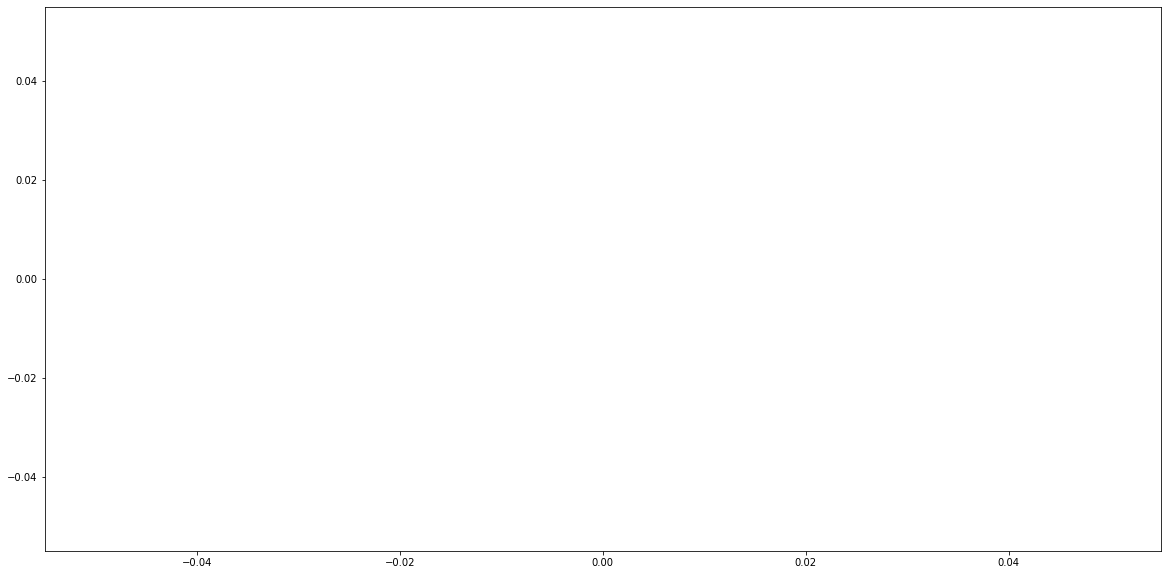

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004523
daily_low  70.2
daily_low * theta 70.551
bid1_p:  70.6
# sell:  52   # buy:  7
bid1_q:  7   bid2_q:  18
進場時間： 93231044 
  sell price at  70.6
time out
出場時間： 94231218
buy at 70.7
get -0.10000000000000853
------------------------------
daily_low  70.2
daily_low * theta 70.551
bid1_p:  71.0
# sell:  55   # buy:  10
bid1_q:  21   bid2_q:  21
進場時間： 100810276 
  sell price at  71.0
time out
出場時間： 101812606
buy at 71.0
get 0.0
------------------------------
----------Result Report--------------
profit:  -0.10000000000000853


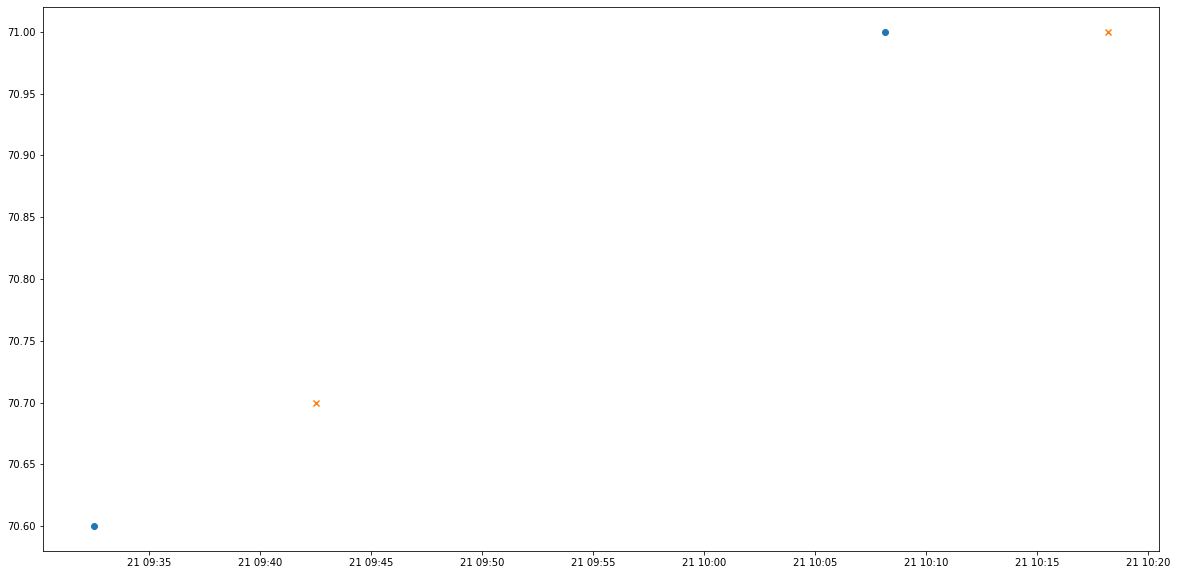

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005651
----------Result Report--------------
profit:  0


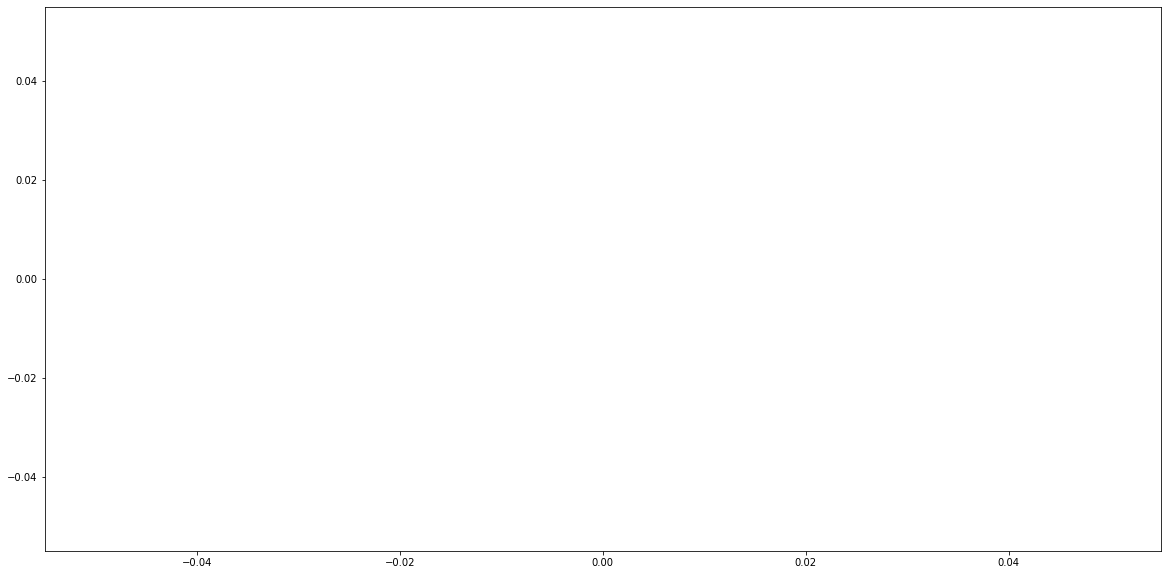

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005494
daily_low  70.1
daily_low * theta 70.45049999999999
bid1_p:  70.6
# sell:  45   # buy:  8
bid1_q:  17   bid2_q:  24
進場時間： 91054512 
  sell price at  70.6
stop profit
出場時間： 91358876
buy at 70.5
get 0.09999999999999432
------------------------------
daily_low  70.1
daily_low * theta 70.45049999999999
bid1_p:  70.5
# sell:  79   # buy:  5
bid1_q:  69   bid2_q:  35
進場時間： 92002305 
  sell price at  70.5
stop profit
出場時間： 92204420
buy at 70.4
get 0.09999999999999432
------------------------------
----------Result Report--------------
profit:  0.19999999999998863


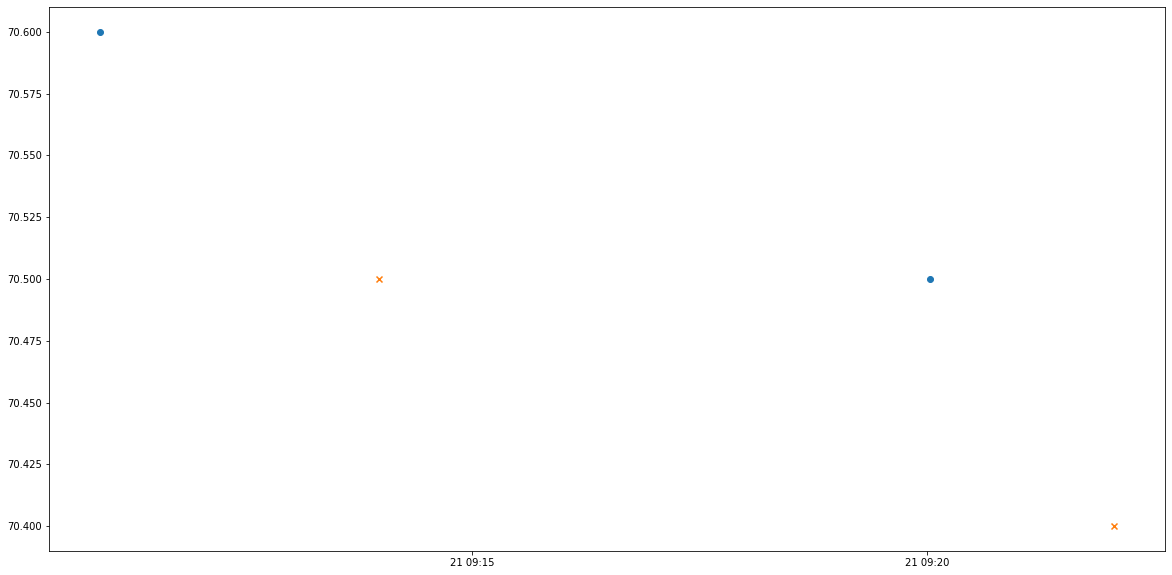

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90003421
----------Result Report--------------
profit:  0


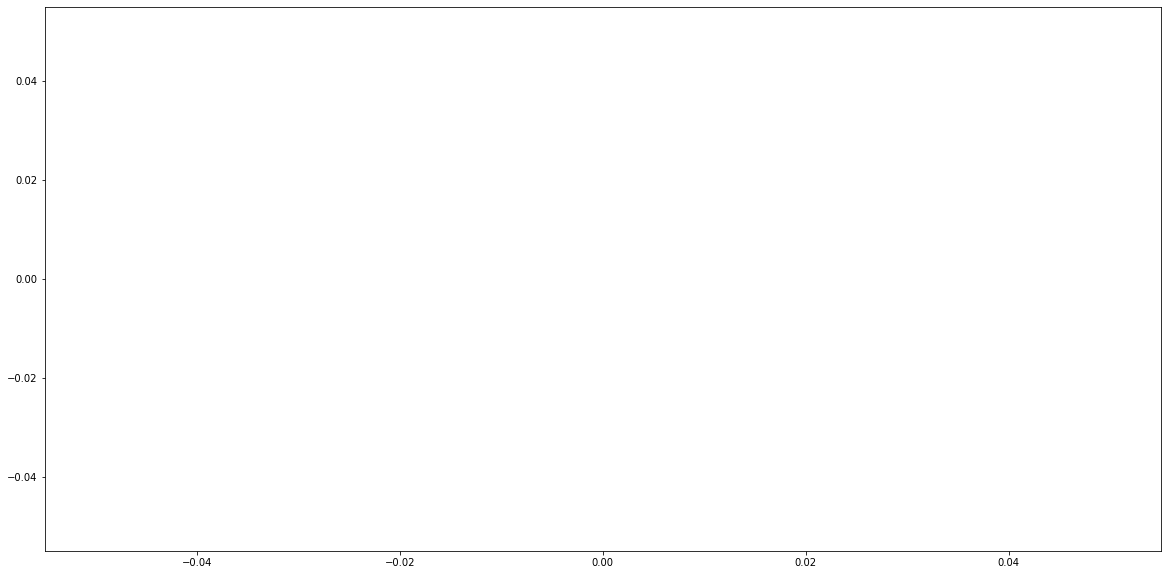

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004545
----------Result Report--------------
profit:  0


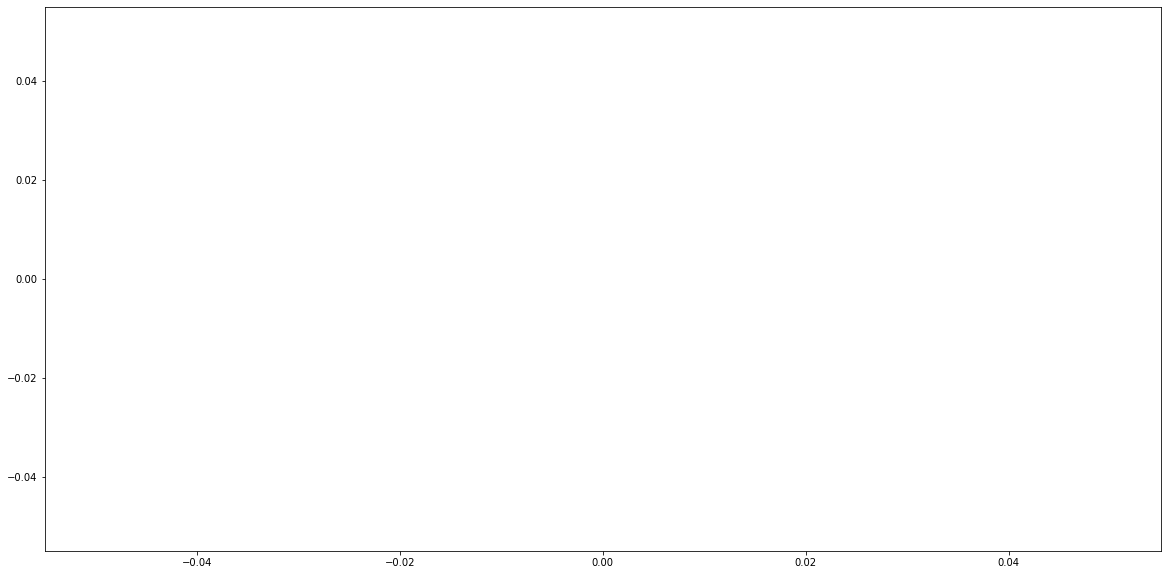

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90003519
daily_low  66.9
daily_low * theta 67.2345
bid1_p:  67.3
# sell:  56   # buy:  16
bid1_q:  36   bid2_q:  36
進場時間： 91018212 
  sell price at  67.3
stop profit
出場時間： 91251798
buy at 67.2
get 0.09999999999999432
------------------------------
daily_low  66.6
daily_low * theta 66.93299999999999
bid1_p:  67.9
# sell:  61   # buy:  5
bid1_q:  2   bid2_q:  71
進場時間： 94911899 
  sell price at  67.9
time out
出場時間： 95913789
buy at 67.9
get 0.0
------------------------------
daily_low  66.6
daily_low * theta 66.93299999999999
bid1_p:  68.2
# sell:  13   # buy:  5
bid1_q:  9   bid2_q:  8
進場時間： 100212693 
  sell price at  68.2
stop profit
出場時間： 101022459
buy at 68.1
get 0.10000000000000853
------------------------------
---------

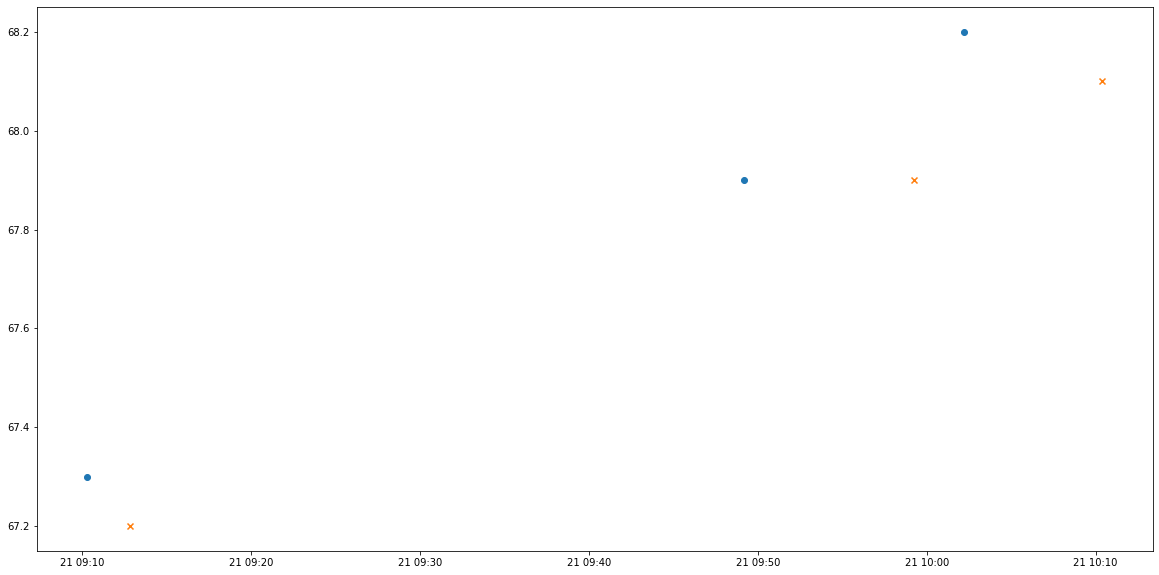

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90004846
daily_low  67.5
daily_low * theta 67.83749999999999
bid1_p:  67.9
# sell:  47   # buy:  2
bid1_q:  27   bid2_q:  34
進場時間： 91354282 
  sell price at  67.9
stop profit
出場時間： 92056534
buy at 67.8
get 0.10000000000000853
------------------------------
daily_low  67.0
daily_low * theta 67.335
bid1_p:  67.6
# sell:  72   # buy:  16
bid1_q:  14   bid2_q:  68
進場時間： 95635251 
  sell price at  67.6
stop profit
出場時間： 95911994
buy at 67.5
get 0.09999999999999432
------------------------------
daily_low  67.0
daily_low * theta 67.335
bid1_p:  67.4
# sell:  119   # buy:  12
bid1_q:  51   bid2_q:  69
進場時間： 95942364 
  sell price at  67.4
time out
出場時間： 100001500
buy at 67.5
get -0.09999999999999432
------------------------------


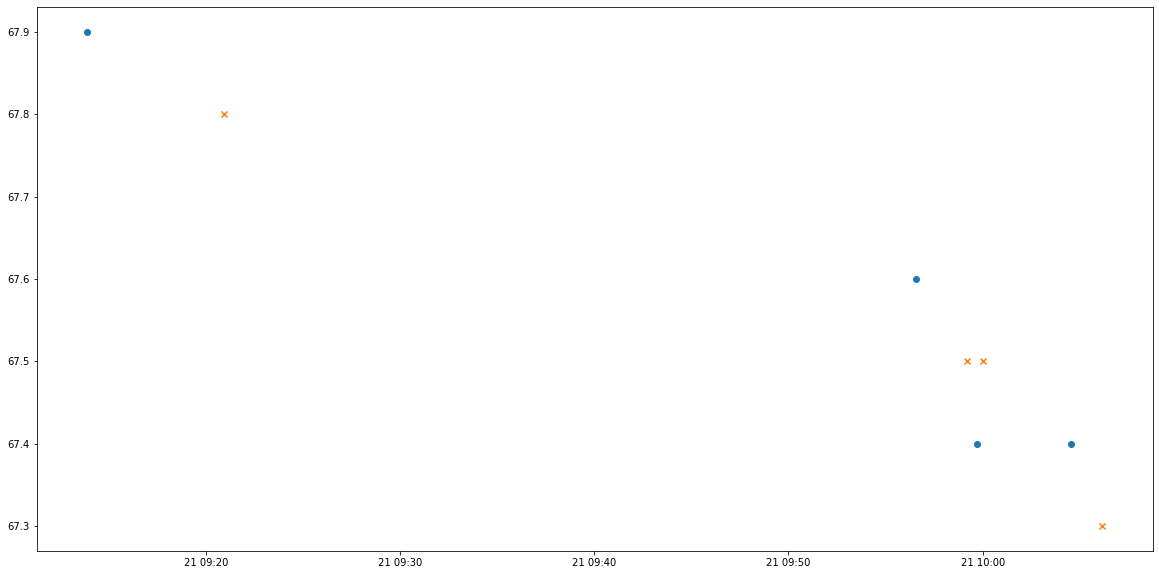

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90003395
----------Result Report--------------
profit:  0


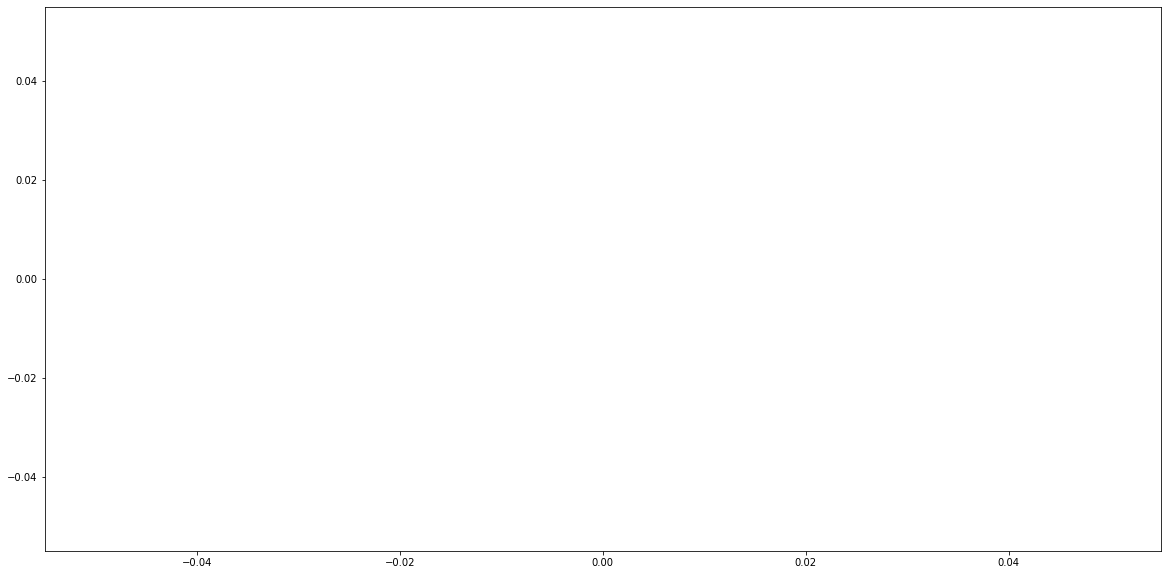

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002559
daily_low  63.1
daily_low * theta 63.415499999999994
bid1_p:  63.5
# sell:  47   # buy:  2
bid1_q:  14   bid2_q:  44
進場時間： 91329641 
  sell price at  63.5
stop profit
出場時間： 91439673
buy at 63.4
get 0.10000000000000142
------------------------------
daily_low  61.8
daily_low * theta 62.10899999999999
bid1_p:  62.7
# sell:  39   # buy:  8
bid1_q:  10   bid2_q:  34
進場時間： 93810495 
  sell price at  62.7
stop profit
出場時間： 93812634
buy at 62.6
get 0.10000000000000142
------------------------------
daily_low  61.8
daily_low * theta 62.10899999999999
bid1_p:  62.5
# sell:  12   # buy:  5
bid1_q:  2   bid2_q:  10
進場時間： 94010680 
  sell price at  62.5
stop profit
出場時間： 94041717
buy at 62.4
get 0.10000000000000142
-----------

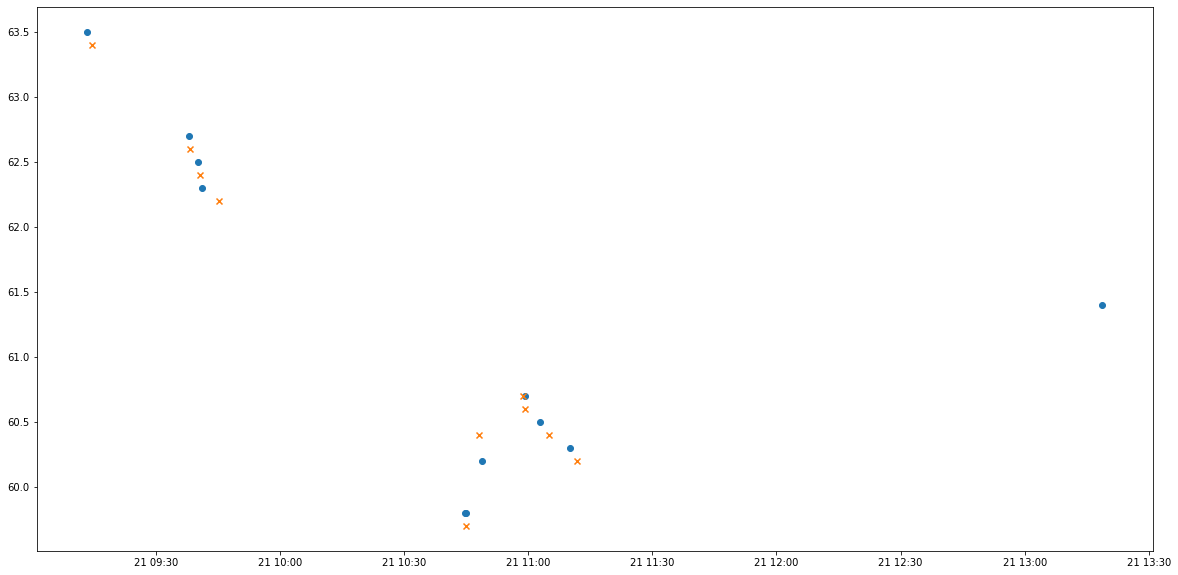

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002472
daily_low  61.4
daily_low * theta 61.706999999999994
bid1_p:  62.0
# sell:  33   # buy:  14
bid1_q:  23   bid2_q:  17
進場時間： 90411393 
  sell price at  62.0
time out
出場時間： 91414864
buy at 62.1
get -0.10000000000000142
------------------------------
daily_low  61.4
daily_low * theta 61.706999999999994
bid1_p:  61.8
# sell:  46   # buy:  19
bid1_q:  17   bid2_q:  32
進場時間： 92021581 
  sell price at  61.8
stop profit
出場時間： 92055465
buy at 61.7
get 0.09999999999999432
------------------------------
daily_low  61.0
daily_low * theta 61.30499999999999
bid1_p:  61.8
# sell:  36   # buy:  16
bid1_q:  9   bid2_q:  36
進場時間： 113729274 
  sell price at  61.8
stop profit
出場時間： 114221703
buy at 61.7
get 0.09999999999999432
-------

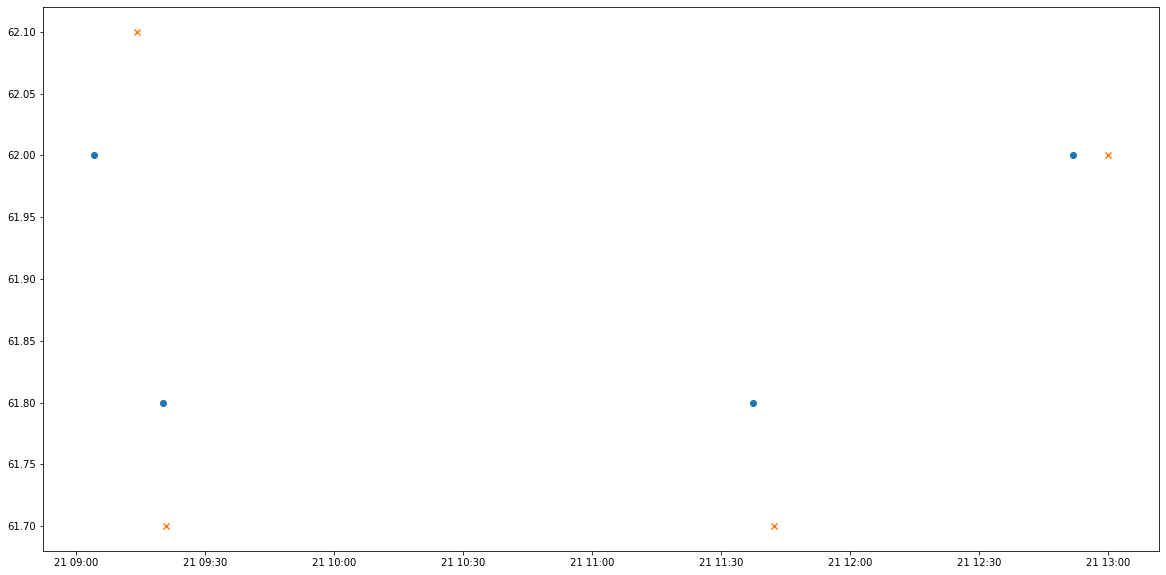

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90003234
daily_low  61.2
daily_low * theta 61.50599999999999
bid1_p:  61.9
# sell:  16   # buy:  7
bid1_q:  12   bid2_q:  6
進場時間： 93203539 
  sell price at  61.9
stop profit
出場時間： 93639009
buy at 61.8
get 0.10000000000000142
------------------------------
----------Result Report--------------
profit:  0.10000000000000142


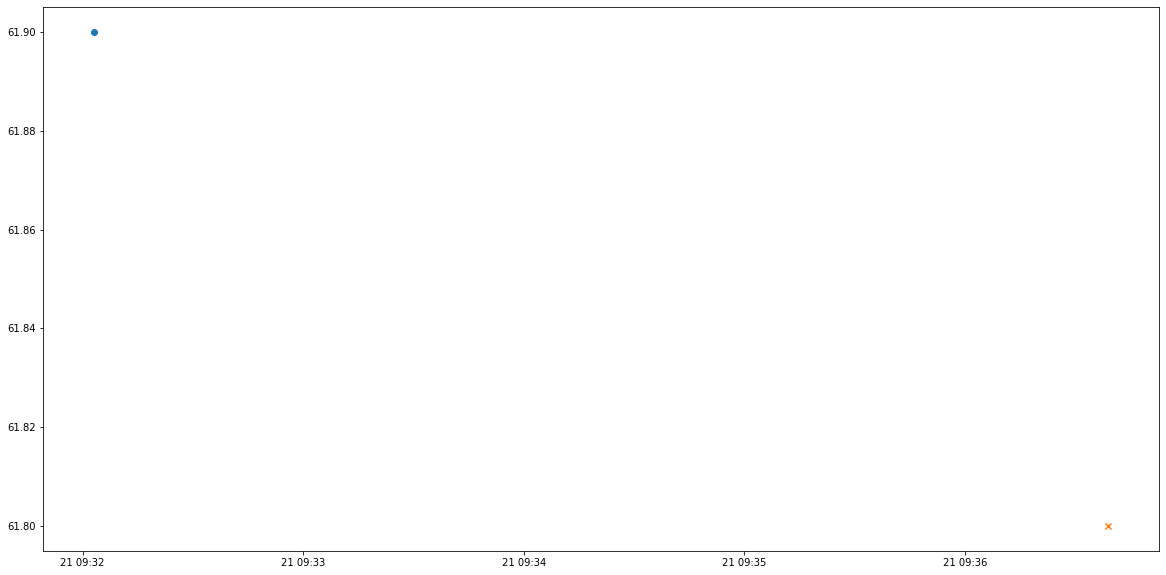

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005528
daily_low  61.6
daily_low * theta 61.907999999999994
bid1_p:  62.1
# sell:  15   # buy:  6
bid1_q:  11   bid2_q:  8
進場時間： 91657493 
  sell price at  62.1
time out
出場時間： 92704510
buy at 62.2
get -0.10000000000000142
------------------------------
daily_low  61.6
daily_low * theta 61.907999999999994
bid1_p:  62.1
# sell:  156   # buy:  3
bid1_q:  18   bid2_q:  119
進場時間： 93121077 
  sell price at  62.1
stop profit
出場時間： 93121077
buy at 62.0
get 0.10000000000000142
------------------------------
daily_low  61.6
daily_low * theta 61.907999999999994
bid1_p:  62.0
# sell:  157   # buy:  2
bid1_q:  11   bid2_q:  40
進場時間： 93151192 
  sell price at  62.0
time out
出場時間： 94156648
buy at 62.5
get -0.5
--------------------------

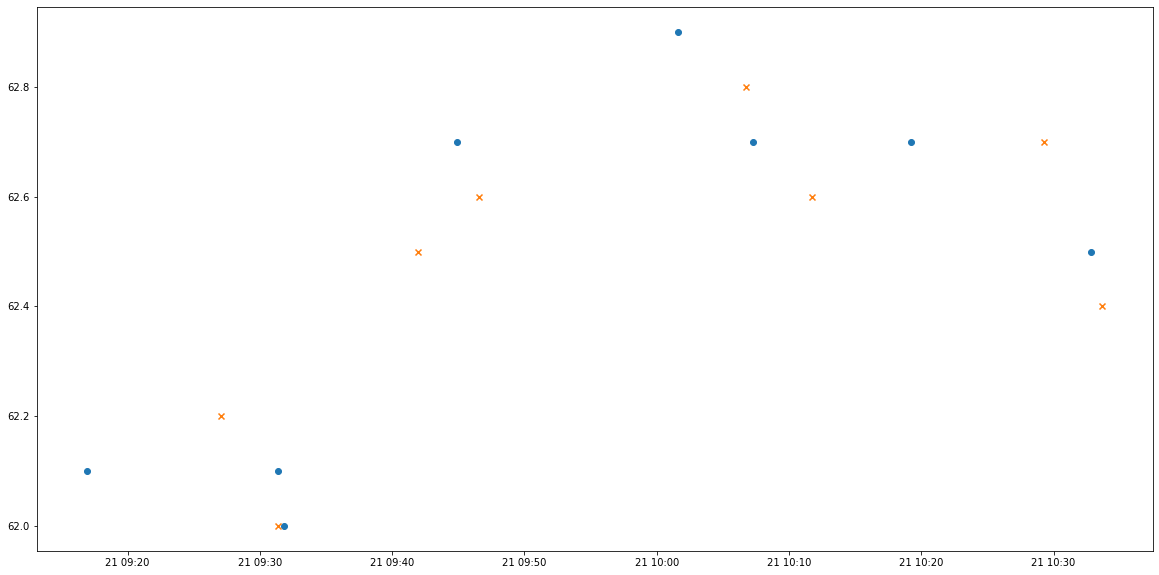

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90006395
----------Result Report--------------
profit:  0


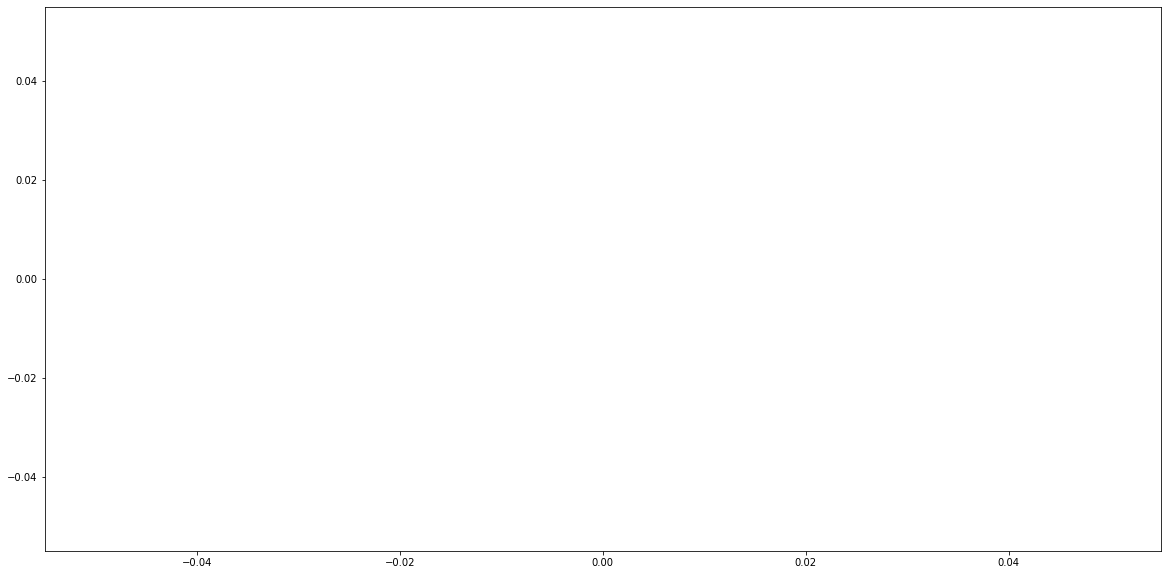

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90006644
daily_low  61.3
daily_low * theta 61.60649999999999
bid1_p:  61.7
# sell:  19   # buy:  5
bid1_q:  3   bid2_q:  21
進場時間： 114512992 
  sell price at  61.7
stop profit
出場時間： 115426526
buy at 61.6
get 0.10000000000000142
------------------------------
daily_low  61.3
daily_low * theta 61.60649999999999
bid1_p:  61.7
# sell:  32   # buy:  13
bid1_q:  4   bid2_q:  24
進場時間： 122037044 
  sell price at  61.7
stop profit
出場時間： 123013130
buy at 61.6
get 0.10000000000000142
------------------------------
----------Result Report--------------
profit:  0.20000000000000284


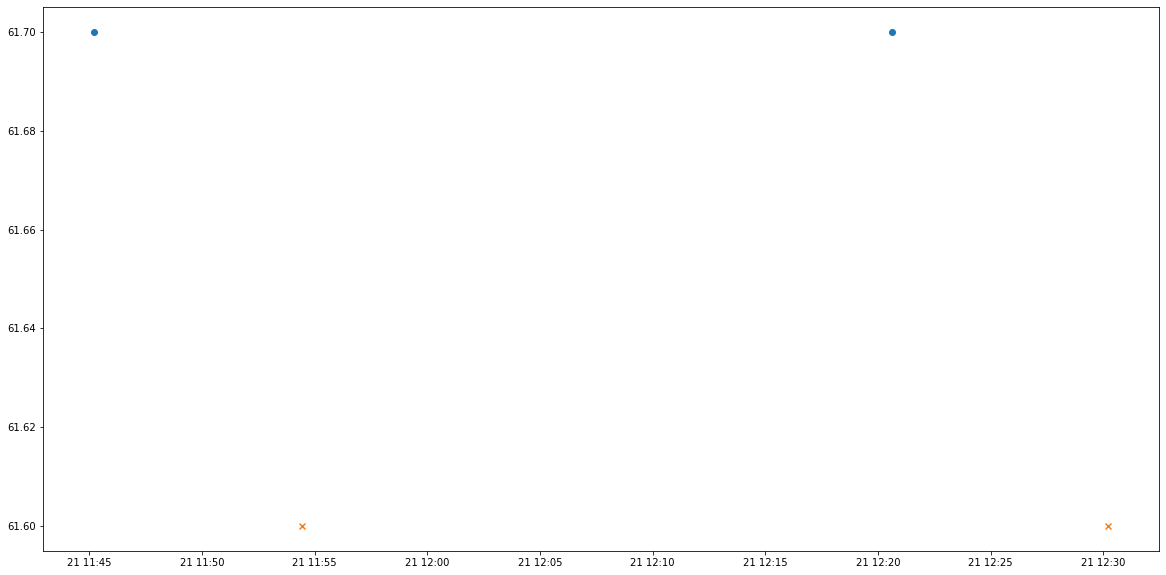

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005822
----------Result Report--------------
profit:  0


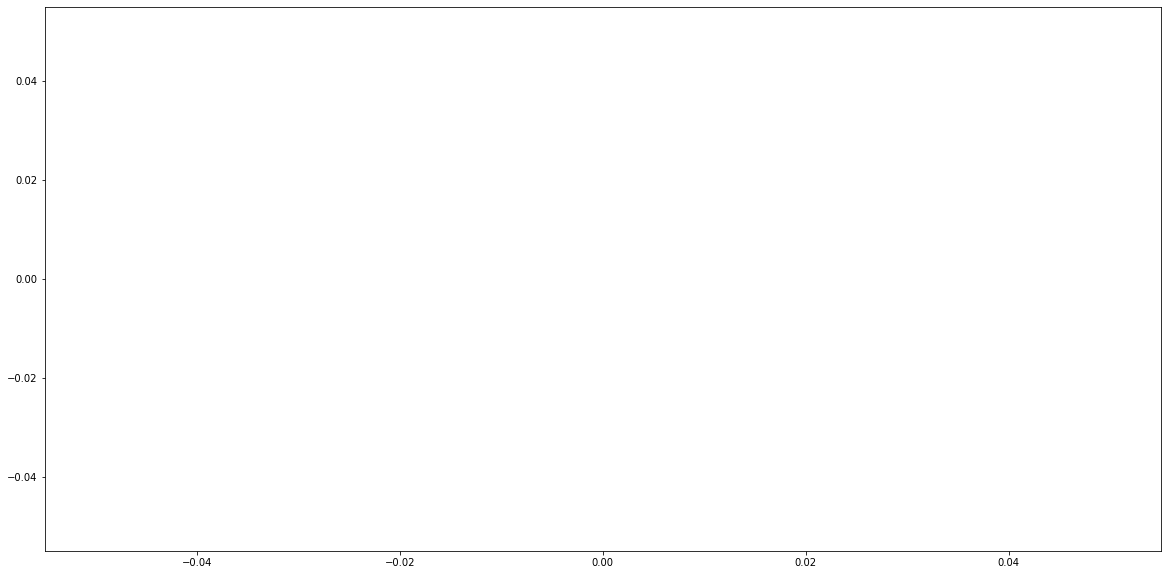

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90006386
daily_low  61.5
daily_low * theta 61.80749999999999
bid1_p:  62.2
# sell:  34   # buy:  9
bid1_q:  15   bid2_q:  26
進場時間： 91239009 
  sell price at  62.2
stop profit
出場時間： 91402817
buy at 62.1
get 0.10000000000000142
------------------------------
daily_low  61.5
daily_low * theta 61.80749999999999
bid1_p:  62.0
# sell:  48   # buy:  1
bid1_q:  18   bid2_q:  25
進場時間： 91434683 
  sell price at  62.0
time out
出場時間： 92437411
buy at 62.2
get -0.20000000000000284
------------------------------
daily_low  61.5
daily_low * theta 61.80749999999999
bid1_p:  62.1
# sell:  96   # buy:  27
bid1_q:  1   bid2_q:  116
進場時間： 92500578 
  sell price at  62.1
stop profit
出場時間： 93427513
buy at 62.0
get 0.10000000000000142
------------

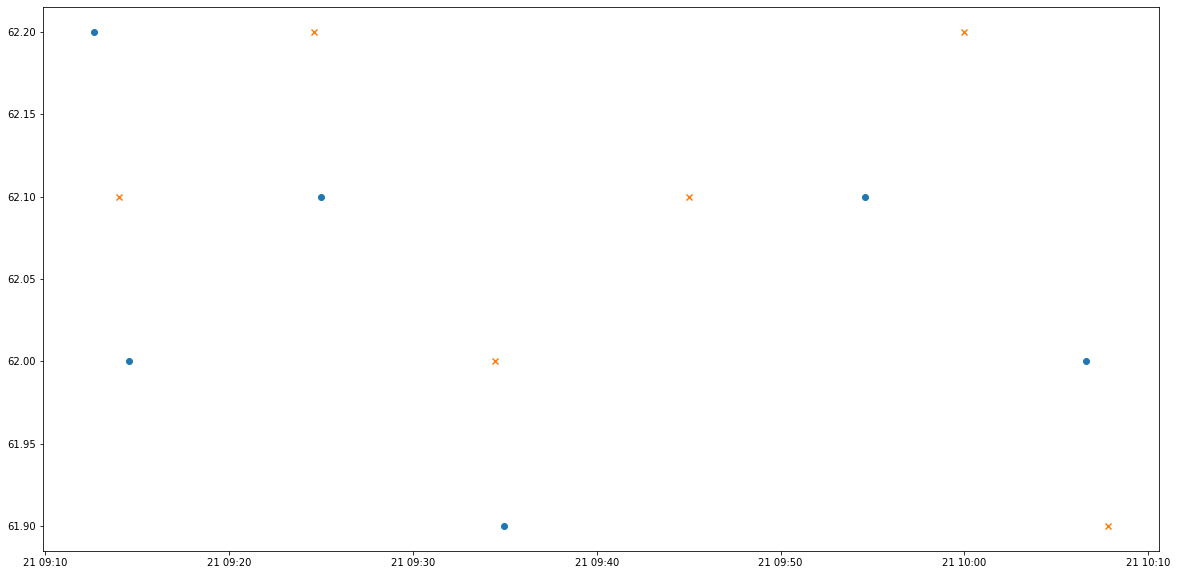

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90005099
daily_low  60.4
daily_low * theta 60.70199999999999
bid1_p:  61.3
# sell:  20   # buy:  1
bid1_q:  1   bid2_q:  24
進場時間： 100648339 
  sell price at  61.3
stop profit
出場時間： 101017997
buy at 61.2
get 0.09999999999999432
------------------------------
daily_low  60.4
daily_low * theta 60.70199999999999
bid1_p:  61.0
# sell:  66   # buy:  3
bid1_q:  8   bid2_q:  43
進場時間： 104508987 
  sell price at  61.0
time out
出場時間： 105515130
buy at 61.1
get -0.10000000000000142
------------------------------
daily_low  60.4
daily_low * theta 60.70199999999999
bid1_p:  61.2
# sell:  138   # buy:  0
bid1_q:  65   bid2_q:  100
進場時間： 114240411 
  sell price at  61.2
time out
出場時間： 115244822
buy at 61.3
get -0.09999999999999432
---------

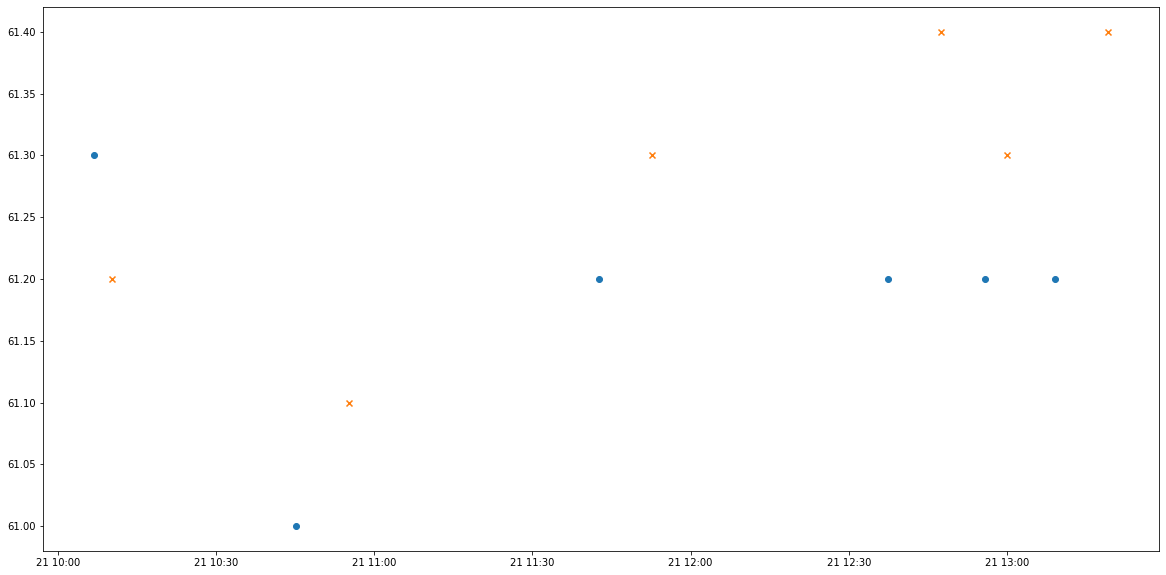

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90006636
daily_low  59.6
daily_low * theta 59.897999999999996
bid1_p:  60.2
# sell:  171   # buy:  10
bid1_q:  3   bid2_q:  159
進場時間： 131931403 
  sell price at  60.2
----------Result Report--------------
profit:  0


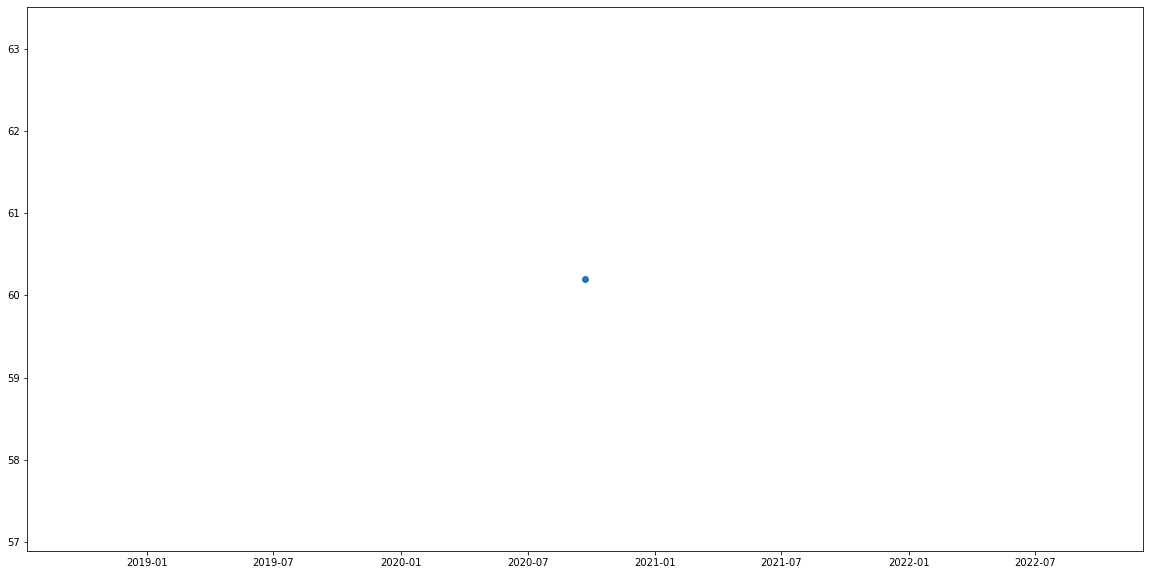

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/3711/tse_lob_3711.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/3711/tse_tick_3711.csv' mode='r' encoding='UTF-8'>
90002838
daily_low  60.2
daily_low * theta 60.501
bid1_p:  60.7
# sell:  29   # buy:  0
bid1_q:  15   bid2_q:  19
進場時間： 100830148 
  sell price at  60.7
stop profit
出場時間： 100948935
buy at 60.6
get 0.10000000000000142
------------------------------
----------Result Report--------------
profit:  0.10000000000000142


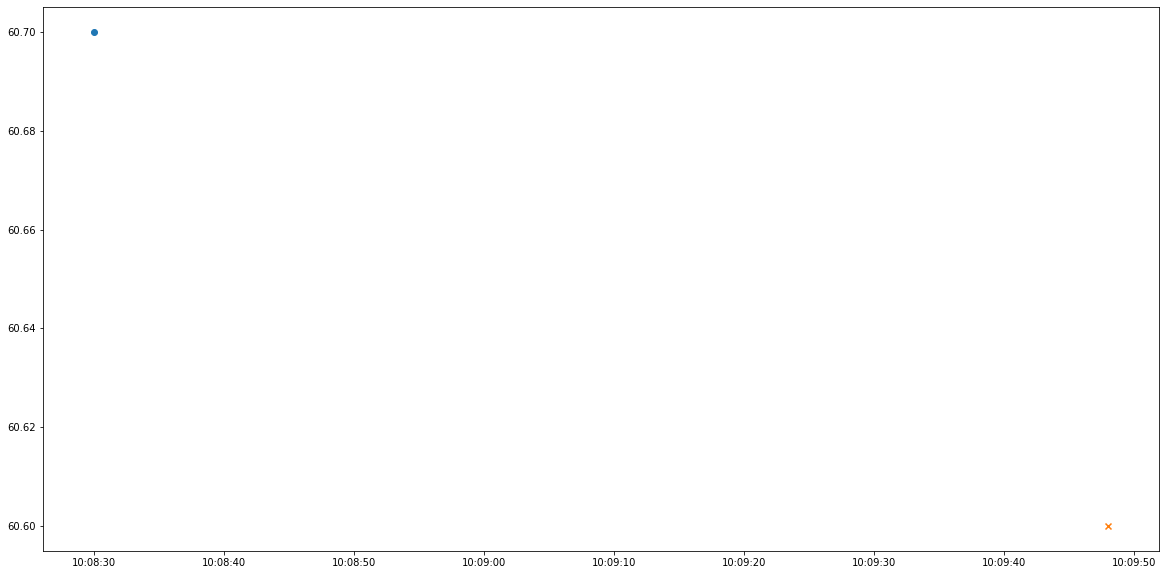

In [105]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "3711")

In [106]:
res

[(1.1000000000000227, 940.0999999999999, 0, 0),
 (-0.09999999999999432, 357.99999999999994, 0, 0),
 (-0.3999999999999915, 354.0, 0, 0),
 (0.20000000000000284, 139.0, 0, 0),
 (-0.09999999999999432, 994.4, 0, 0),
 (-0.19999999999997442, 1214.2, 0, 0),
 (0.20000000000001705, 216.0, 0, 0),
 (0.3000000000000256, 573.6, 0, 0),
 (-0.39999999999997726, 569.8, 0, 0),
 (0, 0, 0, 0),
 (-0.09999999999999432, 557.8000000000001, 0, 0),
 (-0.799999999999983, 1332.0, 0, 0),
 (-1.40000000000002, 1657.9999999999998, 0, 0),
 (0.5999999999999801, 724.1999999999999, 0, 0),
 (0.4000000000000199, 357.79999999999995, 0, 0),
 (-0.4000000000000057, 576.2, 0, 0),
 (-2.5000000000000995, 3932.800000000001, 0, 0),
 (1.0000000000000426, 1690.3, 0, 0),
 (-2.1000000000000085, 1527.3, 0, 0),
 (0.09999999999999432, 896.7, 0, 0),
 (-0.9000000000000199, 1511.3999999999999, 0, 0),
 (0.29999999999999716, 730.3000000000001, 0, 0),
 (0.20000000000000284, 144.3, 0, 0),
 (0, 0, 0, 0),
 (0.0, 70.8, 0, 0),
 (0, 0, 0, 0),
 (-0.100

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008210
----------Result Report--------------
profit:  0


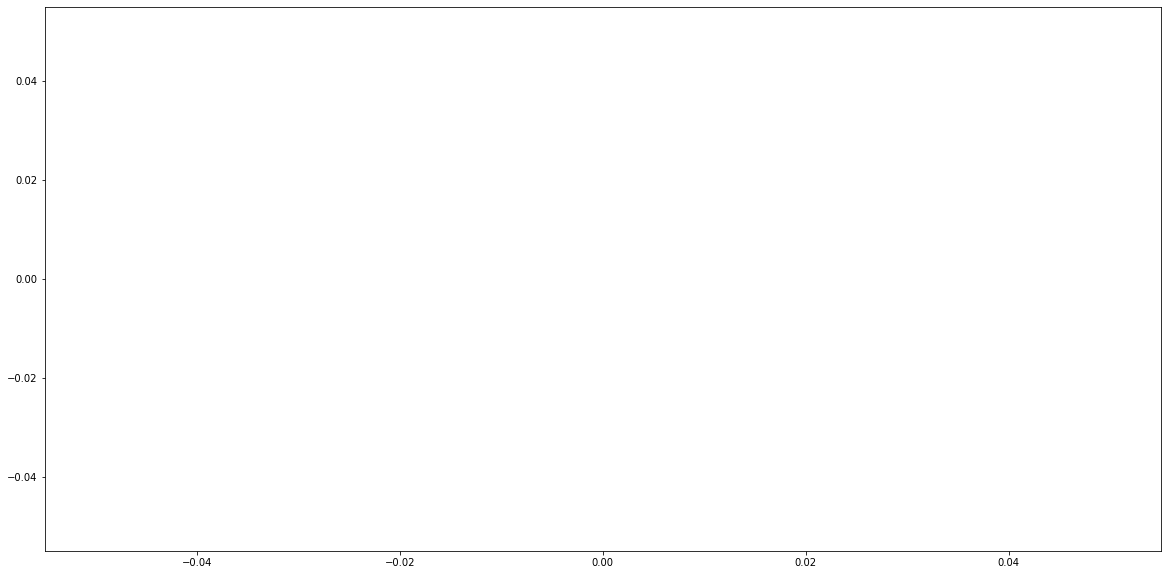

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008470
----------Result Report--------------
profit:  0


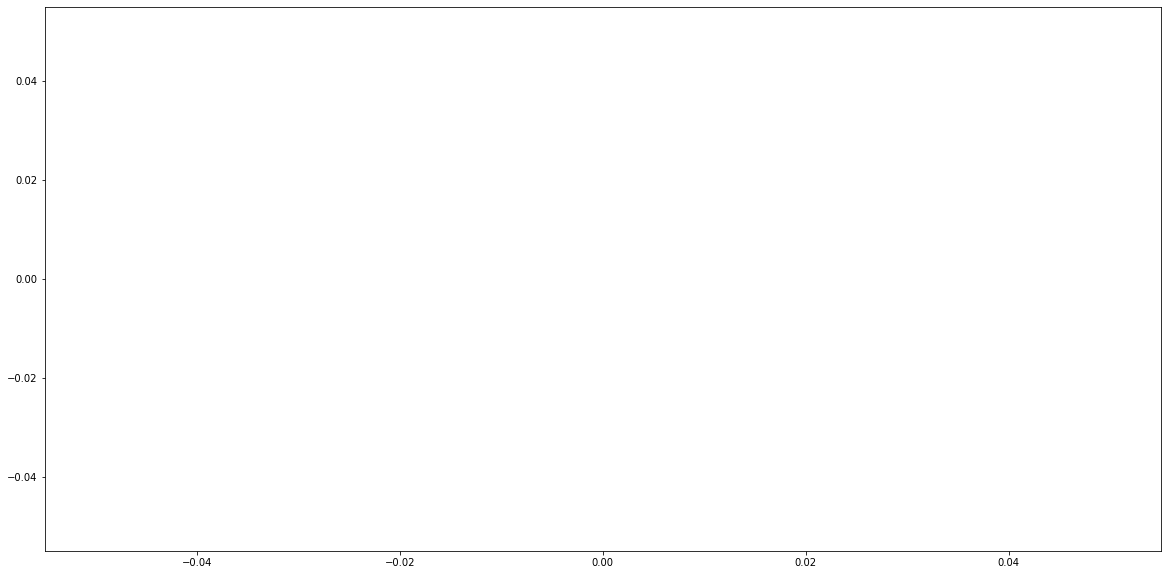

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008197
----------Result Report--------------
profit:  0


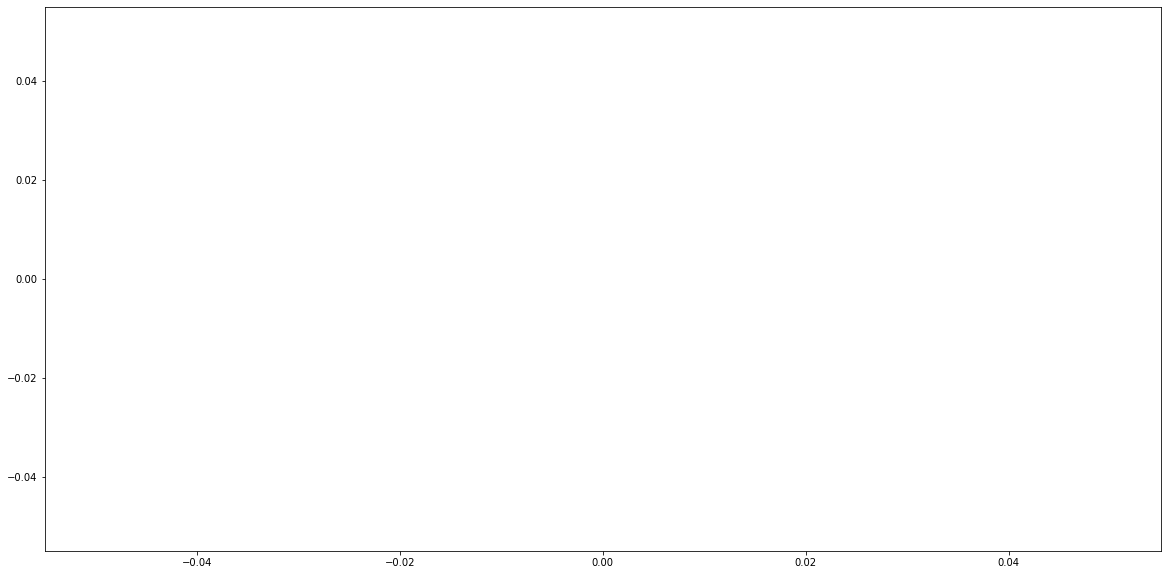

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007789
----------Result Report--------------
profit:  0


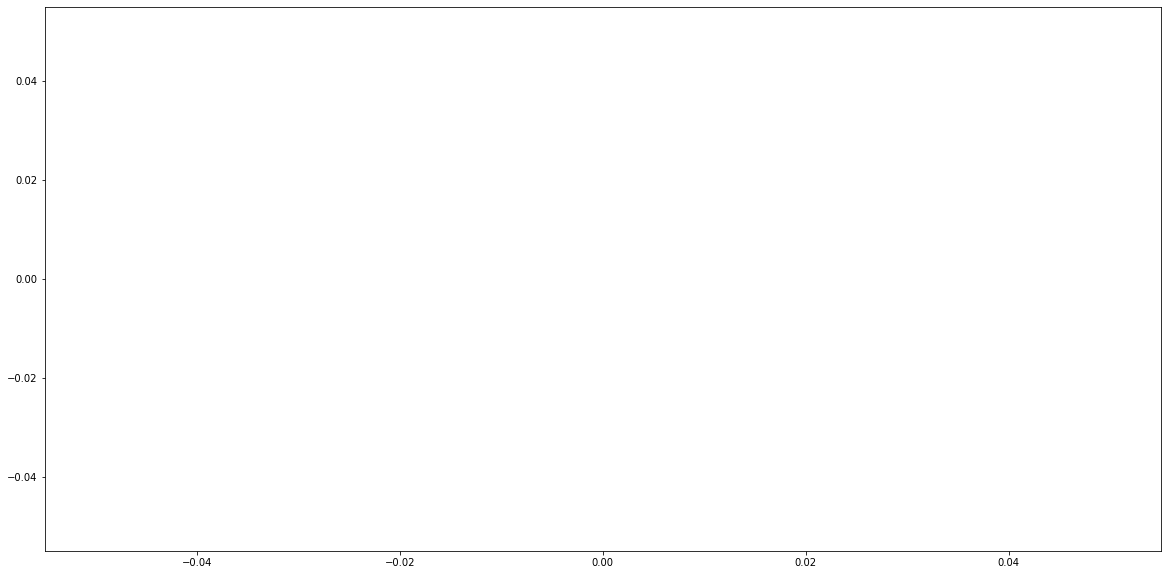

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007810
------Weird price!!!!!---------
At time:  90637577
tick_row_price 20.85
ask_1_p 20.9
bid_1_p 20.8
daily_low  20.7
daily_low * theta 20.803499999999996
bid1_p:  20.85
# sell:  191   # buy:  3
bid1_q:  5   bid2_q:  187
進場時間： 125436835 
  sell price at  20.85
time out
出場時間： 130004020
buy at 20.95
get -0.09999999999999787
------------------------------
daily_low  20.7
daily_low * theta 20.803499999999996
bid1_p:  21.0
# sell:  15   # buy:  6
bid1_q:  1   bid2_q:  7
進場時間： 131809741 
  sell price at  21.0
stop profit
出場時間： 131842818
buy at 20.95
get 0.05000000000000071
------------------------------
----------Result Report--------------
profit:  -0.04999999999999716


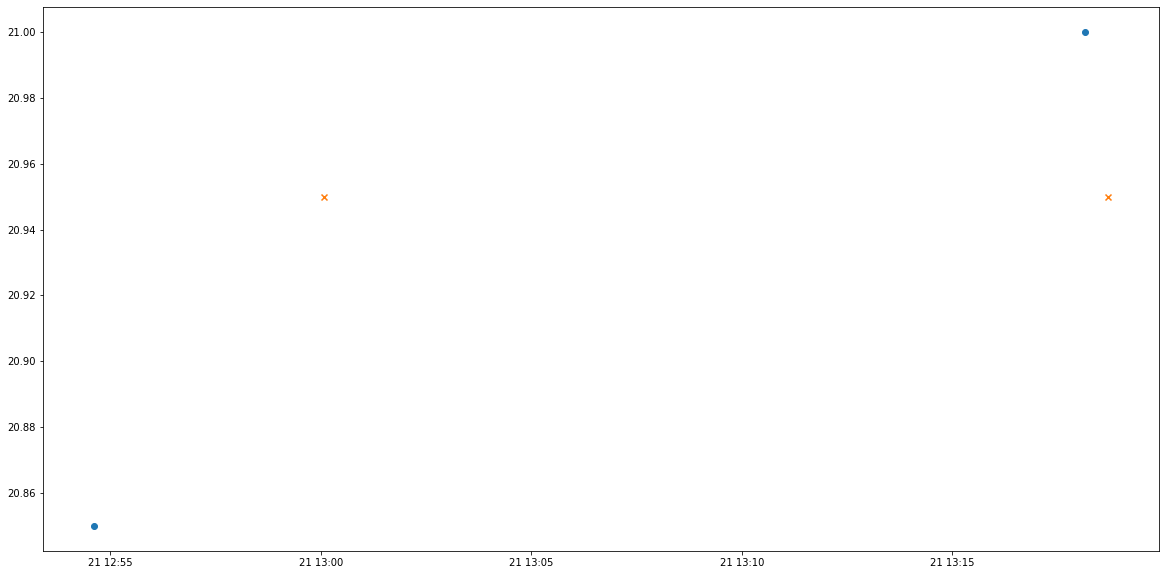

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90005887
----------Result Report--------------
profit:  0


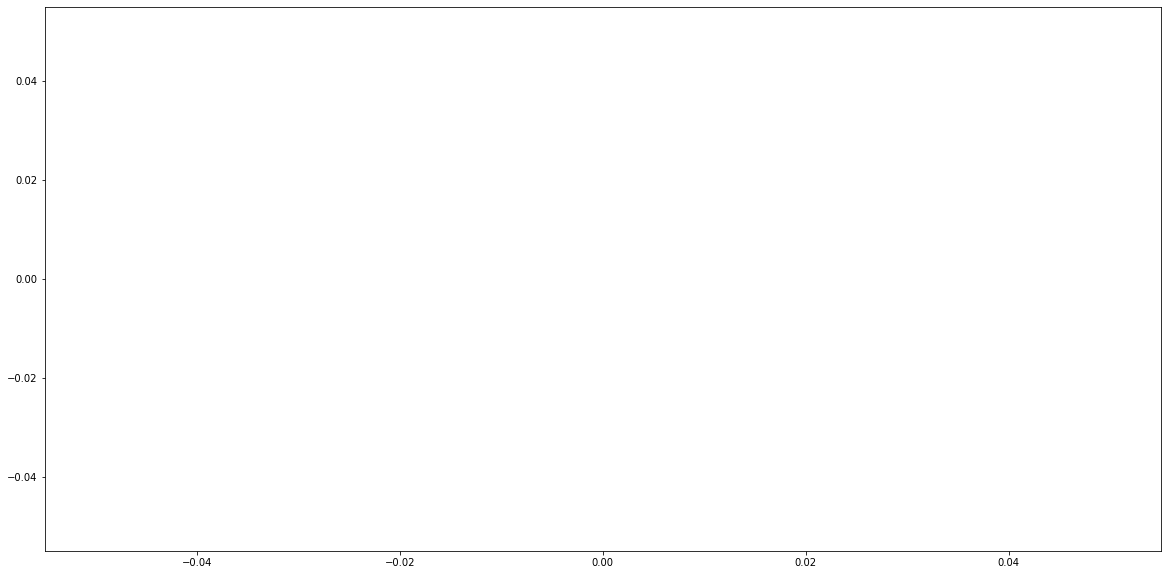

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008914
----------Result Report--------------
profit:  0


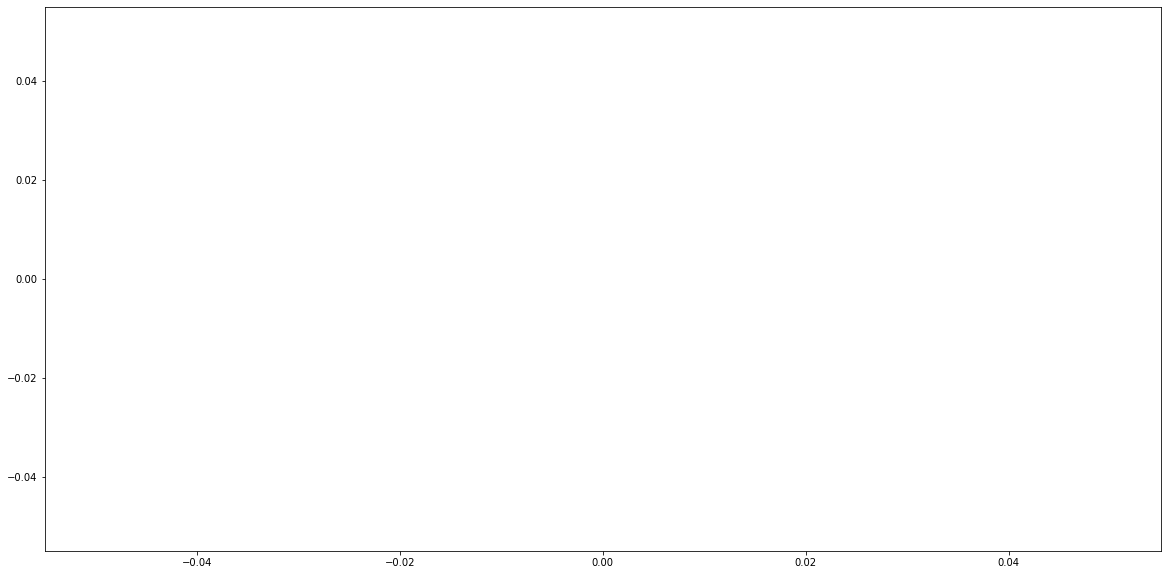

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008474
----------Result Report--------------
profit:  0


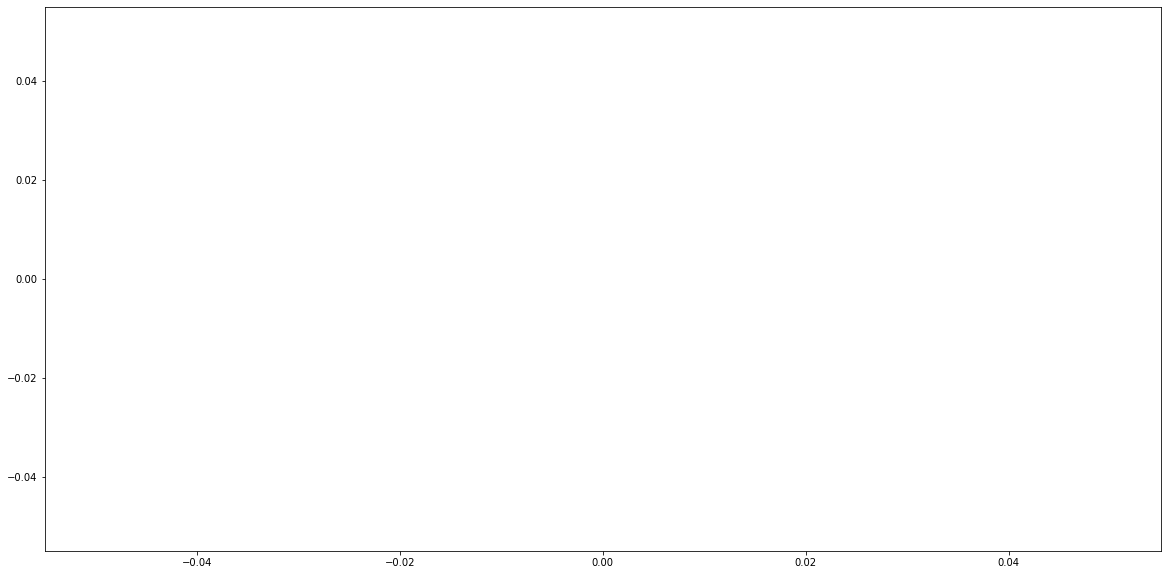

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90009420
----------Result Report--------------
profit:  0


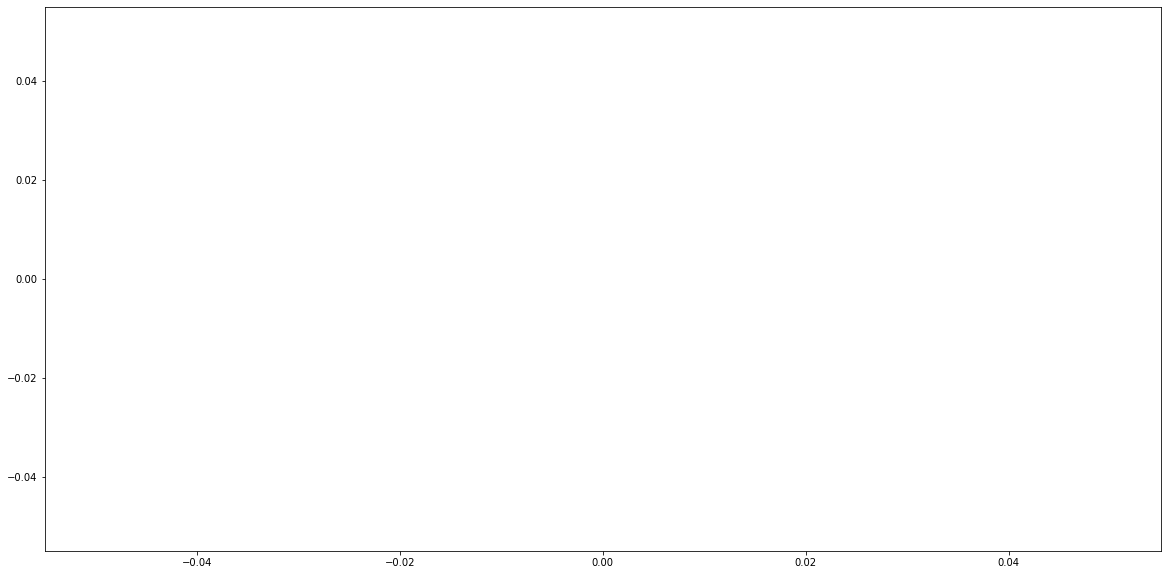

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006607
----------Result Report--------------
profit:  0


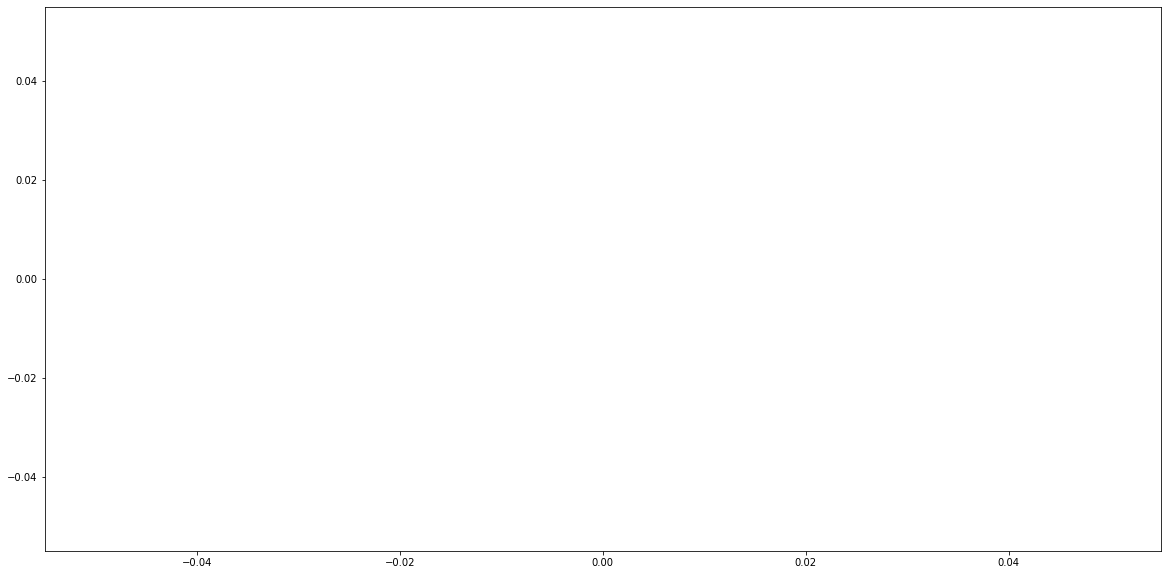

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007930
----------Result Report--------------
profit:  0


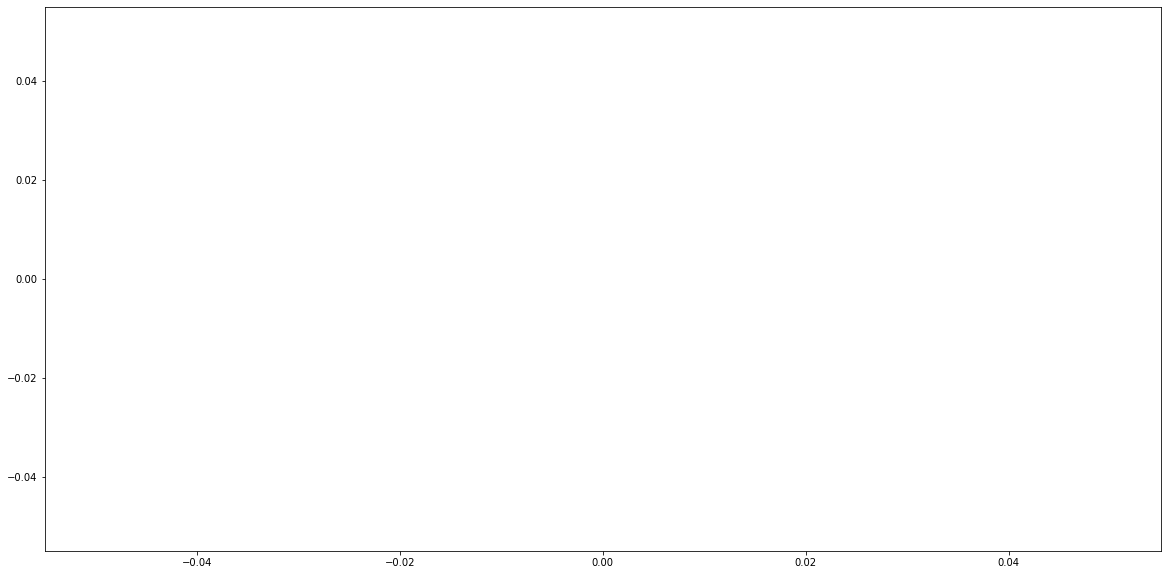

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90009273
----------Result Report--------------
profit:  0


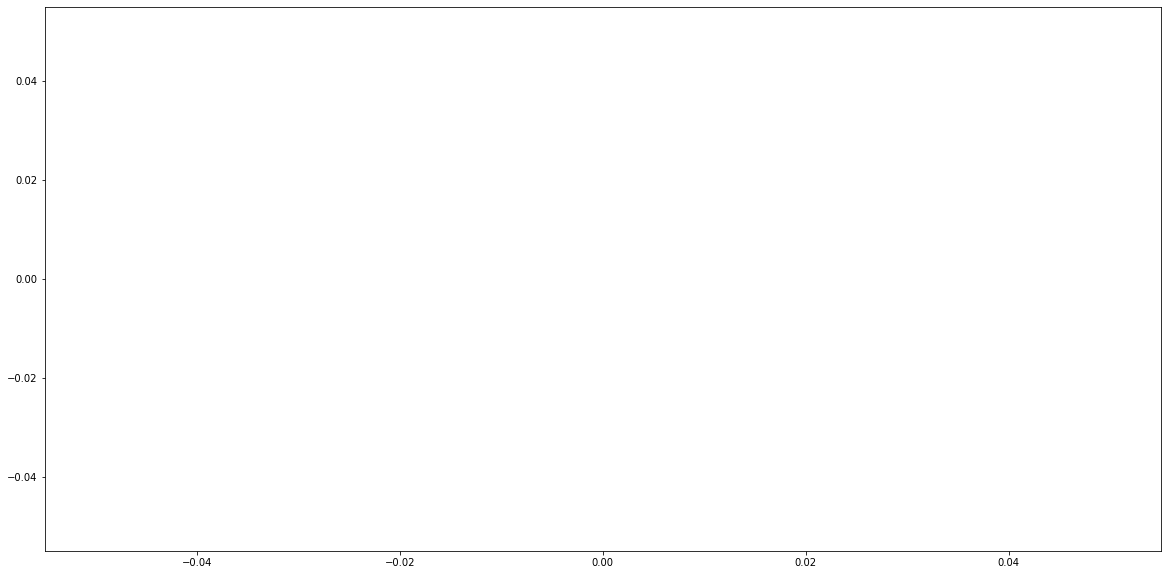

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007652
----------Result Report--------------
profit:  0


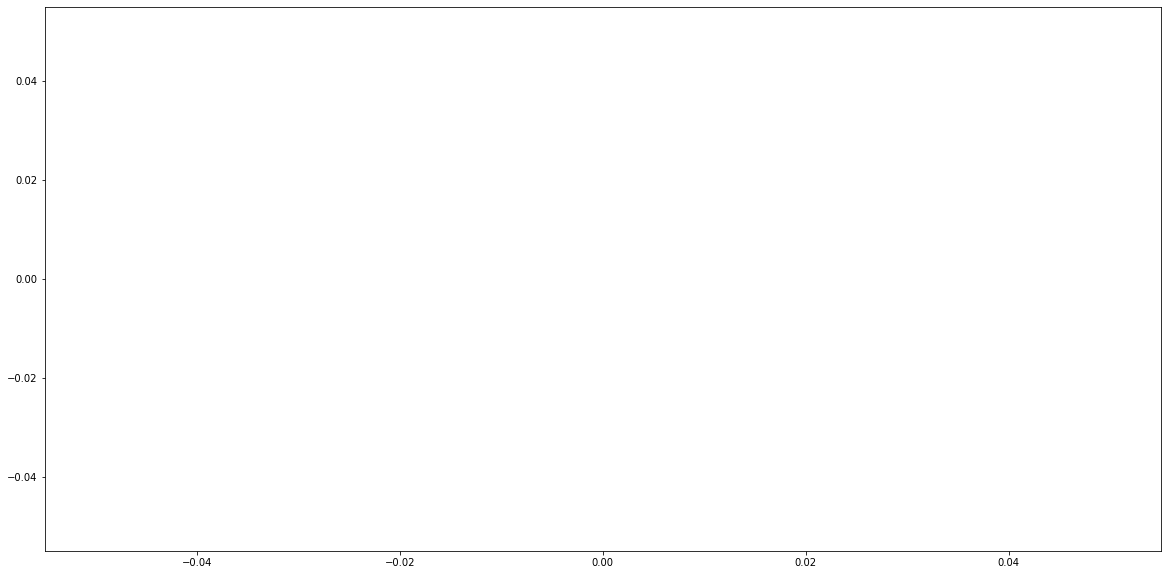

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90004892
----------Result Report--------------
profit:  0


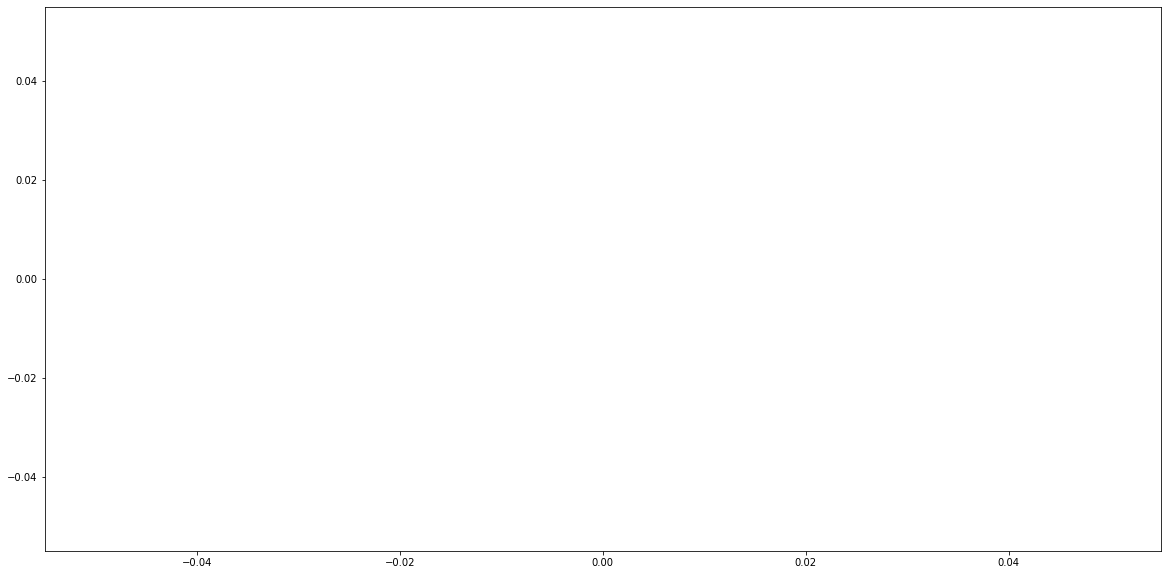

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006034
----------Result Report--------------
profit:  0


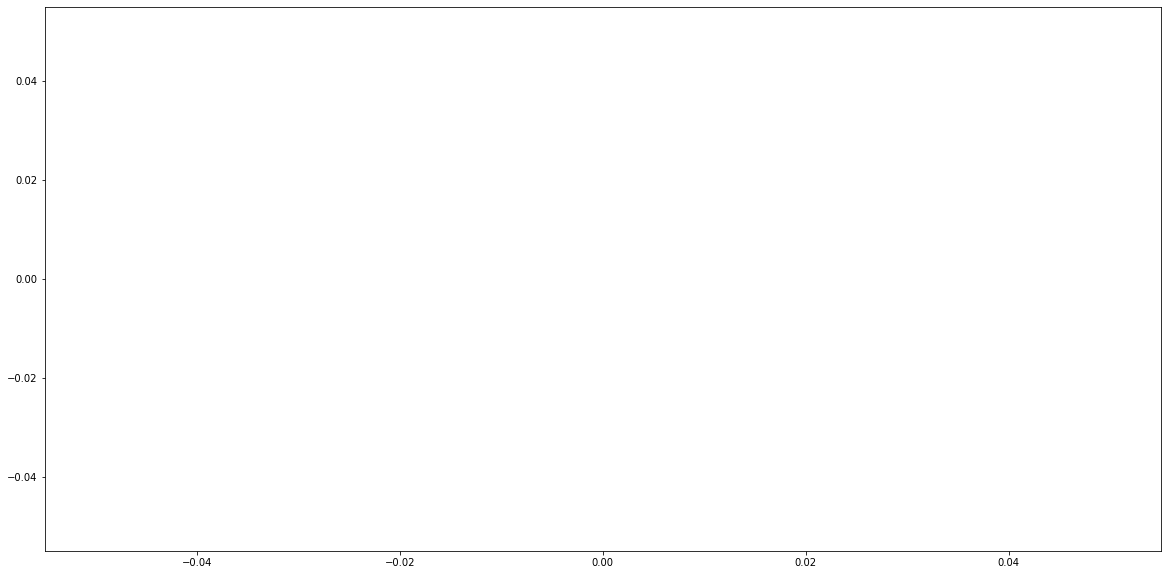

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006085
----------Result Report--------------
profit:  0


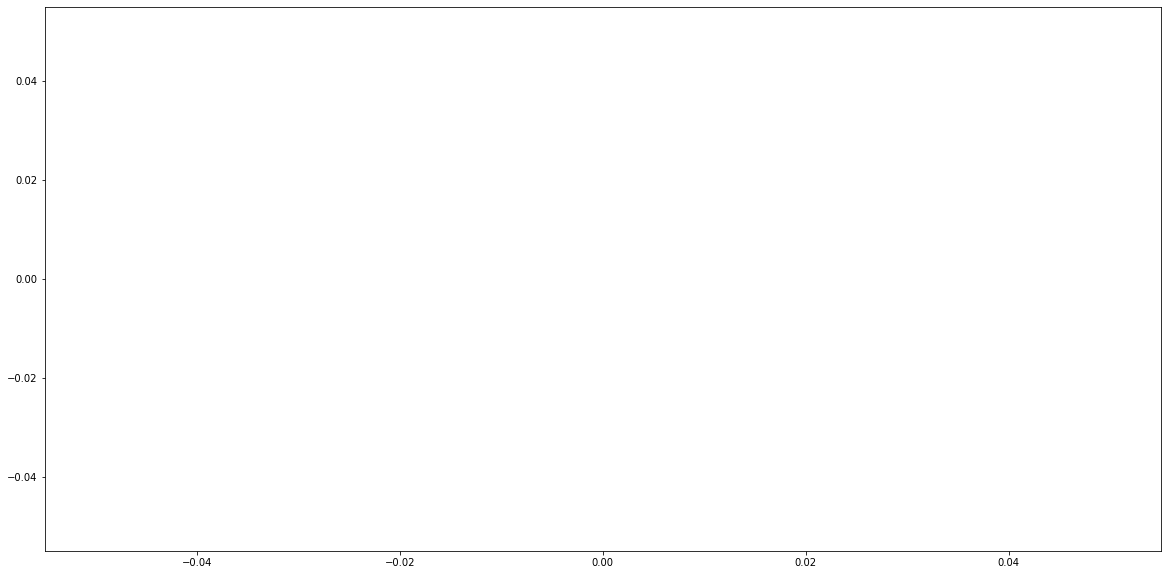

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90005381
----------Result Report--------------
profit:  0


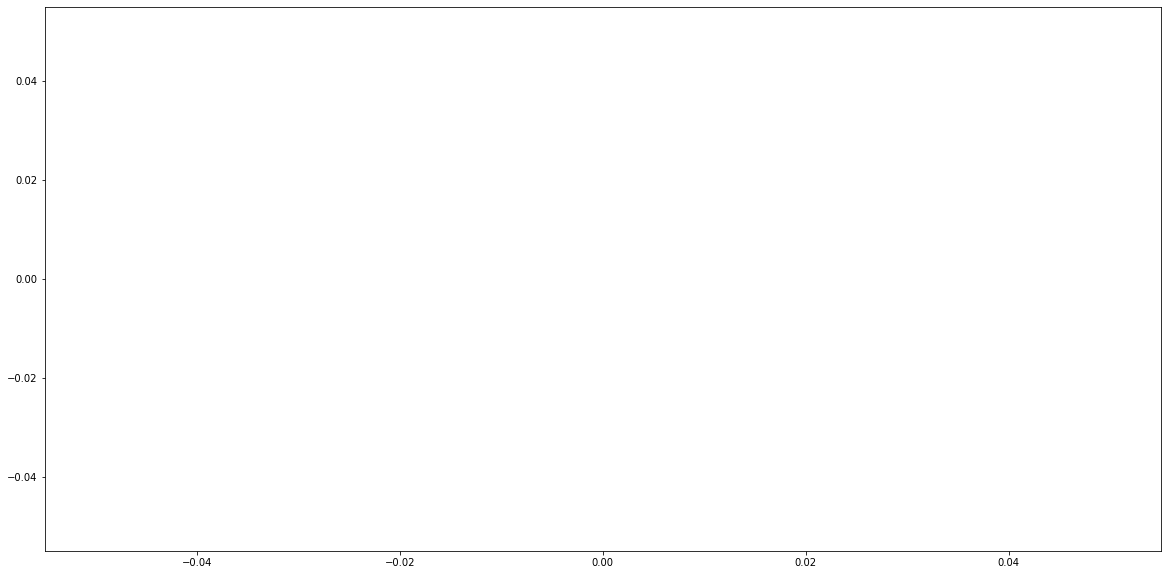

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90005879
----------Result Report--------------
profit:  0


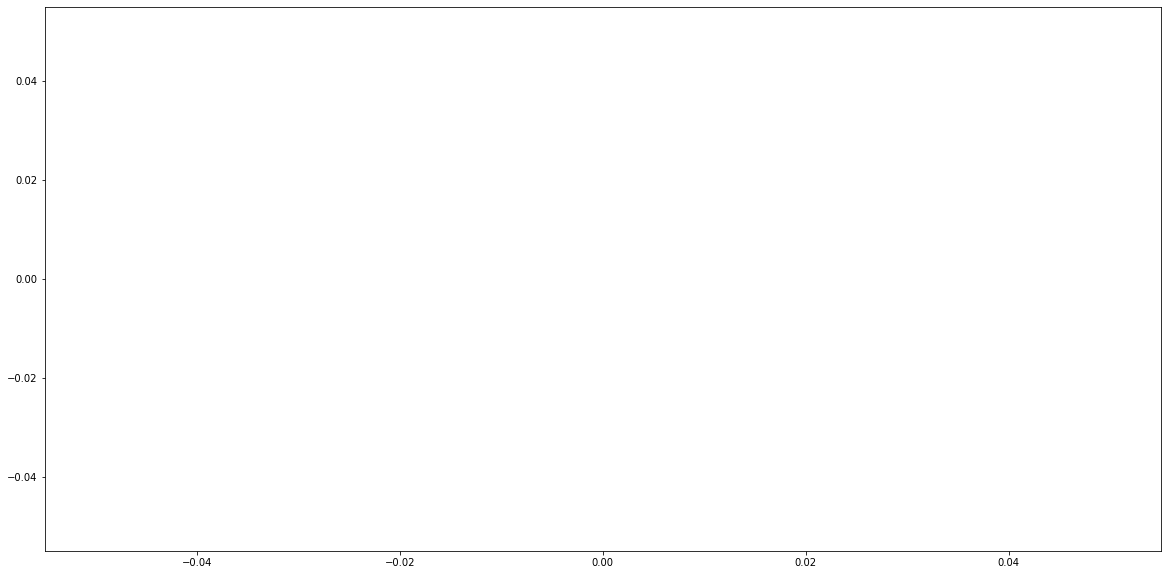

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90004460
----------Result Report--------------
profit:  0


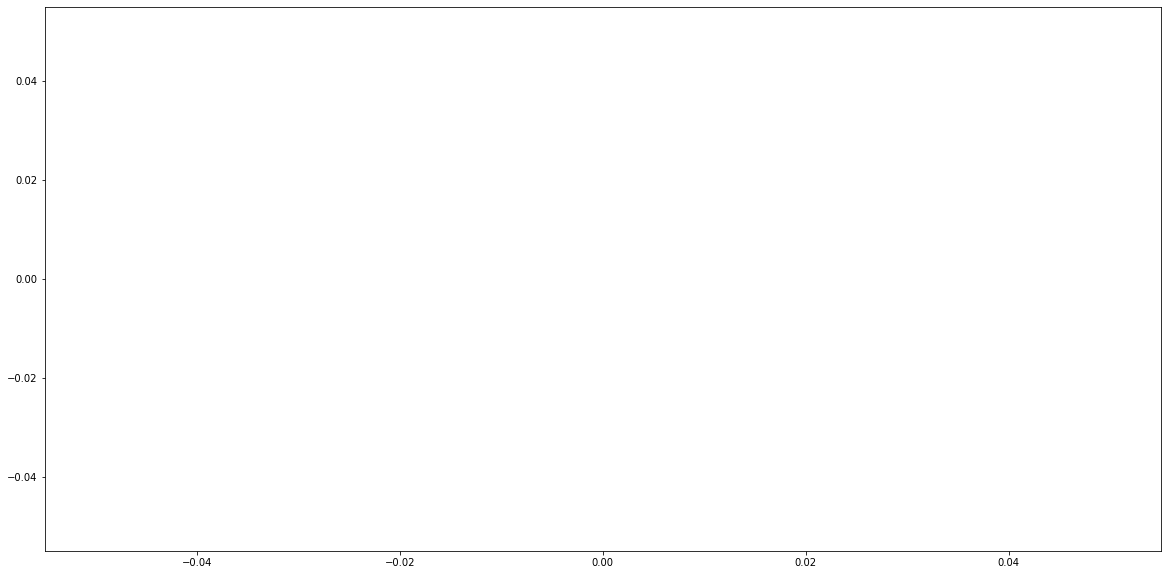

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006650
daily_low  19.8
daily_low * theta 19.898999999999997
bid1_p:  19.9
# sell:  34   # buy:  14
bid1_q:  5   bid2_q:  17
進場時間： 90532539 
  sell price at  19.9
stop profit
出場時間： 90539282
buy at 19.85
get 0.04999999999999716
------------------------------
daily_low  19.8
daily_low * theta 19.898999999999997
bid1_p:  19.95
# sell:  104   # buy:  2
bid1_q:  3   bid2_q:  128
進場時間： 131941113 
  sell price at  19.95
----------Result Report--------------
profit:  0.04999999999999716


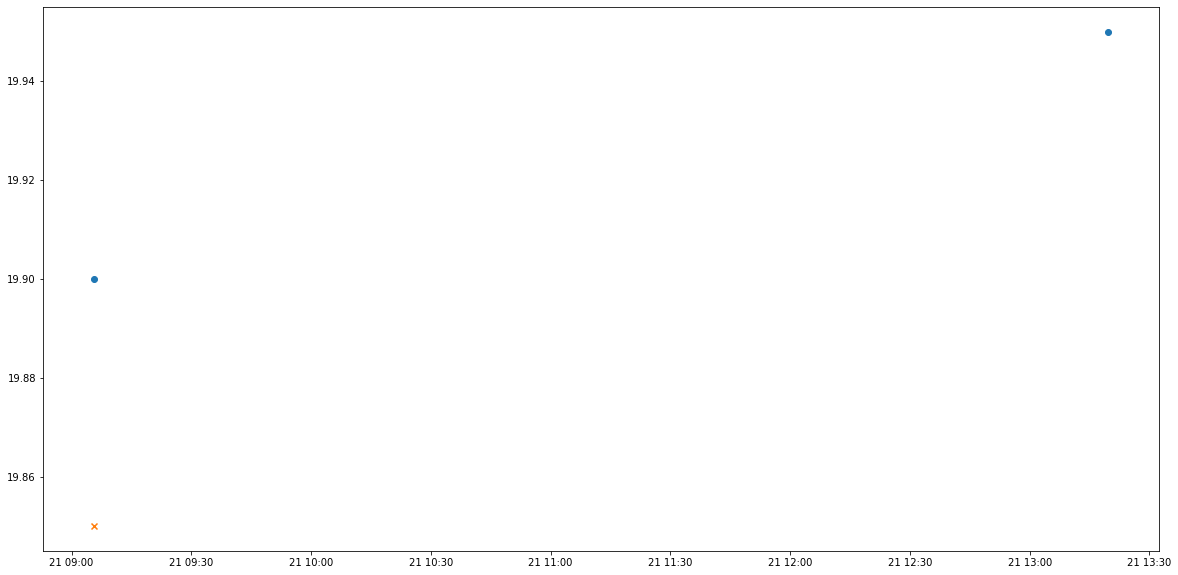

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90005057
----------Result Report--------------
profit:  0


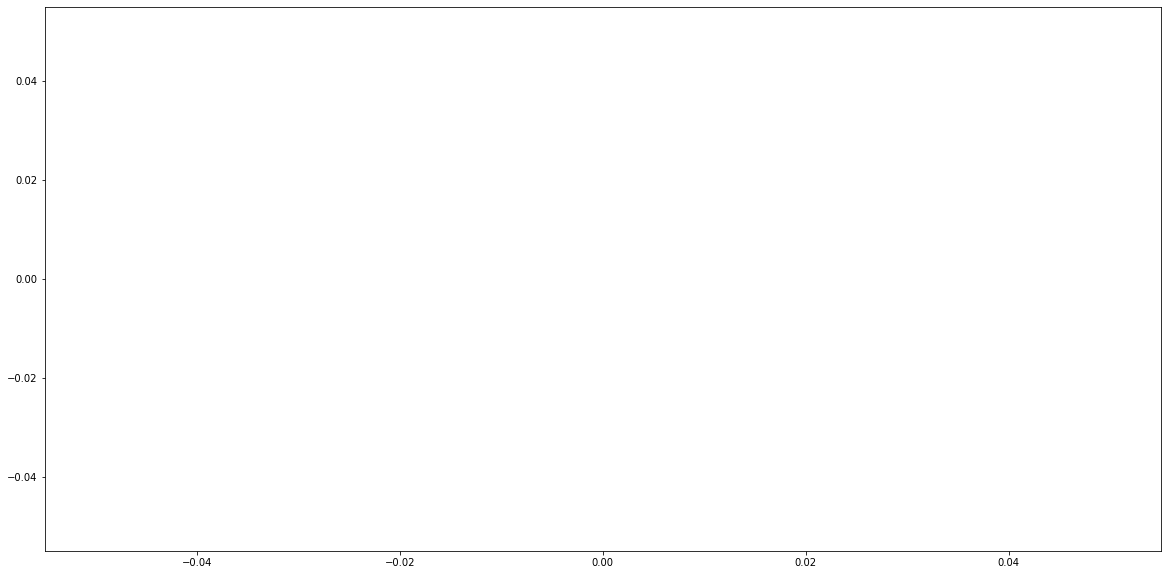

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006890
----------Result Report--------------
profit:  0


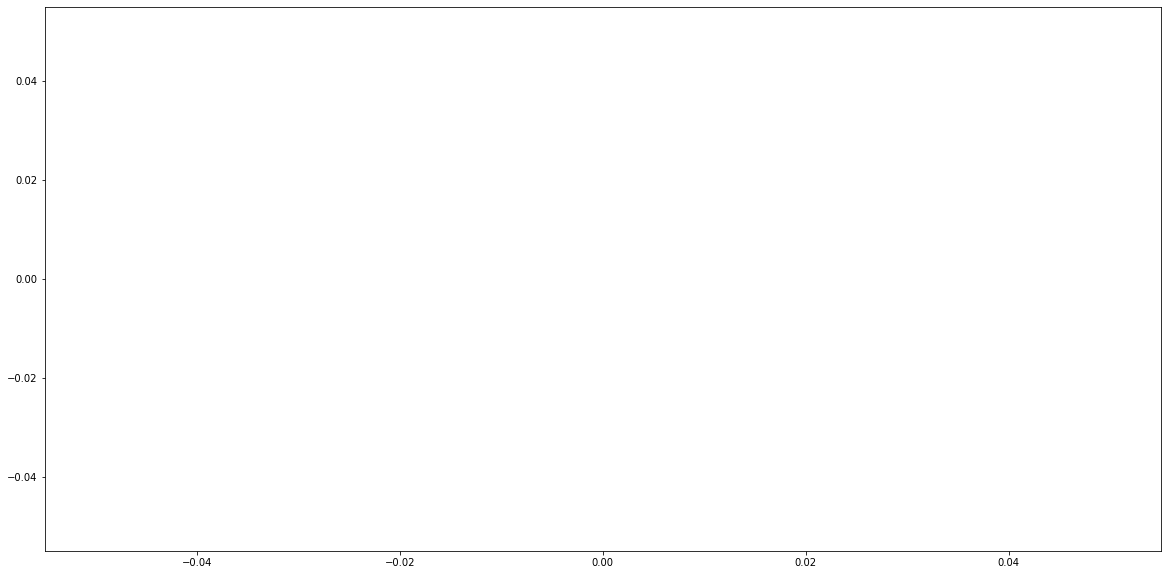

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90005473
daily_low  19.6
daily_low * theta 19.698
bid1_p:  19.7
# sell:  74   # buy:  13
bid1_q:  15   bid2_q:  81
進場時間： 90822672 
  sell price at  19.7
time out
出場時間： 91823986
buy at 19.7
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


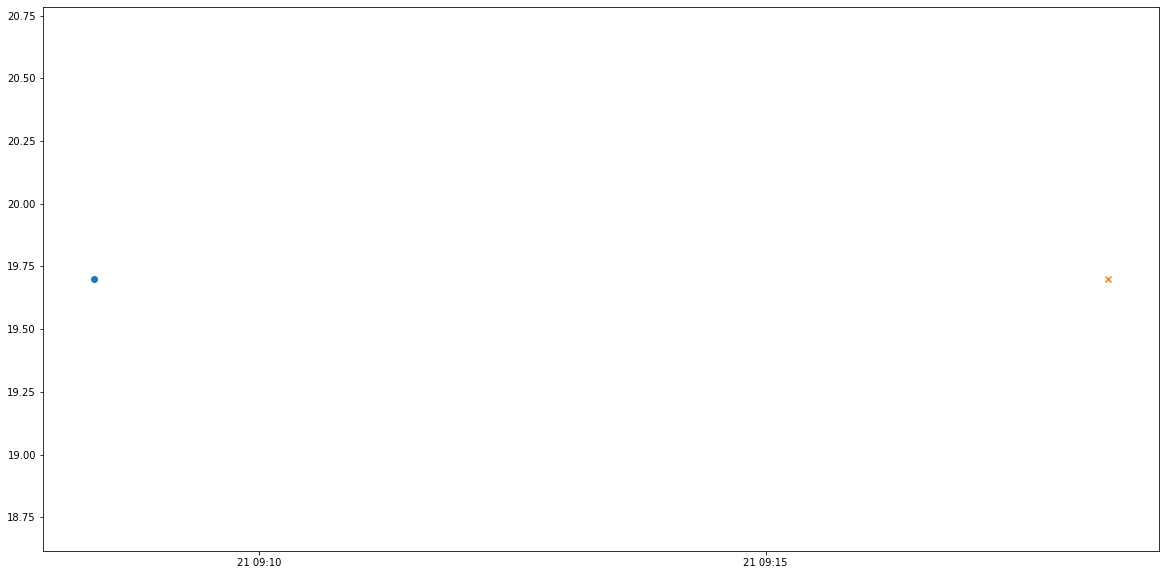

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006910
----------Result Report--------------
profit:  0


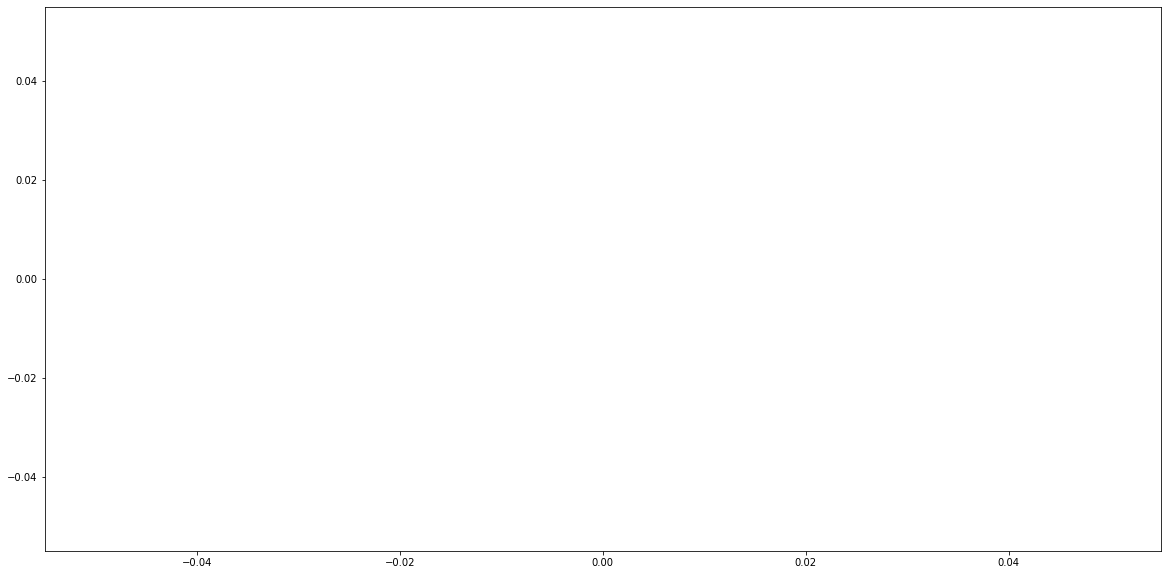

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006777
----------Result Report--------------
profit:  0


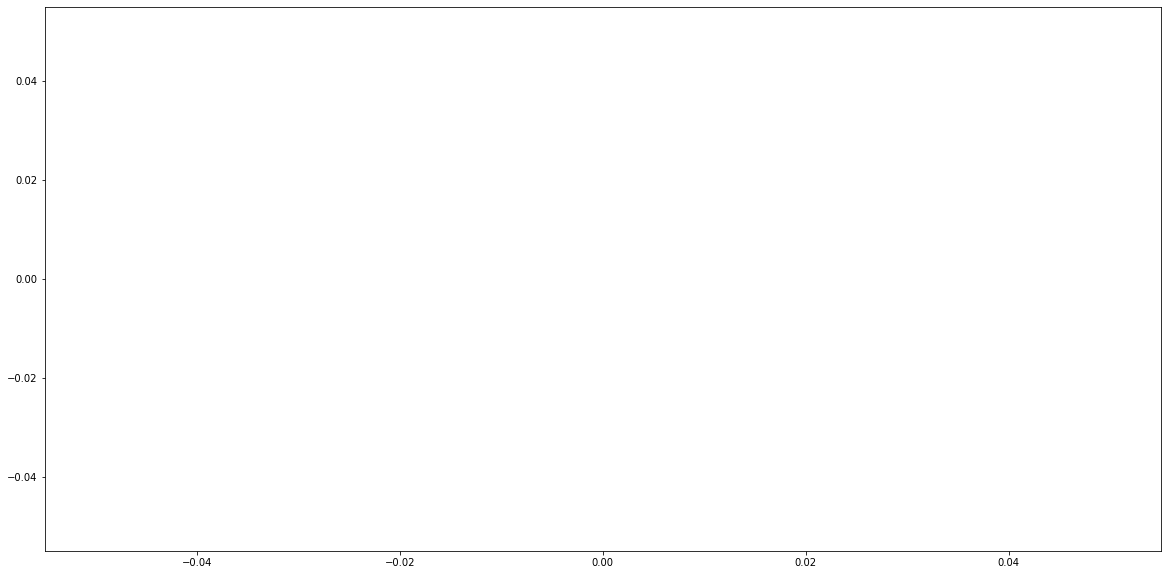

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007319
----------Result Report--------------
profit:  0


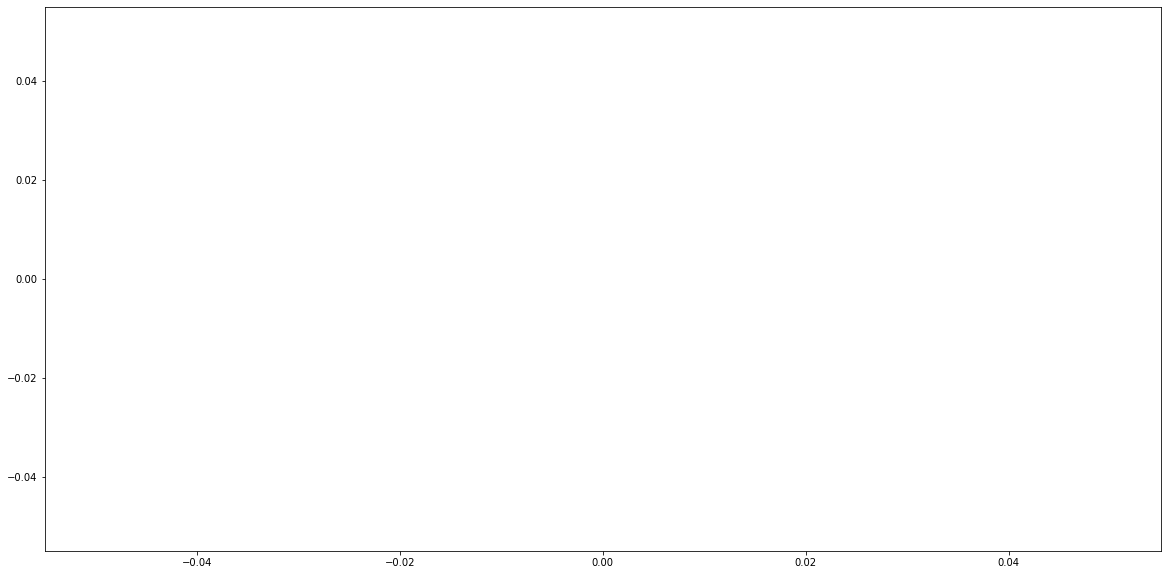

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007331
----------Result Report--------------
profit:  0


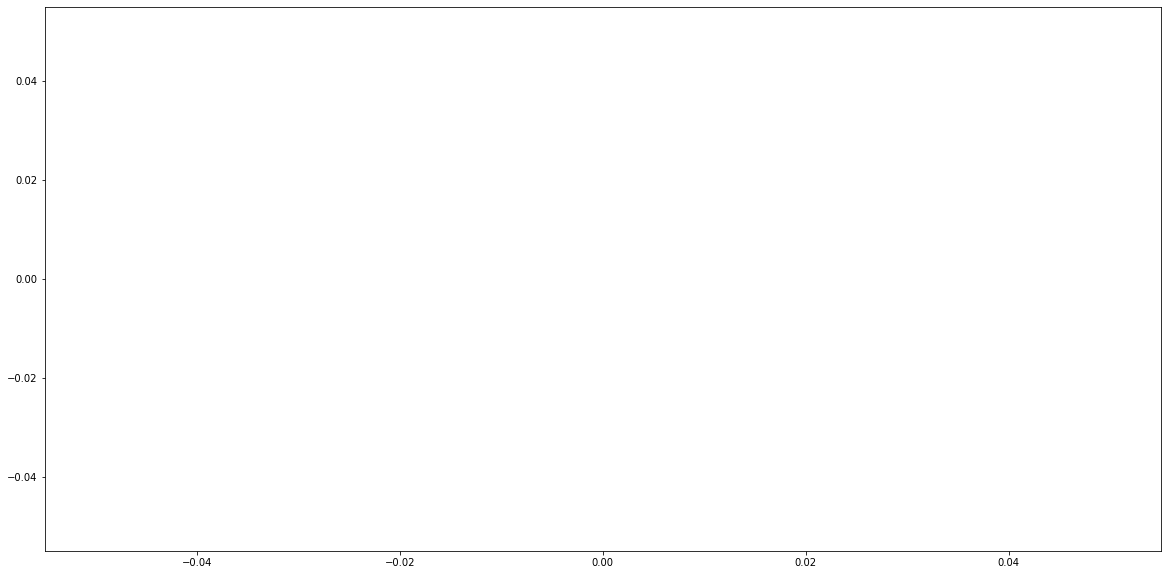

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008461
daily_low  20.1
daily_low * theta 20.200499999999998
bid1_p:  20.25
# sell:  97   # buy:  3
bid1_q:  55   bid2_q:  44
進場時間： 91833009 
  sell price at  20.25
time out
出場時間： 92835201
buy at 20.3
get -0.05000000000000071
------------------------------
----------Result Report--------------
profit:  -0.05000000000000071


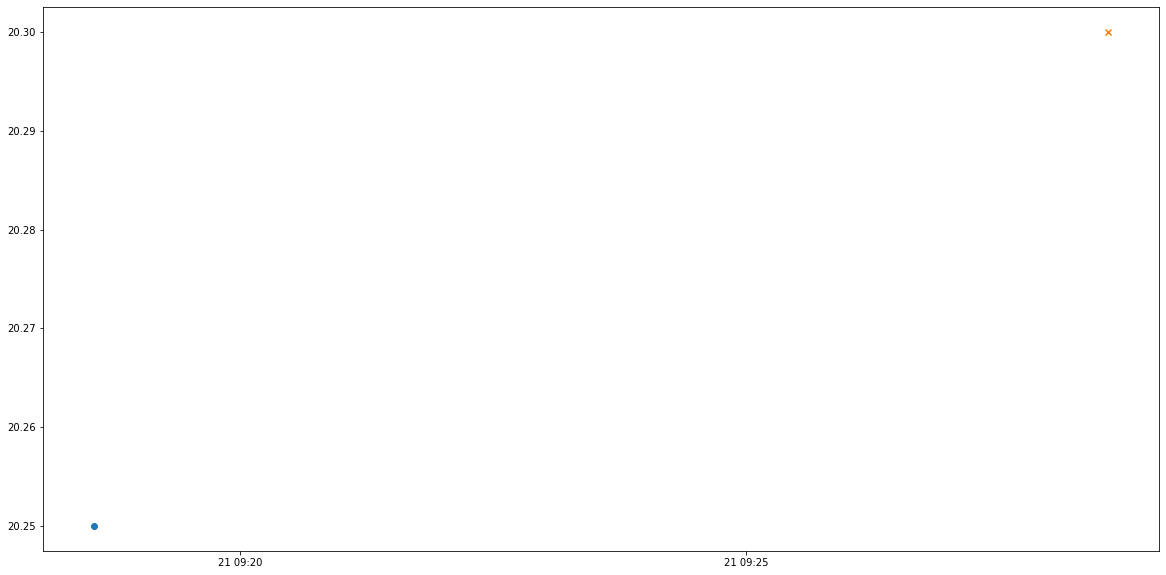

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006195
----------Result Report--------------
profit:  0


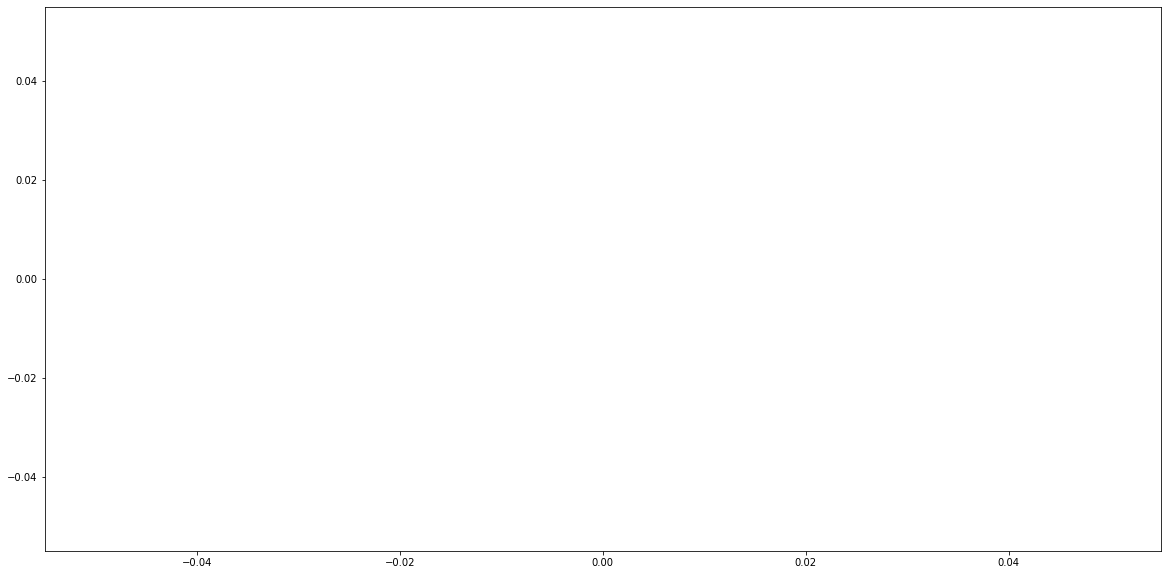

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008542
----------Result Report--------------
profit:  0


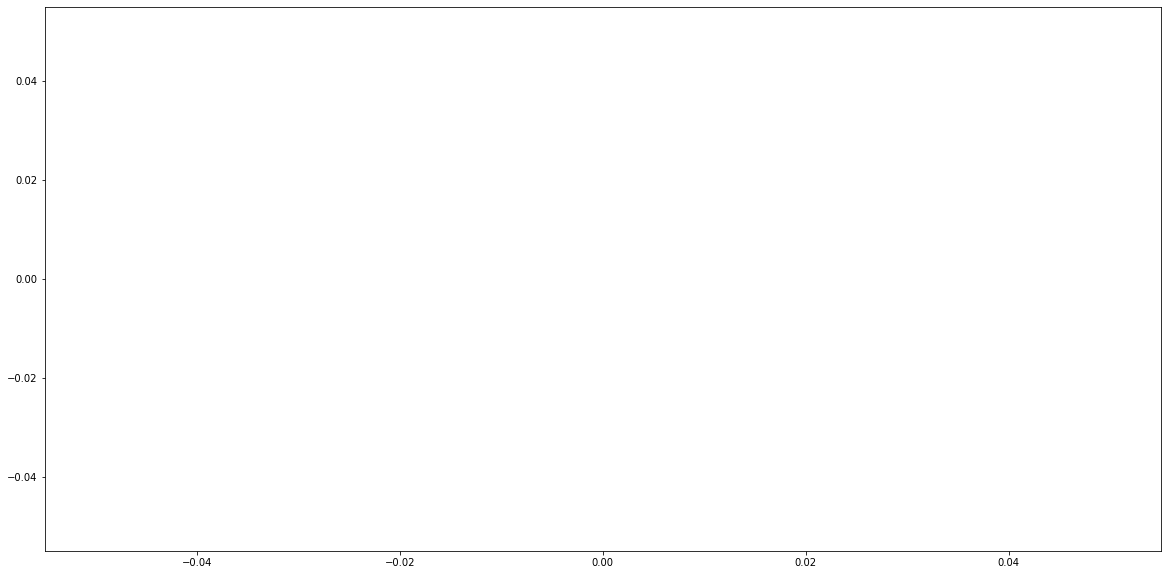

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90009157
daily_low  20.0
daily_low * theta 20.099999999999998
bid1_p:  20.25
# sell:  307   # buy:  11
bid1_q:  1   bid2_q:  273
進場時間： 121947012 
  sell price at  20.25
time out
出場時間： 122949411
buy at 20.25
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


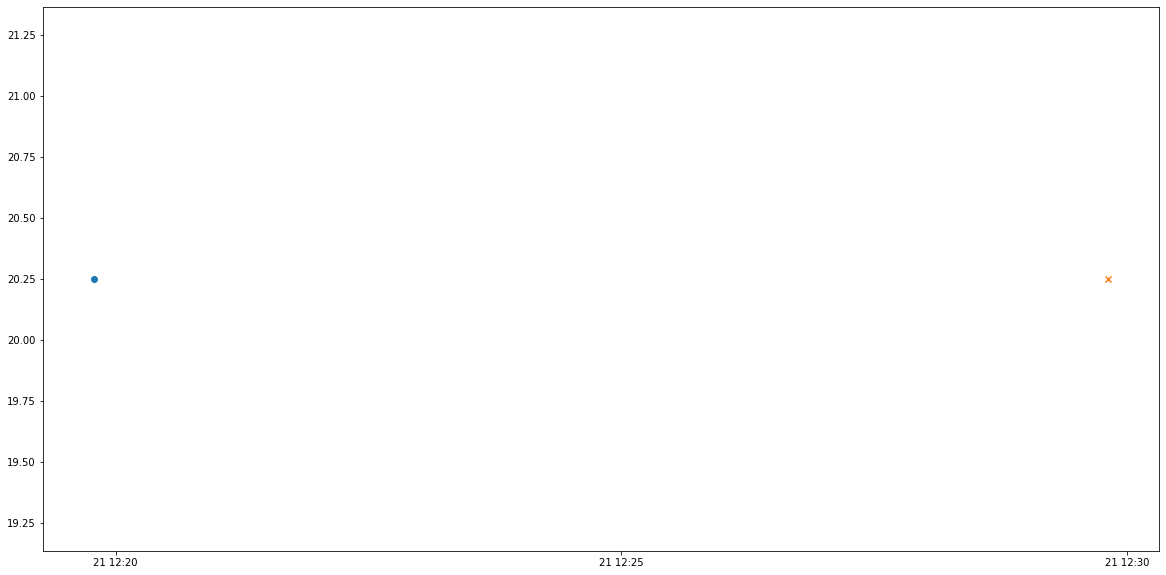

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007886
daily_low  20.2
daily_low * theta 20.301
bid1_p:  20.35
# sell:  916   # buy:  93
bid1_q:  50   bid2_q:  1027
進場時間： 123517604 
  sell price at  20.35
time out
出場時間： 124518831
buy at 20.35
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


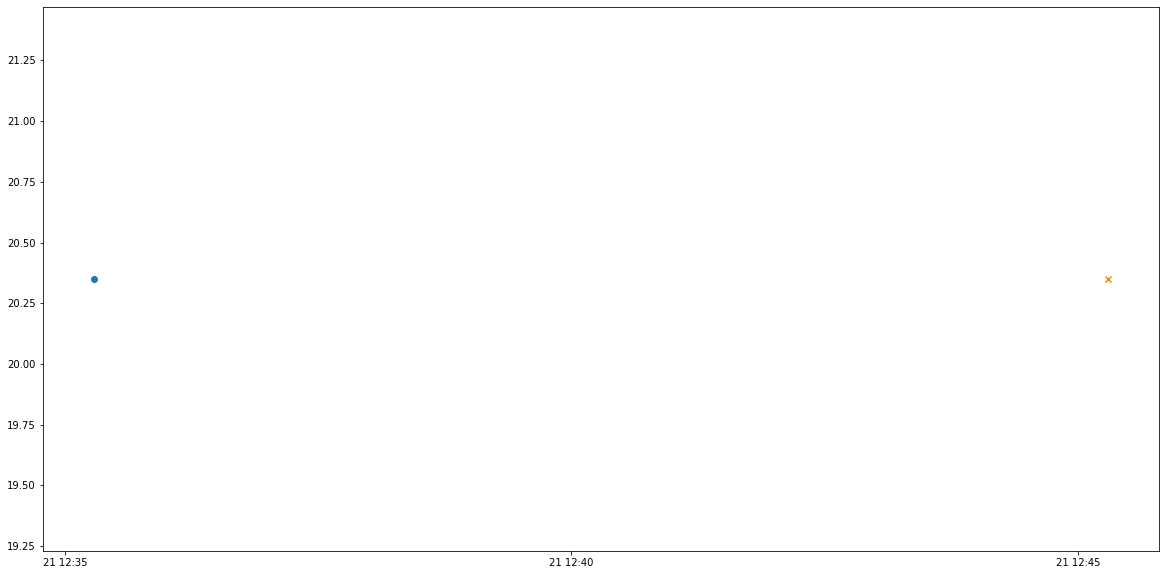

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008592
----------Result Report--------------
profit:  0


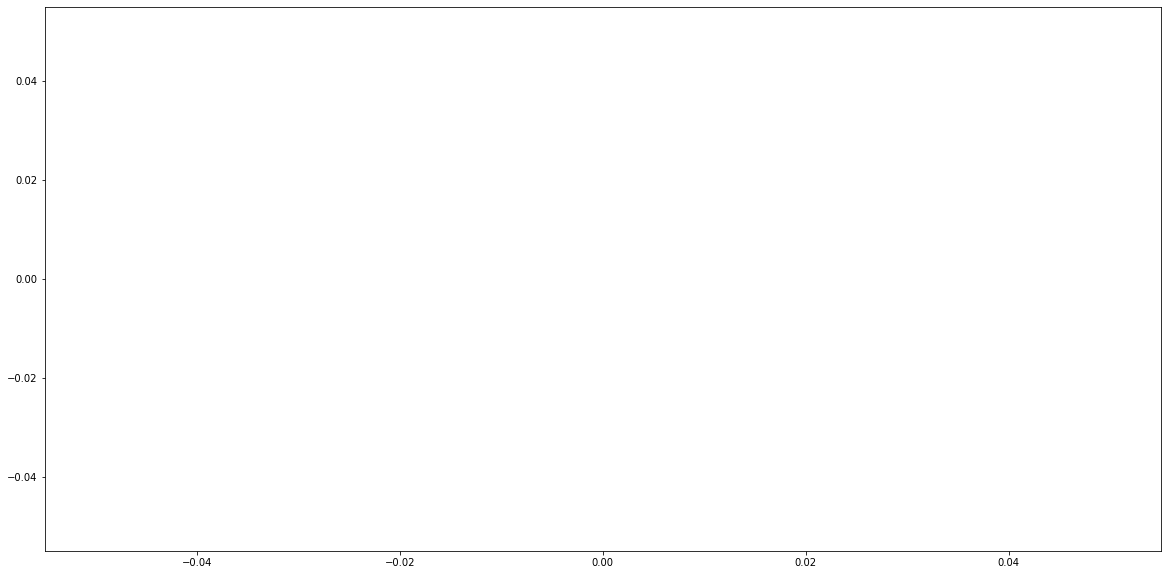

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007873
daily_low  20.2
daily_low * theta 20.301
bid1_p:  20.35
# sell:  12   # buy:  5
bid1_q:  4   bid2_q:  1
進場時間： 131754851 
  sell price at  20.35
stop profit
出場時間： 131819777
buy at 20.3
get 0.05000000000000071
------------------------------
----------Result Report--------------
profit:  0.05000000000000071


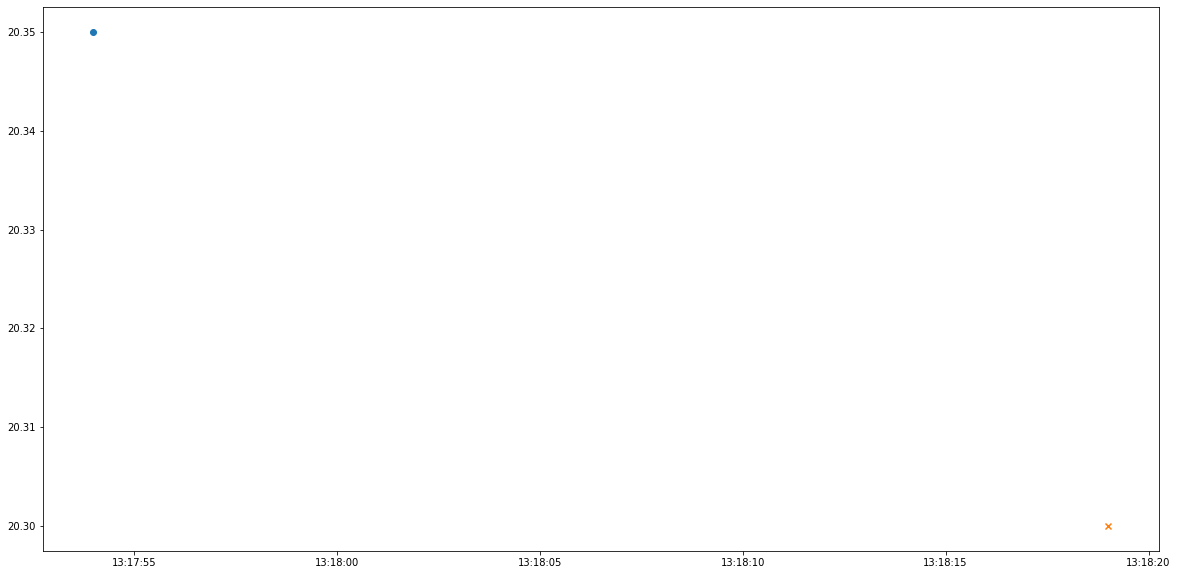

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007974
----------Result Report--------------
profit:  0


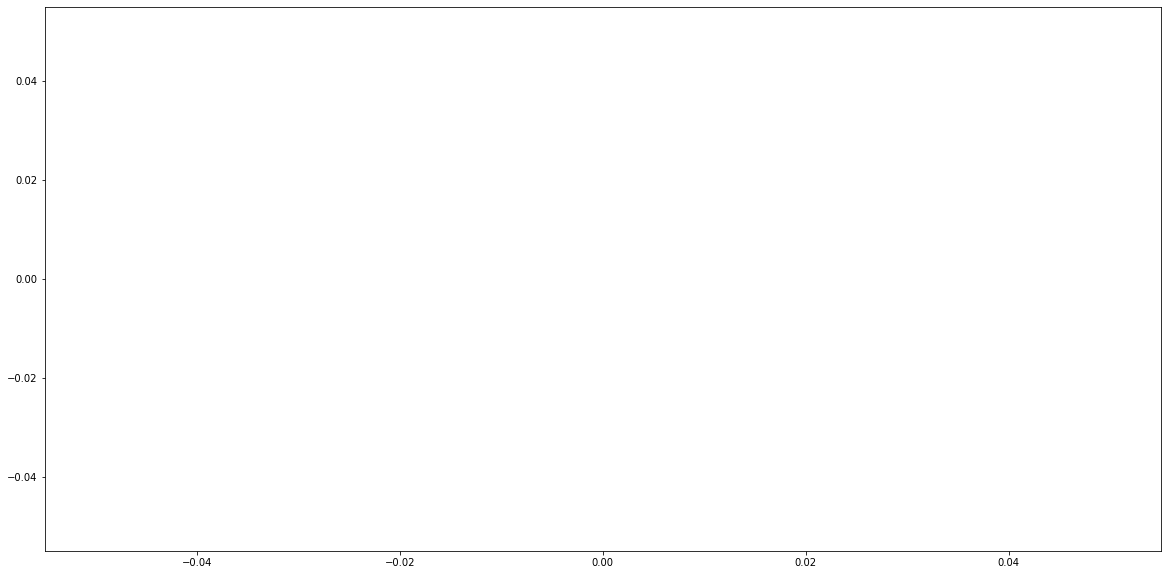

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006087
----------Result Report--------------
profit:  0


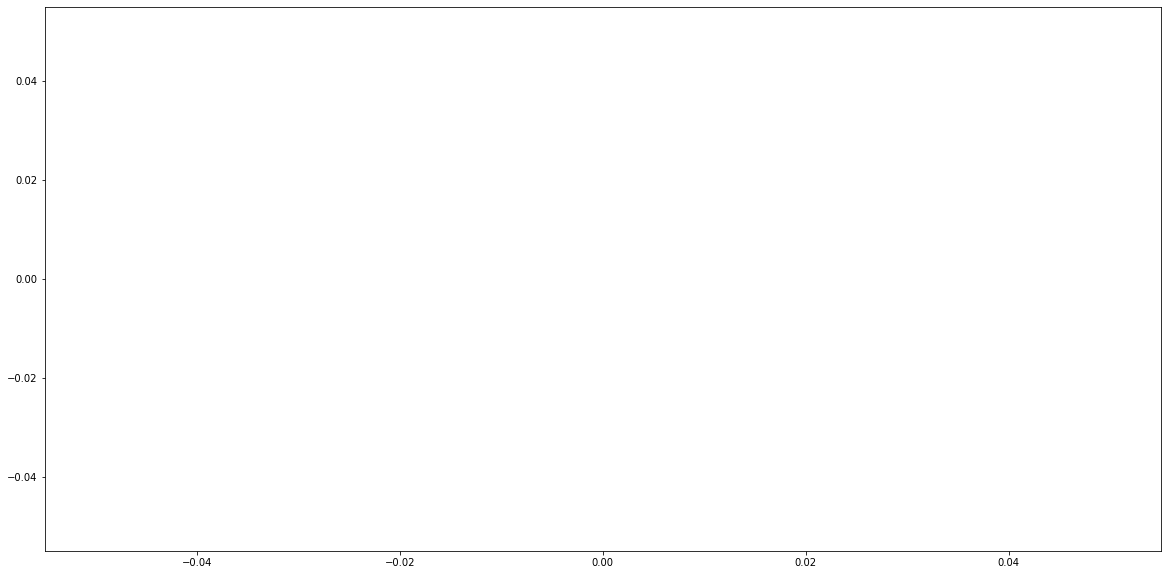

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007846
----------Result Report--------------
profit:  0


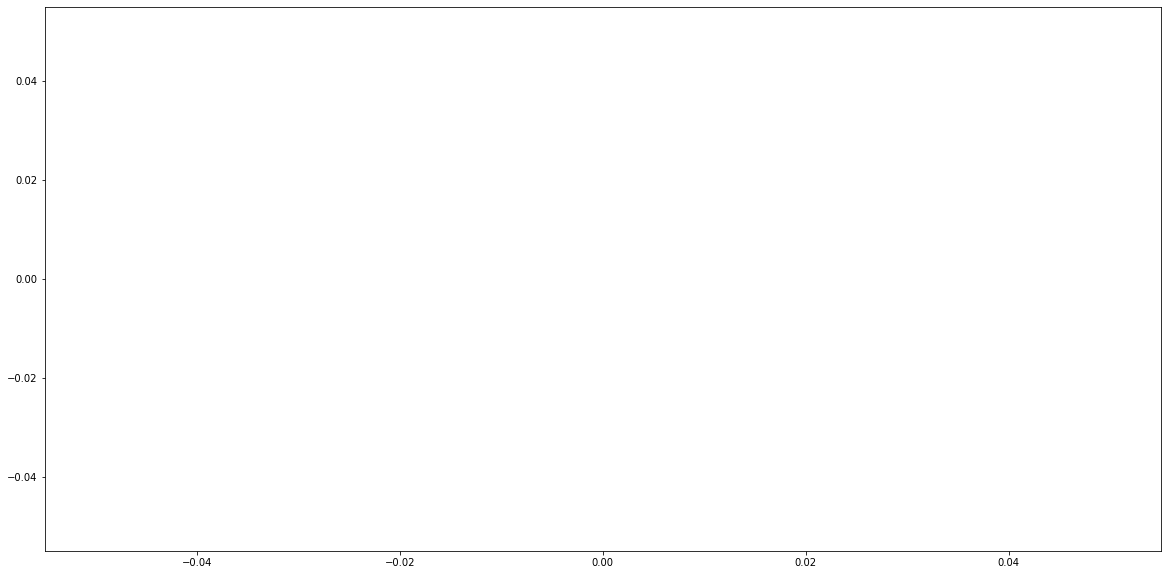

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90009945
----------Result Report--------------
profit:  0


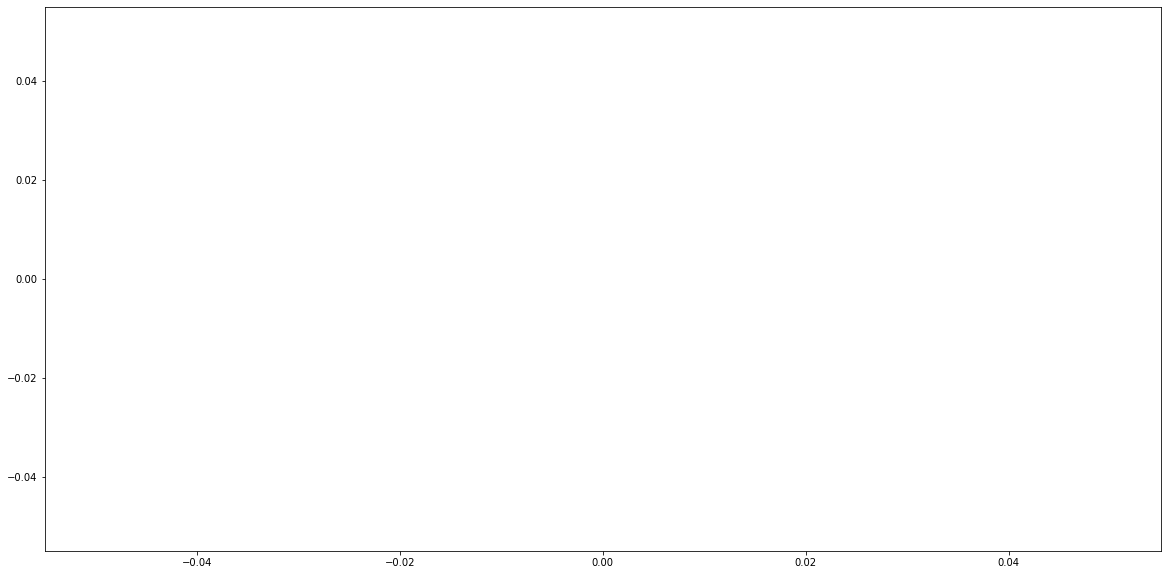

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007598
----------Result Report--------------
profit:  0


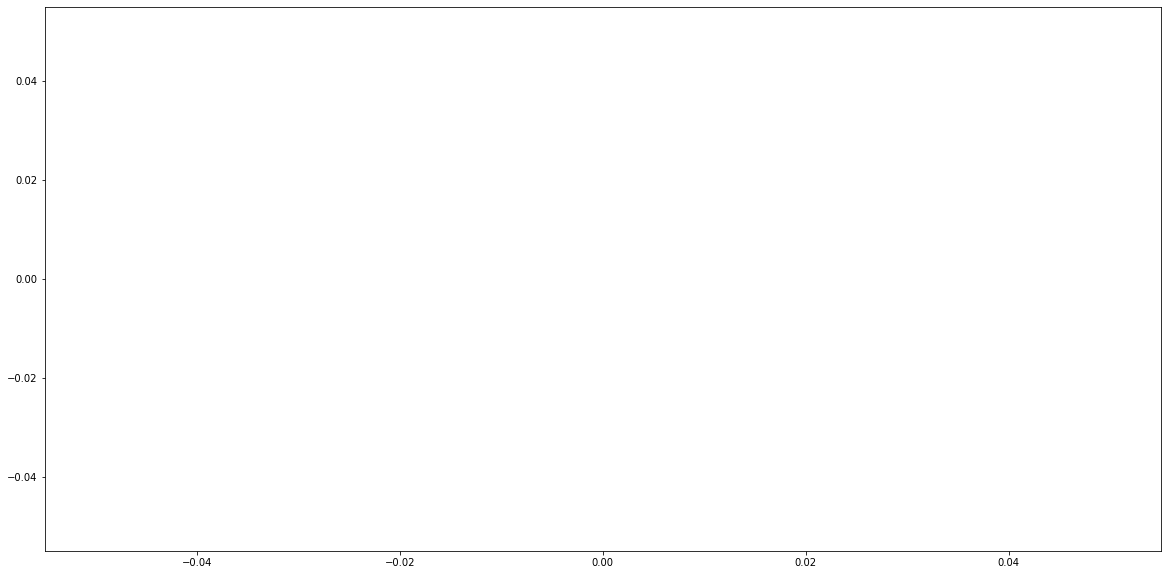

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90005640
----------Result Report--------------
profit:  0


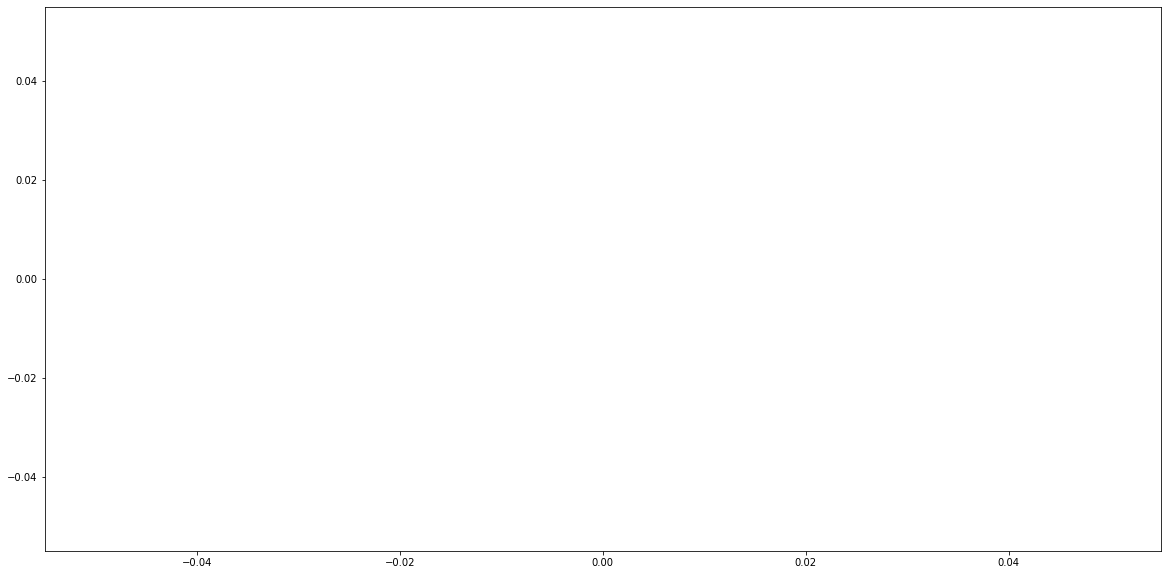

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90009032
----------Result Report--------------
profit:  0


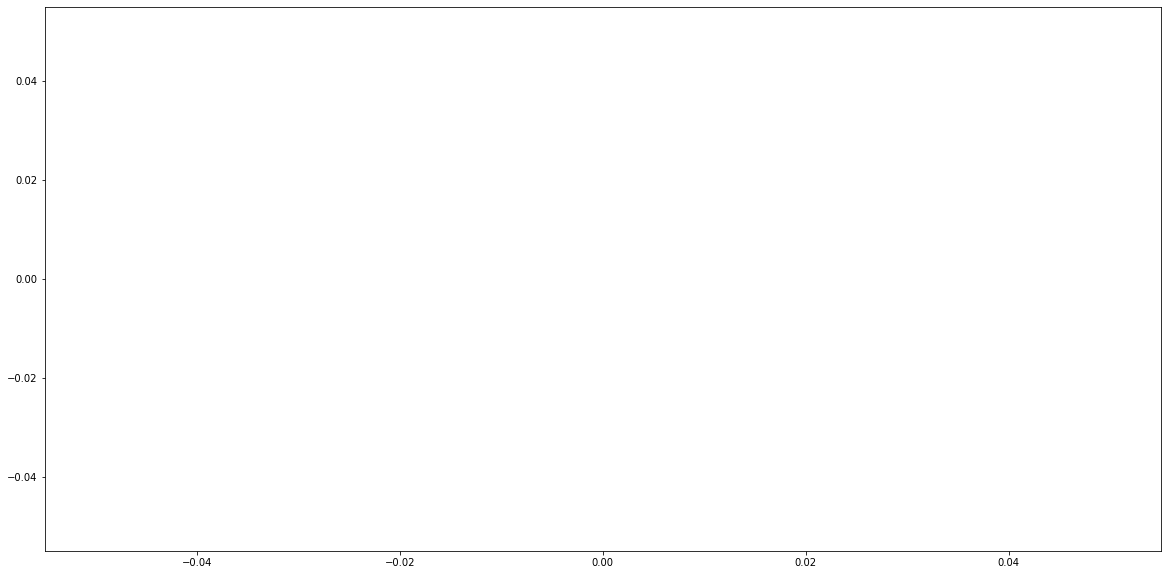

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-31/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006898
----------Result Report--------------
profit:  0


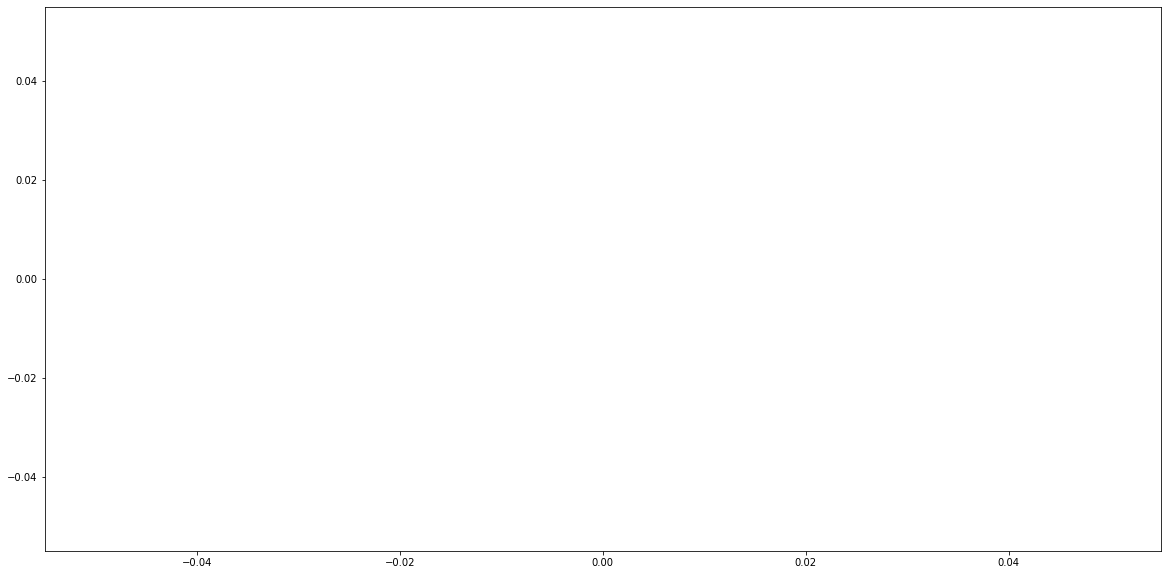

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-01/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90008308
daily_low  19.9
daily_low * theta 19.999499999999998
bid1_p:  20.05
# sell:  181   # buy:  5
bid1_q:  52   bid2_q:  187
進場時間： 113314256 
  sell price at  20.05
time out
出場時間： 114314376
buy at 20.05
get 0.0
------------------------------
daily_low  19.9
daily_low * theta 19.999499999999998
bid1_p:  20.05
# sell:  72   # buy:  27
bid1_q:  1   bid2_q:  42
進場時間： 121109443 
  sell price at  20.05
time out
出場時間： 122109646
buy at 20.05
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


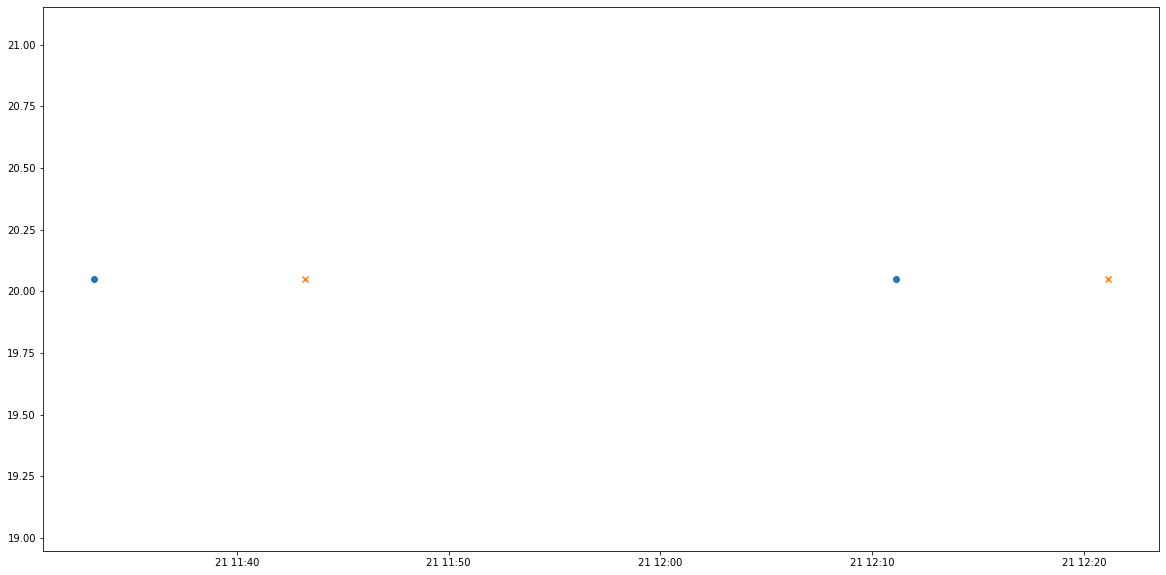

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-02/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90007640
----------Result Report--------------
profit:  0


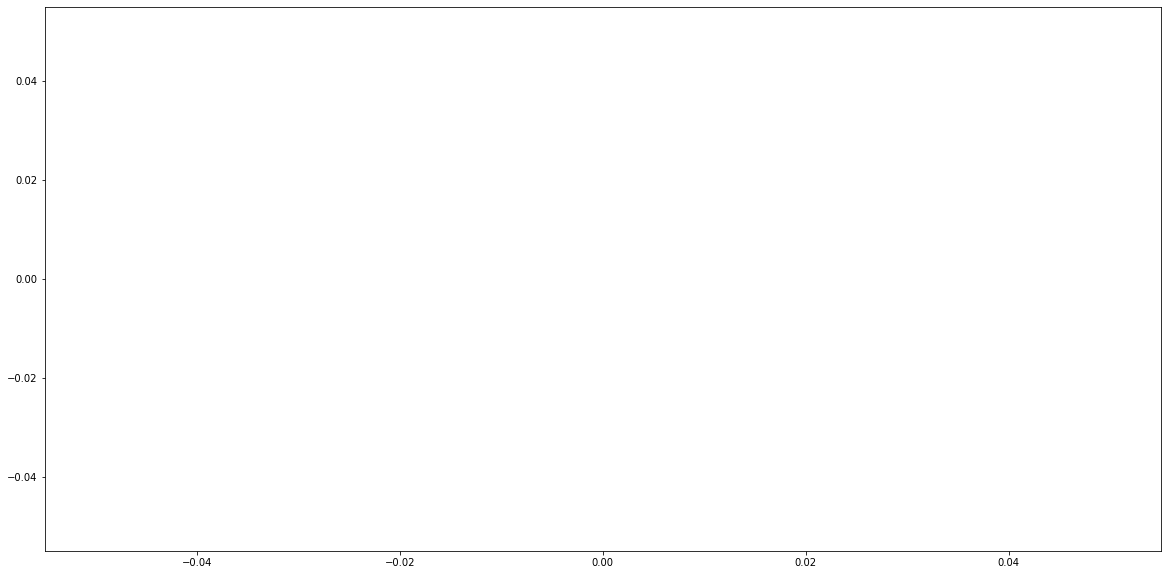

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/2002/tse_lob_2002.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-09-03/2002/tse_tick_2002.csv' mode='r' encoding='UTF-8'>
90006740
daily_low  20.0
daily_low * theta 20.099999999999998
bid1_p:  20.1
# sell:  517   # buy:  44
bid1_q:  53   bid2_q:  201
進場時間： 95751691 
  sell price at  20.1
time out
出場時間： 100001147
buy at 20.1
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


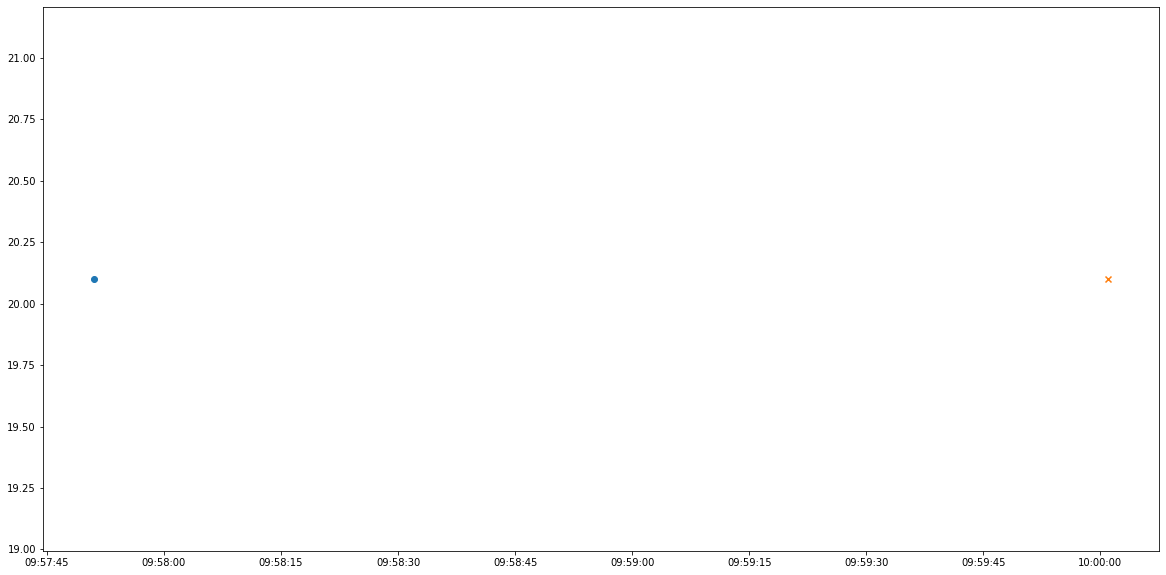

In [107]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2002")

In [108]:
res

[(0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (-0.04999999999999716, 41.85, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0.04999999999999716, 39.849999999999994, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0.0, 19.7, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (-0.05000000000000071, 20.25, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0.0, 20.25, 0, 0),
 (0.0, 20.35, 0, 0),
 (0, 0, 0, 0),
 (0.05000000000000071, 20.35, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0.0, 40.1, 0, 0),
 (0, 0, 0, 0),
 (0.0, 20.1, 0, 0)]

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-03/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004105
daily_low  165.5
daily_low * theta 166.3275
bid1_p:  167.0
# sell:  68   # buy:  16
bid1_q:  12   bid2_q:  55
進場時間： 90112368 
  sell price at  167.0
time out
出場時間： 91112533
buy at 168.0
get -1.0
------------------------------
daily_low  165.5
daily_low * theta 166.3275
bid1_p:  168.0
# sell:  138   # buy:  2
bid1_q:  43   bid2_q:  134
進場時間： 93710165 
  sell price at  168.0
stop profit
出場時間： 93820939
buy at 167.5
get 0.5
------------------------------
daily_low  165.5
daily_low * theta 166.3275
bid1_p:  170.5
# sell:  159   # buy:  2
bid1_q:  10   bid2_q:  124
進場時間： 111824785 
  sell price at  170.5
time out
出場時間： 112825496
buy at 171.0
get -0.5
------------------------------
----------Result Report--------------
pr

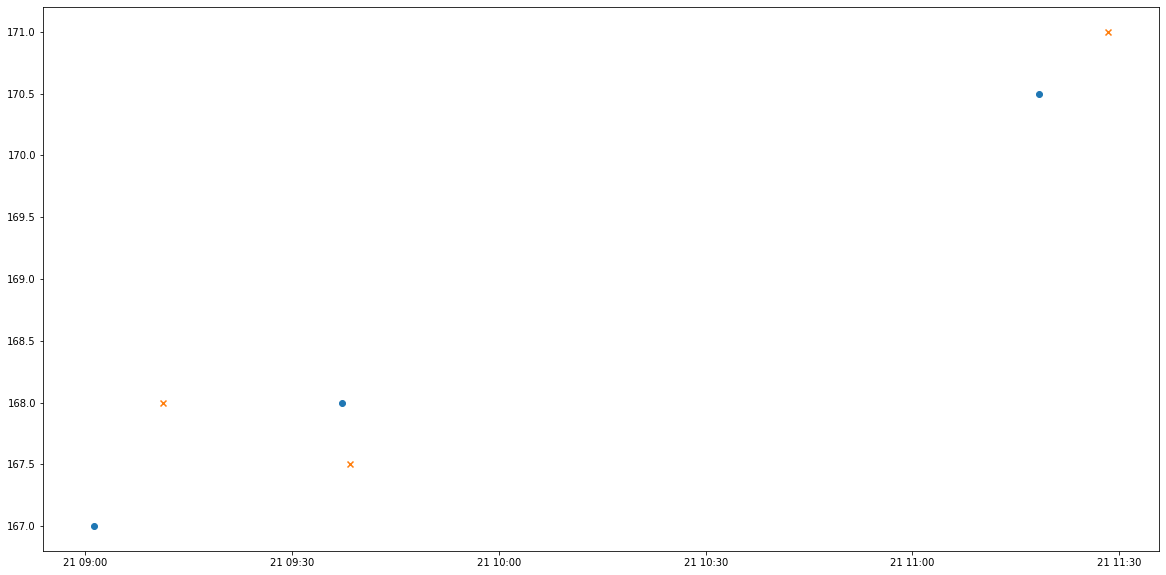

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-06/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005257
daily_low  171.0
daily_low * theta 171.855
bid1_p:  172.0
# sell:  72   # buy:  0
bid1_q:  63   bid2_q:  31
進場時間： 91245838 
  sell price at  172.0
time out
出場時間： 92246321
buy at 172.0
get 0.0
------------------------------
daily_low  171.0
daily_low * theta 171.855
bid1_p:  172.5
# sell:  97   # buy:  3
bid1_q:  36   bid2_q:  77
進場時間： 93418162 
  sell price at  172.5
time out
出場時間： 94418454
buy at 173.0
get -0.5
------------------------------
daily_low  171.0
daily_low * theta 171.855
bid1_p:  177.0
# sell:  71   # buy:  9
bid1_q:  16   bid2_q:  72
進場時間： 100824261 
  sell price at  177.0
time out
出場時間： 101824290
buy at 177.0
get 0.0
------------------------------
daily_low  171.0
daily_low * theta 171.855
bid1_p:  

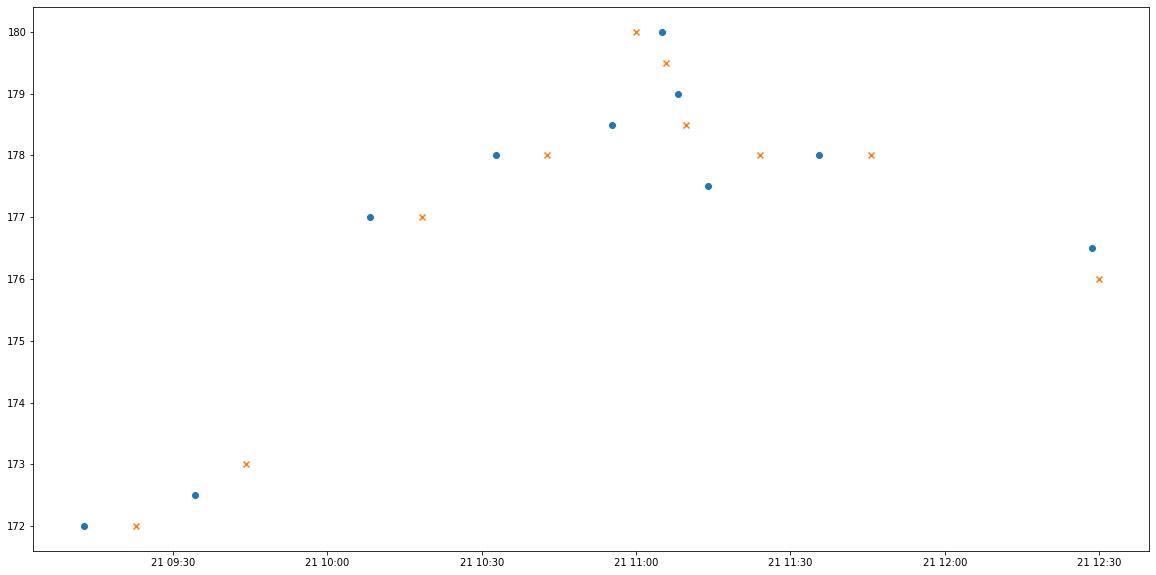

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-07/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90003038
daily_low  174.0
daily_low * theta 174.86999999999998
bid1_p:  176.5
# sell:  30   # buy:  4
bid1_q:  9   bid2_q:  27
進場時間： 92605897 
  sell price at  176.5
stop profit
出場時間： 92716720
buy at 176.0
get 0.5
------------------------------
daily_low  174.0
daily_low * theta 174.86999999999998
bid1_p:  175.0
# sell:  60   # buy:  0
bid1_q:  3   bid2_q:  70
進場時間： 93543769 
  sell price at  175.0
time out
出場時間： 94545252
buy at 175.5
get -0.5
------------------------------
daily_low  172.0
daily_low * theta 172.85999999999999
bid1_p:  173.0
# sell:  103   # buy:  0
bid1_q:  11   bid2_q:  32
進場時間： 95900116 
  sell price at  173.0
stop profit
出場時間： 95900116
buy at 172.5
get 0.5
------------------------------
daily_low  172.0

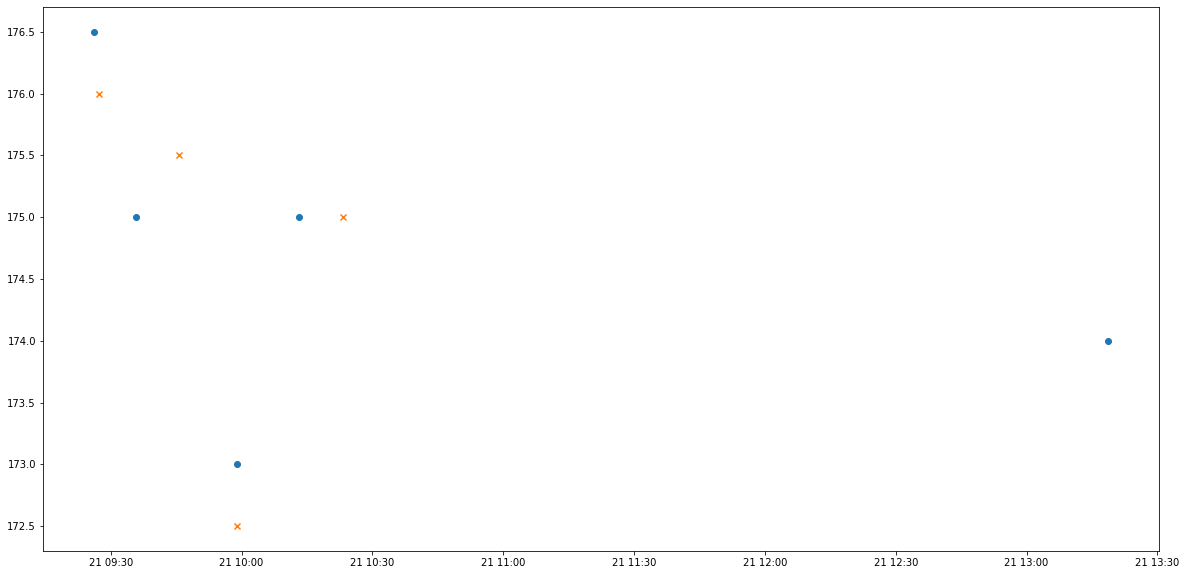

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-08/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90006385
daily_low  174.5
daily_low * theta 175.37249999999997
bid1_p:  177.0
# sell:  28   # buy:  1
bid1_q:  1   bid2_q:  24
進場時間： 91700744 
  sell price at  177.0
stop loss
出場時間： 92616581
buy at 178.5
get -1.5
------------------------------
daily_low  174.5
daily_low * theta 175.37249999999997
bid1_p:  179.5
# sell:  49   # buy:  0
bid1_q:  2   bid2_q:  63
進場時間： 94311167 
  sell price at  179.5
time out
出場時間： 95318723
buy at 179.5
get 0.0
------------------------------
daily_low  174.5
daily_low * theta 175.37249999999997
bid1_p:  179.0
# sell:  74   # buy:  5
bid1_q:  36   bid2_q:  62
進場時間： 95924558 
  sell price at  179.0
time out
出場時間： 100000720
buy at 179.0
get 0.0
------------------------------
daily_low  174.5
dail

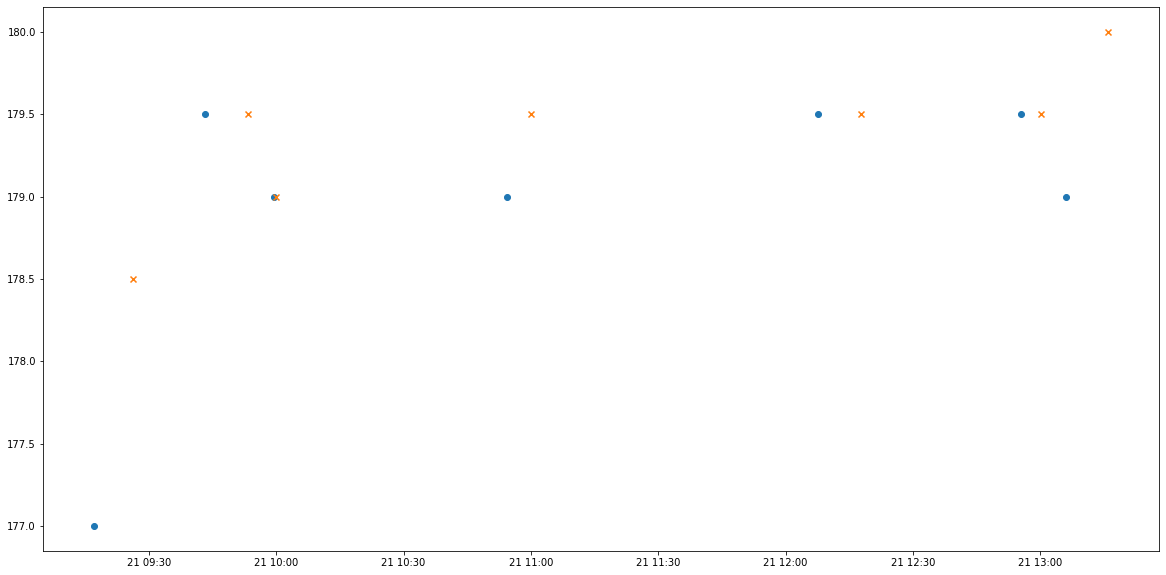

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-09/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005740
daily_low  181.0
daily_low * theta 181.90499999999997
bid1_p:  183.0
# sell:  35   # buy:  4
bid1_q:  9   bid2_q:  34
進場時間： 92345805 
  sell price at  183.0
stop profit
出場時間： 92819222
buy at 182.5
get 0.5
------------------------------
daily_low  181.0
daily_low * theta 181.90499999999997
bid1_p:  183.5
# sell:  16   # buy:  7
bid1_q:  1   bid2_q:  18
進場時間： 95318974 
  sell price at  183.5
time out
出場時間： 100000960
buy at 183.5
get 0.0
------------------------------
daily_low  181.0
daily_low * theta 181.90499999999997
bid1_p:  182.0
# sell:  245   # buy:  31
bid1_q:  1   bid2_q:  146
進場時間： 103146180 
  sell price at  182.0
time out
出場時間： 104151149
buy at 182.5
get -0.5
------------------------------
daily_low  181.

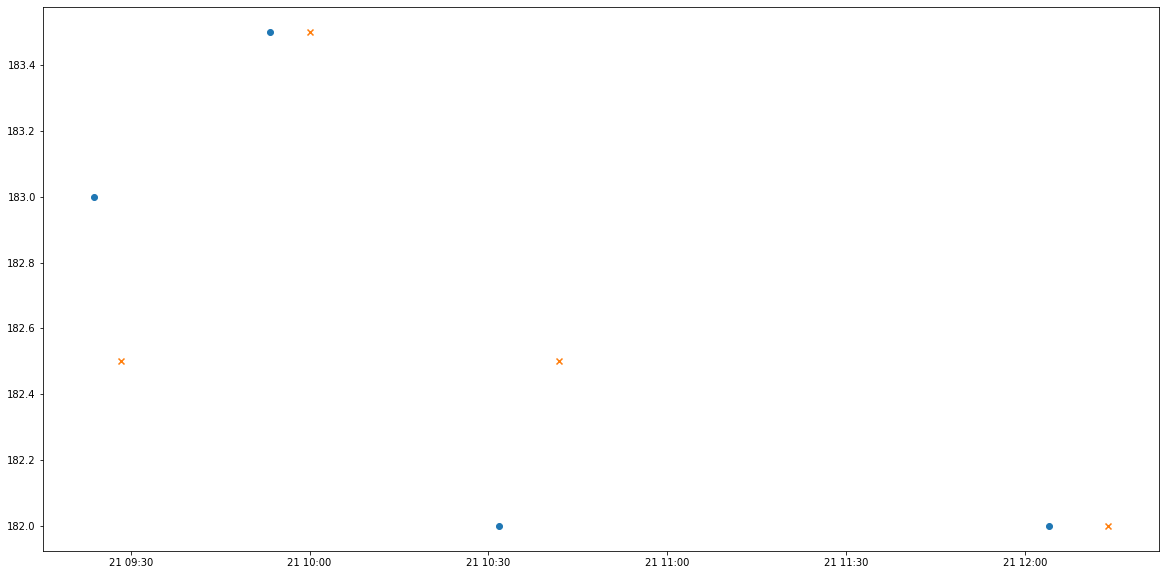

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-10/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90006088
daily_low  177.0
daily_low * theta 177.885
bid1_p:  178.0
# sell:  29   # buy:  13
bid1_q:  22   bid2_q:  5
進場時間： 90108773 
  sell price at  178.0
stop loss
出場時間： 90626906
buy at 179.5
get -1.5
------------------------------
daily_low  177.0
daily_low * theta 177.885
bid1_p:  179.5
# sell:  26   # buy:  5
bid1_q:  15   bid2_q:  16
進場時間： 90815088 
  sell price at  179.5
stop profit
出場時間： 91056557
buy at 179.0
get 0.5
------------------------------
daily_low  177.0
daily_low * theta 177.885
bid1_p:  179.5
# sell:  37   # buy:  3
bid1_q:  12   bid2_q:  25
進場時間： 91216747 
  sell price at  179.5
stop profit
出場時間： 91316251
buy at 179.0
get 0.5
------------------------------
daily_low  177.0
daily_low * theta 177.885
bid1

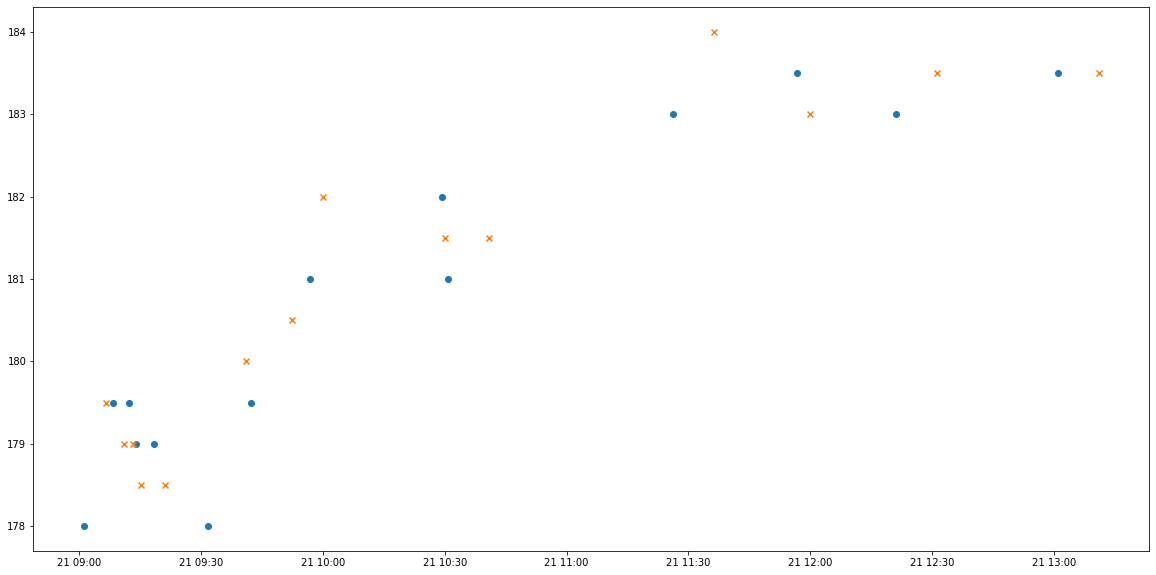

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-13/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005001
daily_low  185.0
daily_low * theta 185.92499999999998
bid1_p:  187.0
# sell:  66   # buy:  6
bid1_q:  3   bid2_q:  70
進場時間： 90305097 
  sell price at  187.0
stop profit
出場時間： 90337881
buy at 186.5
get 0.5
------------------------------
daily_low  184.5
daily_low * theta 185.42249999999999
bid1_p:  185.5
# sell:  44   # buy:  21
bid1_q:  1   bid2_q:  35
進場時間： 91200901 
  sell price at  185.5
stop profit
出場時間： 91617005
buy at 185.0
get 0.5
------------------------------
daily_low  183.0
daily_low * theta 183.915
bid1_p:  184.5
# sell:  72   # buy:  16
bid1_q:  26   bid2_q:  67
進場時間： 102315562 
  sell price at  184.5
time out
出場時間： 103320658
buy at 185.0
get -0.5
------------------------------
daily_low  183.0
daily_l

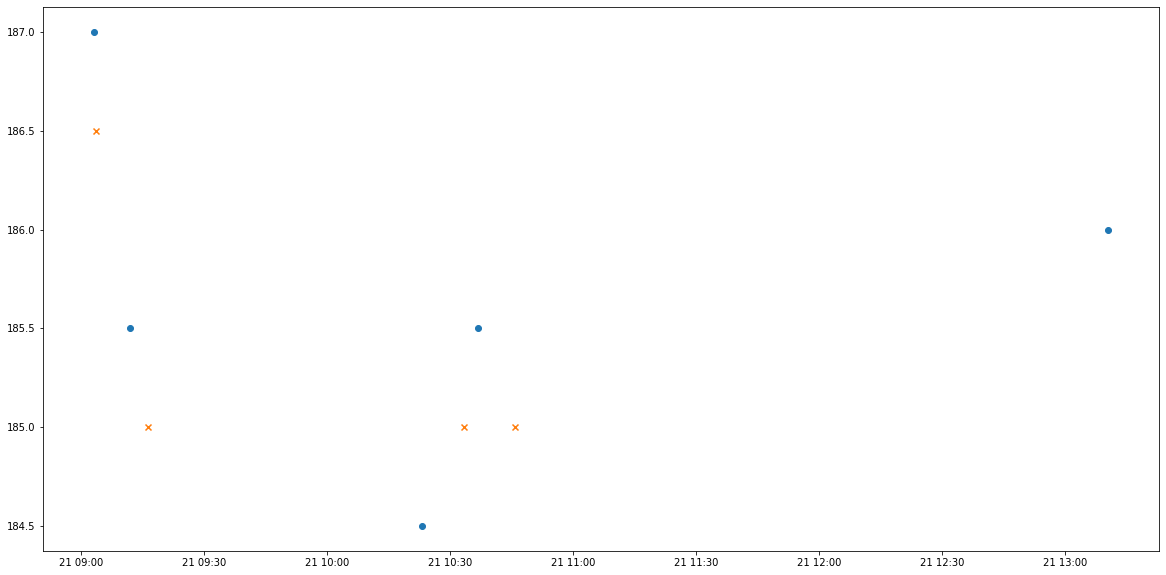

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-14/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90006312
daily_low  183.5
daily_low * theta 184.4175
bid1_p:  184.5
# sell:  117   # buy:  0
bid1_q:  28   bid2_q:  126
進場時間： 93008918 
  sell price at  184.5
time out
出場時間： 94015207
buy at 185.0
get -0.5
------------------------------
----------Result Report--------------
profit:  -0.5


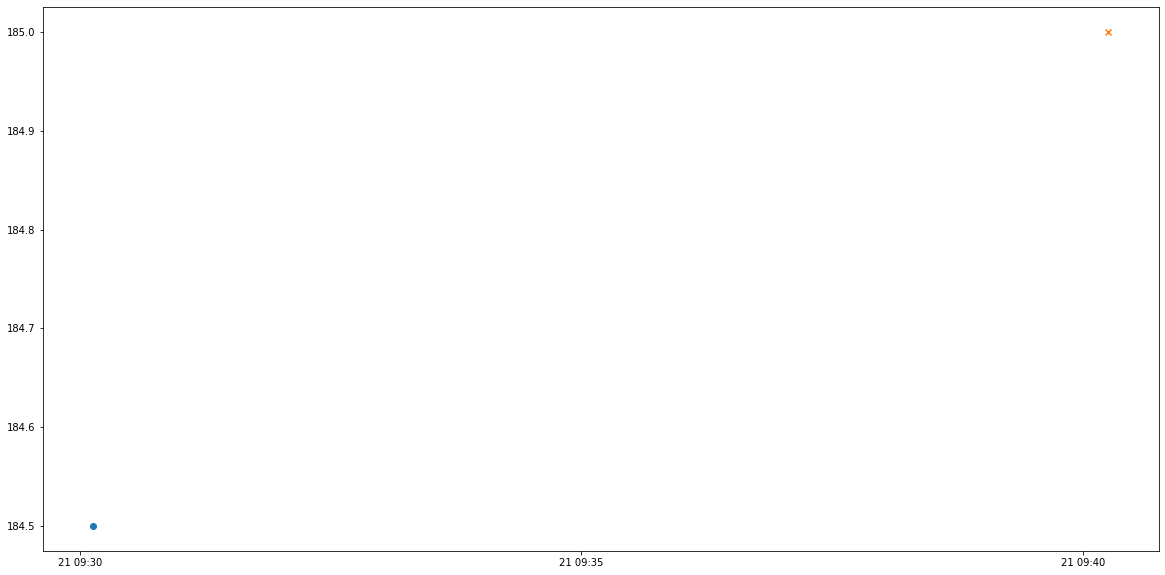

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-15/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90008418
------Weird price!!!!!---------
At time:  90138465
tick_row_price 186.0
ask_1_p 186.5
bid_1_p 185.5
----------Result Report--------------
profit:  0


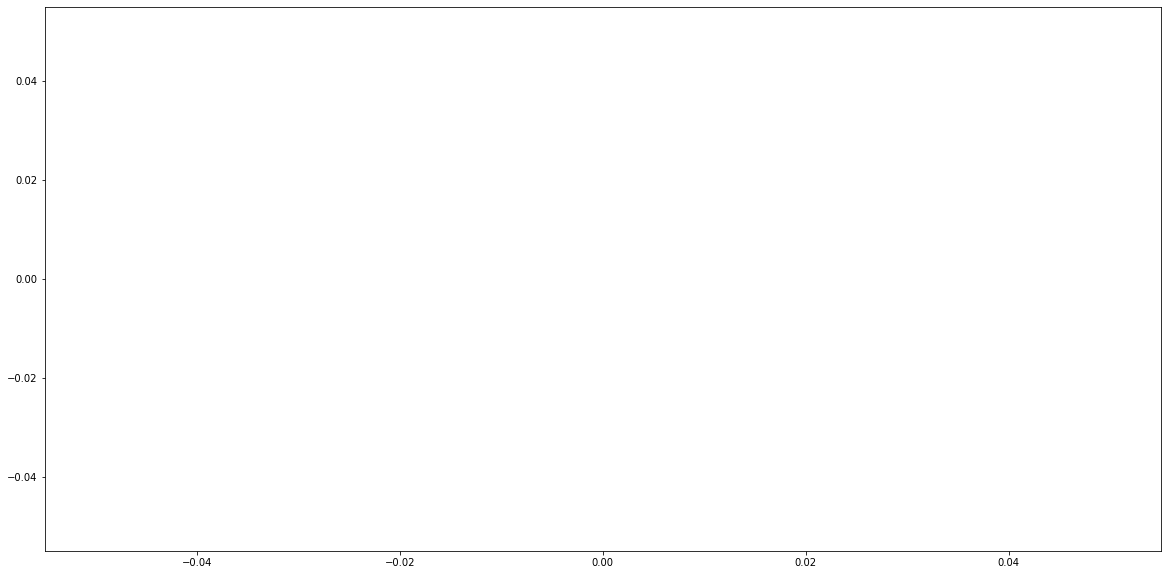

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-16/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90007705
daily_low  182.0
daily_low * theta 182.90999999999997
bid1_p:  183.5
# sell:  213   # buy:  0
bid1_q:  1   bid2_q:  173
進場時間： 125534206 
  sell price at  183.5
time out
出場時間： 130000192
buy at 184.0
get -0.5
------------------------------
----------Result Report--------------
profit:  -0.5


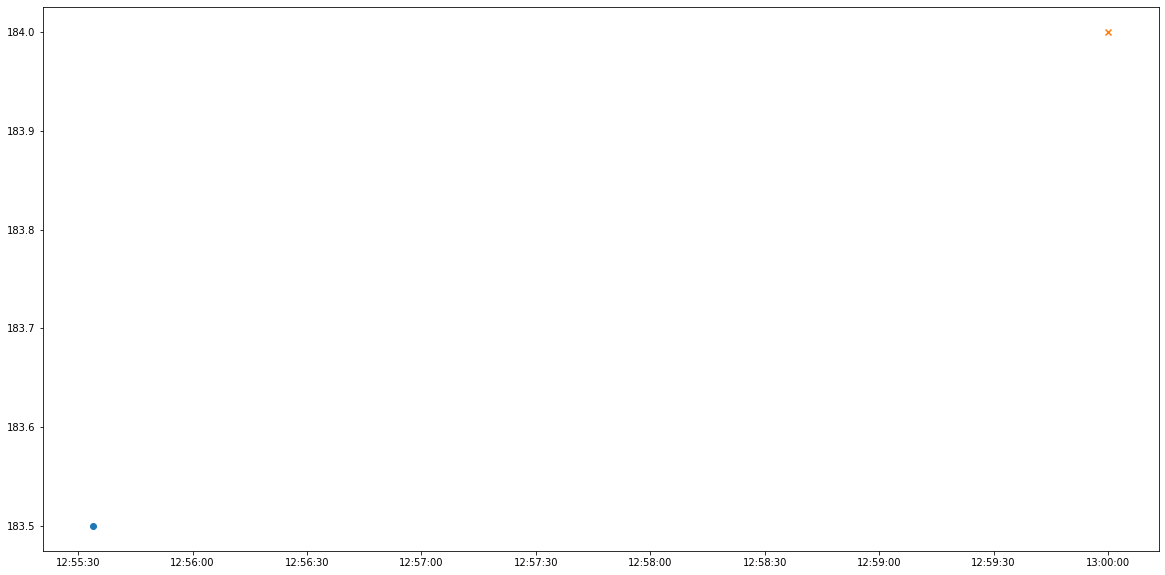

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-17/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90008531
daily_low  184.5
daily_low * theta 185.42249999999999
bid1_p:  185.5
# sell:  47   # buy:  15
bid1_q:  17   bid2_q:  22
進場時間： 90816600 
  sell price at  185.5
time out
出場時間： 91818398
buy at 186.0
get -0.5
------------------------------
daily_low  184.5
daily_low * theta 185.42249999999999
bid1_p:  185.5
# sell:  214   # buy:  0
bid1_q:  33   bid2_q:  171
進場時間： 91953855 
  sell price at  185.5
stop profit
出場時間： 91953855
buy at 185.0
get 0.5
------------------------------
daily_low  184.5
daily_low * theta 185.42249999999999
bid1_p:  186.5
# sell:  104   # buy:  2
bid1_q:  80   bid2_q:  58
進場時間： 122507670 
  sell price at  186.5
stop profit
出場時間： 122735828
buy at 186.0
get 0.5
------------------------------
---------

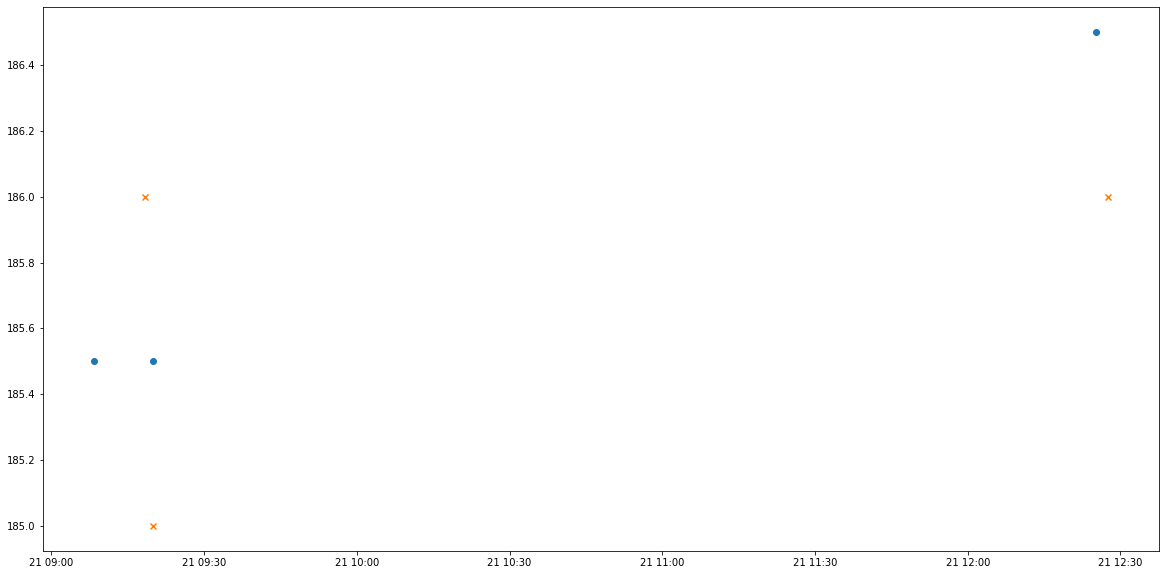

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-20/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005056
daily_low  179.5
daily_low * theta 180.39749999999998
bid1_p:  181.0
# sell:  113   # buy:  3
bid1_q:  109   bid2_q:  21
進場時間： 100258848 
  sell price at  181.0
stop profit
出場時間： 100344292
buy at 180.5
get 0.5
------------------------------
daily_low  179.0
daily_low * theta 179.89499999999998
bid1_p:  181.5
# sell:  88   # buy:  35
bid1_q:  31   bid2_q:  81
進場時間： 130924230 
  sell price at  181.5
time out
出場時間： 131928500
buy at 181.5
get 0.0
------------------------------
----------Result Report--------------
profit:  0.5


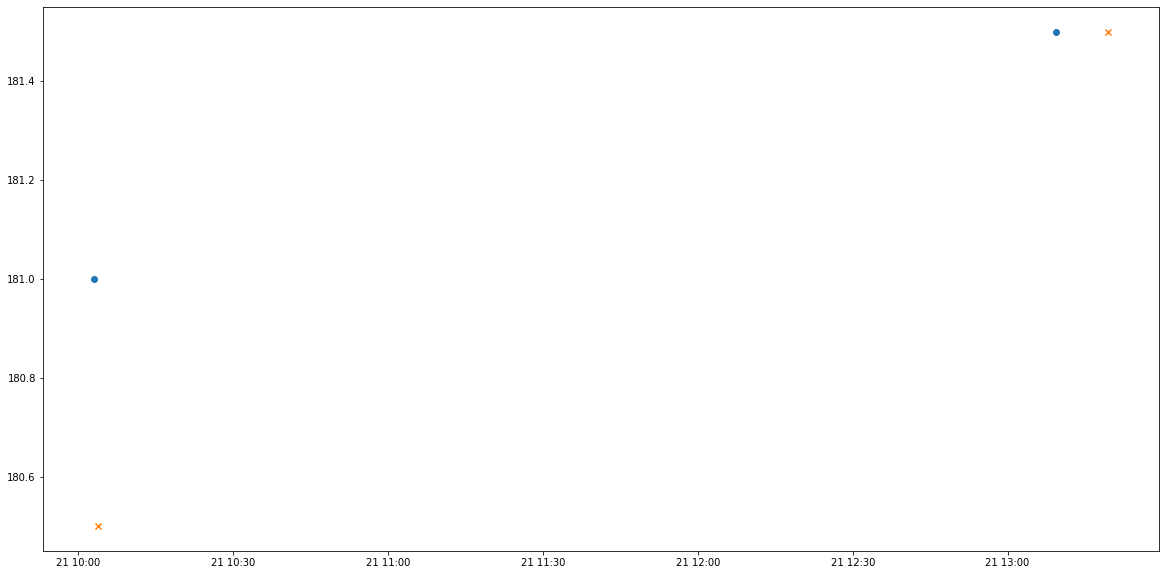

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-21/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90006076
daily_low  184.0
daily_low * theta 184.92
bid1_p:  186.5
# sell:  54   # buy:  13
bid1_q:  33   bid2_q:  33
進場時間： 91211718 
  sell price at  186.5
stop loss
出場時間： 91930214
buy at 188.0
get -1.5
------------------------------
daily_low  184.0
daily_low * theta 184.92
bid1_p:  188.0
# sell:  214   # buy:  81
bid1_q:  1   bid2_q:  201
進場時間： 92501310 
  sell price at  188.0
stop profit
出場時間： 92759828
buy at 187.5
get 0.5
------------------------------
daily_low  184.0
daily_low * theta 184.92
bid1_p:  188.0
# sell:  75   # buy:  6
bid1_q:  1   bid2_q:  52
進場時間： 93440131 
  sell price at  188.0
stop profit
出場時間： 93651569
buy at 187.5
get 0.5
------------------------------
daily_low  184.0
daily_low * theta 184.92
bid1_p

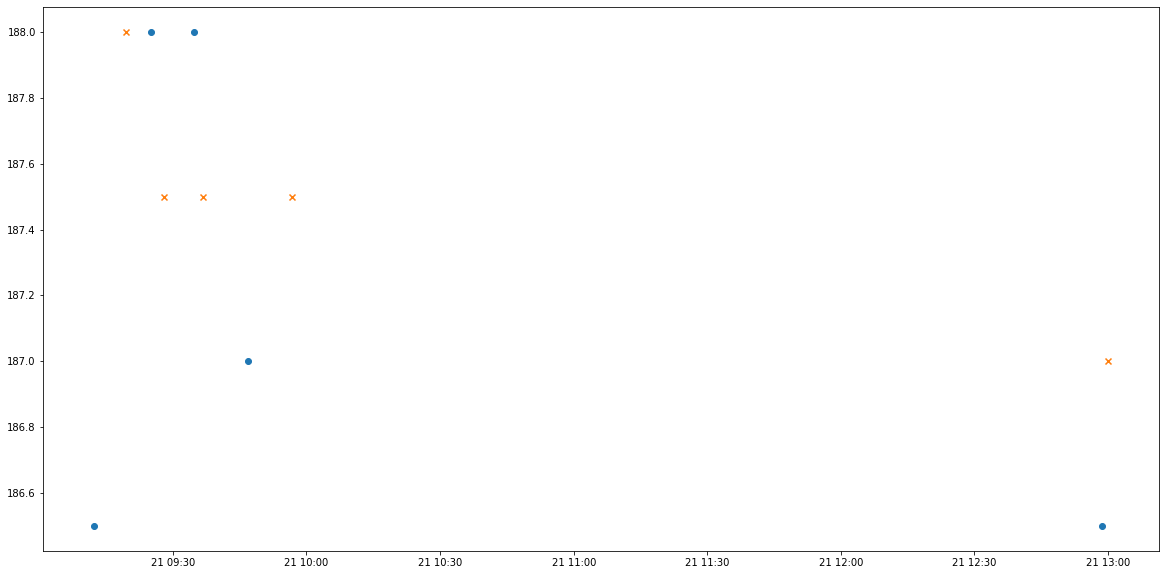

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-22/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004909
daily_low  186.0
daily_low * theta 186.92999999999998
bid1_p:  190.0
# sell:  407   # buy:  3
bid1_q:  158   bid2_q:  368
進場時間： 91905256 
  sell price at  190.0
stop loss
出場時間： 92045233
buy at 191.5
get -1.5
------------------------------
daily_low  186.0
daily_low * theta 186.92999999999998
bid1_p:  191.0
# sell:  152   # buy:  51
bid1_q:  87   bid2_q:  78
進場時間： 92323324 
  sell price at  191.0
time out
出場時間： 93323489
buy at 191.0
get 0.0
------------------------------
daily_low  186.0
daily_low * theta 186.92999999999998
bid1_p:  192.0
# sell:  240   # buy:  0
bid1_q:  63   bid2_q:  243
進場時間： 110421644 
  sell price at  192.0
time out
出場時間： 111428326
buy at 192.0
get 0.0
------------------------------
----------R

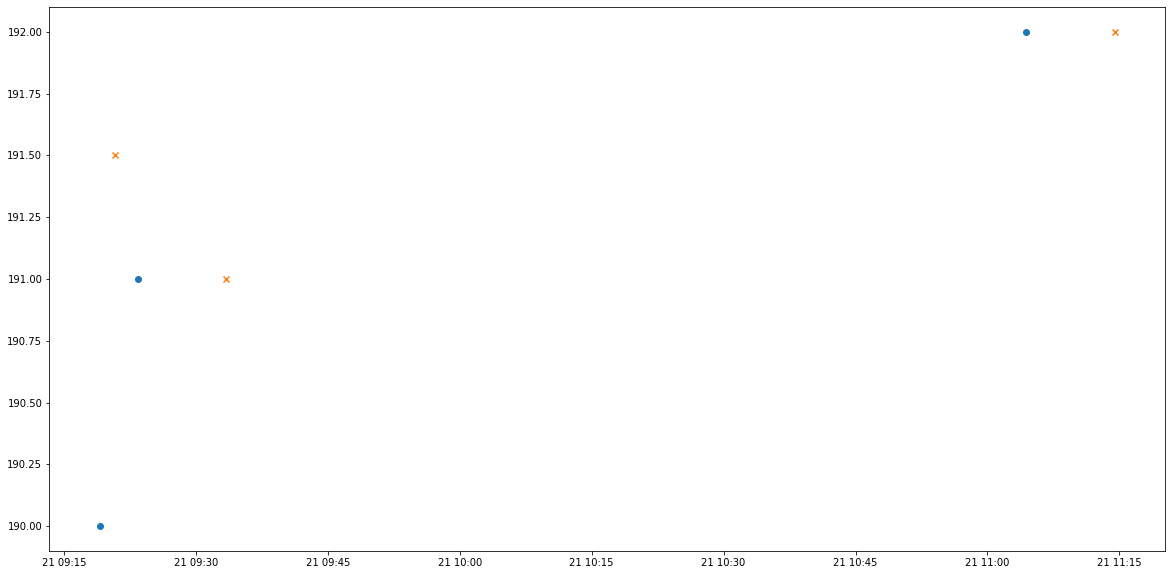

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-23/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004014
daily_low  188.5
daily_low * theta 189.44249999999997
bid1_p:  189.5
# sell:  62   # buy:  11
bid1_q:  1   bid2_q:  18
進場時間： 90802974 
  sell price at  189.5
time out
出場時間： 91804274
buy at 189.5
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


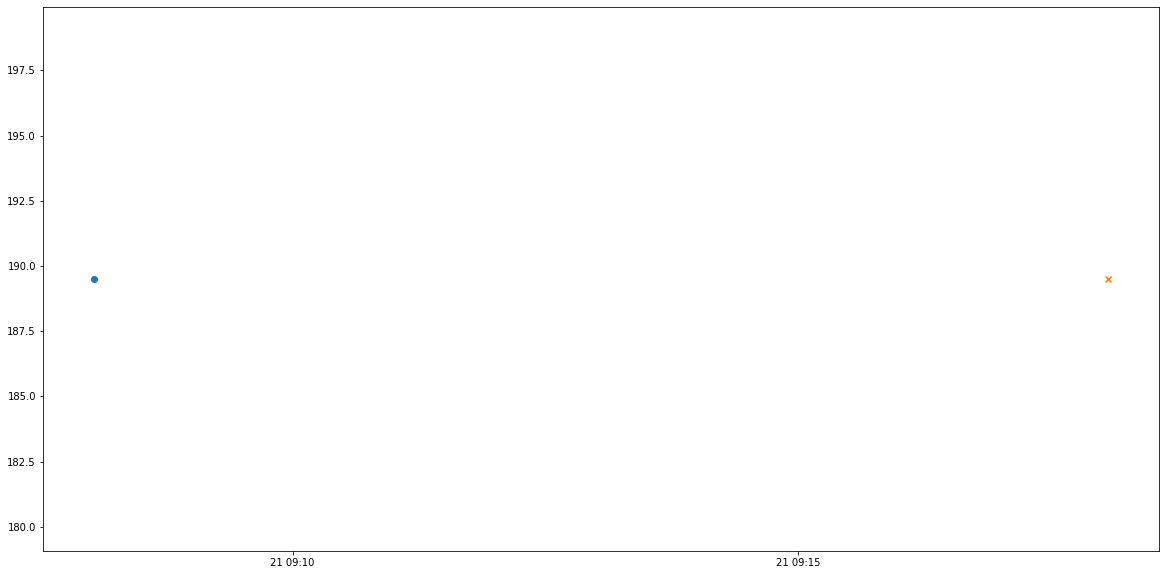

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-24/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005282
daily_low  187.0
daily_low * theta 187.93499999999997
bid1_p:  188.0
# sell:  29   # buy:  4
bid1_q:  20   bid2_q:  11
進場時間： 90308577 
  sell price at  188.0
time out
出場時間： 91308764
buy at 188.5
get -0.5
------------------------------
daily_low  187.0
daily_low * theta 187.93499999999997
bid1_p:  188.0
# sell:  60   # buy:  9
bid1_q:  31   bid2_q:  27
進場時間： 91420168 
  sell price at  188.0
stop profit
出場時間： 91443824
buy at 187.5
get 0.5
------------------------------
daily_low  187.0
daily_low * theta 187.93499999999997
bid1_p:  188.0
# sell:  100   # buy:  1
bid1_q:  20   bid2_q:  107
進場時間： 94409521 
  sell price at  188.0
stop profit
出場時間： 94415557
buy at 187.5
get 0.5
------------------------------
----------Res

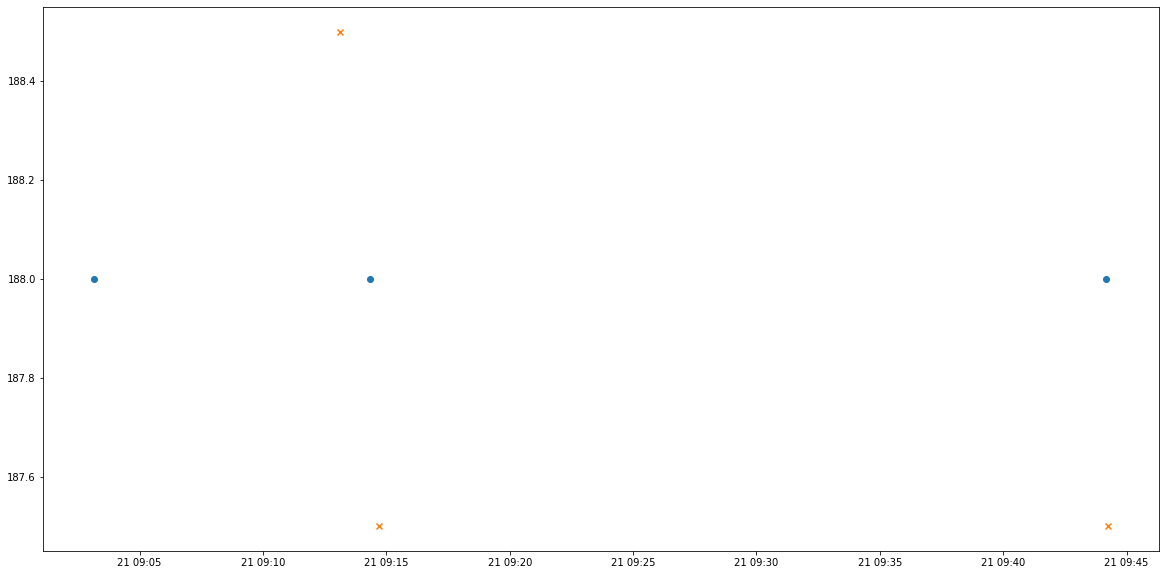

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-27/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005982
daily_low  187.0
daily_low * theta 187.93499999999997
bid1_p:  188.0
# sell:  27   # buy:  8
bid1_q:  1   bid2_q:  25
進場時間： 90132120 
  sell price at  188.0
time out
出場時間： 91133324
buy at 188.5
get -0.5
------------------------------
daily_low  186.5
daily_low * theta 187.43249999999998
bid1_p:  189.0
# sell:  35   # buy:  12
bid1_q:  24   bid2_q:  21
進場時間： 95946231 
  sell price at  189.0
time out
出場時間： 100001220
buy at 189.0
get 0.0
------------------------------
daily_low  186.5
daily_low * theta 187.43249999999998
bid1_p:  188.0
# sell:  92   # buy:  8
bid1_q:  45   bid2_q:  51
進場時間： 100638879 
  sell price at  188.0
stop profit
出場時間： 100915587
buy at 187.5
get 0.5
------------------------------
daily_low  186.

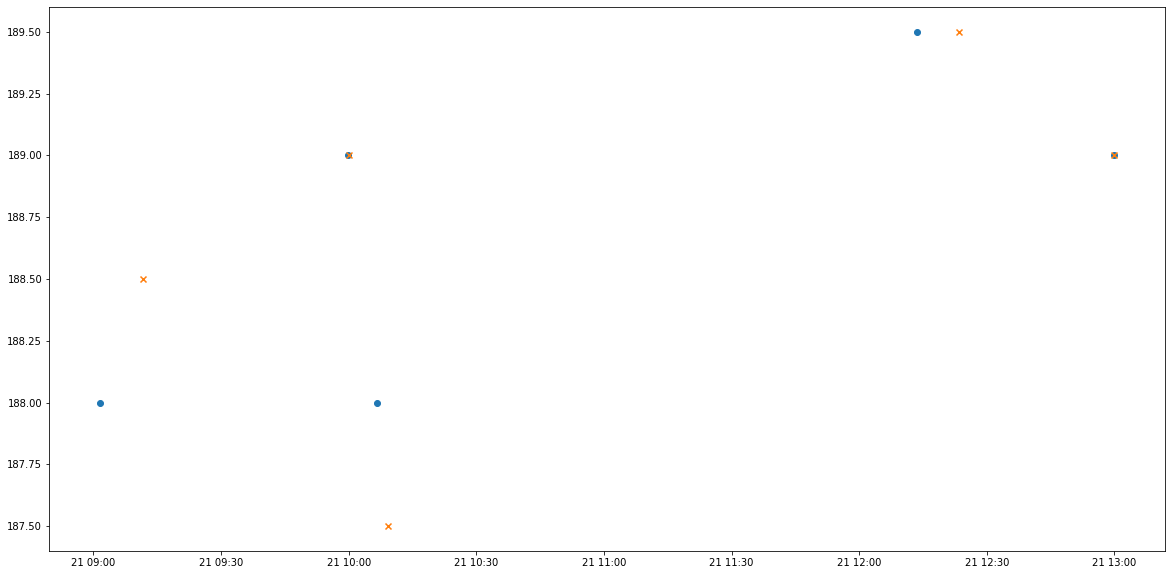

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-28/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004844
daily_low  188.5
daily_low * theta 189.44249999999997
bid1_p:  190.0
# sell:  126   # buy:  14
bid1_q:  59   bid2_q:  38
進場時間： 90240867 
  sell price at  190.0
stop profit
出場時間： 90852948
buy at 189.5
get 0.5
------------------------------
daily_low  188.5
daily_low * theta 189.44249999999997
bid1_p:  191.5
# sell:  28   # buy:  0
bid1_q:  17   bid2_q:  14
進場時間： 91731060 
  sell price at  191.5
stop profit
出場時間： 91807080
buy at 191.0
get 0.5
------------------------------
daily_low  188.5
daily_low * theta 189.44249999999997
bid1_p:  191.0
# sell:  31   # buy:  5
bid1_q:  5   bid2_q:  36
進場時間： 92604491 
  sell price at  191.0
stop profit
出場時間： 92756907
buy at 190.5
get 0.5
------------------------------
daily_low  1

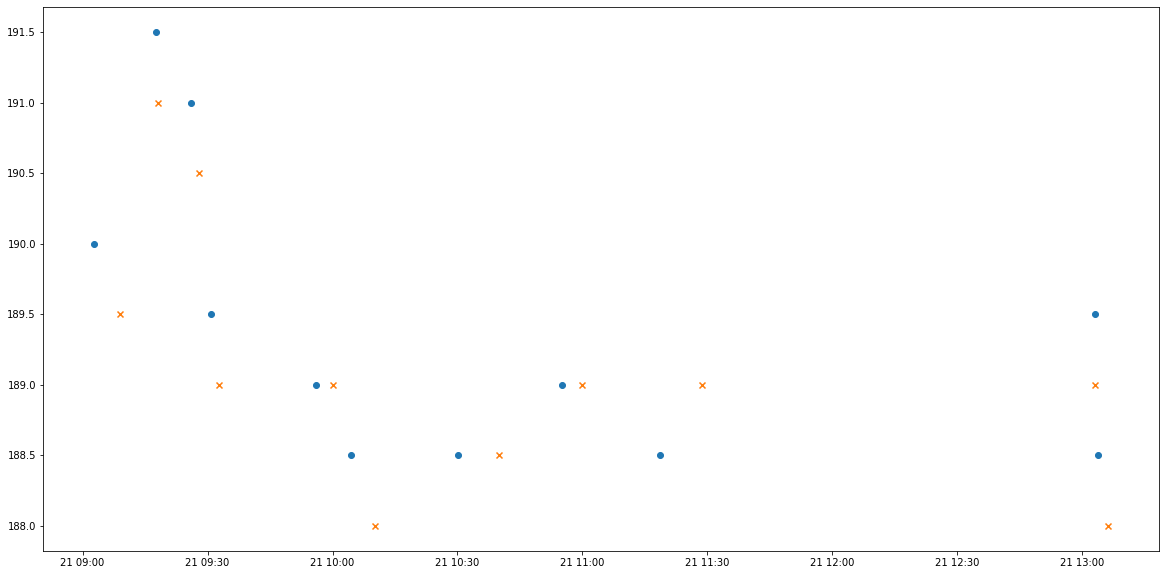

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-29/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005864
daily_low  185.5
daily_low * theta 186.42749999999998
bid1_p:  186.5
# sell:  27   # buy:  7
bid1_q:  4   bid2_q:  21
進場時間： 90108985 
  sell price at  186.5
time out
出場時間： 91112052
buy at 187.5
get -1.0
------------------------------
daily_low  185.5
daily_low * theta 186.42749999999998
bid1_p:  186.5
# sell:  77   # buy:  1
bid1_q:  19   bid2_q:  63
進場時間： 91953066 
  sell price at  186.5
stop profit
出場時間： 92816878
buy at 186.0
get 0.5
------------------------------
daily_low  183.5
daily_low * theta 184.4175
bid1_p:  190.0
# sell:  54   # buy:  14
bid1_q:  2   bid2_q:  34
進場時間： 102859770 
  sell price at  190.0
time out
出場時間： 103900638
buy at 190.5
get -0.5
------------------------------
daily_low  183.5
daily_low

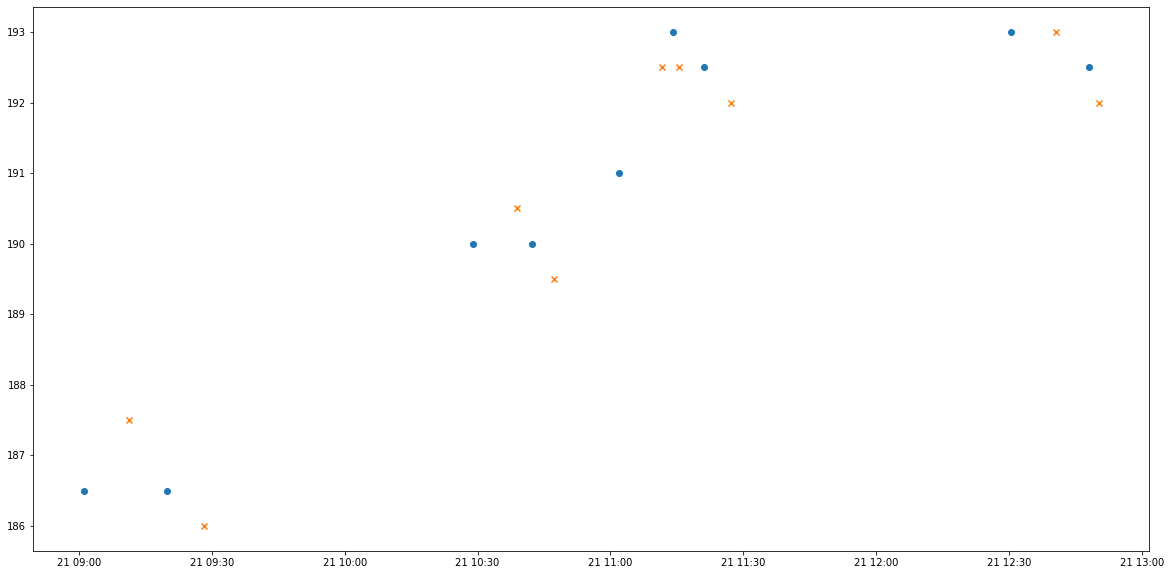

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-30/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90003825
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  197.0
# sell:  33   # buy:  5
bid1_q:  24   bid2_q:  10
進場時間： 90125288 
  sell price at  197.0
stop profit
出場時間： 90226376
buy at 196.5
get 0.5
------------------------------
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  196.0
# sell:  30   # buy:  3
bid1_q:  4   bid2_q:  35
進場時間： 90256801 
  sell price at  196.0
stop profit
出場時間： 90317227
buy at 195.5
get 0.5
------------------------------
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  197.0
# sell:  27   # buy:  9
bid1_q:  15   bid2_q:  11
進場時間： 90536301 
  sell price at  197.0
stop loss
出場時間： 90559275
buy at 198.5
get -1.5
------------------------------
daily_low  194.

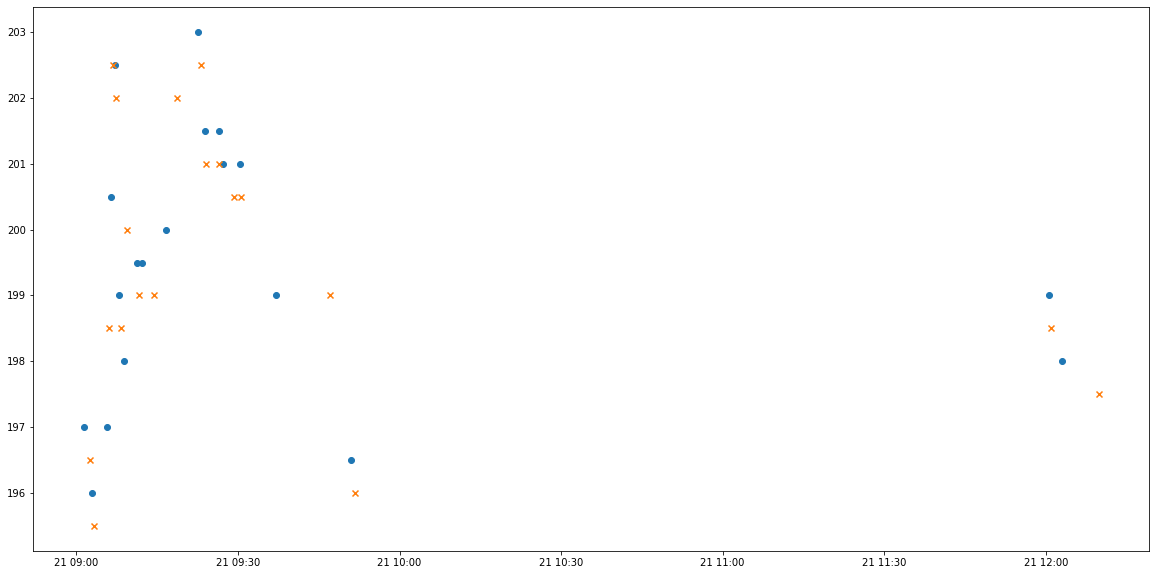

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-07-31/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90002216
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  195.5
# sell:  20   # buy:  9
bid1_q:  5   bid2_q:  13
進場時間： 90338092 
  sell price at  195.5
stop loss
出場時間： 90720040
buy at 197.0
get -1.5
------------------------------
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  197.5
# sell:  19   # buy:  4
bid1_q:  6   bid2_q:  15
進場時間： 91154295 
  sell price at  197.5
time out
出場時間： 92154885
buy at 198.5
get -1.0
------------------------------
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  197.5
# sell:  87   # buy:  2
bid1_q:  40   bid2_q:  61
進場時間： 92217116 
  sell price at  197.5
stop loss
出場時間： 92842857
buy at 199.0
get -1.5
------------------------------
daily_low  194.5
da

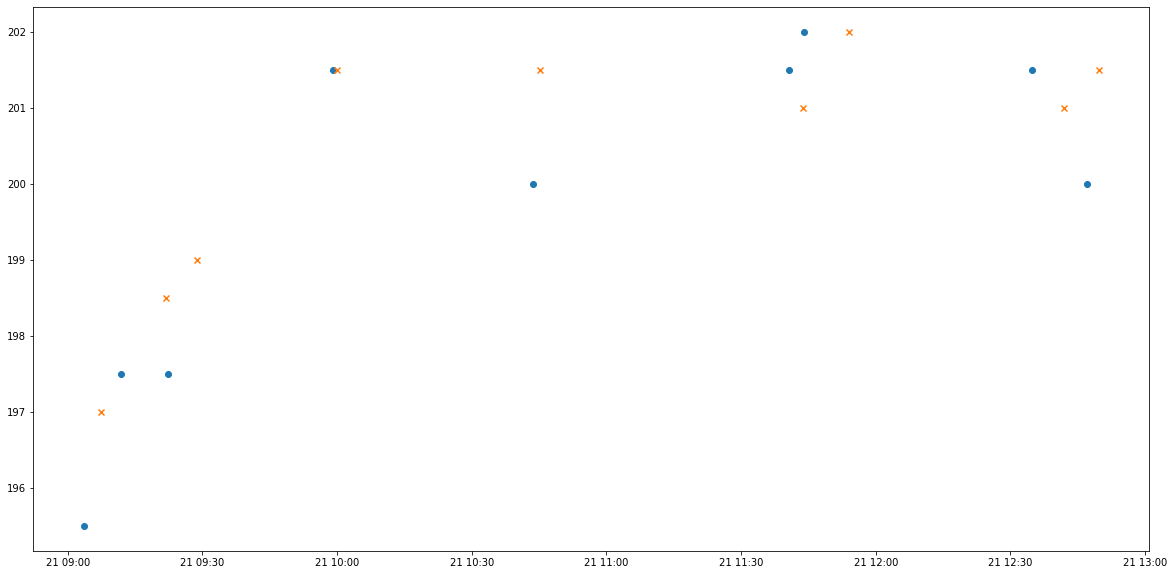

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-03/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90003400
daily_low  201.0
daily_low * theta 202.00499999999997
bid1_p:  203.0
# sell:  109   # buy:  8
bid1_q:  50   bid2_q:  57
進場時間： 90223473 
  sell price at  203.0
stop profit
出場時間： 90617734
buy at 202.5
get 0.5
------------------------------
daily_low  201.0
daily_low * theta 202.00499999999997
bid1_p:  203.0
# sell:  91   # buy:  8
bid1_q:  47   bid2_q:  46
進場時間： 91014739 
  sell price at  203.0
stop loss
出場時間： 91537128
buy at 205.5
get -2.5
------------------------------
daily_low  201.0
daily_low * theta 202.00499999999997
bid1_p:  204.5
# sell:  54   # buy:  6
bid1_q:  36   bid2_q:  35
進場時間： 91934869 
  sell price at  204.5
stop profit
出場時間： 92914689
buy at 204.0
get 0.5
------------------------------
daily_low  20

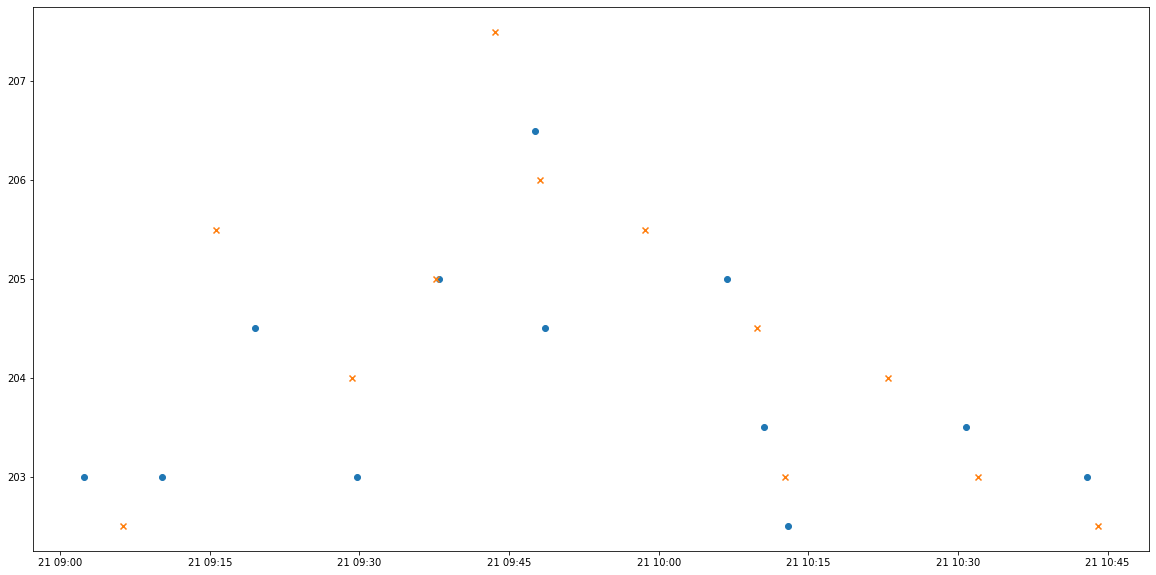

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-04/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90003066
daily_low  202.5
daily_low * theta 203.5125
bid1_p:  205.5
# sell:  53   # buy:  3
bid1_q:  15   bid2_q:  55
進場時間： 91146867 
  sell price at  205.5
stop profit
出場時間： 91421993
buy at 205.0
get 0.5
------------------------------
daily_low  202.5
daily_low * theta 203.5125
bid1_p:  204.5
# sell:  71   # buy:  10
bid1_q:  11   bid2_q:  31
進場時間： 91452030 
  sell price at  204.5
time out
出場時間： 92452469
buy at 204.5
get 0.0
------------------------------
daily_low  202.5
daily_low * theta 203.5125
bid1_p:  204.5
# sell:  59   # buy:  16
bid1_q:  55   bid2_q:  23
進場時間： 92817298 
  sell price at  204.5
time out
出場時間： 93819449
buy at 204.5
get 0.0
------------------------------
daily_low  202.5
daily_low * theta 203.5125
bid

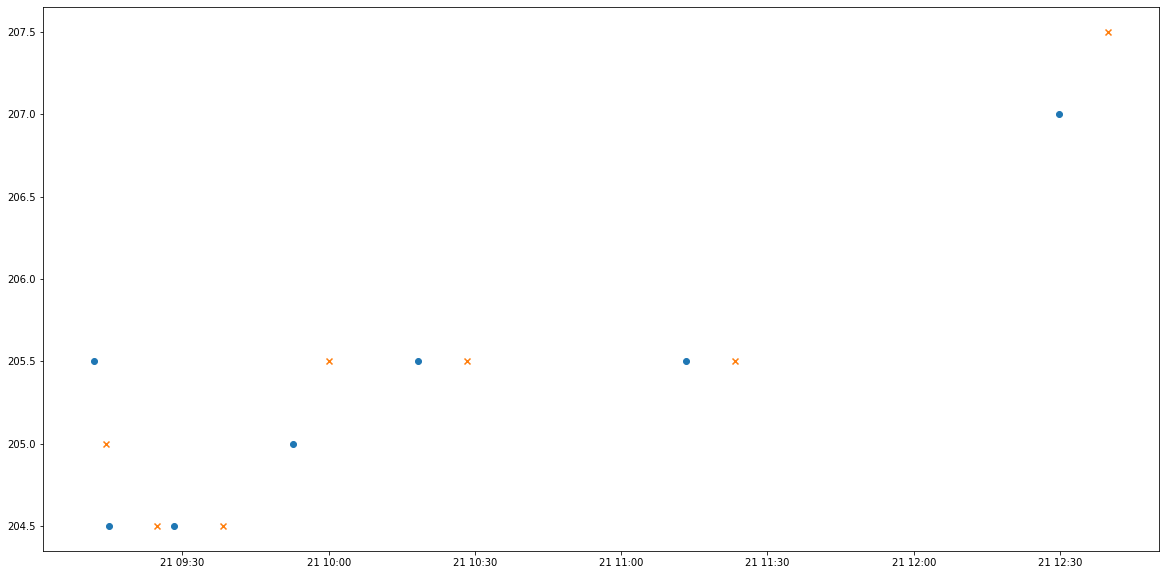

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-05/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004053
daily_low  207.0
daily_low * theta 208.03499999999997
bid1_p:  208.5
# sell:  47   # buy:  4
bid1_q:  38   bid2_q:  24
進場時間： 91204271 
  sell price at  208.5
stop profit
出場時間： 91240663
buy at 208.0
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


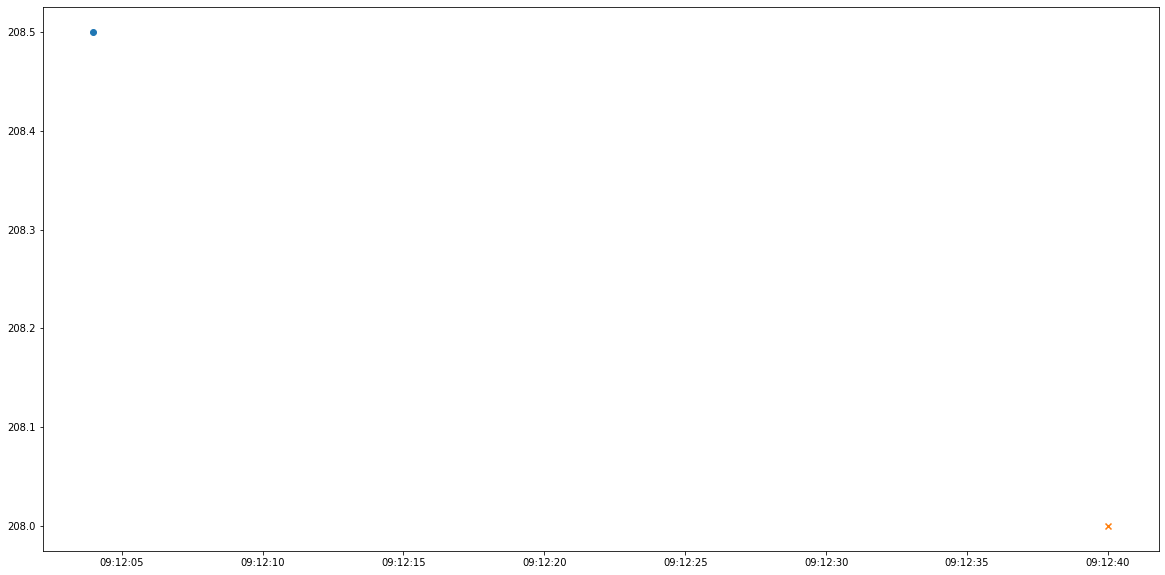

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-06/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004169
daily_low  204.5
daily_low * theta 205.52249999999998
bid1_p:  206.0
# sell:  50   # buy:  10
bid1_q:  2   bid2_q:  48
進場時間： 90515220 
  sell price at  206.0
stop profit
出場時間： 90529708
buy at 205.5
get 0.5
------------------------------
daily_low  204.5
daily_low * theta 205.52249999999998
bid1_p:  206.5
# sell:  21   # buy:  9
bid1_q:  11   bid2_q:  12
進場時間： 90658566 
  sell price at  206.5
stop profit
出場時間： 90950249
buy at 206.0
get 0.5
------------------------------
daily_low  200.0
daily_low * theta 200.99999999999997
bid1_p:  203.5
# sell:  59   # buy:  26
bid1_q:  46   bid2_q:  23
進場時間： 111334504 
  sell price at  203.5
time out
出場時間： 112335457
buy at 204.5
get -1.0
------------------------------
daily_low  2

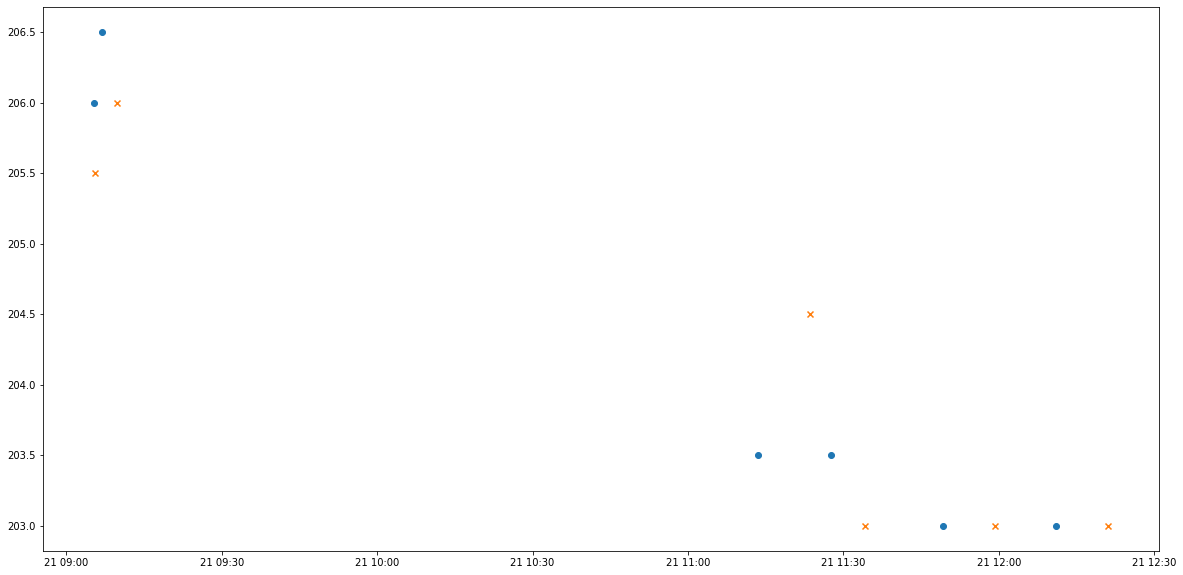

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-07/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004709
daily_low  200.0
daily_low * theta 200.99999999999997
bid1_p:  201.0
# sell:  195   # buy:  0
bid1_q:  24   bid2_q:  232
進場時間： 101330698 
  sell price at  201.0
time out
出場時間： 102331183
buy at 201.0
get 0.0
------------------------------
----------Result Report--------------
profit:  0.0


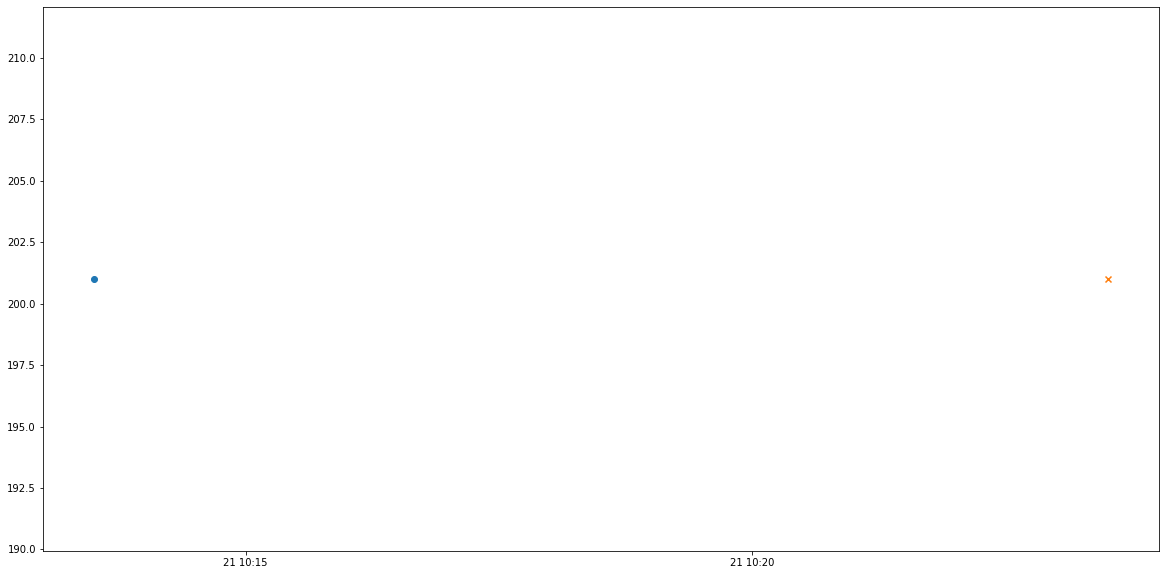

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-10/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005927
daily_low  200.0
daily_low * theta 200.99999999999997
bid1_p:  201.0
# sell:  94   # buy:  2
bid1_q:  24   bid2_q:  81
進場時間： 91405106 
  sell price at  201.0
time out
出場時間： 92408737
buy at 202.0
get -1.0
------------------------------
daily_low  200.0
daily_low * theta 200.99999999999997
bid1_p:  201.5
# sell:  99   # buy:  0
bid1_q:  28   bid2_q:  80
進場時間： 95404924 
  sell price at  201.5
stop profit
出場時間： 95659155
buy at 201.0
get 0.5
------------------------------
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  201.5
# sell:  85   # buy:  4
bid1_q:  80   bid2_q:  29
進場時間： 130914010 
  sell price at  201.5
stop profit
出場時間： 131642240
buy at 201.0
get 0.5
------------------------------
----------Res

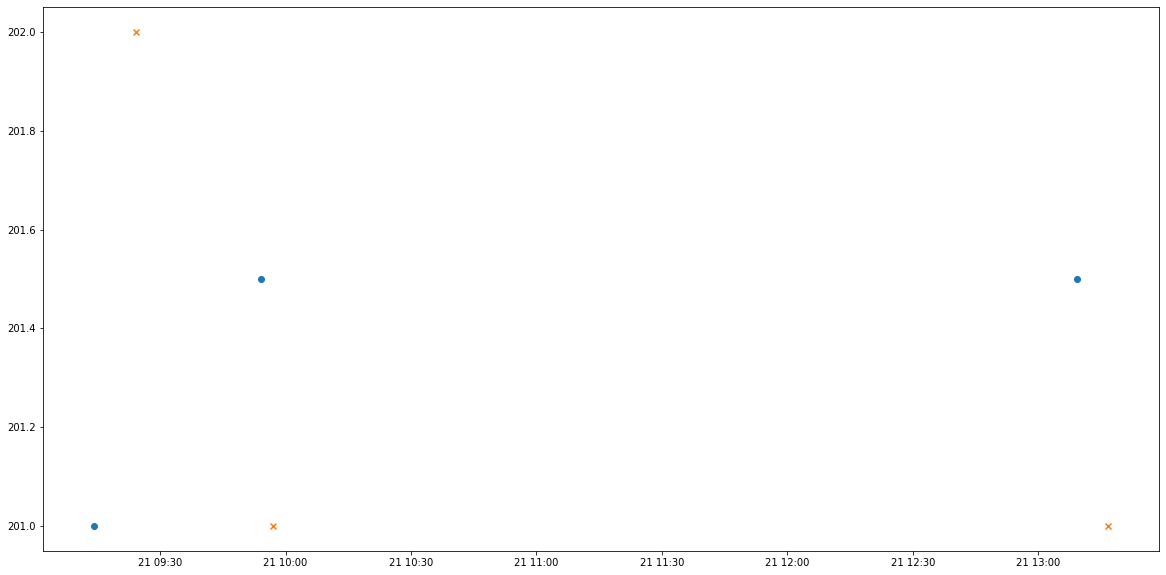

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-11/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005450
daily_low  202.0
daily_low * theta 203.01
bid1_p:  203.5
# sell:  45   # buy:  22
bid1_q:  10   bid2_q:  17
進場時間： 90842743 
  sell price at  203.5
stop profit
出場時間： 91317679
buy at 203.0
get 0.5
------------------------------
daily_low  200.5
daily_low * theta 201.50249999999997
bid1_p:  202.5
# sell:  82   # buy:  0
bid1_q:  1   bid2_q:  75
進場時間： 101334691 
  sell price at  202.5
time out
出場時間： 102335757
buy at 202.5
get 0.0
------------------------------
----------Result Report--------------
profit:  0.5


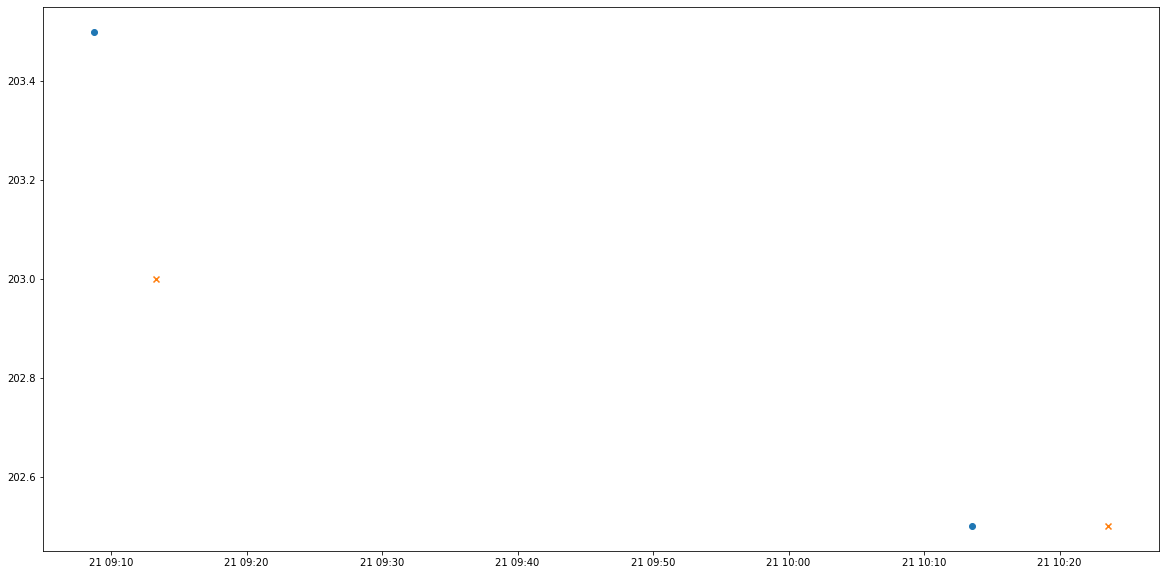

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-12/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005695
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  201.0
# sell:  19   # buy:  3
bid1_q:  12   bid2_q:  6
進場時間： 90408251 
  sell price at  201.0
stop profit
出場時間： 90505290
buy at 200.5
get 0.5
------------------------------
daily_low  196.0
daily_low * theta 196.98
bid1_p:  197.5
# sell:  73   # buy:  3
bid1_q:  30   bid2_q:  23
進場時間： 93146866 
  sell price at  197.5
stop profit
出場時間： 93509337
buy at 197.0
get 0.5
------------------------------
daily_low  194.0
daily_low * theta 194.96999999999997
bid1_p:  195.5
# sell:  29   # buy:  3
bid1_q:  5   bid2_q:  27
進場時間： 100110981 
  sell price at  195.5
stop profit
出場時間： 100120618
buy at 195.0
get 0.5
------------------------------
daily_low  194.0
daily_lo

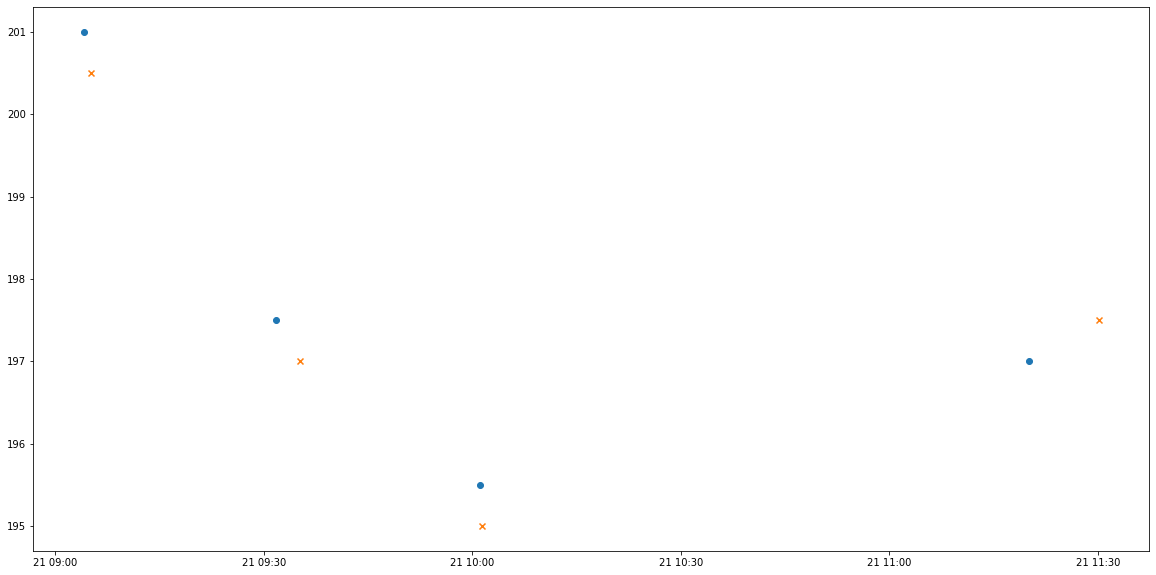

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-13/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004626
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  203.0
# sell:  47   # buy:  22
bid1_q:  21   bid2_q:  9
進場時間： 91235152 
  sell price at  203.0
stop profit
出場時間： 91625957
buy at 202.5
get 0.5
------------------------------
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  201.5
# sell:  121   # buy:  4
bid1_q:  28   bid2_q:  25
進場時間： 91657830 
  sell price at  201.5
stop profit
出場時間： 91813236
buy at 201.0
get 0.5
------------------------------
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  200.5
# sell:  47   # buy:  5
bid1_q:  15   bid2_q:  43
進場時間： 91845311 
  sell price at  200.5
stop profit
出場時間： 92718894
buy at 200.0
get 0.5
------------------------------
daily_low  1

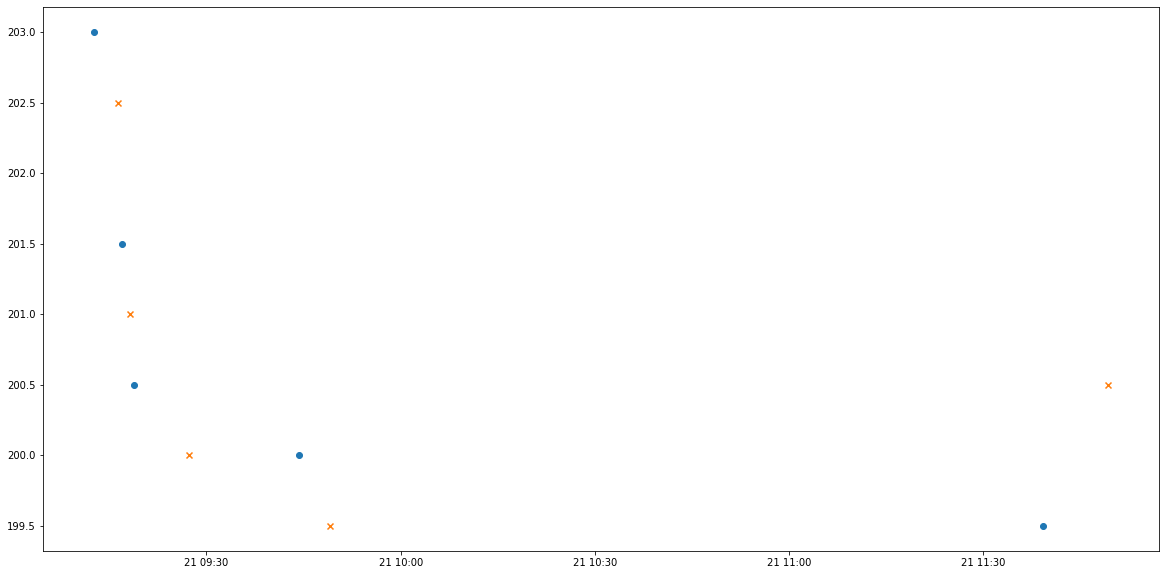

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-14/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90005949
----------Result Report--------------
profit:  0


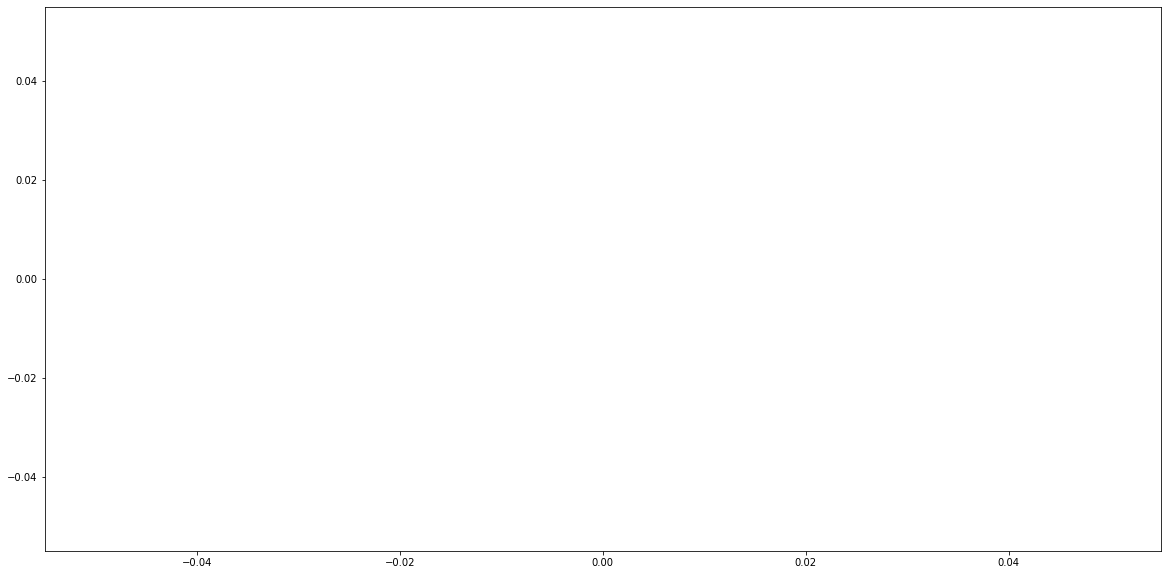

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-17/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90008136
daily_low  201.0
daily_low * theta 202.00499999999997
bid1_p:  203.5
# sell:  23   # buy:  9
bid1_q:  1   bid2_q:  10
進場時間： 92701303 
  sell price at  203.5
stop profit
出場時間： 93356307
buy at 203.0
get 0.5
------------------------------
daily_low  201.0
daily_low * theta 202.00499999999997
bid1_p:  203.0
# sell:  107   # buy:  3
bid1_q:  5   bid2_q:  124
進場時間： 95817051 
  sell price at  203.0
time out
出場時間： 100001242
buy at 203.0
get 0.0
------------------------------
daily_low  201.0
daily_low * theta 202.00499999999997
bid1_p:  203.0
# sell:  34   # buy:  1
bid1_q:  7   bid2_q:  36
進場時間： 100958783 
  sell price at  203.0
time out
出場時間： 101959897
buy at 204.0
get -1.0
------------------------------
daily_low  201.0

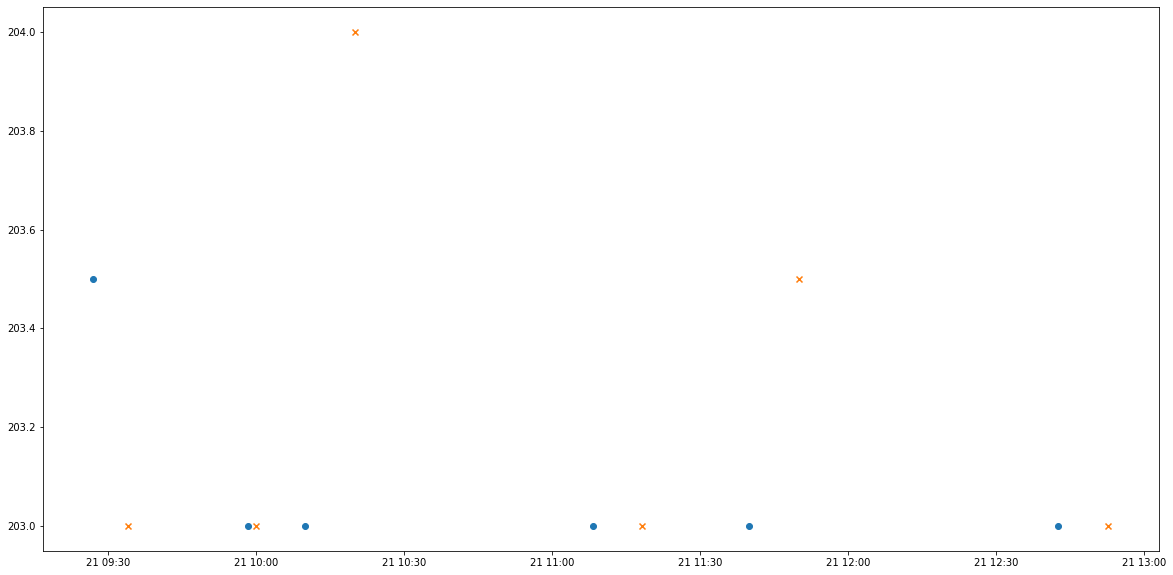

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-18/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90009459
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  202.5
# sell:  59   # buy:  27
bid1_q:  2   bid2_q:  76
進場時間： 105202996 
  sell price at  202.5
time out
出場時間： 110004111
buy at 202.5
get 0.0
------------------------------
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  202.0
# sell:  68   # buy:  0
bid1_q:  4   bid2_q:  58
進場時間： 110143327 
  sell price at  202.0
stop profit
出場時間： 110555972
buy at 201.5
get 0.5
------------------------------
daily_low  199.5
daily_low * theta 200.49749999999997
bid1_p:  201.0
# sell:  60   # buy:  0
bid1_q:  31   bid2_q:  27
進場時間： 110635132 
  sell price at  201.0
time out
出場時間： 111636774
buy at 202.0
get -1.0
------------------------------
----------Res

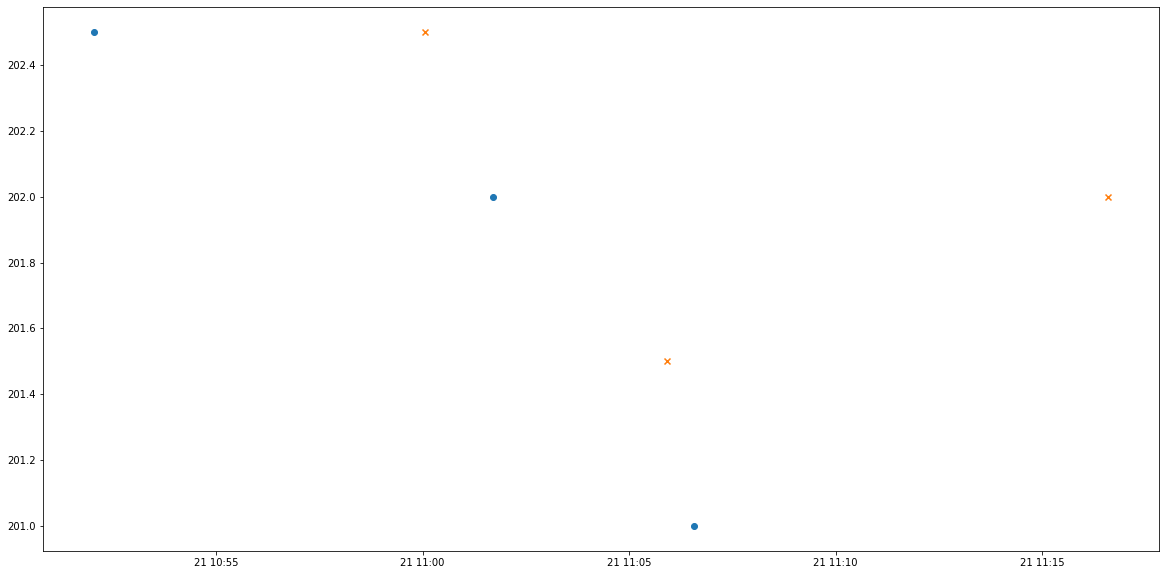

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-19/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90009619
daily_low  202.5
daily_low * theta 203.5125
bid1_p:  204.0
# sell:  35   # buy:  6
bid1_q:  3   bid2_q:  26
進場時間： 90643727 
  sell price at  204.0
stop profit
出場時間： 91045678
buy at 203.5
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


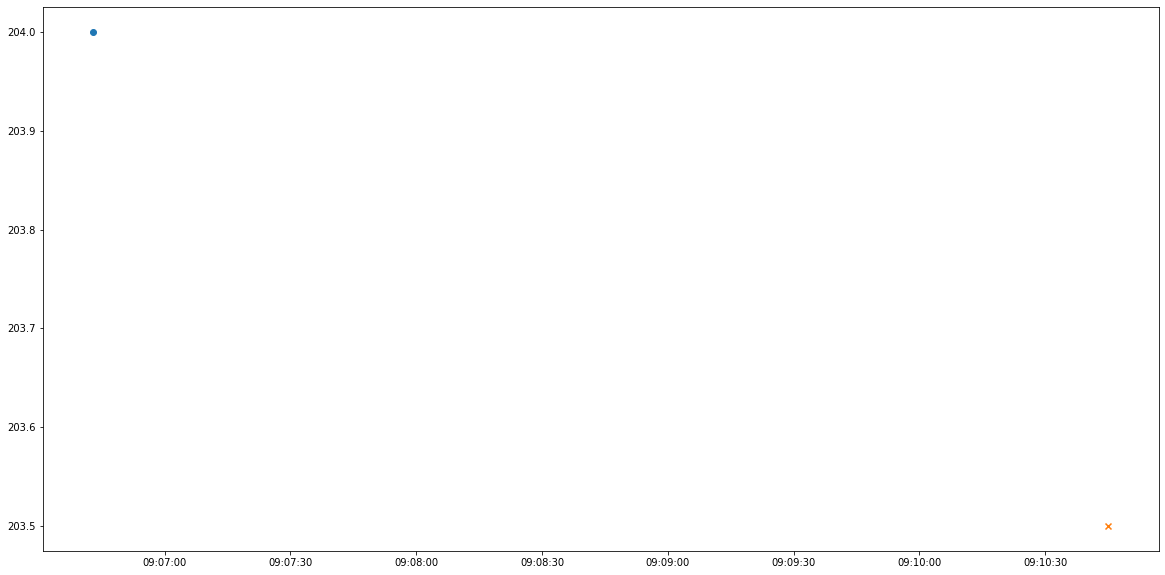

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-20/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90009178
daily_low  196.5
daily_low * theta 197.4825
bid1_p:  198.0
# sell:  21   # buy:  5
bid1_q:  15   bid2_q:  11
進場時間： 94024261 
  sell price at  198.0
stop profit
出場時間： 94109945
buy at 197.5
get 0.5
------------------------------
daily_low  194.0
daily_low * theta 194.96999999999997
bid1_p:  195.0
# sell:  11   # buy:  4
bid1_q:  4   bid2_q:  1
進場時間： 94741790 
  sell price at  195.0
stop profit
出場時間： 94956988
buy at 194.5
get 0.5
------------------------------
daily_low  194.0
daily_low * theta 194.96999999999997
bid1_p:  195.0
# sell:  43   # buy:  11
bid1_q:  16   bid2_q:  23
進場時間： 100007026 
  sell price at  195.0
time out
出場時間： 101010937
buy at 195.0
get 0.0
------------------------------
------Weird price!!!!!---

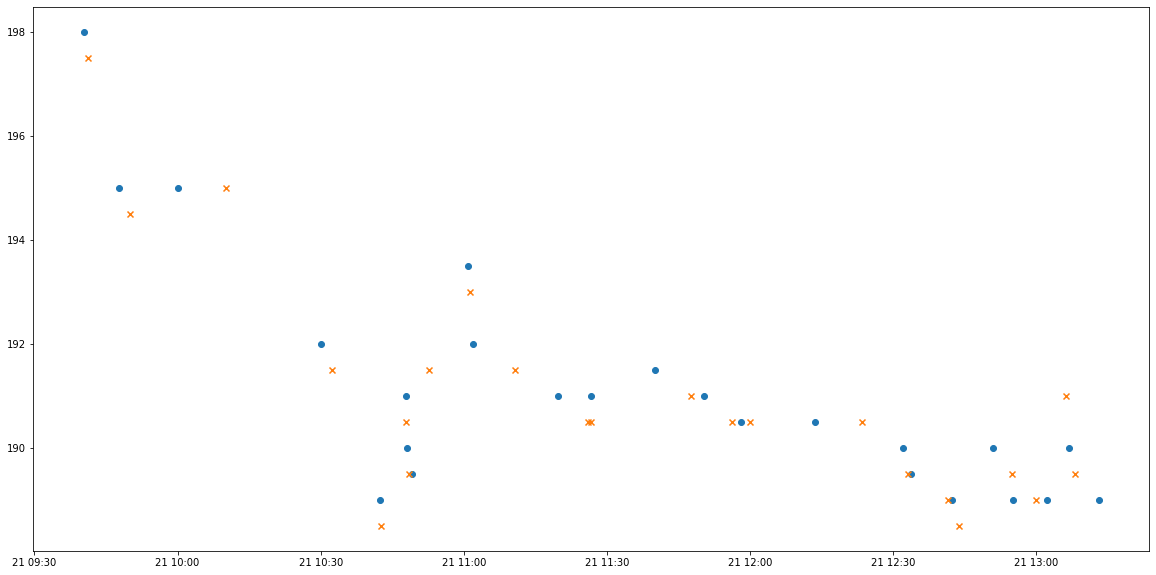

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-21/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90004681
daily_low  194.5
daily_low * theta 195.47249999999997
bid1_p:  196.0
# sell:  14   # buy:  6
bid1_q:  1   bid2_q:  3
進場時間： 90133695 
  sell price at  196.0
stop profit
出場時間： 90233127
buy at 195.5
get 0.5
------------------------------
daily_low  193.0
daily_low * theta 193.96499999999997
bid1_p:  194.0
# sell:  64   # buy:  1
bid1_q:  34   bid2_q:  9
進場時間： 92218775 
  sell price at  194.0
stop profit
出場時間： 92232053
buy at 193.5
get 0.5
------------------------------
daily_low  190.0
daily_low * theta 190.95
bid1_p:  191.5
# sell:  54   # buy:  1
bid1_q:  10   bid2_q:  37
進場時間： 95413117 
  sell price at  191.5
stop profit
出場時間： 95413117
buy at 191.0
get 0.5
------------------------------
daily_low  190.0
daily_low *

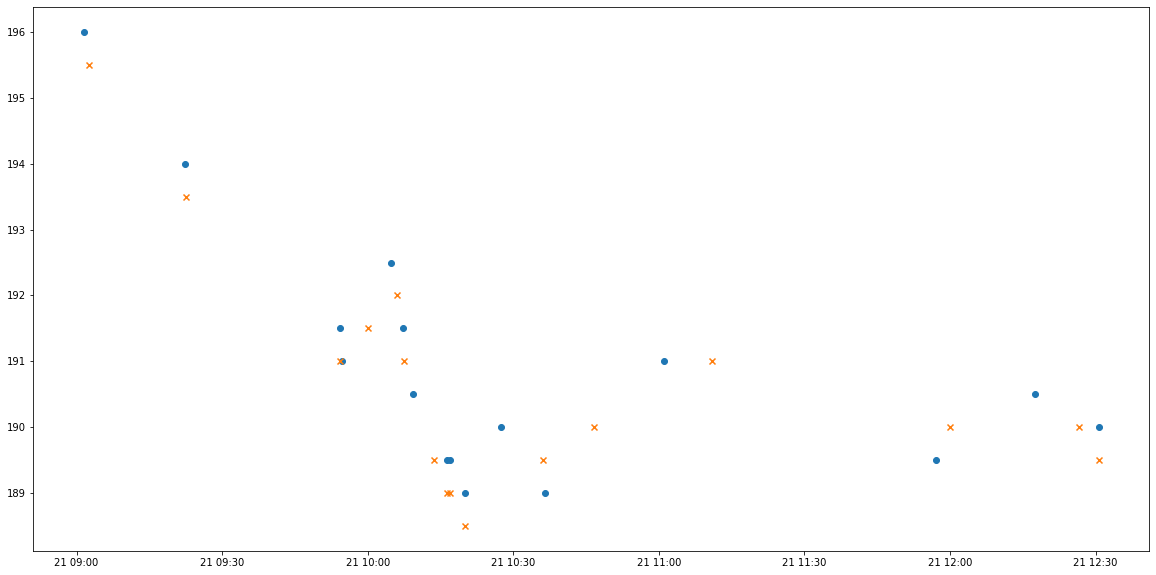

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-24/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90003434
daily_low  190.0
daily_low * theta 190.95
bid1_p:  191.0
# sell:  21   # buy:  3
bid1_q:  9   bid2_q:  14
進場時間： 90217932 
  sell price at  191.0
stop profit
出場時間： 90247294
buy at 190.5
get 0.5
------------------------------
daily_low  189.5
daily_low * theta 190.4475
bid1_p:  191.0
# sell:  19   # buy:  2
bid1_q:  11   bid2_q:  13
進場時間： 90602769 
  sell price at  191.0
stop profit
出場時間： 91016868
buy at 190.5
get 0.5
------------------------------
daily_low  189.5
daily_low * theta 190.4475
bid1_p:  192.5
# sell:  22   # buy:  7
bid1_q:  18   bid2_q:  7
進場時間： 92221916 
  sell price at  192.5
stop loss
出場時間： 92959175
buy at 194.0
get -1.5
------------------------------
daily_low  189.5
daily_low * theta 190.4475
bid1

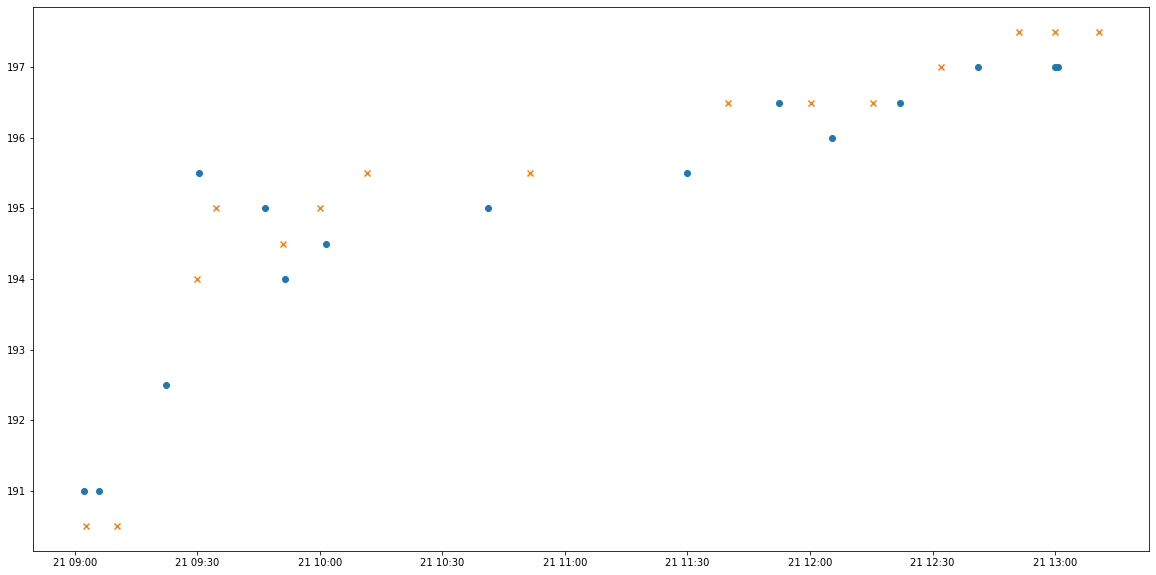

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-25/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90006704
daily_low  199.0
daily_low * theta 199.99499999999998
bid1_p:  200.0
# sell:  38   # buy:  5
bid1_q:  17   bid2_q:  32
進場時間： 90625823 
  sell price at  200.0
stop profit
出場時間： 90917196
buy at 199.5
get 0.5
------------------------------
daily_low  197.0
daily_low * theta 197.98499999999999
bid1_p:  198.0
# sell:  30   # buy:  8
bid1_q:  3   bid2_q:  36
進場時間： 93136429 
  sell price at  198.0
time out
出場時間： 94137687
buy at 199.0
get -1.0
------------------------------
daily_low  197.0
daily_low * theta 197.98499999999999
bid1_p:  199.0
# sell:  33   # buy:  0
bid1_q:  13   bid2_q:  21
進場時間： 100212331 
  sell price at  199.0
stop profit
出場時間： 101042406
buy at 198.5
get 0.5
------------------------------
daily_low  197

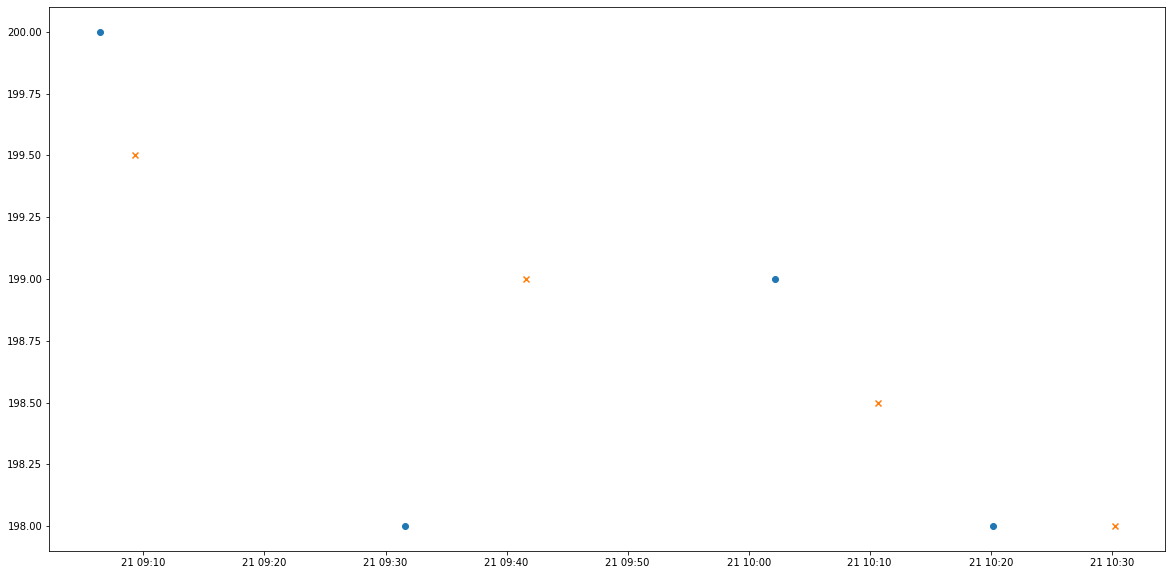

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-26/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90008513
daily_low  193.5
daily_low * theta 194.46749999999997
bid1_p:  194.5
# sell:  29   # buy:  8
bid1_q:  16   bid2_q:  15
進場時間： 92137927 
  sell price at  194.5
time out
出場時間： 93147732
buy at 196.0
get -1.5
------------------------------
daily_low  193.5
daily_low * theta 194.46749999999997
bid1_p:  195.5
# sell:  33   # buy:  0
bid1_q:  11   bid2_q:  21
進場時間： 93406171 
  sell price at  195.5
time out
出場時間： 94410553
buy at 195.5
get 0.0
------------------------------
daily_low  193.5
daily_low * theta 194.46749999999997
bid1_p:  197.0
# sell:  58   # buy:  9
bid1_q:  25   bid2_q:  36
進場時間： 102833367 
  sell price at  197.0
time out
出場時間： 103833683
buy at 197.0
get 0.0
------------------------------
daily_low  193.5
da

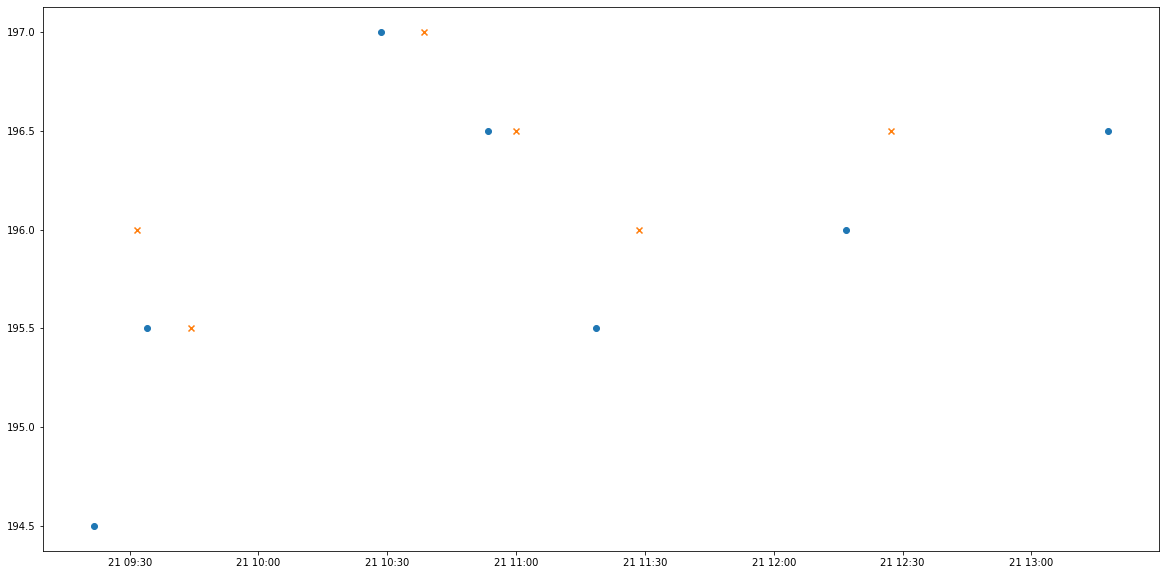

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-27/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90007462
daily_low  195.5
daily_low * theta 196.4775
bid1_p:  196.5
# sell:  35   # buy:  11
bid1_q:  17   bid2_q:  28
進場時間： 92823749 
  sell price at  196.5
stop profit
出場時間： 92912451
buy at 196.0
get 0.5
------------------------------
----------Result Report--------------
profit:  0.5


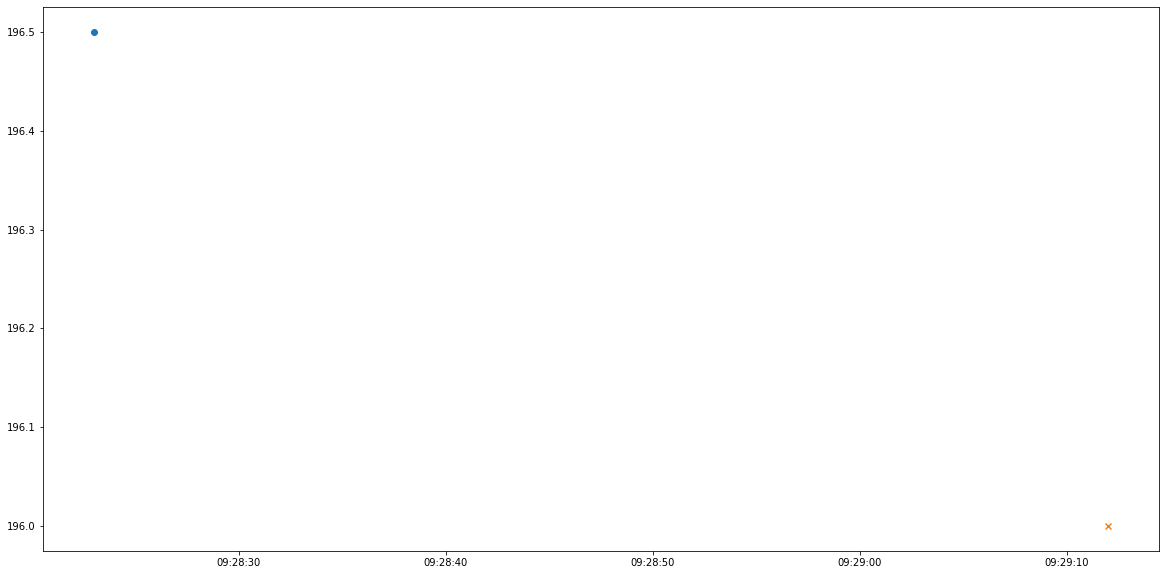

<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2308/tse_lob_2308.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/Shared drives/marketdata/stock/2020-08-28/2308/tse_tick_2308.csv' mode='r' encoding='UTF-8'>
90007628
daily_low  192.0
daily_low * theta 192.95999999999998
bid1_p:  193.5
# sell:  25   # buy:  6
bid1_q:  1   bid2_q:  24
進場時間： 90613578 
  sell price at  193.5
time out
出場時間： 91616452
buy at 194.0
get -0.5
------------------------------
daily_low  192.0
daily_low * theta 192.95999999999998
bid1_p:  193.5
# sell:  29   # buy:  0
bid1_q:  13   bid2_q:  24
進場時間： 91815902 
  sell price at  193.5
stop profit
出場時間： 91941388
buy at 193.0
get 0.5
------------------------------
daily_low  191.5
daily_low * theta 192.45749999999998
bid1_p:  192.5
# sell:  50   # buy:  9
bid1_q:  38   bid2_q:  25
進場時間： 92651839 
  sell price at  192.5
stop loss
出場時間： 93229388
buy at 194.5
get -2.0
------------------------------
daily_low  191.5


In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2308")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2317")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2912")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "2454")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "1216")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "1301")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "1303")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "1326")

In [ ]:
res

In [ ]:
res = back_test(dt.datetime(2020, 7, 3), dt.datetime(2020, 9, 3), "3406")

In [ ]:
res